In [31]:
# Import python libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import image_dataset_from_directory
from sklearn.metrics import classification_report

In [32]:
data_dir = "flower_photos"
train_ds = image_dataset_from_directory(data_dir,validation_split = 0.1, subset = "training",seed = 42, batch_size = None)
test_ds = image_dataset_from_directory(data_dir,validation_split = 0.1, subset = "validation",seed = 42, batch_size = None)

Found 3670 files belonging to 5 classes.
Using 3303 files for training.
Found 3670 files belonging to 5 classes.
Using 367 files for validation.


In [33]:
x_train = []
y_train = []
for x, y in train_ds:
    x_train.append(np.uint8(x.numpy()))
    y_train.append(y.numpy())

In [34]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [35]:
x_test = []
y_test = []
for x, y in test_ds:
    x_test.append(np.uint8(x.numpy()))
    y_test.append(y.numpy())

In [36]:
x_test = np.array(x_test)
y_test = np.array(y_test)

In [37]:
class_names = np.unique(y_train)
print(class_names)

[0 1 2 3 4]


In [38]:
print(train_ds.class_names) 

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


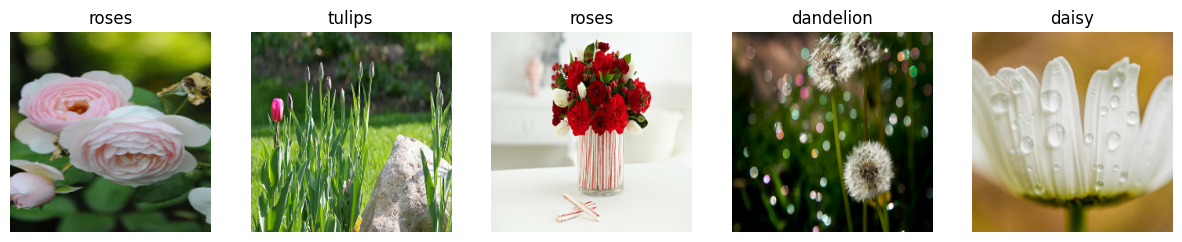

In [39]:
# Use matplotlib to create a figure with 5 sub-plots
fig, axs = plt.subplots(1, 5, figsize = (15, 3))
# Loop through the first five images in the training set.
for i in range(5):
# Use the imshow function in matplotlib to plot the
# image in the corresponding sub-plot in the figure.
   
    axs[i].imshow(x_train[i])
# Print the class label for this image
# in the title for the sub-plot.
    #axs[i].set_title(class_names[y_train[i]])
    axs[i].set_title(train_ds.class_names[y_train[i]])
# When plotting images, it is best to switch
# off the axes, so we just see the image itself.
    axs[i].axis("off")
# Show the final figure.
plt.show()



In [40]:

# convert the output data to use One Hot Encoding.
y_train_cat = keras.utils.to_categorical(y_train)
y_test_cat = keras.utils.to_categorical(y_test)

In [52]:
# Normalise the images by dividing by 255,so all pixel values lie in the range
# 0 - 1
x_train_norm = x_train / 255
x_test_norm = x_test / 255

# Record the width and height ofeach image, in pixels.
width_npix = x_train_norm.shape[1]
height_npix = x_train_norm.shape[2]
# The CNN model that we will be using  expects the inputs to have 6 dimensions.

x_train_norm = x_train_norm.reshape(-1, width_npix, height_npix, 3)
x_test_norm = x_test_norm.reshape(-1, width_npix, height_npix, 3)
# Lets print the final shape of these arrays, to make
# sure they are what we expected.
print(x_train_norm.shape)
print(x_test_norm.shape)

(3303, 256, 256, 3)
(367, 256, 256, 3)


In [ ]:
# Import the ImageDataGenerator class from tensorflow.
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Define data augmentation parameters
train_datagen = ImageDataGenerator(
                                    rotation_range = 20, # Randomly rotate images up to 10 degrees
                                    width_shift_range = 0.1, # Randomly shift images horizontally up to 10% of the width
                                    height_shift_range = 0.1, # Randomly shift images vertically up to 10% of the height
                                    horizontal_flip = True, # Randomly flip images horizontally
                                    vertical_flip = False, # Don't randomly flip images vertically
                                    shear_range = 0.10, # crops part of the image
                                    zoom_range = 0.10, # #zooms the image by 10%
                                    validation_split =0.2 # Set the validation split
                                    )
# Fit the transformation to the training dataset
train_datagen.fit(x_train_norm)

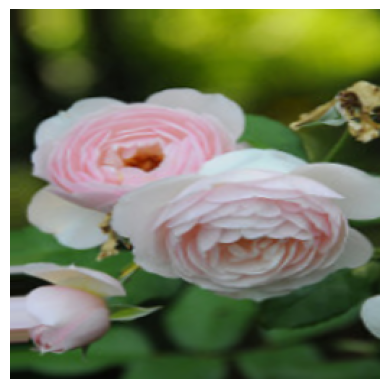

In [13]:
# Apply the random_transform function to the first image
# in the normalised training set, i.e. x_train_norm[0].
new_image = train_datagen.random_transform(x_train_norm[0])
# Now use matplotlib to show this image.
plt.imshow(new_image)
# The following line of code will remove the
# axes from the image.
plt.gca().axis("off")
# Show the figure.
plt.show()

In [14]:
# Import the Sequential model from Tensor Flow
from tensorflow.keras.models import Sequential

# Import the layers that we will require from Tensor Flow.
# In addition to the Dense and Dropout layers (which we saw
# in last week's workshop), we are also going to use
# Conv2D (for 2-dimensional convolutional layers),
# MaxPooling2D (for 2-dimensional pooling layers),
# and Flatten (to flatten the output from the last
# pooling layer ready to go into the fully connected part
# of the network).
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout
# Create an instance of the Sequential class.
# This will be our model.
model = Sequential()
# Add the first Convolutional layer. Here we use 32 filters,
# which will each be convolved with the input data to
# produce 32 feature maps. We use a kernel_size of 3x3,
# and the relu activation function.
model.add(Conv2D(filters = 32, kernel_size = (3, 3), input_shape = (width_npix,height_npix, 3), activation = 'relu'))
# Add a pooling layer that uses max pooling,
# with a pool size of 2x2.
model.add(MaxPooling2D(pool_size = (2, 2)))
# Add a second convolutional layer, again with a kernel size of 3x3 and
# the relu activation function but now with 64 filters. Note that it
# is common to increase the number of filters as we go deeper into
# the network.
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
# Add a second max pooling layer.
model.add(MaxPooling2D(pool_size = (2, 2)))
# Add a third convolutional layer, now with 128 filters.
model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu'))
# Add a third max pooling layer.
model.add(MaxPooling2D(pool_size = (2, 2)))
# After the final pooling layer, we need a flatter layer,
# which will flatten the output to a 1-dimensional array,
# ready for the fully connected network.
model.add(Flatten())
# Add a Dense (i.e. fully connected) layer with 64 neurons
# and the relu activation function.
model.add(Dense(64, activation = 'relu'))
# Apply a dropout rate of 50% to the dense layer.
model.add(Dropout(0.5))
# The output layer needs 10 units, corresponding
# to the 10 output classes. We use the softmax
# activation function, which means the resulting
# output values will represent the probabilities
# for each of the 10 class labels.
model.add(Dense(5, activation = 'softmax'))
# Print a summary of the model.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [15]:

from keras.optimizers import Adam
# Create an instance of the Adam class,
# and set the learning rate.
adam_optimizer = Adam(learning_rate = 0.001)
# Compile the model. As this is a classification problem,
# we are going to use the categorical cross entropy for the
# loss function, and we will use the accuracy for metrics.
model.compile(adam_optimizer, loss='categorical_crossentropy',metrics='accuracy')

In [16]:
# Specify the batch size to use when
batch_size = 32

# In this example we will train the model for 20
# epochs.
history = model.fit(train_datagen.flow(x_train_norm, y_train_cat, batch_size =batch_size, subset = "training"), epochs = 20,
validation_data = train_datagen.flow(x_train_norm,y_train_cat, batch_size = batch_size, subset = "validation"))

Epoch 1/20
83/83 [==============================] - 163s 2s/step - loss: 1.4299 - accuracy: 0.3712 - val_loss: 1.1945 - val_accuracy: 0.4530
Epoch 2/20
83/83 [==============================] - 162s 2s/step - loss: 1.2215 - accuracy: 0.4484 - val_loss: 1.0883 - val_accuracy: 0.5439
Epoch 3/20
83/83 [==============================] - 161s 2s/step - loss: 1.1451 - accuracy: 0.5286 - val_loss: 1.0601 - val_accuracy: 0.5636
Epoch 4/20
83/83 [==============================] - 162s 2s/step - loss: 1.1009 - accuracy: 0.5350 - val_loss: 0.9817 - val_accuracy: 0.6500
Epoch 5/20
83/83 [==============================] - 160s 2s/step - loss: 1.0730 - accuracy: 0.5698 - val_loss: 0.8856 - val_accuracy: 0.6530
Epoch 6/20
83/83 [==============================] - 159s 2s/step - loss: 1.0150 - accuracy: 0.5830 - val_loss: 0.9478 - val_accuracy: 0.6212
Epoch 7/20
83/83 [==============================] - 159s 2s/step - loss: 0.9979 - accuracy: 0.6016 - val_loss: 0.8381 - val_accuracy: 0.6652
Epoch 8/20
83

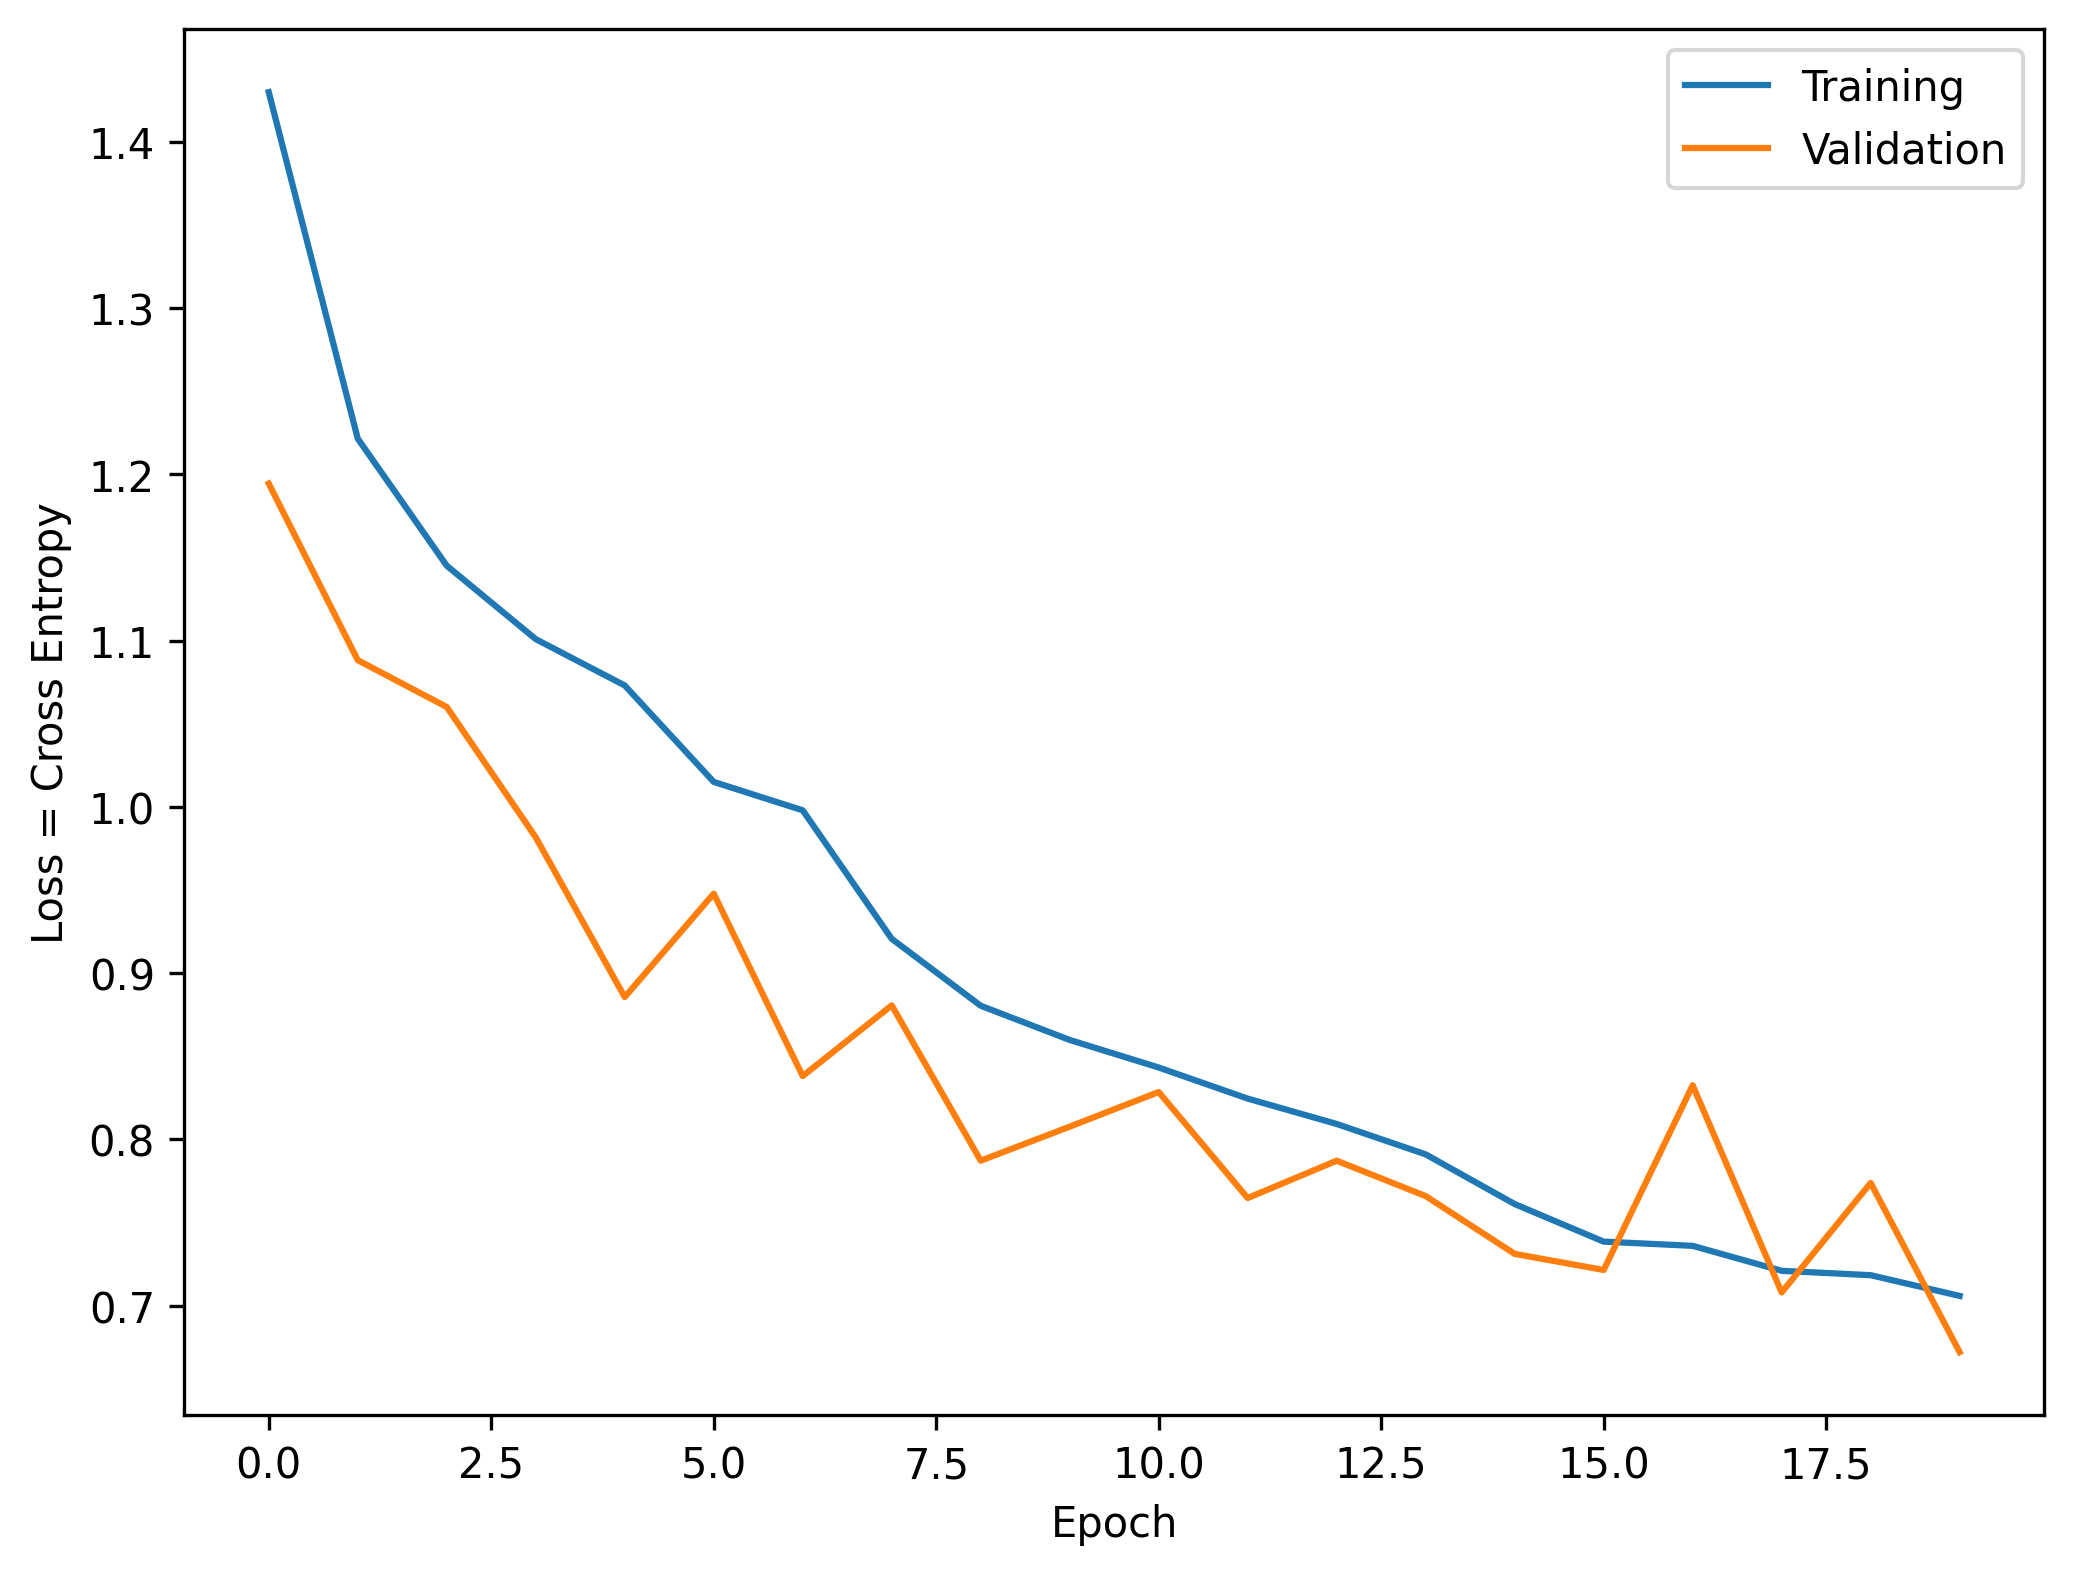

In [17]:
# Create a pandas dataframe containing
# the history of the fitting
history_df = pd.DataFrame(history.history)
# Plot the training and validation losses
# versus epoch.
plt.figure(figsize = (8, 6), dpi = 300)
plt.plot(history_df["loss"], label = "Training")
plt.plot(history_df["val_loss"], label = "Validation")
# Add a legend to the plot.
plt.legend()
# Label both axes.
plt.xlabel("Epoch")
plt.ylabel("Loss = Cross Entropy")
# Show the plot.
plt.show()

# Plot the accuracy of the training and validation sets versus epoch

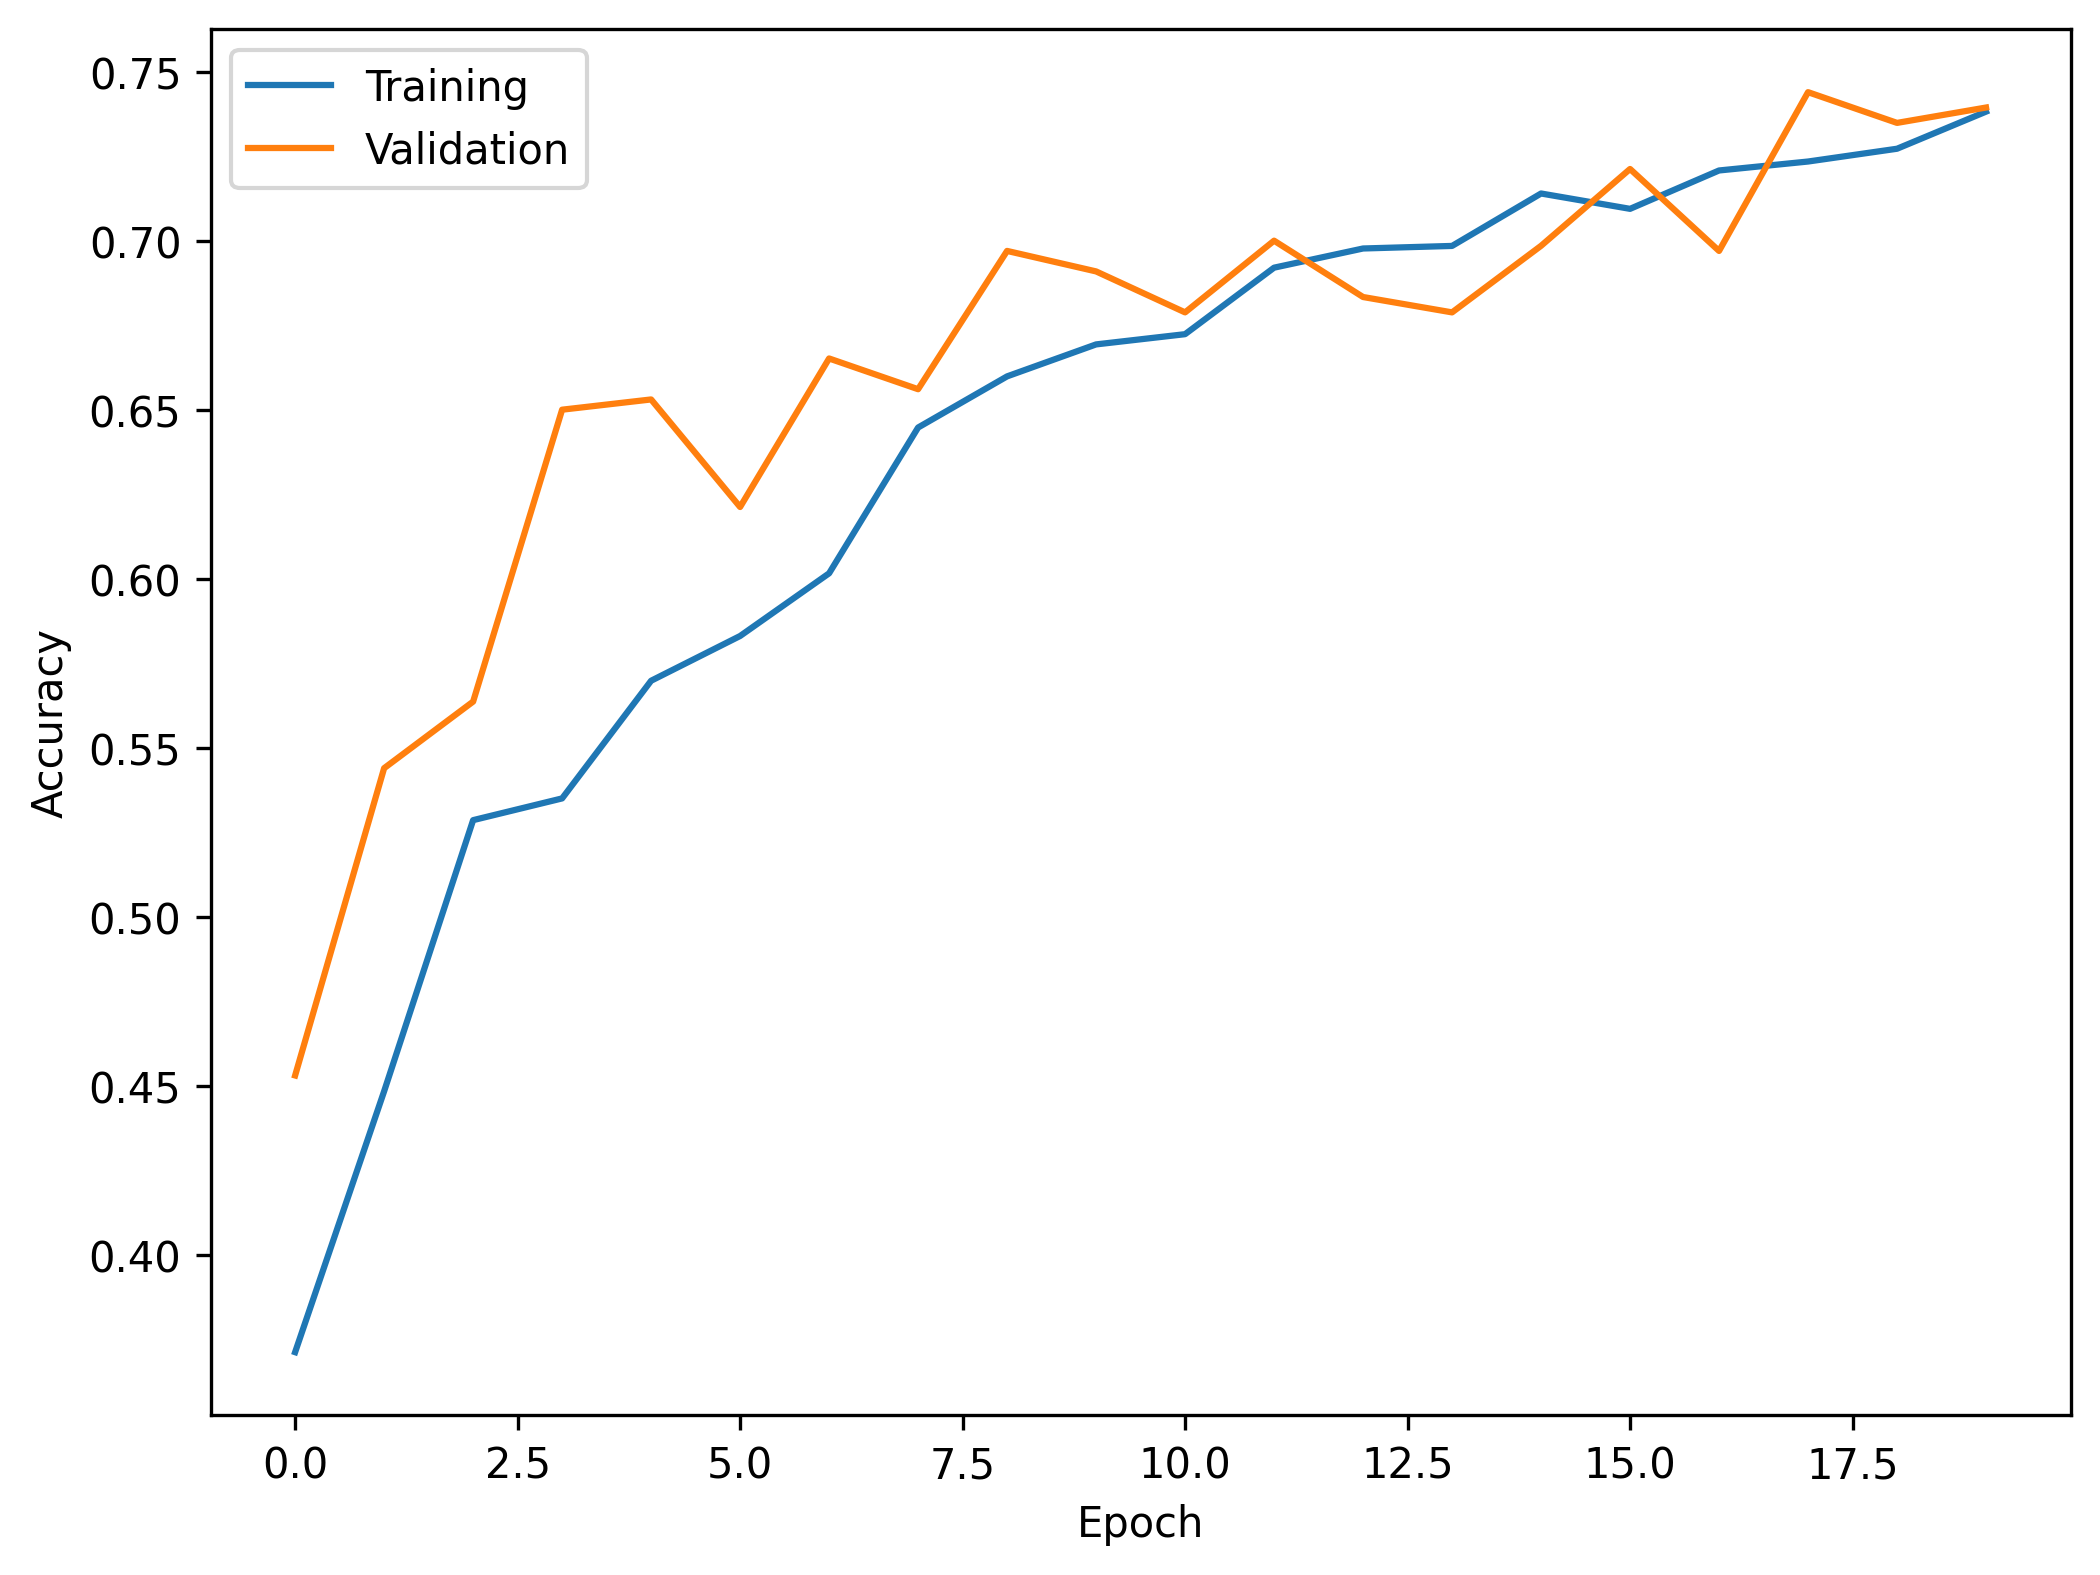

In [18]:
# Plot the training and validation accuracy
# versus epoch.
plt.figure(figsize = (8, 6), dpi = 300)
plt.plot(history_df["accuracy"], label = "Training")
plt.plot(history_df["val_accuracy"], label = "Validation")
# Add a legend to the plot.
plt.legend()
# Label both axes.
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
# Show the plot.
plt.show()


# Confusion Matrix of the final results

In [19]:
# Before we plot the confusion matrix, we need
# to find which label corresponds to which index.
# This is actually somewhat trivial in this case,
# as the labels are just the digits 0-9.
# Names of each label
display_labels = ["%d" % (i, ) for i in range(5)]
# Numerical index of each label
numerical_labels = [i for i in range(5)]
# Lets check the label strings and the
# numerical labels to make sure they line up.
print(display_labels)
print(numerical_labels)



['0', '1', '2', '3', '4']
[0, 1, 2, 3, 4]


In [20]:
# Now use the trained model to predict output
# classes in the test set
y_pred = model.predict(x_test_norm)
# Recall that the outputs from the model give the
# probability of each class label. We can now use
# the argmax() function to determine the index
# of the label with the highest probability for
# each row in y_pred. These will be our predicted
# class labels.
y_pred_class = np.argmax(y_pred, axis=1)

12/12 [==============================] - 5s 405ms/step


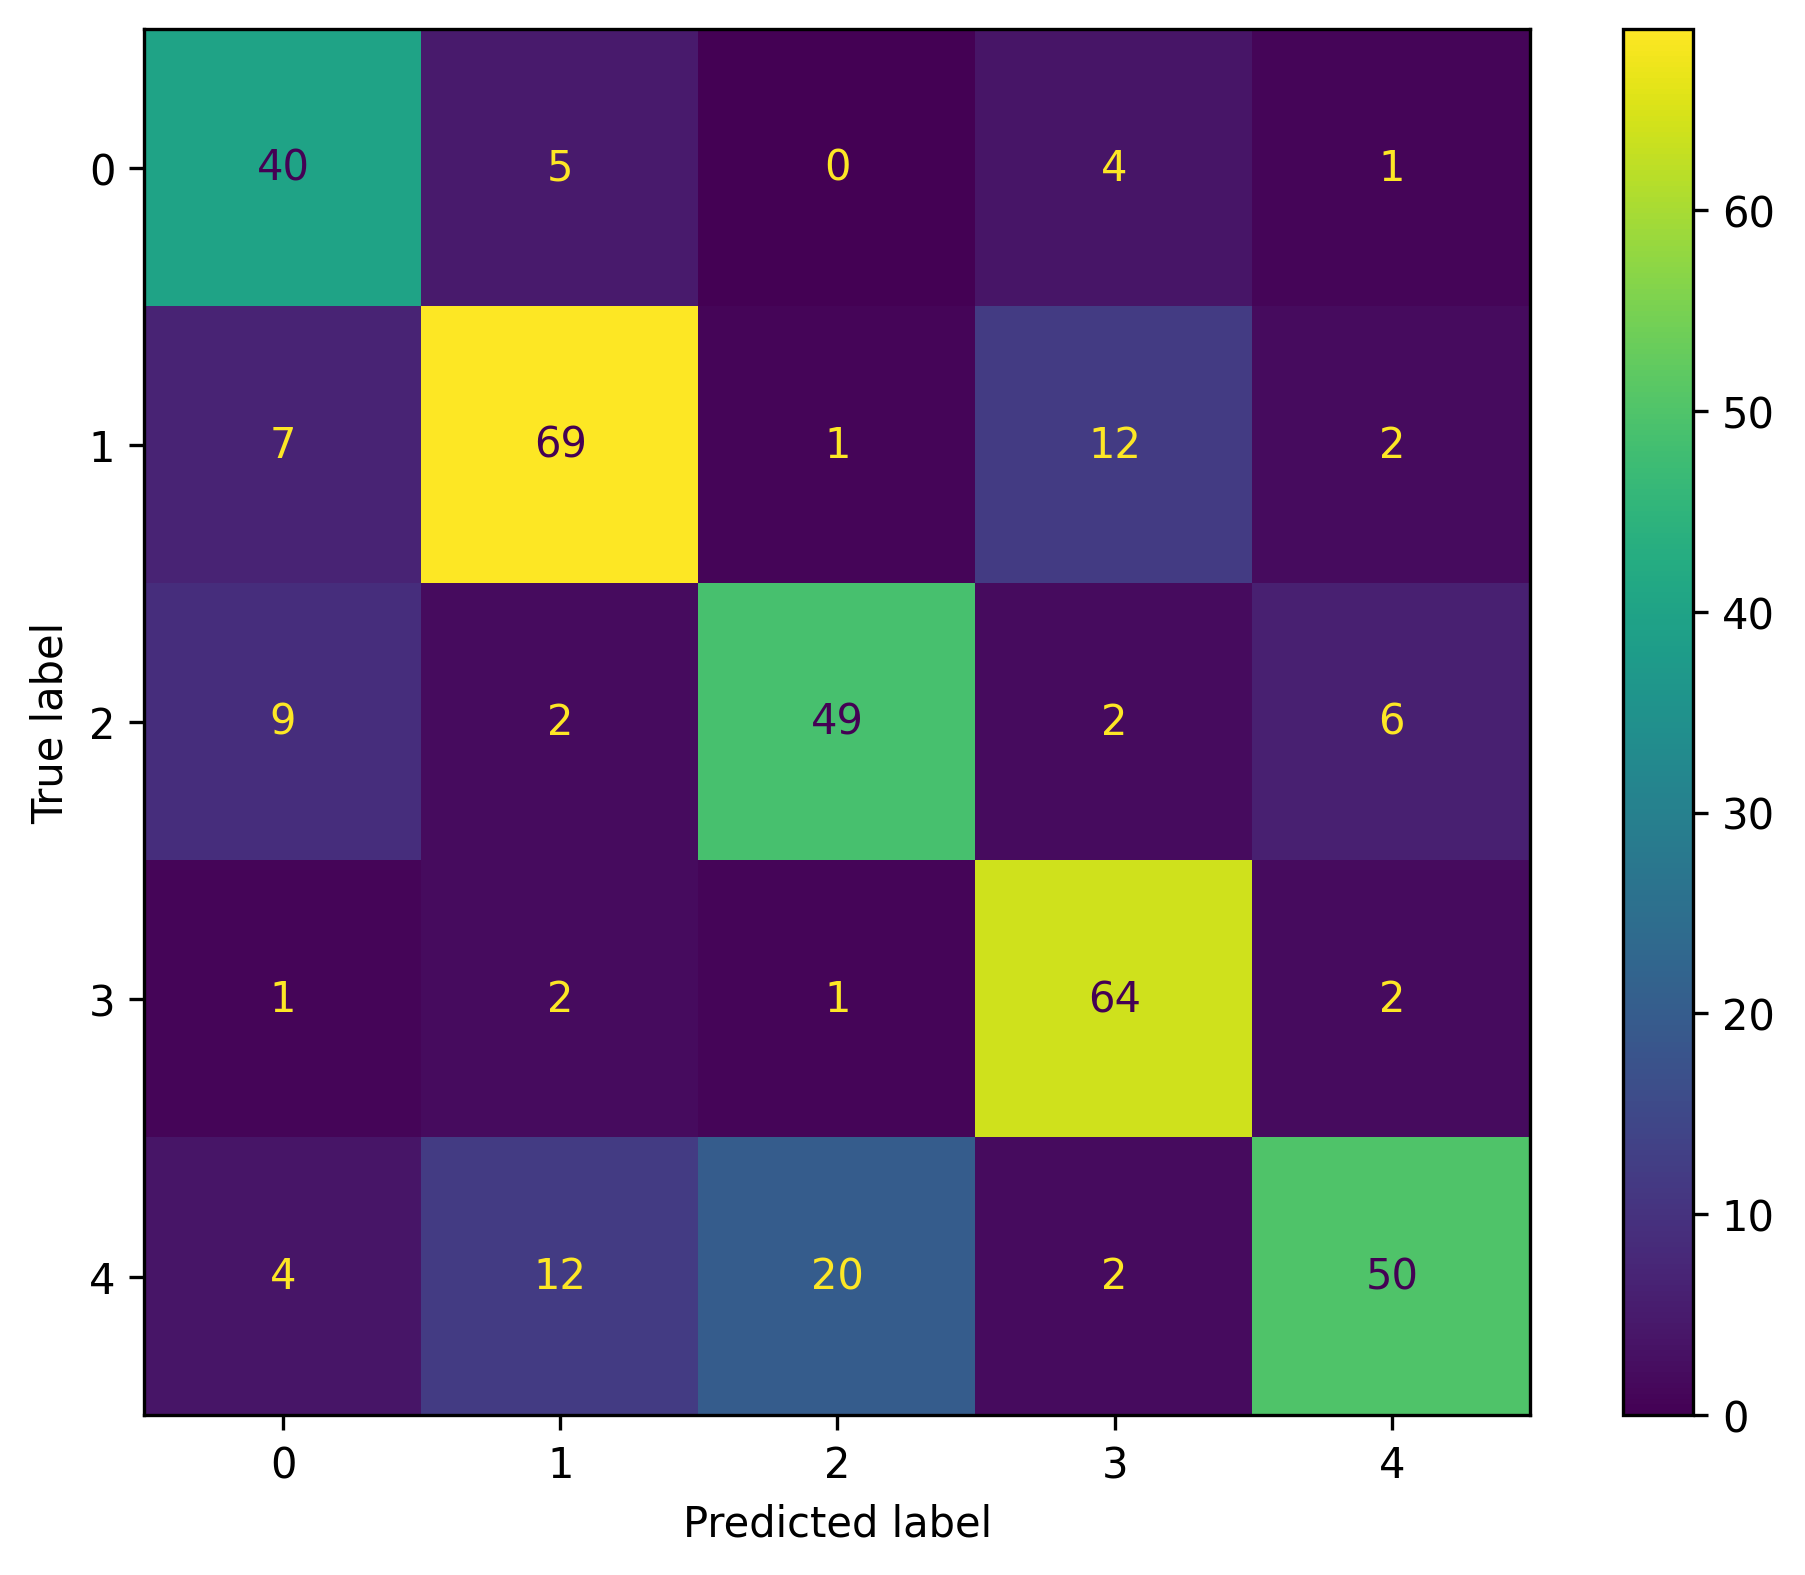

In [21]:
# Import the functions that we will need from sklearn to create
# and plot the confusion matrix.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Create the confusion matrix
con_mat = confusion_matrix(y_test, y_pred_class, labels = numerical_labels)
# Create the figure and axes
plt.figure(figsize = (8, 6), dpi = 300)
ax = plt.axes()
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix = con_mat, display_labels =display_labels)
disp.plot(ax = ax)
# Show the plot
plt.show()


In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.66      0.80      0.72        50
           1       0.77      0.76      0.76        91
           2       0.69      0.72      0.71        68
           3       0.76      0.91      0.83        70
           4       0.82      0.57      0.67        88

    accuracy                           0.74       367
   macro avg       0.74      0.75      0.74       367
weighted avg       0.75      0.74      0.74       367



### Model 2

### Changing Batch Size

In [23]:
# Import the Sequential model from Tensor Flow
from tensorflow.keras.models import Sequential

# Import the layers that we will require from Tensor Flow.
# In addition to the Dense and Dropout layers (which we saw
# in last week's workshop), we are also going to use
# Conv2D (for 2-dimensional convolutional layers),
# MaxPooling2D (for 2-dimensional pooling layers),
# and Flatten (to flatten the output from the last
# pooling layer ready to go into the fully connected part
# of the network).
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout
# Create an instance of the Sequential class.
# This will be our model.
model = Sequential()
# Add the first Convolutional layer. Here we use 32 filters,
# which will each be convolved with the input data to
# produce 32 feature maps. We use a kernel_size of 3x3,
# and the relu activation function.
model.add(Conv2D(filters = 32, kernel_size = (3, 3), input_shape = (width_npix,height_npix, 3), activation = 'relu'))
# Add a pooling layer that uses max pooling,
# with a pool size of 2x2.
model.add(MaxPooling2D(pool_size = (2, 2)))
# Add a second convolutional layer, again with a kernel size of 3x3 and
# the relu activation function but now with 64 filters. Note that it
# is common to increase the number of filters as we go deeper into
# the network.
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
# Add a second max pooling layer.
model.add(MaxPooling2D(pool_size = (2, 2)))
# Add a third convolutional layer, now with 128 filters.
model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu'))
# Add a third max pooling layer.
model.add(MaxPooling2D(pool_size = (2, 2)))
# After the final pooling layer, we need a flatter layer,
# which will flatten the output to a 1-dimensional array,
# ready for the fully connected network.
model.add(Flatten())
# Add a Dense (i.e. fully connected) layer with 64 neurons
# and the relu activation function.
model.add(Dense(64, activation = 'relu'))
# Apply a dropout rate of 50% to the dense layer.
model.add(Dropout(0.5))
# The output layer needs 10 units, corresponding
# to the 10 output classes. We use the softmax
# activation function, which means the resulting
# output values will represent the probabilities
# for each of the 10 class labels.
model.add(Dense(5, activation = 'softmax'))
# Print a summary of the model.
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 128)      

In [24]:
# Since we want to specify the learning rate
# ourselves, we need to import the Adam
# class from the Keras library.
from keras.optimizers import Adam
# Create an instance of the Adam class,
# and set the learning rate.
adam_optimizer = Adam(learning_rate = 0.001)
# Compile the model. As this is a classification problem,
# we are going to use the categorical cross entropy for the
# loss function, and we will use the accuracy for metrics.
model.compile(adam_optimizer, loss='categorical_crossentropy',metrics='accuracy')

In [25]:
# Specify the batch size to use when
# training the model.
batch_size =64
# Fit the model, and record the history of the fit.
# In this example we will train the model for 20
# epochs.
history = model.fit(train_datagen.flow(x_train_norm, y_train_cat, batch_size =batch_size, subset = "training"), epochs = 20,
validation_data = train_datagen.flow(x_train_norm,y_train_cat, batch_size = batch_size, subset = "validation"))

Epoch 1/20
42/42 [==============================] - 156s 4s/step - loss: 1.5412 - accuracy: 0.3152 - val_loss: 1.2591 - val_accuracy: 0.4879
Epoch 2/20
42/42 [==============================] - 154s 4s/step - loss: 1.2663 - accuracy: 0.4567 - val_loss: 1.1160 - val_accuracy: 0.5682
Epoch 3/20
42/42 [==============================] - 153s 4s/step - loss: 1.2124 - accuracy: 0.4979 - val_loss: 1.0436 - val_accuracy: 0.5894
Epoch 4/20
42/42 [==============================] - 161s 4s/step - loss: 1.1571 - accuracy: 0.5380 - val_loss: 1.0489 - val_accuracy: 0.5864
Epoch 5/20
42/42 [==============================] - 154s 4s/step - loss: 1.1094 - accuracy: 0.5445 - val_loss: 0.9650 - val_accuracy: 0.6197
Epoch 6/20
42/42 [==============================] - 160s 4s/step - loss: 1.0337 - accuracy: 0.5849 - val_loss: 0.9657 - val_accuracy: 0.6318
Epoch 7/20
42/42 [==============================] - 154s 4s/step - loss: 1.0191 - accuracy: 0.5993 - val_loss: 0.8609 - val_accuracy: 0.6439
Epoch 8/20
42

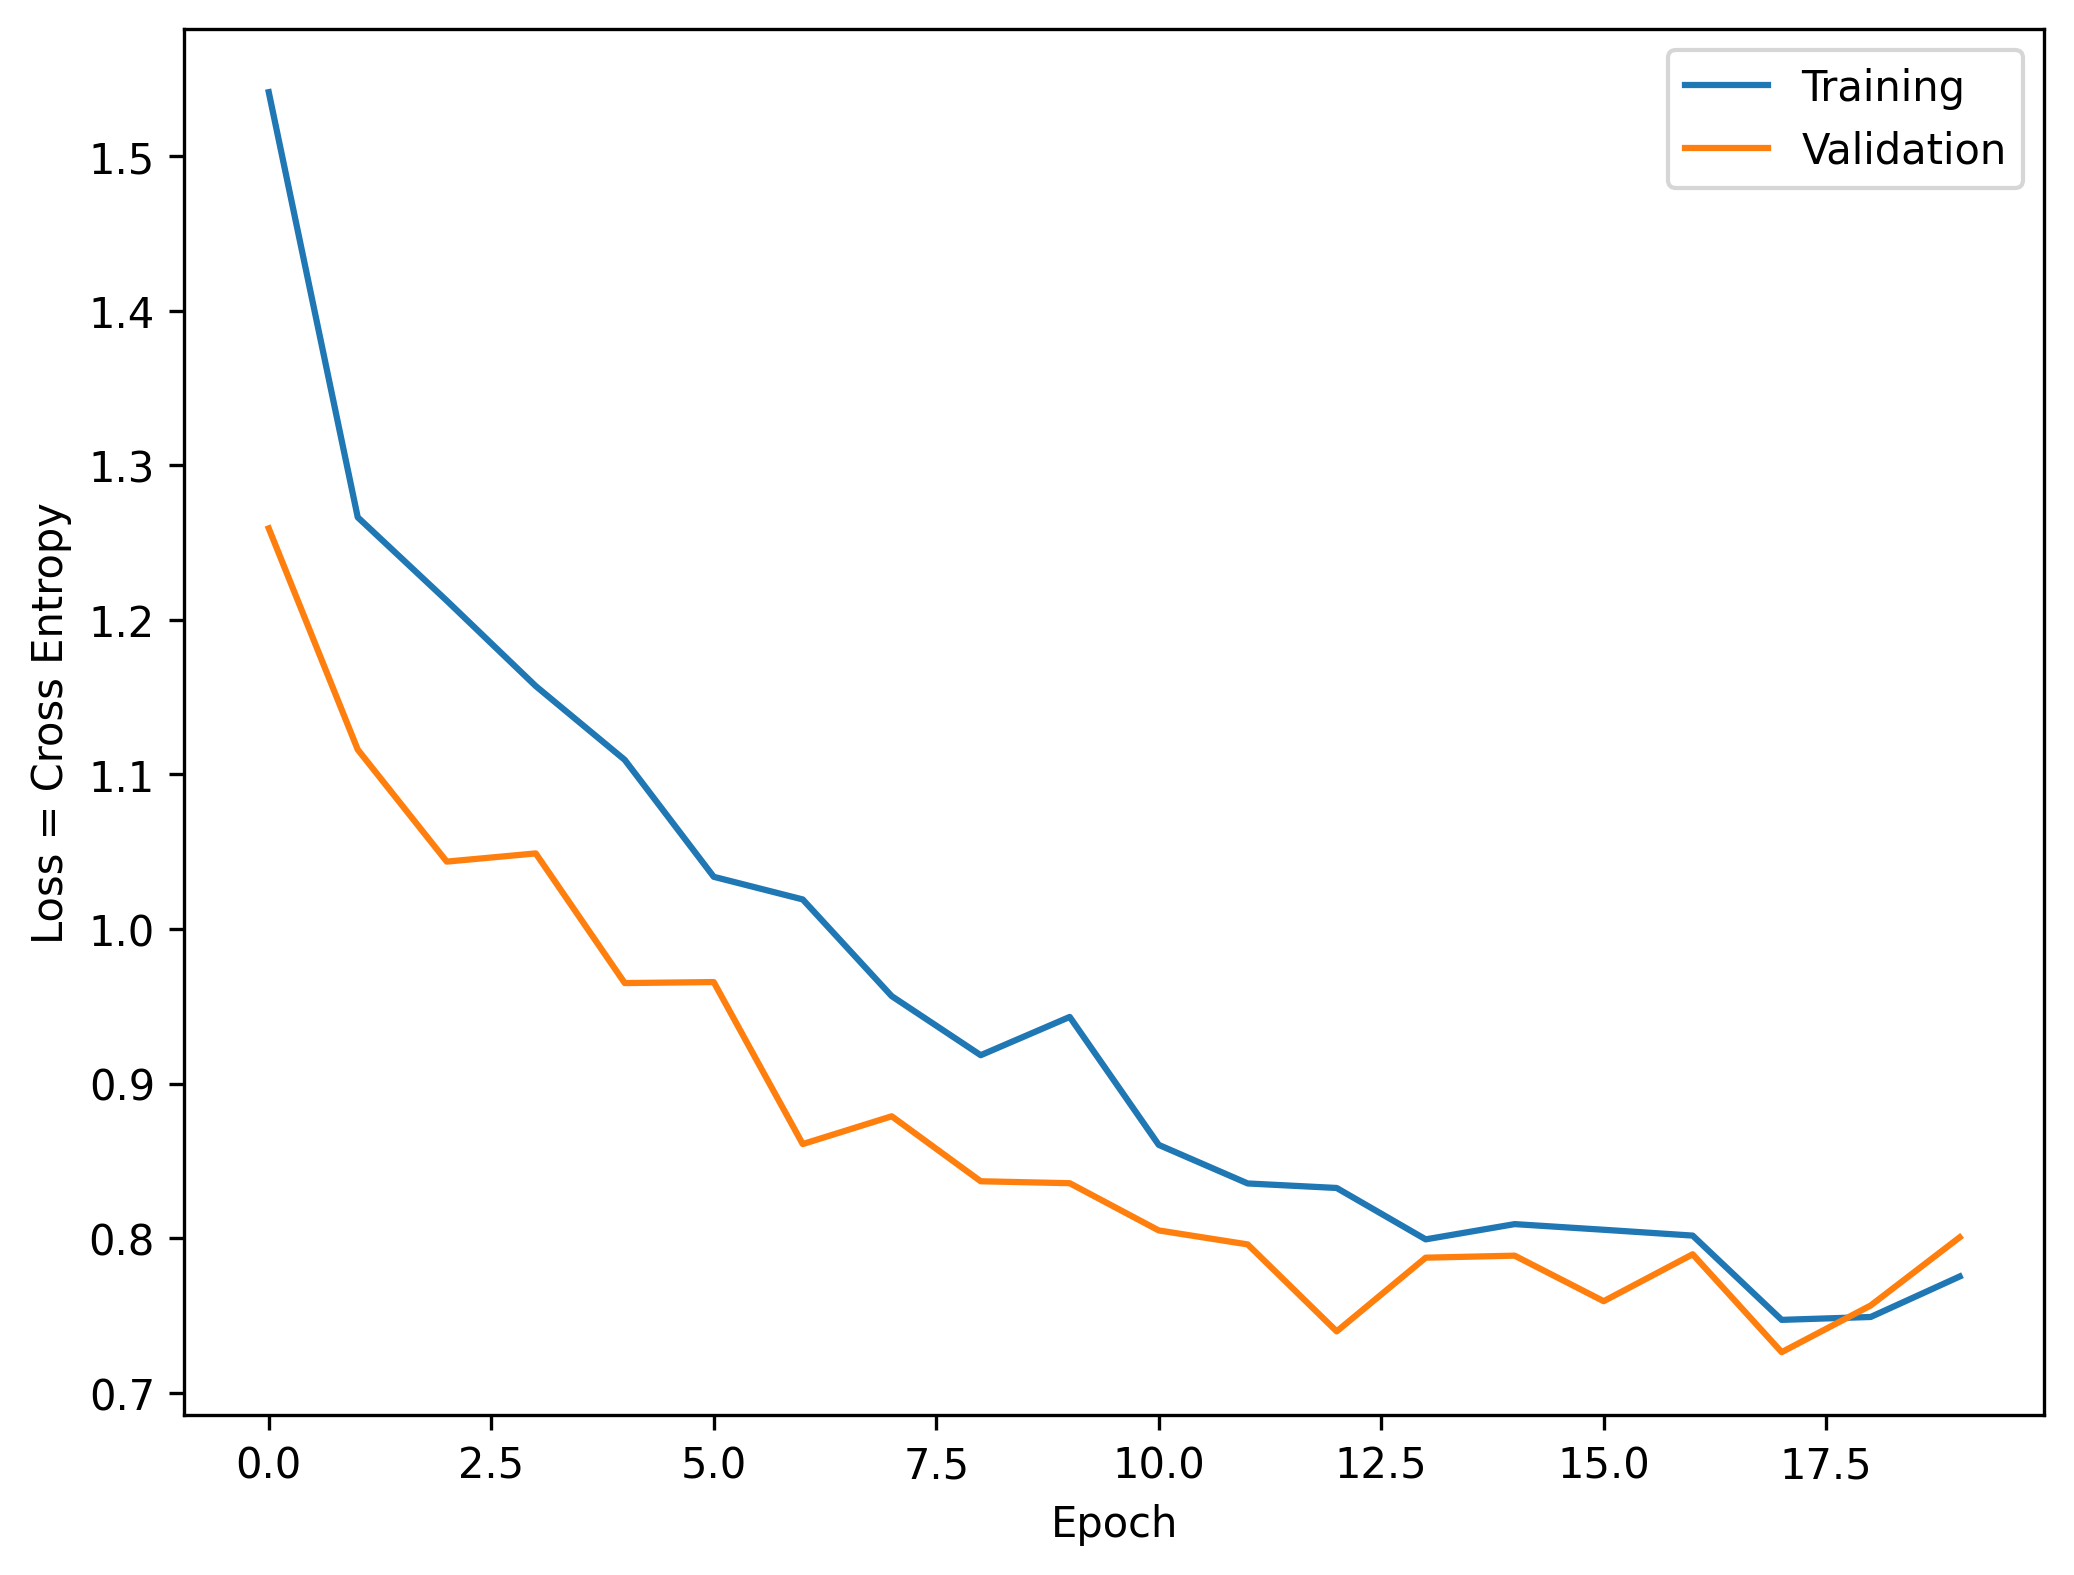

In [26]:
# Create a pandas dataframe containing
# the history of the fitting
history_df = pd.DataFrame(history.history)
# Plot the training and validation losses
# versus epoch.
plt.figure(figsize = (8, 6), dpi = 300)
plt.plot(history_df["loss"], label = "Training")
plt.plot(history_df["val_loss"], label = "Validation")
# Add a legend to the plot.
plt.legend()
# Label both axes.
plt.xlabel("Epoch")
plt.ylabel("Loss = Cross Entropy")
# Show the plot.
plt.show()

# Plot the accuracy of the training and validation sets versus epoch

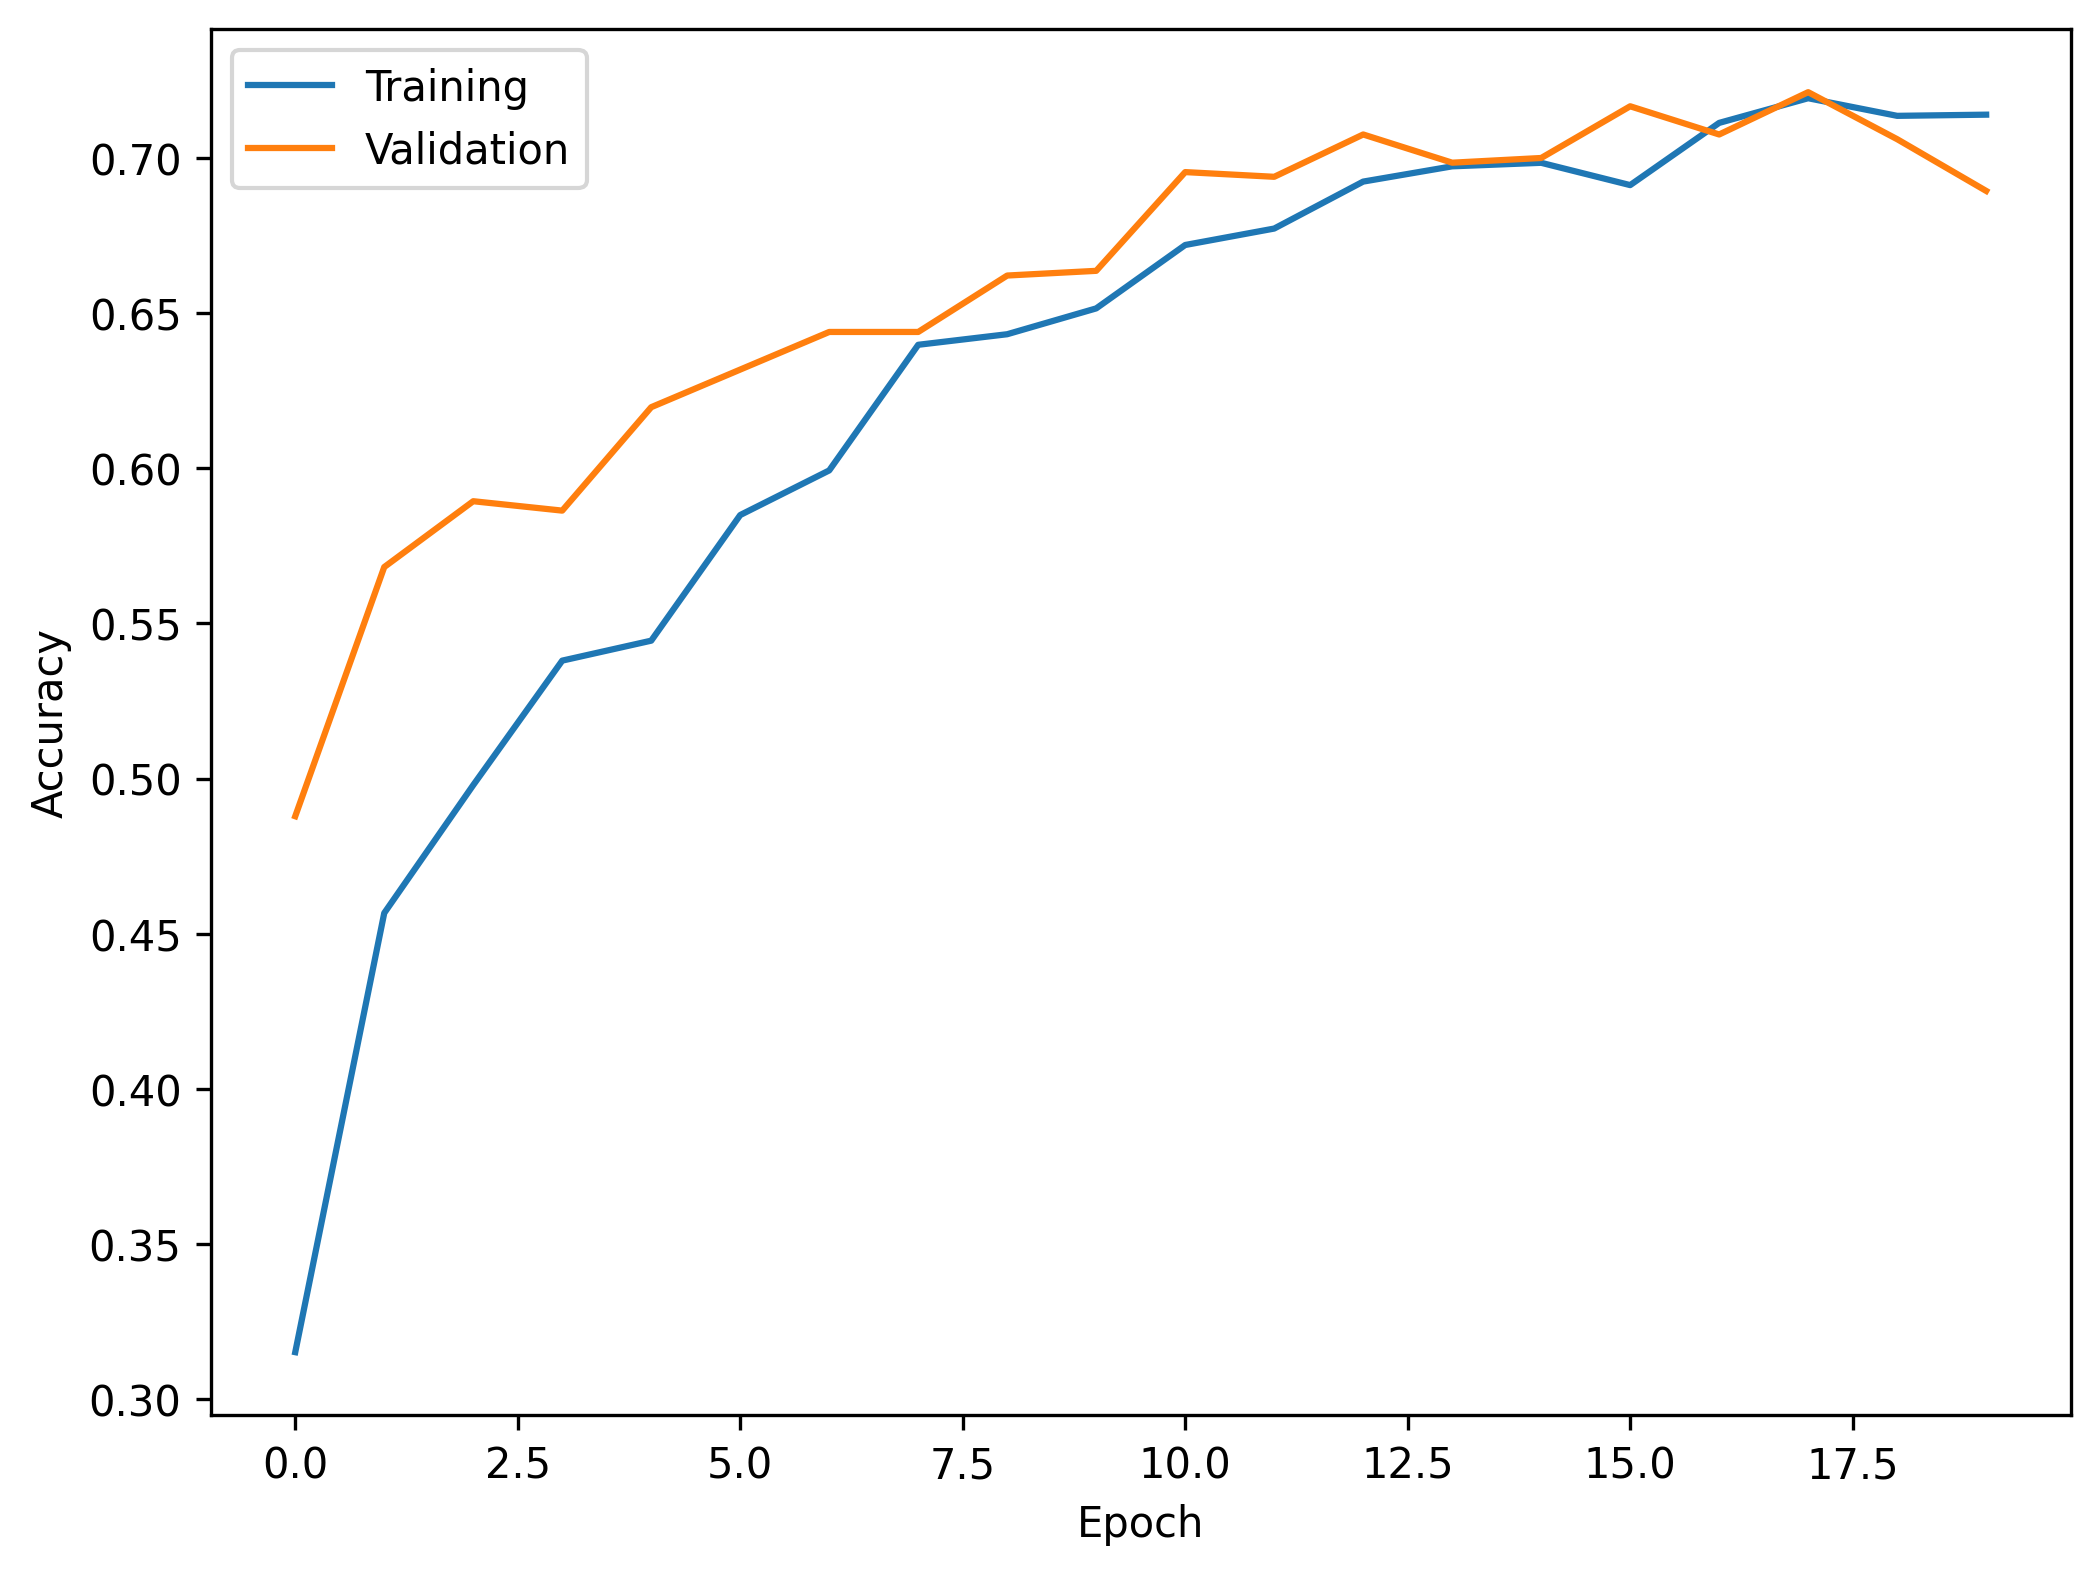

In [27]:
# Plot the training and validation accuracy
# versus epoch.
plt.figure(figsize = (8, 6), dpi = 300)
plt.plot(history_df["accuracy"], label = "Training")
plt.plot(history_df["val_accuracy"], label = "Validation")
# Add a legend to the plot.
plt.legend()
# Label both axes.
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
# Show the plot.
plt.show()


# Confusion Matrix of the final results

In [28]:
# Before we plot the confusion matrix, we need
# to find which label corresponds to which index.
# This is actually somewhat trivial in this case,
# as the labels are just the digits 0-9.
# Names of each label
display_labels = ["%d" % (i, ) for i in range(5)]
# Numerical index of each label
numerical_labels = [i for i in range(5)]
# Lets check the label strings and the
# numerical labels to make sure they line up.
print(display_labels)
print(numerical_labels)



['0', '1', '2', '3', '4']
[0, 1, 2, 3, 4]


In [29]:
# Now use the trained model to predict output
# classes in the test set
y_pred = model.predict(x_test_norm)
# Recall that the outputs from the model give the
# probability of each class label. We can now use
# the argmax() function to determine the index
# of the label with the highest probability for
# each row in y_pred. These will be our predicted
# class labels.
y_pred_class = np.argmax(y_pred, axis=1)

12/12 [==============================] - 5s 401ms/step


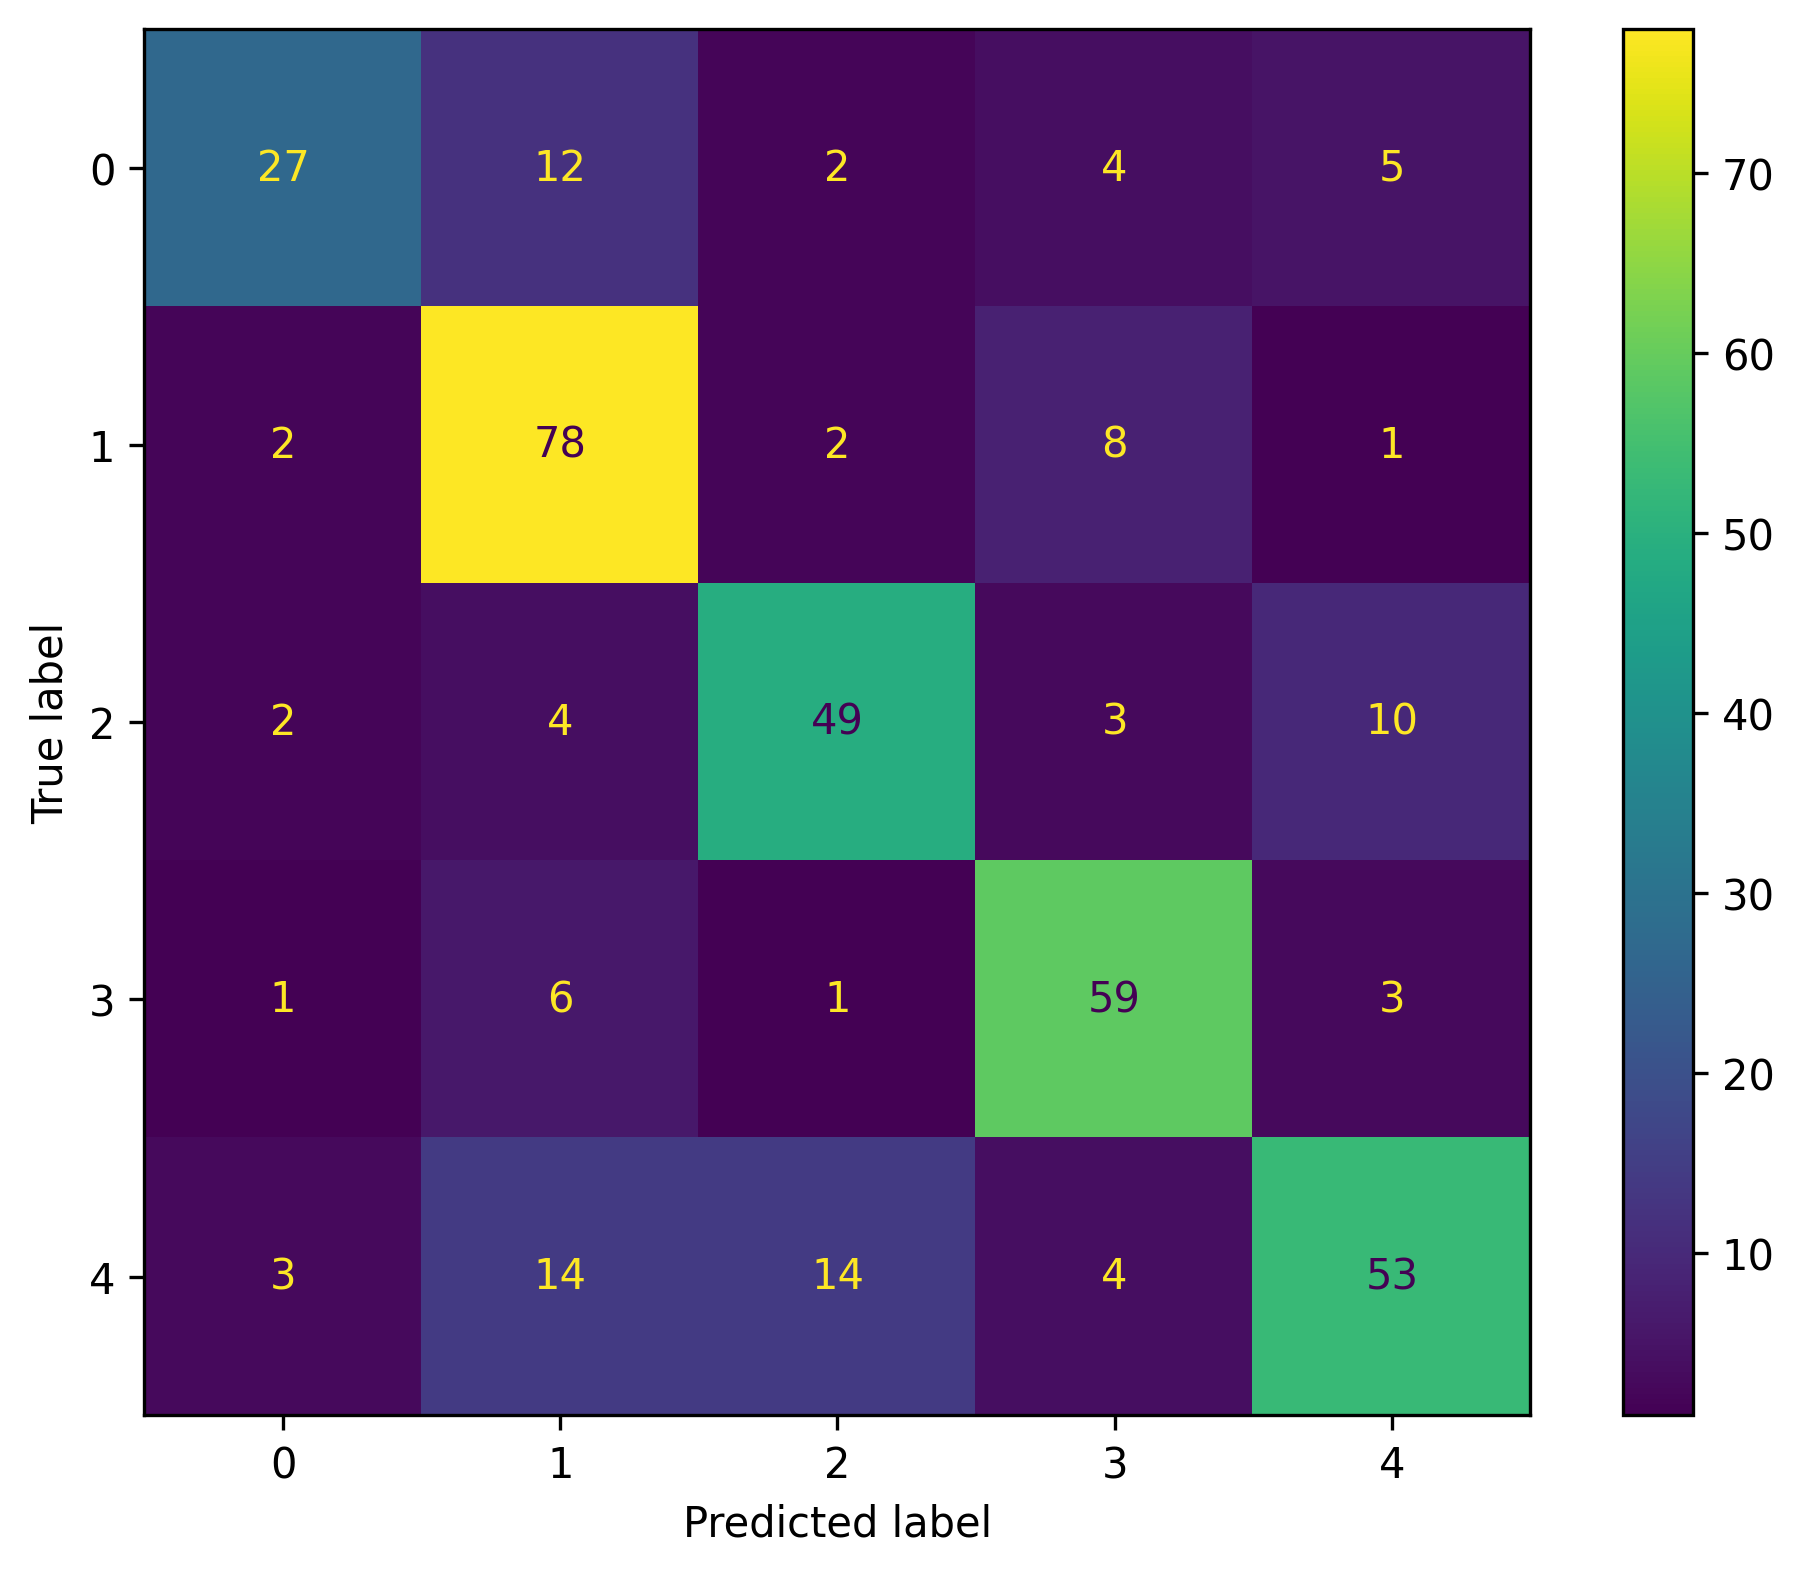

In [30]:
# Import the functions that we will need from sklearn to create
# and plot the confusion matrix.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Create the confusion matrix
con_mat = confusion_matrix(y_test, y_pred_class, labels = numerical_labels)
# Create the figure and axes
plt.figure(figsize = (8, 6), dpi = 300)
ax = plt.axes()
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix = con_mat, display_labels =display_labels)
disp.plot(ax = ax)
# Show the plot
plt.show()


In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.77      0.54      0.64        50
           1       0.68      0.86      0.76        91
           2       0.72      0.72      0.72        68
           3       0.76      0.84      0.80        70
           4       0.74      0.60      0.66        88

    accuracy                           0.72       367
   macro avg       0.73      0.71      0.72       367
weighted avg       0.73      0.72      0.72       367



### Model 3 :Increased kernel size from (3,3) to (5,5)

In [38]:
# Import the Sequential model from Tensor Flow
from tensorflow.keras.models import Sequential

# Import the layers that we will require from Tensor Flow.
# In addition to the Dense and Dropout layers (which we saw
# in last week's workshop), we are also going to use
# Conv2D (for 2-dimensional convolutional layers),
# MaxPooling2D (for 2-dimensional pooling layers),
# and Flatten (to flatten the output from the last
# pooling layer ready to go into the fully connected part
# of the network).
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout
# Create an instance of the Sequential class.
# This will be our model.
model = Sequential()
# Add the first Convolutional layer. Here we use 32 filters,
# which will each be convolved with the input data to
# produce 32 feature maps. We use a kernel_size of 3x3,
# and the relu activation function.
model.add(Conv2D(filters = 32, kernel_size = (5, 5), input_shape = (width_npix,height_npix, 3), activation = 'relu'))
# Add a pooling layer that uses max pooling,
# with a pool size of 2x2.
model.add(MaxPooling2D(pool_size = (2, 2)))
# Add a second convolutional layer, again with a kernel size of 3x3 and
# the relu activation function but now with 64 filters. Note that it
# is common to increase the number of filters as we go deeper into
# the network.
model.add(Conv2D(filters = 64, kernel_size = (5, 5), activation = 'relu'))
# Add a second max pooling layer.
model.add(MaxPooling2D(pool_size = (2, 2)))
# Add a third convolutional layer, now with 128 filters.
model.add(Conv2D(filters = 128, kernel_size = (5, 5), activation = 'relu'))
# Add a third max pooling layer.
model.add(MaxPooling2D(pool_size = (2, 2)))
# After the final pooling layer, we need a flatter layer,
# which will flatten the output to a 1-dimensional array,
# ready for the fully connected network.
model.add(Flatten())
# Add a Dense (i.e. fully connected) layer with 64 neurons
# and the relu activation function.
model.add(Dense(64, activation = 'relu'))
# Apply a dropout rate of 50% to the dense layer.
model.add(Dropout(0.5))
# The output layer needs 10 units, corresponding
# to the 10 output classes. We use the softmax
# activation function, which means the resulting
# output values will represent the probabilities
# for each of the 10 class labels.
model.add(Dense(5, activation = 'softmax'))
# Print a summary of the model.
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 252, 252, 32)      2432      
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 126, 126, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 122, 122, 64)      51264     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 61, 61, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 57, 57, 128)       204928    
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 28, 28, 128)      

In [39]:
# Since we want to specify the learning rate
# ourselves, we need to import the Adam
# class from the Keras library.
from keras.optimizers import Adam
# Create an instance of the Adam class,
# and set the learning rate.
adam_optimizer = Adam(learning_rate = 0.001)
# Compile the model. As this is a classification problem,
# we are going to use the categorical cross entropy for the
# loss function, and we will use the accuracy for metrics.
model.compile(adam_optimizer, loss='categorical_crossentropy',metrics='accuracy')

In [40]:
# Specify the batch size to use when
# training the model.
batch_size =64
# Fit the model, and record the history of the fit.
# In this example we will train the model for 20
# epochs.
history = model.fit(train_datagen.flow(x_train_norm, y_train_cat, batch_size =batch_size, subset = "training"), epochs = 20,validation_data = train_datagen.flow(x_train_norm,y_train_cat, batch_size = batch_size, subset = "validation"))

Epoch 1/20
42/42 [==============================] - 282s 7s/step - loss: 1.6312 - accuracy: 0.2690 - val_loss: 1.4188 - val_accuracy: 0.4394
Epoch 2/20
42/42 [==============================] - 283s 7s/step - loss: 1.4435 - accuracy: 0.3814 - val_loss: 1.3599 - val_accuracy: 0.4621
Epoch 3/20
42/42 [==============================] - 280s 7s/step - loss: 1.3911 - accuracy: 0.4117 - val_loss: 1.2529 - val_accuracy: 0.5030
Epoch 4/20
42/42 [==============================] - 282s 7s/step - loss: 1.3007 - accuracy: 0.4552 - val_loss: 1.1068 - val_accuracy: 0.5758
Epoch 5/20
42/42 [==============================] - 281s 7s/step - loss: 1.2420 - accuracy: 0.4809 - val_loss: 1.1014 - val_accuracy: 0.5924
Epoch 6/20
42/42 [==============================] - 282s 7s/step - loss: 1.2147 - accuracy: 0.4892 - val_loss: 1.0787 - val_accuracy: 0.5591
Epoch 7/20
42/42 [==============================] - 278s 7s/step - loss: 1.1822 - accuracy: 0.5047 - val_loss: 0.9901 - val_accuracy: 0.6061
Epoch 8/20
42

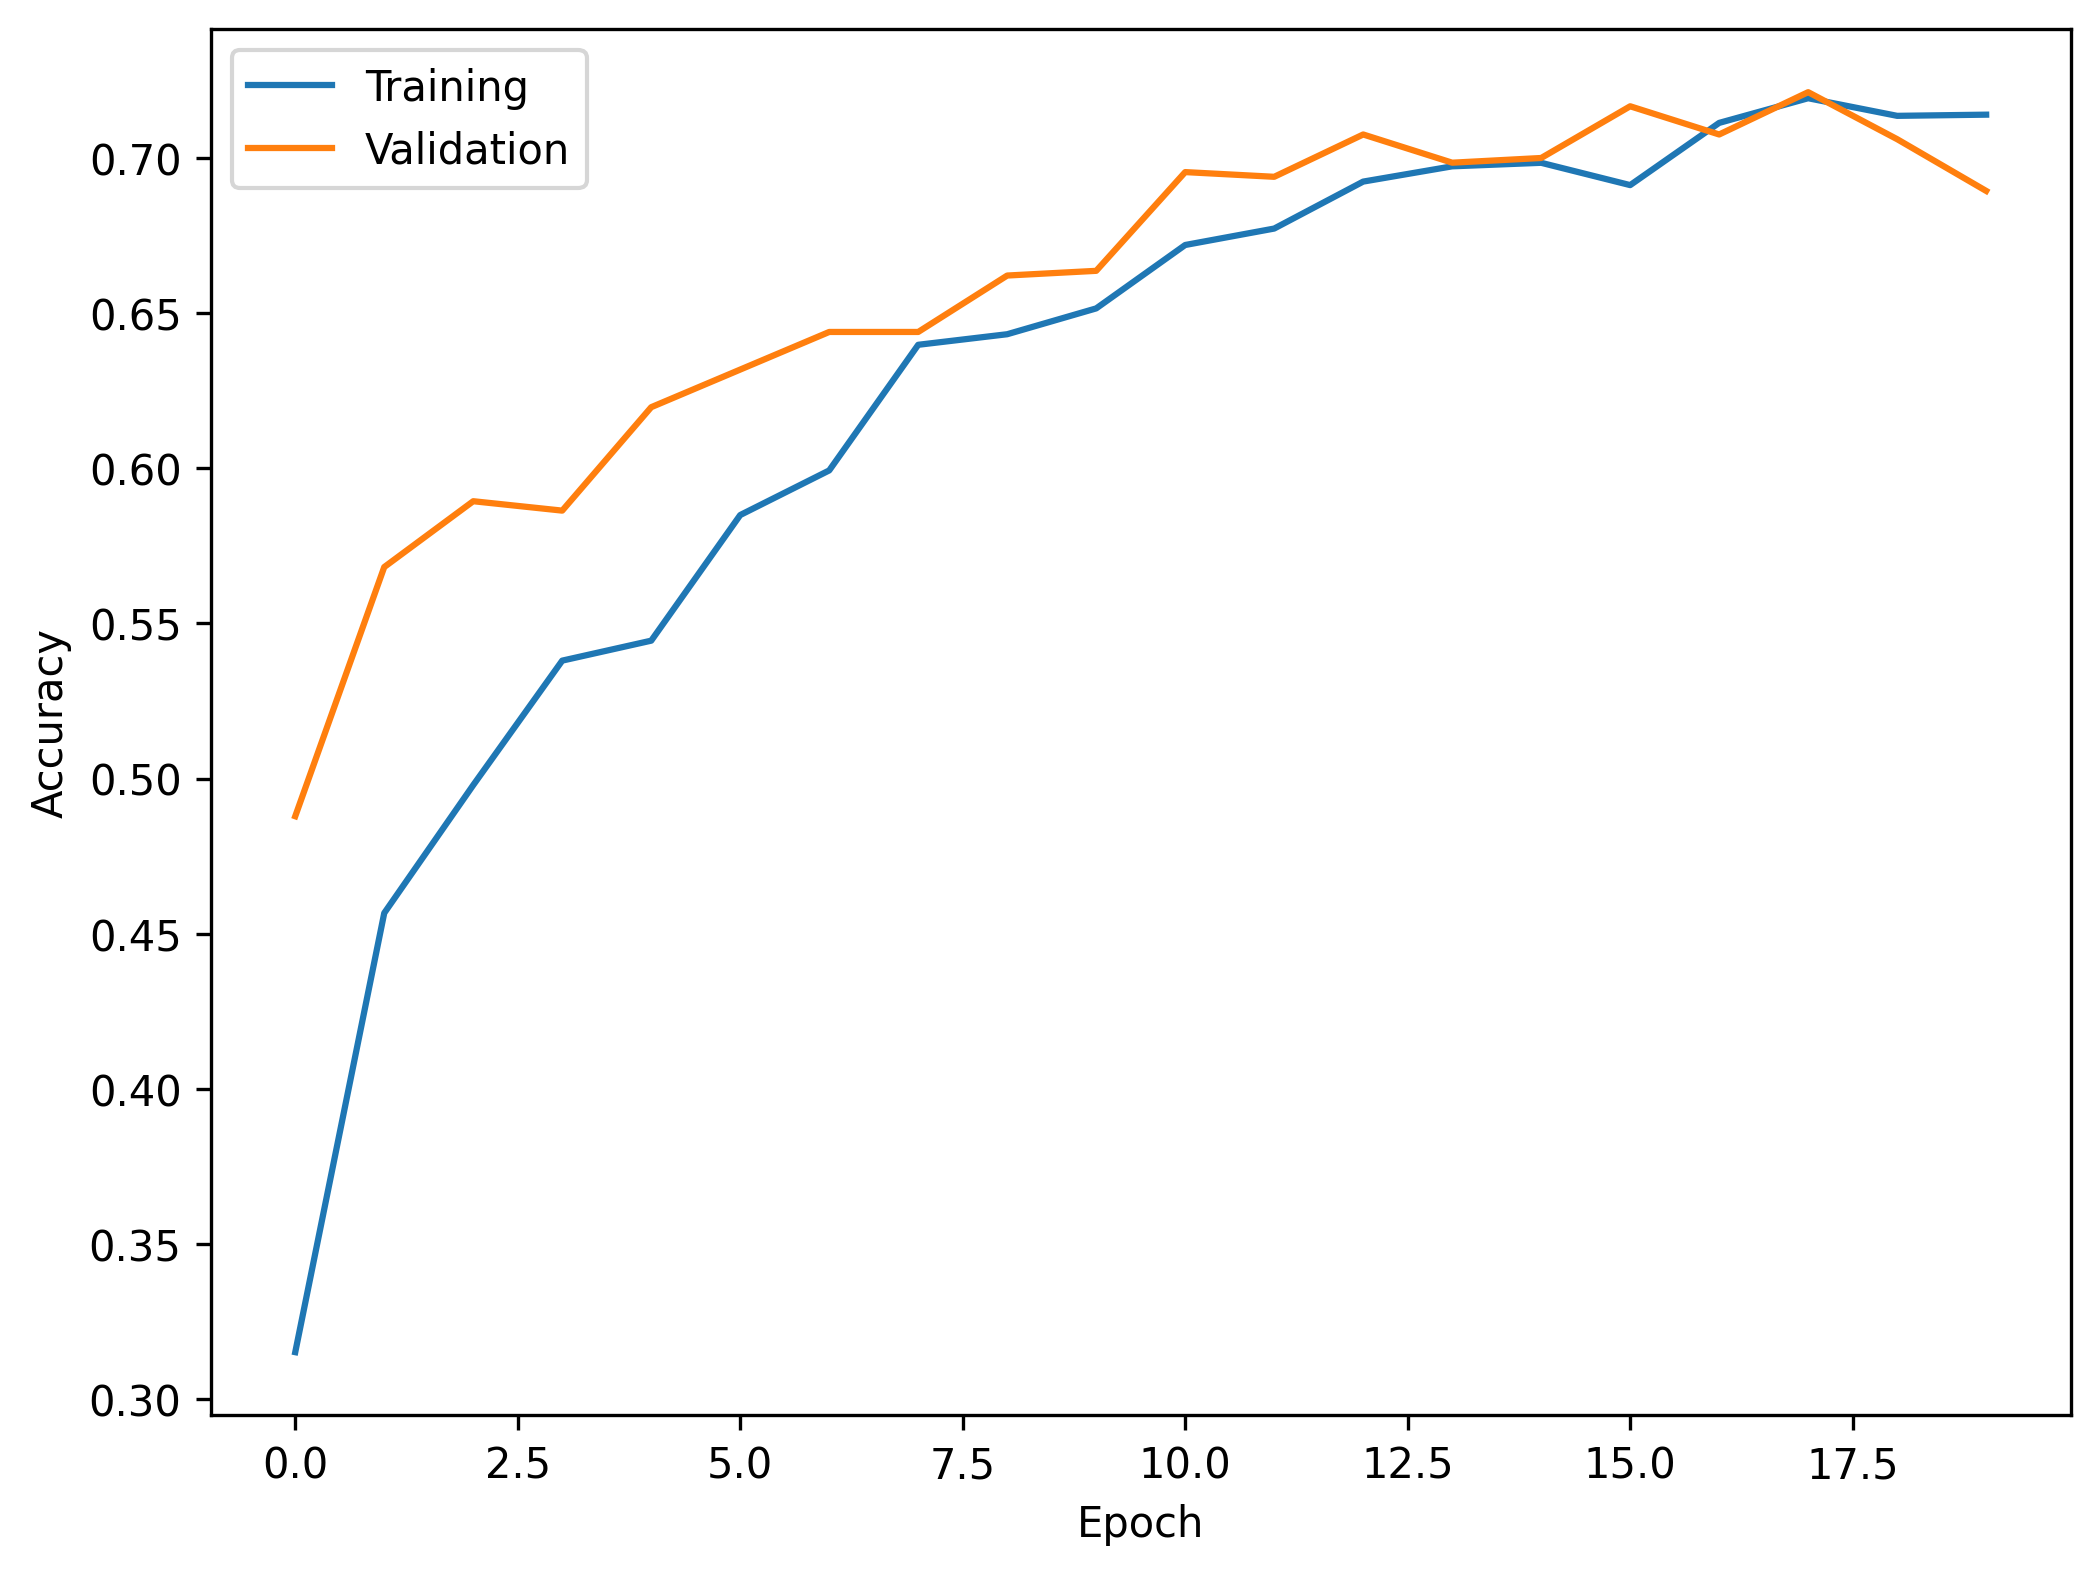

In [41]:
# Plot the training and validation accuracy
# versus epoch.
plt.figure(figsize = (8, 6), dpi = 300)
plt.plot(history_df["accuracy"], label = "Training")
plt.plot(history_df["val_accuracy"], label = "Validation")
# Add a legend to the plot.
plt.legend()
# Label both axes.
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
# Show the plot.
plt.show()

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.77      0.54      0.64        50
           1       0.68      0.86      0.76        91
           2       0.72      0.72      0.72        68
           3       0.76      0.84      0.80        70
           4       0.74      0.60      0.66        88

    accuracy                           0.72       367
   macro avg       0.73      0.71      0.72       367
weighted avg       0.73      0.72      0.72       367



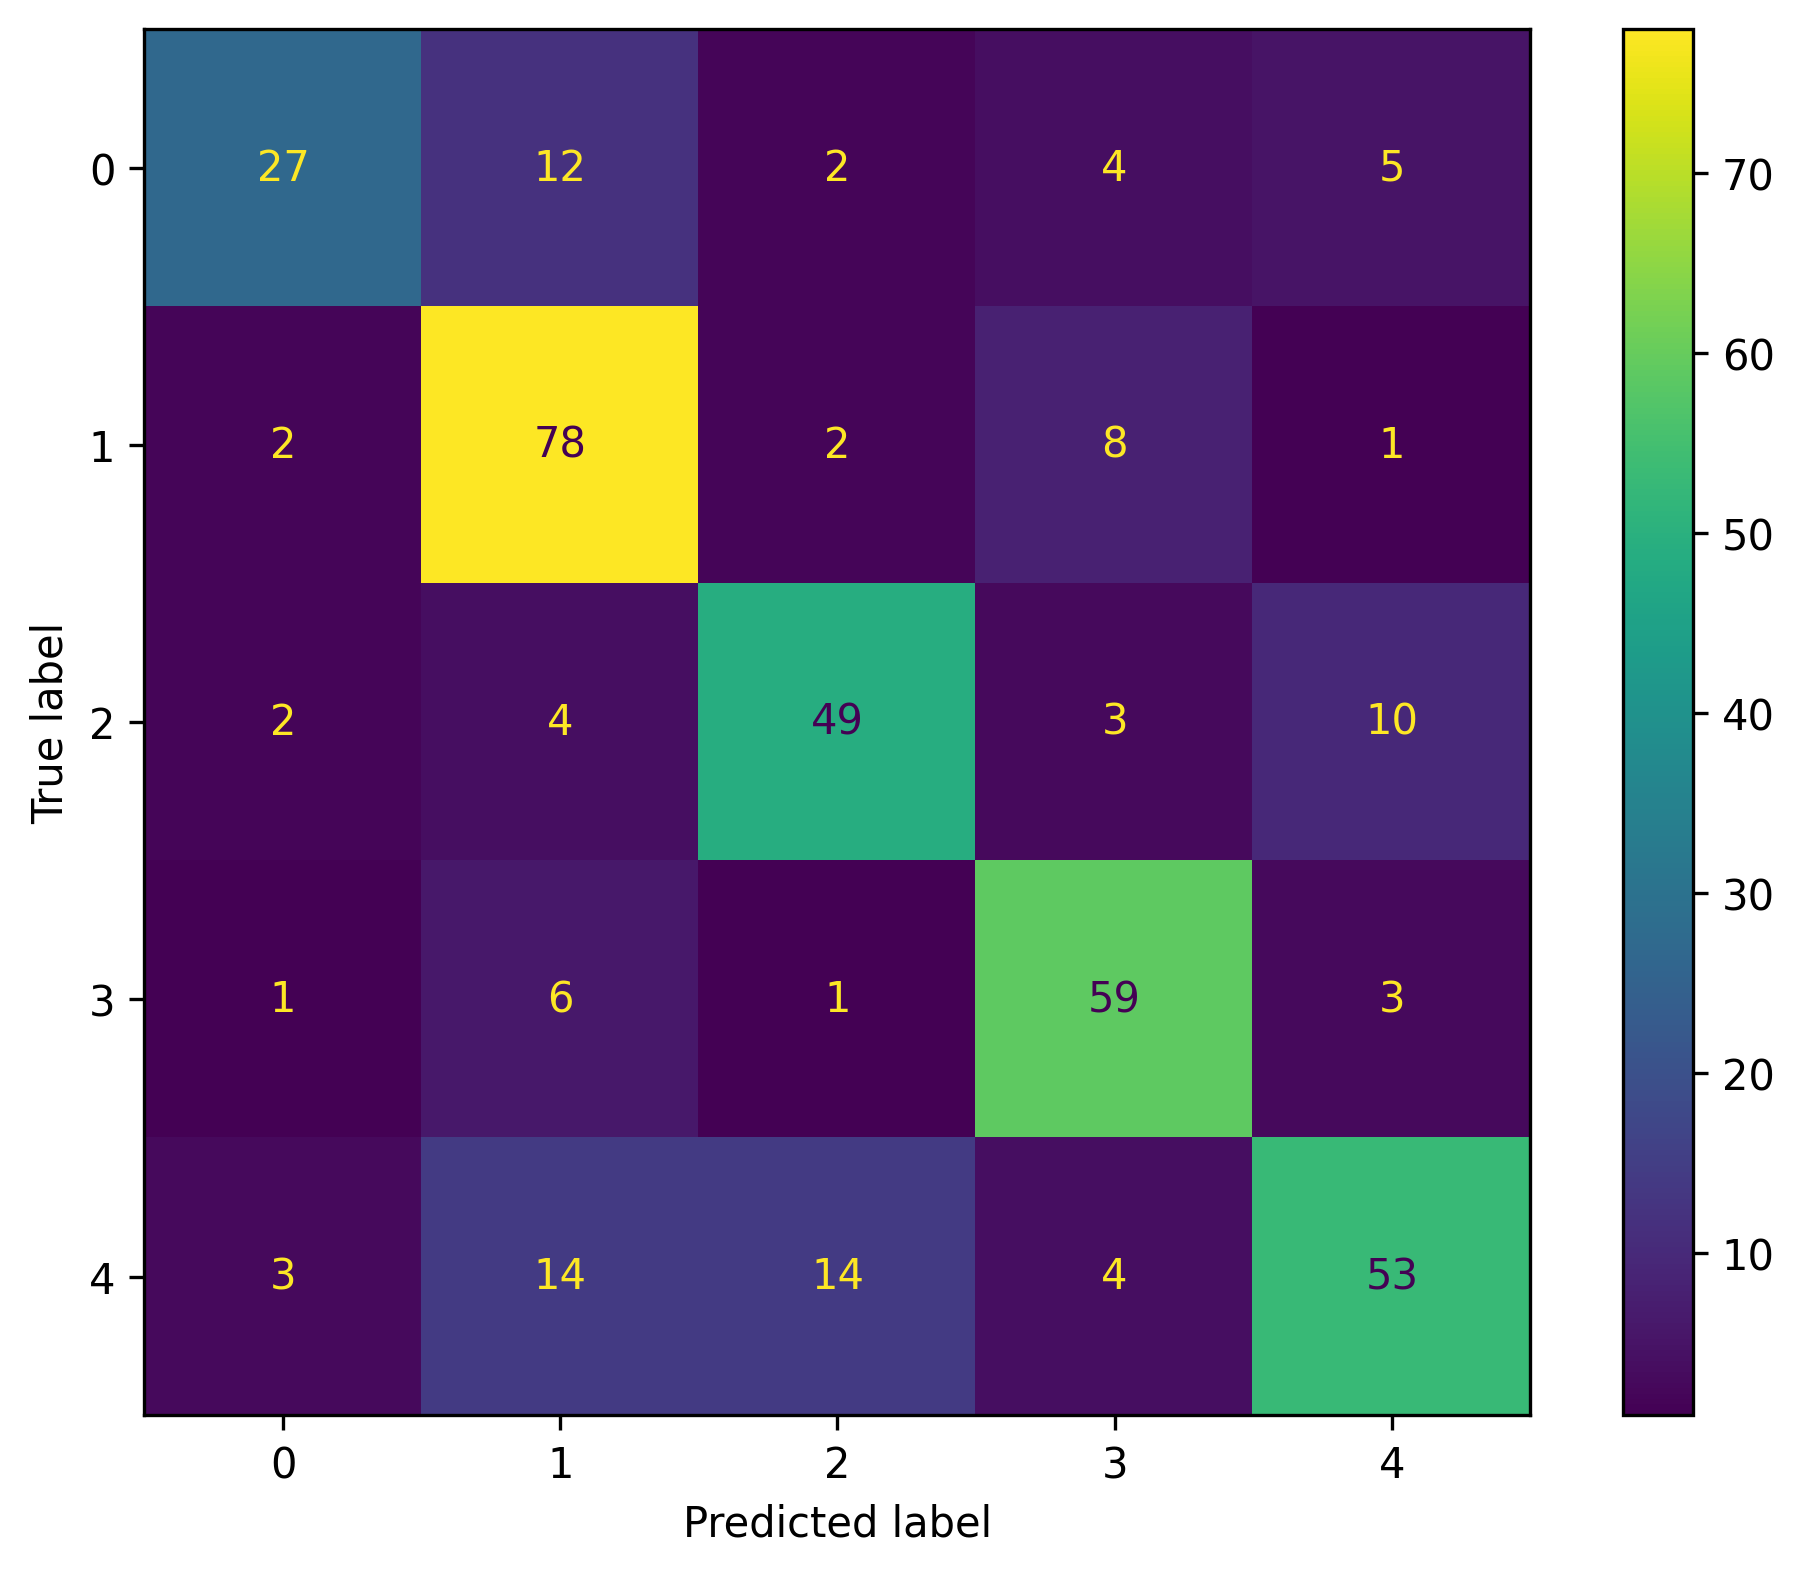

In [44]:
# Import the functions that we will need from sklearn to create
# and plot the confusion matrix.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Create the confusion matrix
con_mat = confusion_matrix(y_test, y_pred_class, labels = numerical_labels)
# Create the figure and axes
plt.figure(figsize = (8, 6), dpi = 300)
ax = plt.axes()
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix = con_mat, display_labels =display_labels)
disp.plot(ax = ax)
# Show the plot
plt.show()


### Model 4: Increase the Stride Length on the Conv2D Layers to 2

In [53]:
# Import the Sequential model from Tensor Flow
from tensorflow.keras.models import Sequential

# Import the layers that we will require from Tensor Flow.
# In addition to the Dense and Dropout layers (which we saw
# in last week's workshop), we are also going to use
# Conv2D (for 2-dimensional convolutional layers),
# MaxPooling2D (for 2-dimensional pooling layers),
# and Flatten (to flatten the output` from the last
# pooling layer ready to go into the fully connected part
# of the network).
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout
# Create an instance of the Sequential class.`
# This will be our model.
model = Sequential()
# Add the first Convolutional layer. Here we use 32 filters,
# which will each be convolved with the input data to
# produce 32 feature maps. We use a kernel_size of 3x3,
# and the relu activation function.
model.add(Conv2D(filters = 32, kernel_size = (3, 3), strides = (2, 2), padding="same", input_shape = (width_npix,height_npix, 3), activation = 'relu'))

# Add a pooling layer that uses max pooling,
# with a pool size of 2x2.
model.add(MaxPooling2D(pool_size = (2, 2), padding = "same"))
# Add a second convolutional layer, again with a kernel size of 3x3 and
# the relu activation function but now with 64 filters. Note that it
# is common to increase the number of filters as we go deeper into
# the network.
model.add(Conv2D(filters = 64, kernel_size = (3, 3),strides = (2, 2), padding="same", activation = 'relu'))
# Add a second max pooling layer.
model.add(MaxPooling2D(pool_size = (2, 2), padding = "same"))
# Add a third convolutional layer, now with 128 filters.
model.add(Conv2D(filters = 128, kernel_size = (3, 3),strides = (2, 2), padding="same", activation = 'relu'))
# Add a third max pooling layer.
model.add(MaxPooling2D(pool_size = (2, 2), padding = "same"))
# After the final pooling layer, we need a flatter layer,
# which will flatten the output to a 1-dimensional array,
# ready for the fully connected network.
model.add(Flatten())
# Add a Dense (i.e. fully connected) layer with 64 neurons
# and the relu activation function.
model.add(Dense(64, activation = 'relu'))
# Apply a dropout rate of 50% to the dense layer.
model.add(Dropout(0.5))
# The output layer needs 10 units, corresponding
# to the 10 output classes. We use the softmax
# activation function, which means the resulting
# output values will represent the probabilities
# for each of the 10 class labels.
model.add(Dense(5, activation = 'softmax'))
# Print a summary of the model.
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 64, 64, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 16, 16, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 4, 4, 128)        

Epoch 1/20
83/83 [==============================] - 45s 528ms/step - loss: 1.4359 - accuracy: 0.3439 - val_loss: 1.2182 - val_accuracy: 0.4470
Epoch 2/20
83/83 [==============================] - 44s 526ms/step - loss: 1.2465 - accuracy: 0.4465 - val_loss: 1.1137 - val_accuracy: 0.5455
Epoch 3/20
83/83 [==============================] - 43s 521ms/step - loss: 1.1803 - accuracy: 0.4964 - val_loss: 1.0387 - val_accuracy: 0.5818
Epoch 4/20
83/83 [==============================] - 44s 526ms/step - loss: 1.1162 - accuracy: 0.5358 - val_loss: 0.9825 - val_accuracy: 0.6121
Epoch 5/20
83/83 [==============================] - 43s 523ms/step - loss: 1.0433 - accuracy: 0.5713 - val_loss: 0.9380 - val_accuracy: 0.6364
Epoch 6/20
83/83 [==============================] - 44s 531ms/step - loss: 1.0118 - accuracy: 0.5906 - val_loss: 0.8854 - val_accuracy: 0.6621
Epoch 7/20
83/83 [==============================] - 43s 524ms/step - loss: 0.9639 - accuracy: 0.6266 - val_loss: 0.8440 - val_accuracy: 0.6985

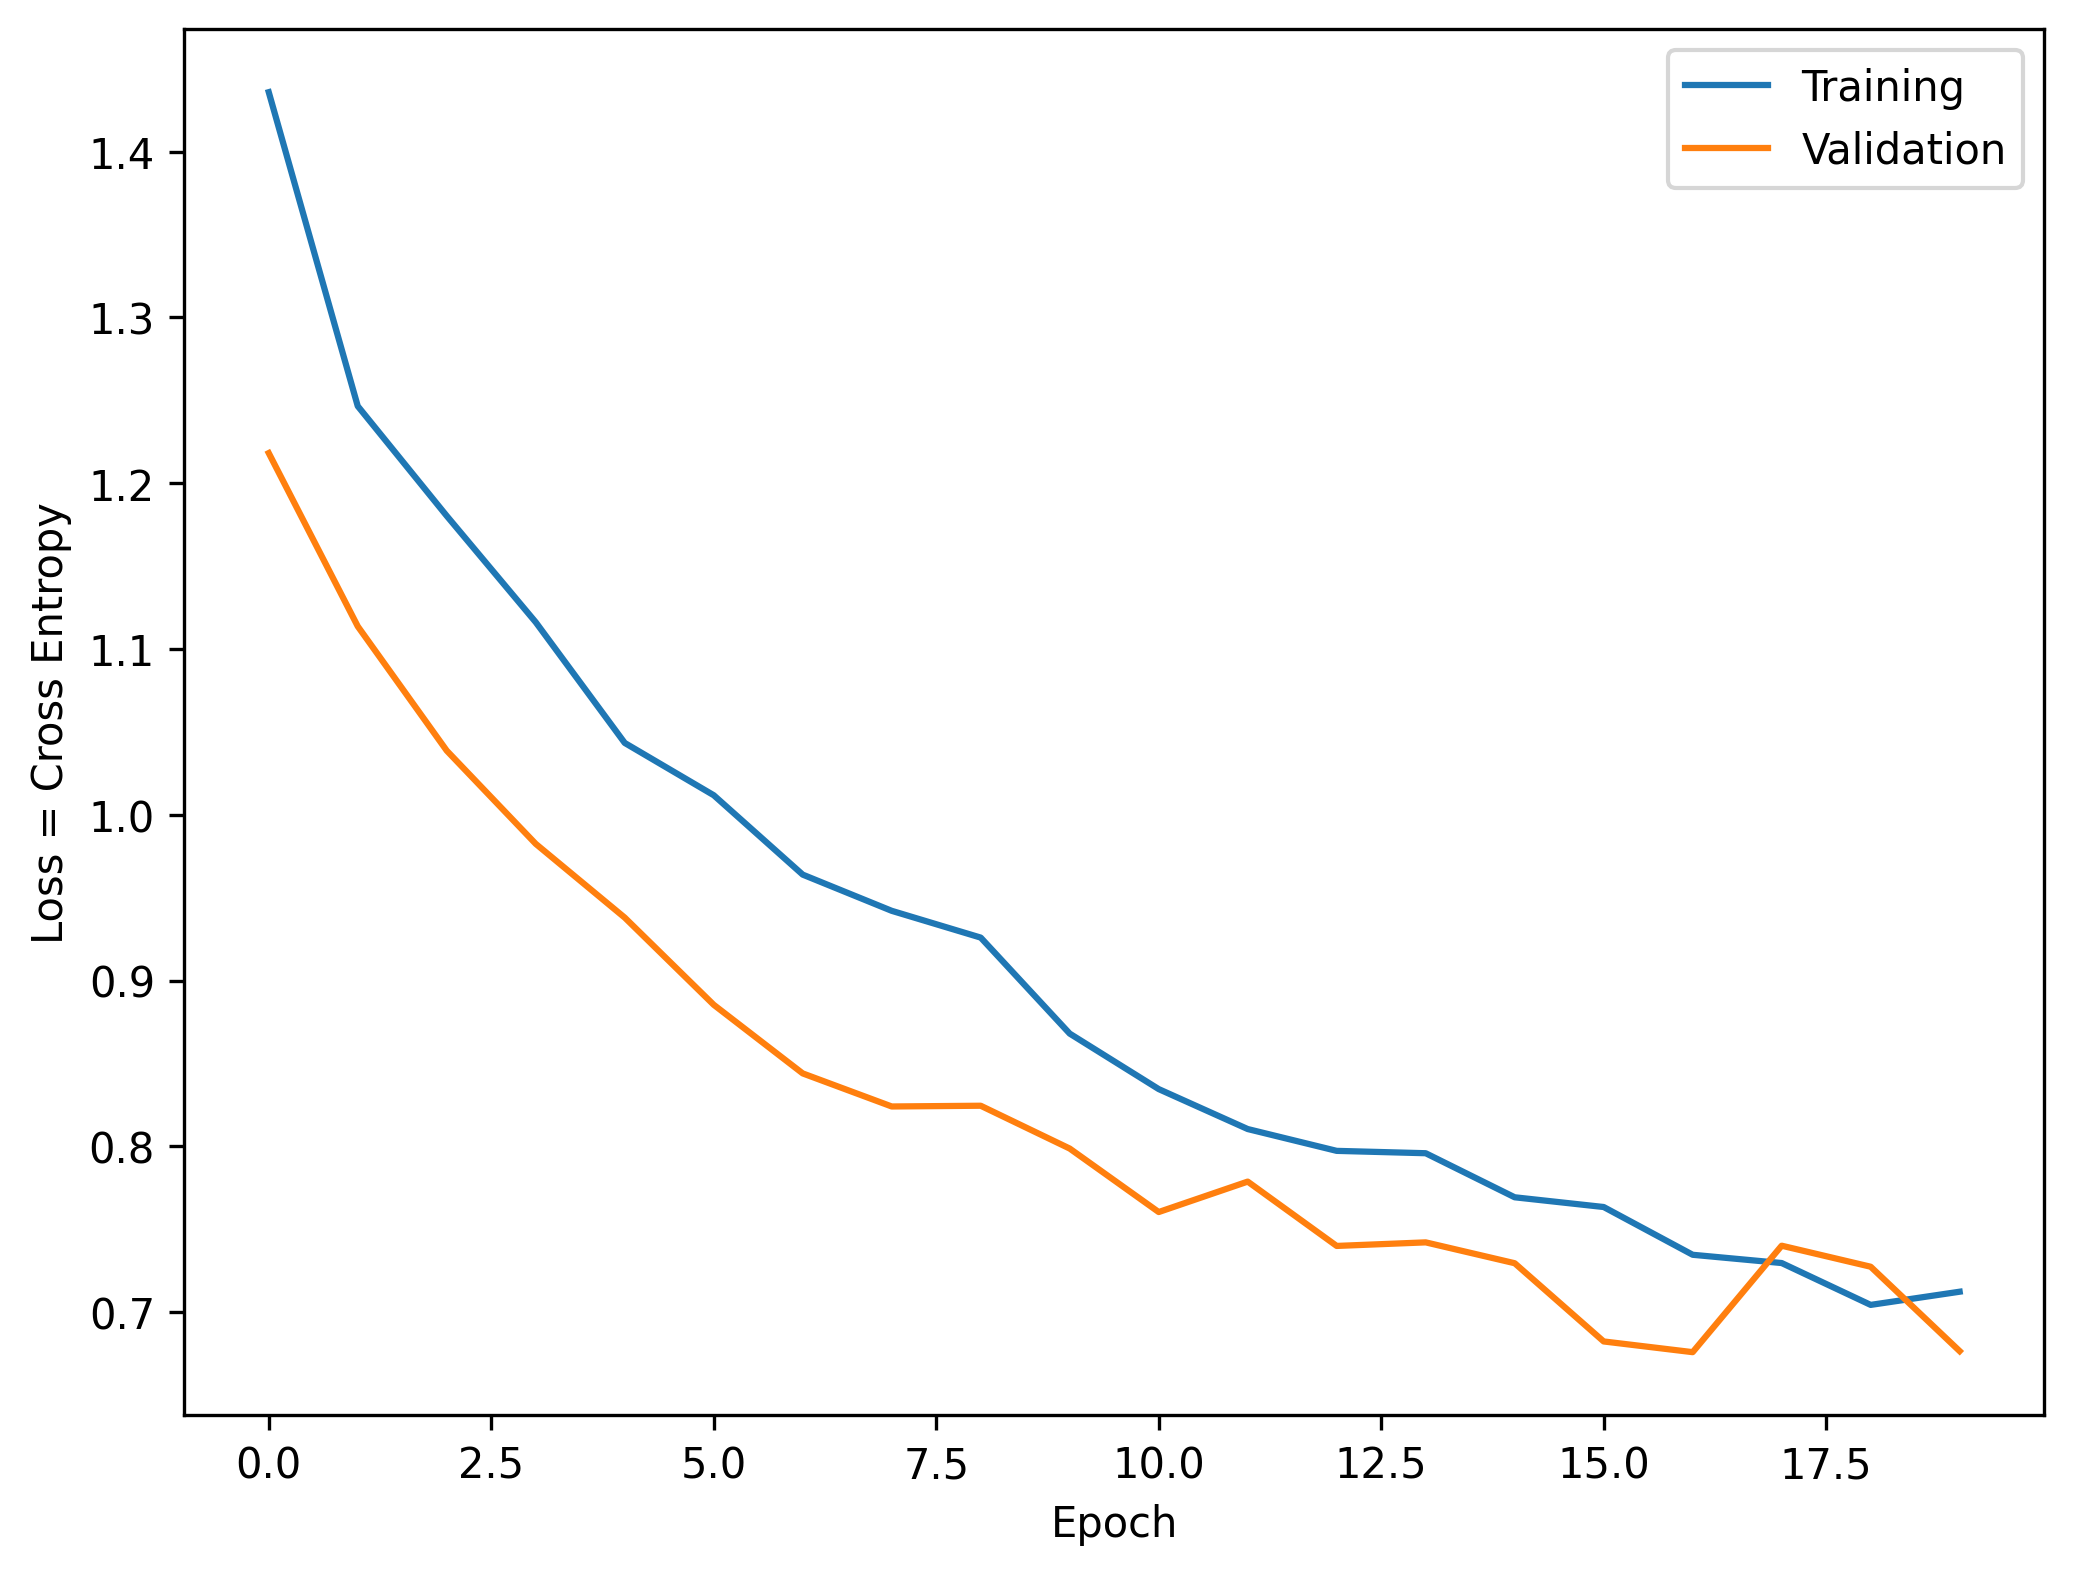

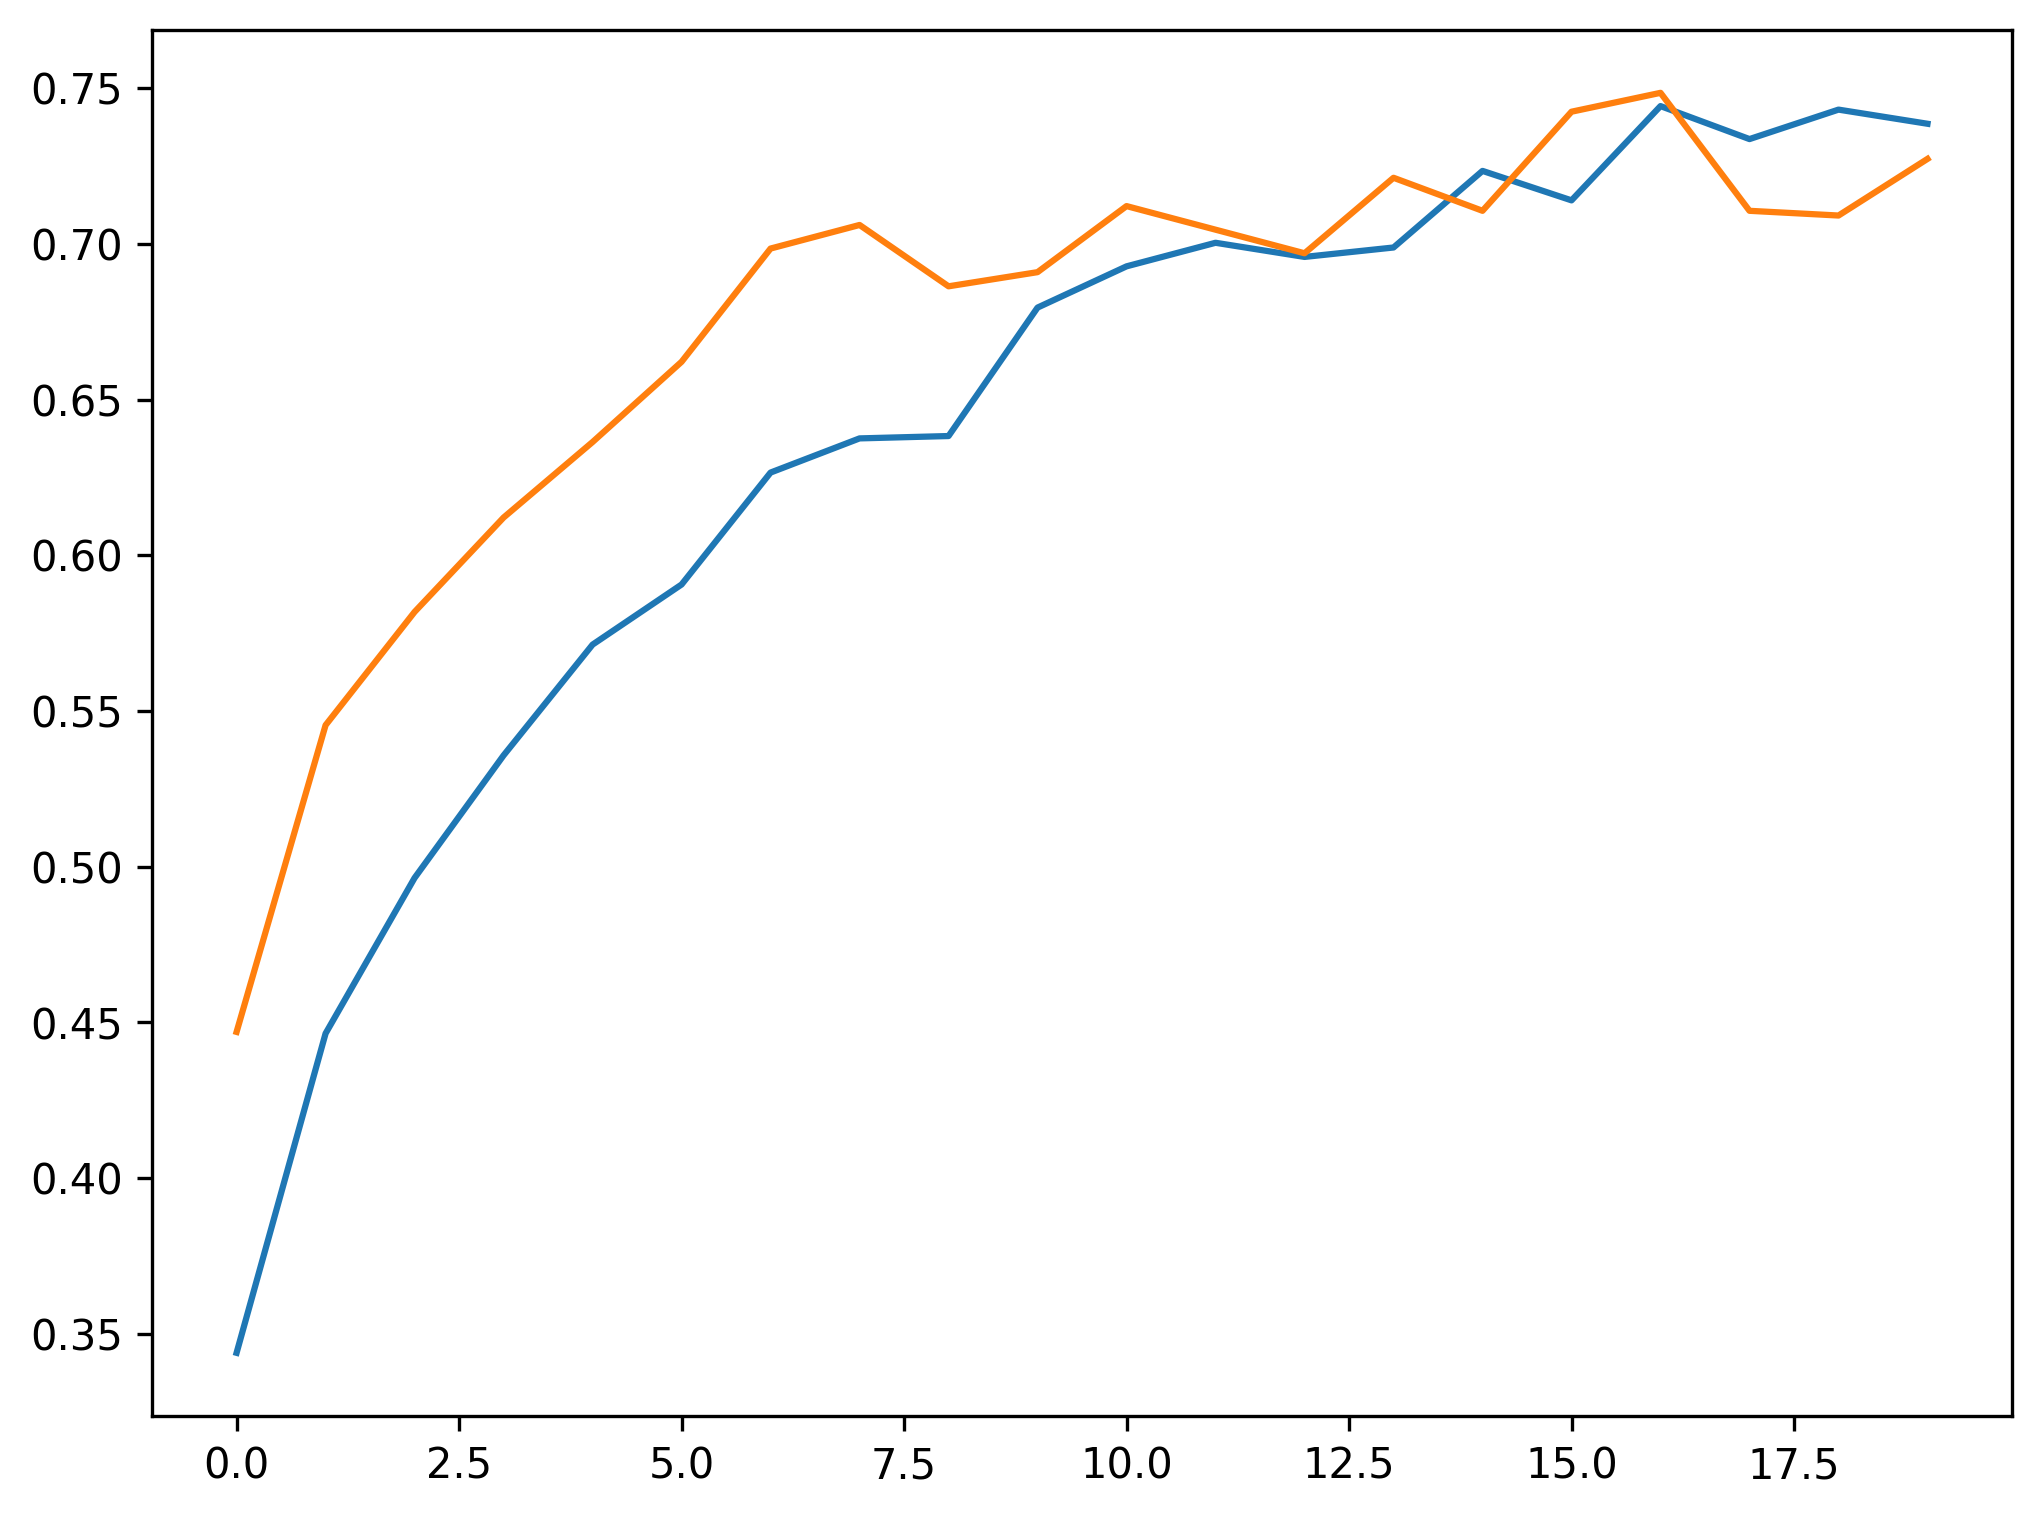

In [54]:
# Create an instance of the Adam class,
# and set the learning rate.
adam_optimizer = Adam(learning_rate = 0.001)
# Compile the model. As this is a classification problem,
# we are going to use the categorical cross entropy for the
# loss function, and we will use the accuracy for metrics.
model.compile(adam_optimizer, loss='categorical_crossentropy',metrics='accuracy')
# Define the batch size
batch_size = 32
# Fit the model, and record the history of the fit.
# In this example we will train the model for 20
# epochs.
history = model.fit(train_datagen.flow(x_train_norm, y_train_cat, batch_size =batch_size, subset = "training"), epochs = 20,validation_data = train_datagen.flow(x_train_norm,y_train_cat, batch_size = batch_size, subset = "validation"))
# Create a pandas dataframe containing
# the history of the fitting
history_df = pd.DataFrame(history.history)
# Plot the training and validation losses
# versus epoch.
plt.figure(figsize = (8, 6), dpi = 300)
plt.plot(history_df["loss"], label = "Training")
plt.plot(history_df["val_loss"], label = "Validation")
# Add a legend to the plot.
plt.legend()
# Label both axes.
plt.xlabel("Epoch")
plt.ylabel("Loss = Cross Entropy")
# Show the plot.
plt.show()
# Plot the training and validation accuracy
# versus epoch.
plt.figure(figsize = (8, 6), dpi = 300)
plt.plot(history_df["accuracy"], label = "Training")
plt.plot(history_df["val_accuracy"], label = "Validation")



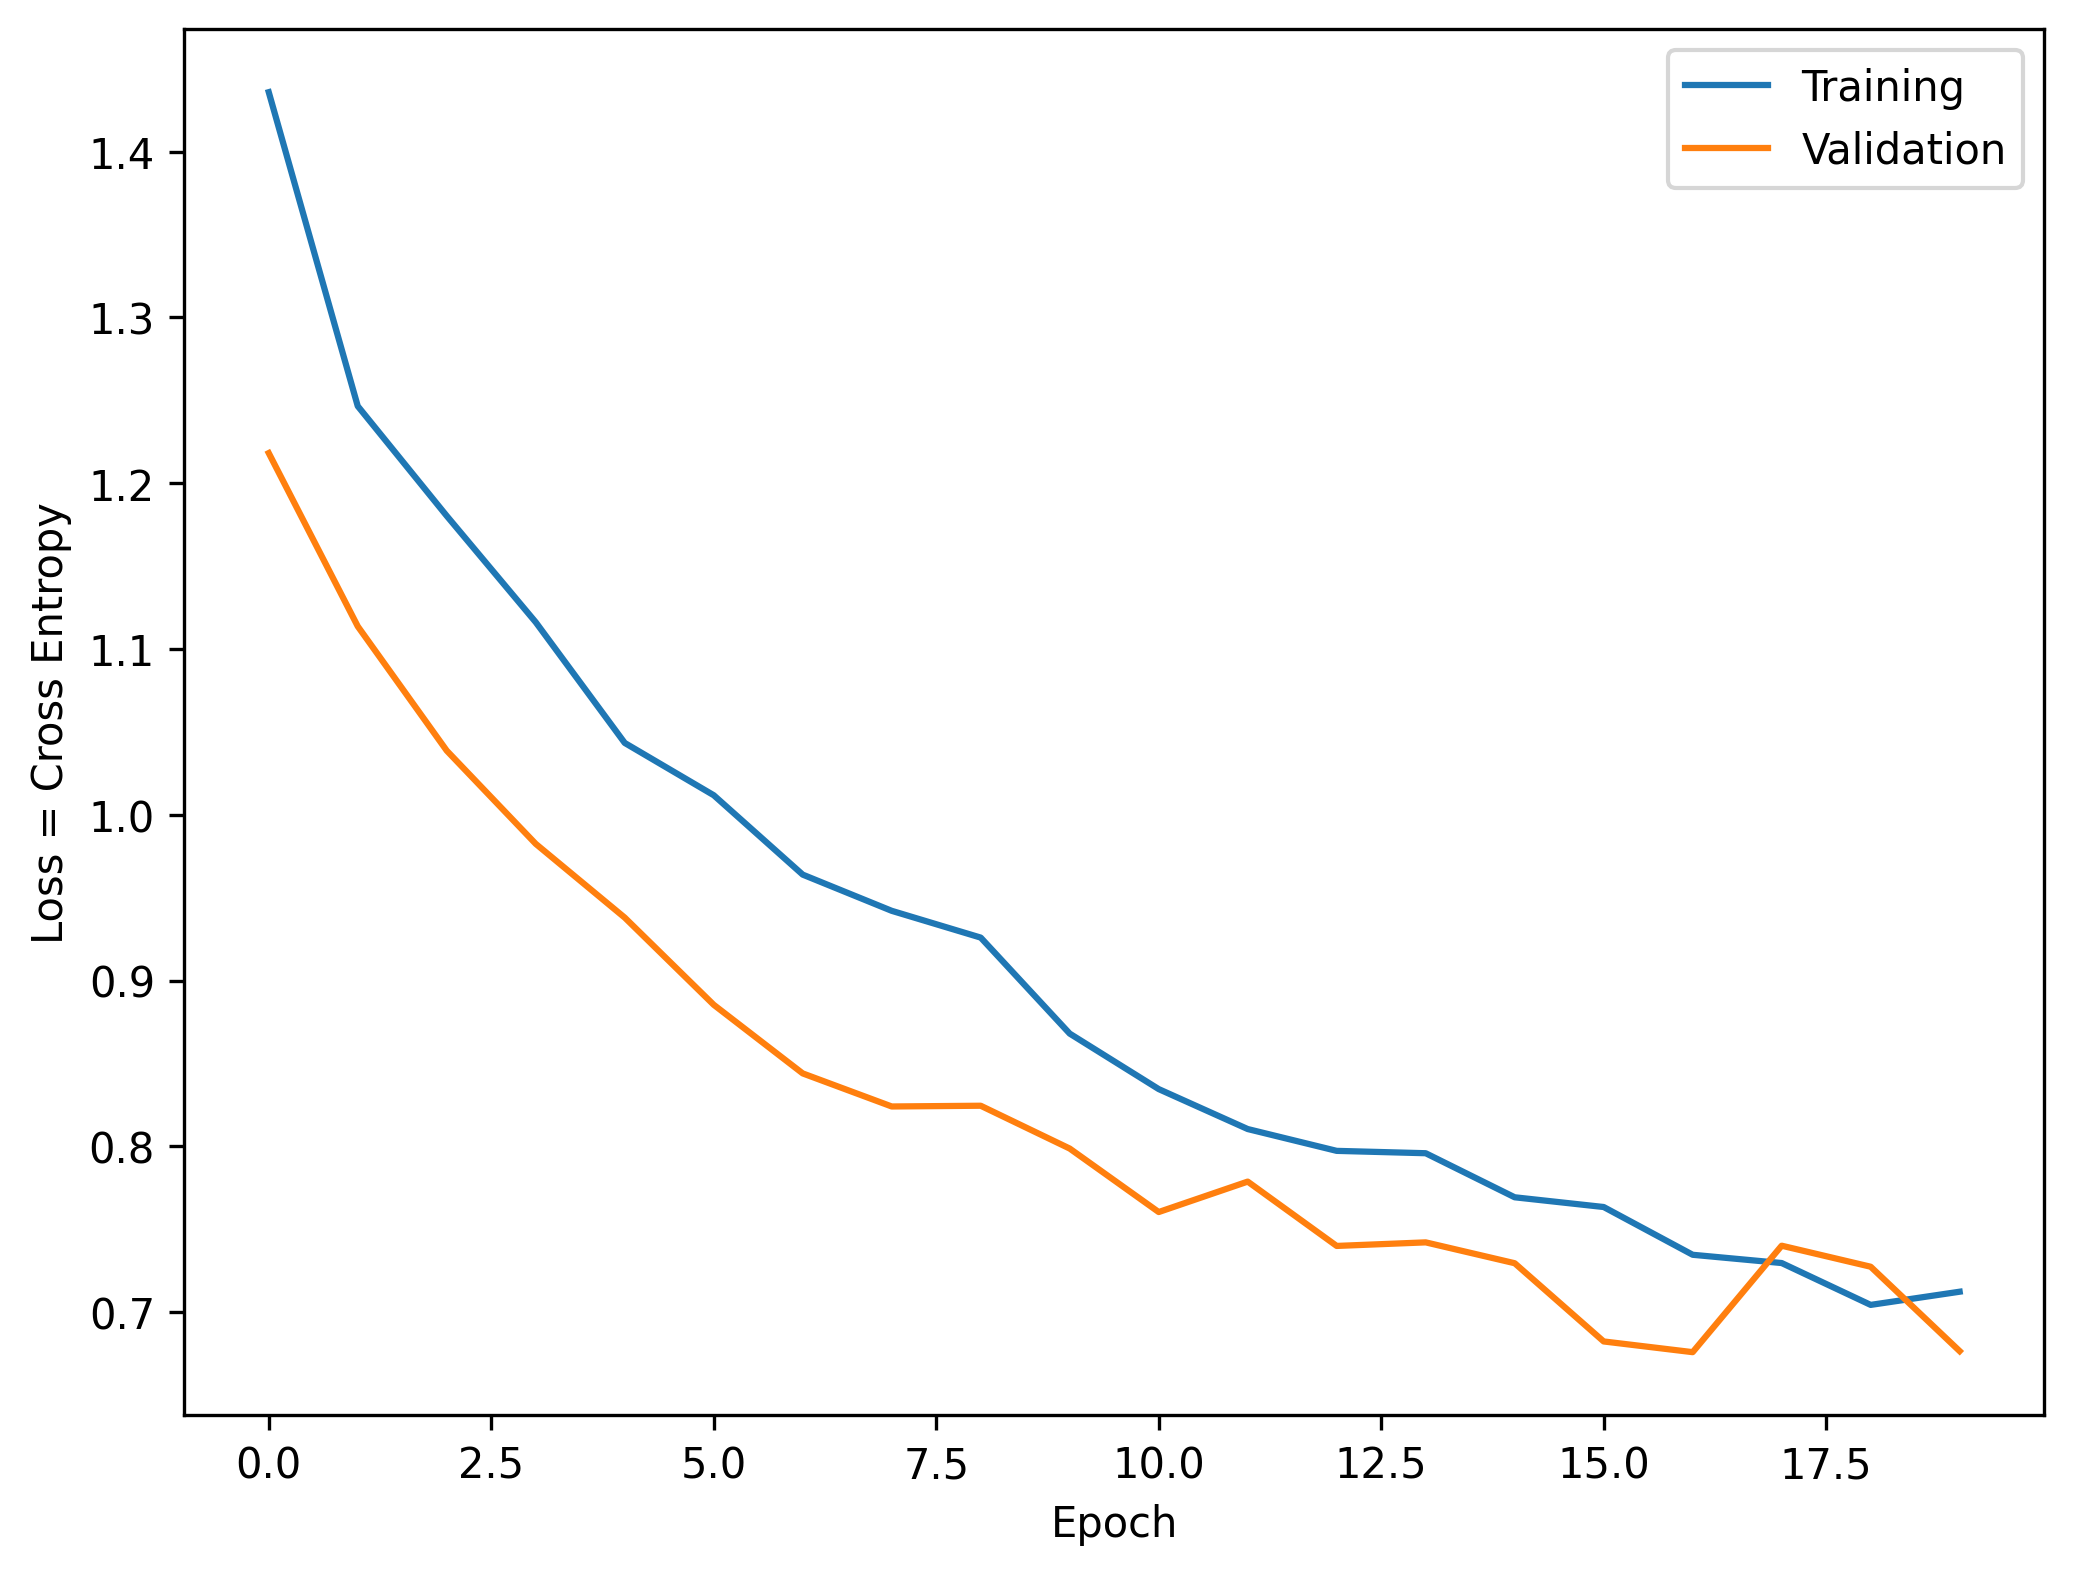

In [57]:
# Create a pandas dataframe containing
# the history of the fitting
history_df = pd.DataFrame(history.history)
# Plot the training and validation losses
# versus epoch.
plt.figure(figsize = (8, 6), dpi = 300)
plt.plot(history_df["loss"], label = "Training")
plt.plot(history_df["val_loss"], label = "Validation")
# Add a legend to the plot.
plt.legend()
# Label both axes.
plt.xlabel("Epoch")
plt.ylabel("Loss = Cross Entropy")
# Show the plot.
plt.show()

In [58]:
# Before we plot the confusion matrix, we need
# to find which label corresponds to which index.
# This is actually somewhat trivial in this case,
# as the labels are just the digits 0-9.
# Names of each label
display_labels = ["%d" % (i, ) for i in range(5)]
# Numerical index of each label
numerical_labels = [i for i in range(5)]
# Lets check the label strings and the
# numerical labels to make sure they line up.
print(display_labels)
print(numerical_labels)



['0', '1', '2', '3', '4']
[0, 1, 2, 3, 4]


In [59]:
# Now use the trained model to predict output
# classes in the test set
y_pred = model.predict(x_test_norm)
# Recall that the outputs from the model give the
# probability of each class label. We can now use
# the argmax() function to determine the index
# of the label with the highest probability for
# each row in y_pred. These will be our predicted
# class labels.
y_pred_class = np.argmax(y_pred, axis=1)

12/12 [==============================] - 1s 49ms/step


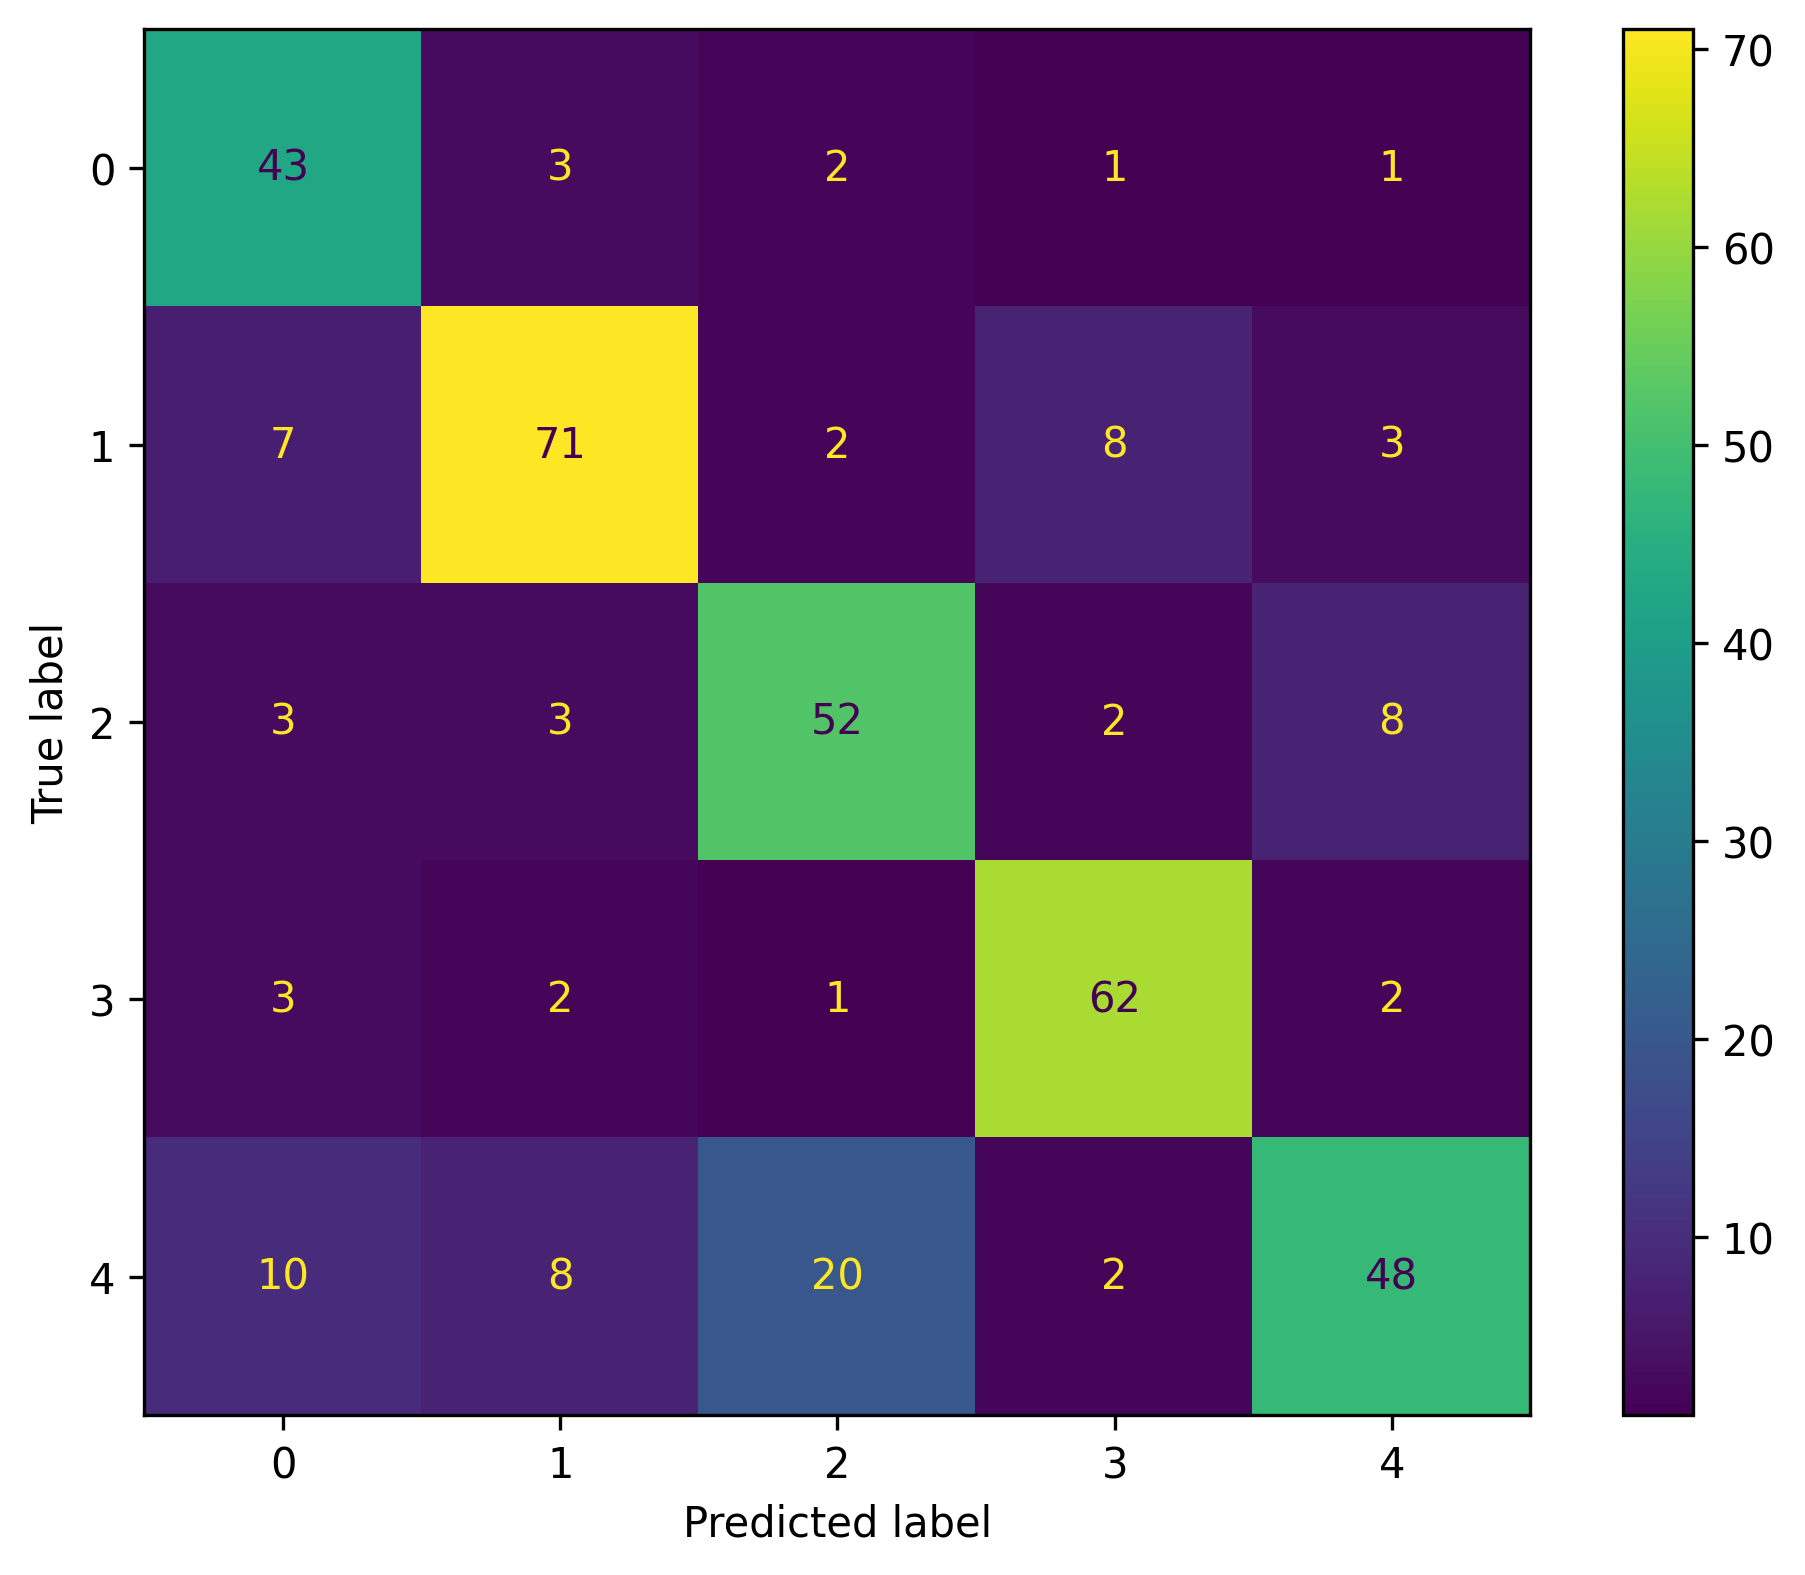

In [60]:
# Import the functions that we will need from sklearn to create
# and plot the confusion matrix.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Create the confusion matrix
con_mat = confusion_matrix(y_test, y_pred_class, labels = numerical_labels)
# Create the figure and axes
plt.figure(figsize = (8, 6), dpi = 300)
ax = plt.axes()
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix = con_mat, display_labels =display_labels)
disp.plot(ax = ax)
# Show the plot
plt.show()

In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.65      0.86      0.74        50
           1       0.82      0.78      0.80        91
           2       0.68      0.76      0.72        68
           3       0.83      0.89      0.86        70
           4       0.77      0.55      0.64        88

    accuracy                           0.75       367
   macro avg       0.75      0.77      0.75       367
weighted avg       0.76      0.75      0.75       367



### Model 5: Changing Maxpooling to Avgpooling

In [62]:
# Import the AveragePooling from Tensor Flow
from tensorflow.keras.layers import AveragePooling2D

model = Sequential()
# Add the first Convolutional layer. 
model.add(Conv2D(filters = 32, kernel_size = (3, 3), strides = (2, 2), padding="same", input_shape = (width_npix,height_npix, 3), activation = 'relu'))

# Add a pooling layer that uses max pooling,
# with a pool size of 2x2.
model.add(AveragePooling2D(pool_size = (2, 2), padding = "same"))
# Add a second convolutional layer, again with a kernel size of 3x3 and
# the relu activation function but now with 64 filters. Note that it
# is common to increase the number of filters as we go deeper into
# the network.
model.add(Conv2D(filters = 64, kernel_size = (3, 3),strides = (2, 2), padding="same", activation = 'relu'))
# Add a second max pooling layer.
model.add(AveragePooling2D(pool_size = (2, 2), padding = "same"))
# Add a third convolutional layer, now with 128 filters.
model.add(Conv2D(filters = 128, kernel_size = (3, 3),strides = (2, 2), padding="same", activation = 'relu'))
# Add a third max pooling layer.
model.add(AveragePooling2D(pool_size = (2, 2), padding = "same"))
# After the final pooling layer, we need a flatter layer,
# which will flatten the output to a 1-dimensional array,
# ready for the fully connected network.
model.add(Flatten())
# Add a Dense (i.e. fully connected) layer with 64 neurons
# and the relu activation function.
model.add(Dense(64, activation = 'relu'))
# Apply a dropout rate of 50% to the dense layer.
model.add(Dropout(0.5))
# The output layer needs 10 units, corresponding
# to the 10 output classes. We use the softmax
# activation function, which means the resulting
# output values will represent the probabilities
# for each of the 10 class labels.
model.add(Dense(5, activation = 'softmax'))
# Print a summary of the model.
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 average_pooling2d (Average  (None, 64, 64, 32)        0         
 Pooling2D)                                                      
                                                                 
 conv2d_28 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 average_pooling2d_1 (Avera  (None, 16, 16, 64)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_29 (Conv2D)          (None, 8, 8, 128)         73856     
                                                                 
 average_pooling2d_2 (Avera  (None, 4, 4, 128)        

Epoch 1/20
83/83 [==============================] - 43s 507ms/step - loss: 1.4567 - accuracy: 0.3458 - val_loss: 1.2563 - val_accuracy: 0.4530
Epoch 2/20
83/83 [==============================] - 42s 501ms/step - loss: 1.2838 - accuracy: 0.4408 - val_loss: 1.2000 - val_accuracy: 0.5015
Epoch 3/20
83/83 [==============================] - 42s 501ms/step - loss: 1.2300 - accuracy: 0.4699 - val_loss: 1.1476 - val_accuracy: 0.5000
Epoch 4/20
83/83 [==============================] - 43s 515ms/step - loss: 1.1672 - accuracy: 0.4975 - val_loss: 1.1062 - val_accuracy: 0.5061
Epoch 5/20
83/83 [==============================] - 42s 508ms/step - loss: 1.1400 - accuracy: 0.5267 - val_loss: 1.0903 - val_accuracy: 0.5682
Epoch 6/20
83/83 [==============================] - 42s 502ms/step - loss: 1.1147 - accuracy: 0.5554 - val_loss: 1.0530 - val_accuracy: 0.5727
Epoch 7/20
83/83 [==============================] - 42s 503ms/step - loss: 1.0947 - accuracy: 0.5638 - val_loss: 1.0414 - val_accuracy: 0.5848

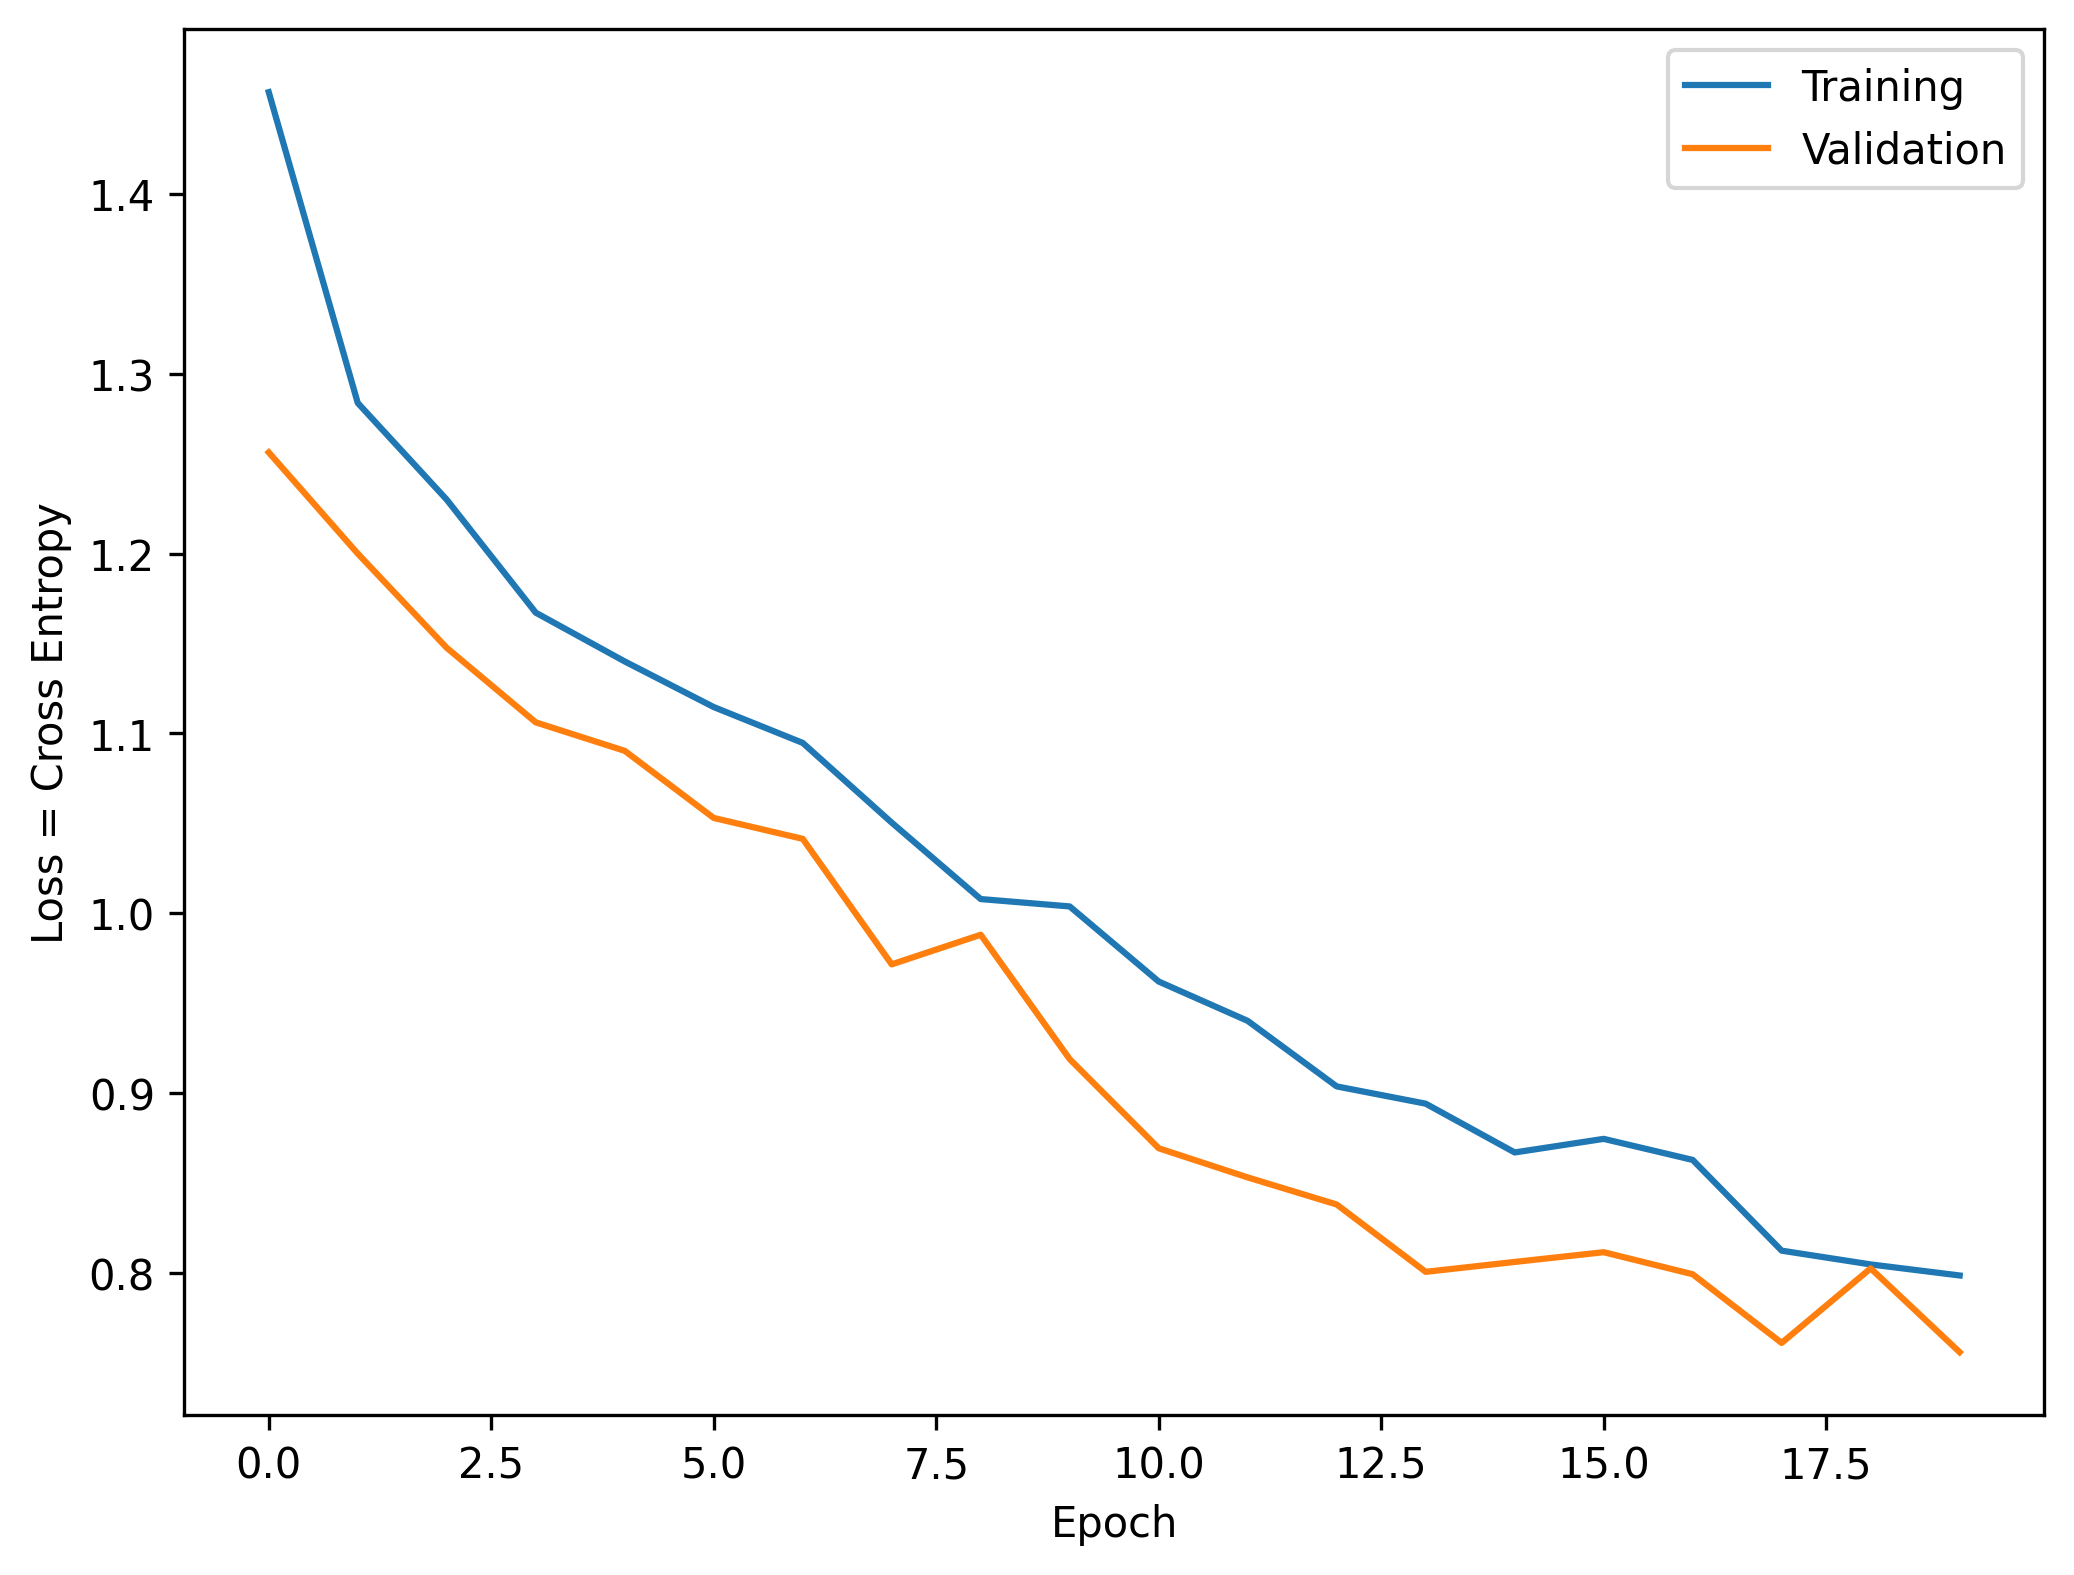

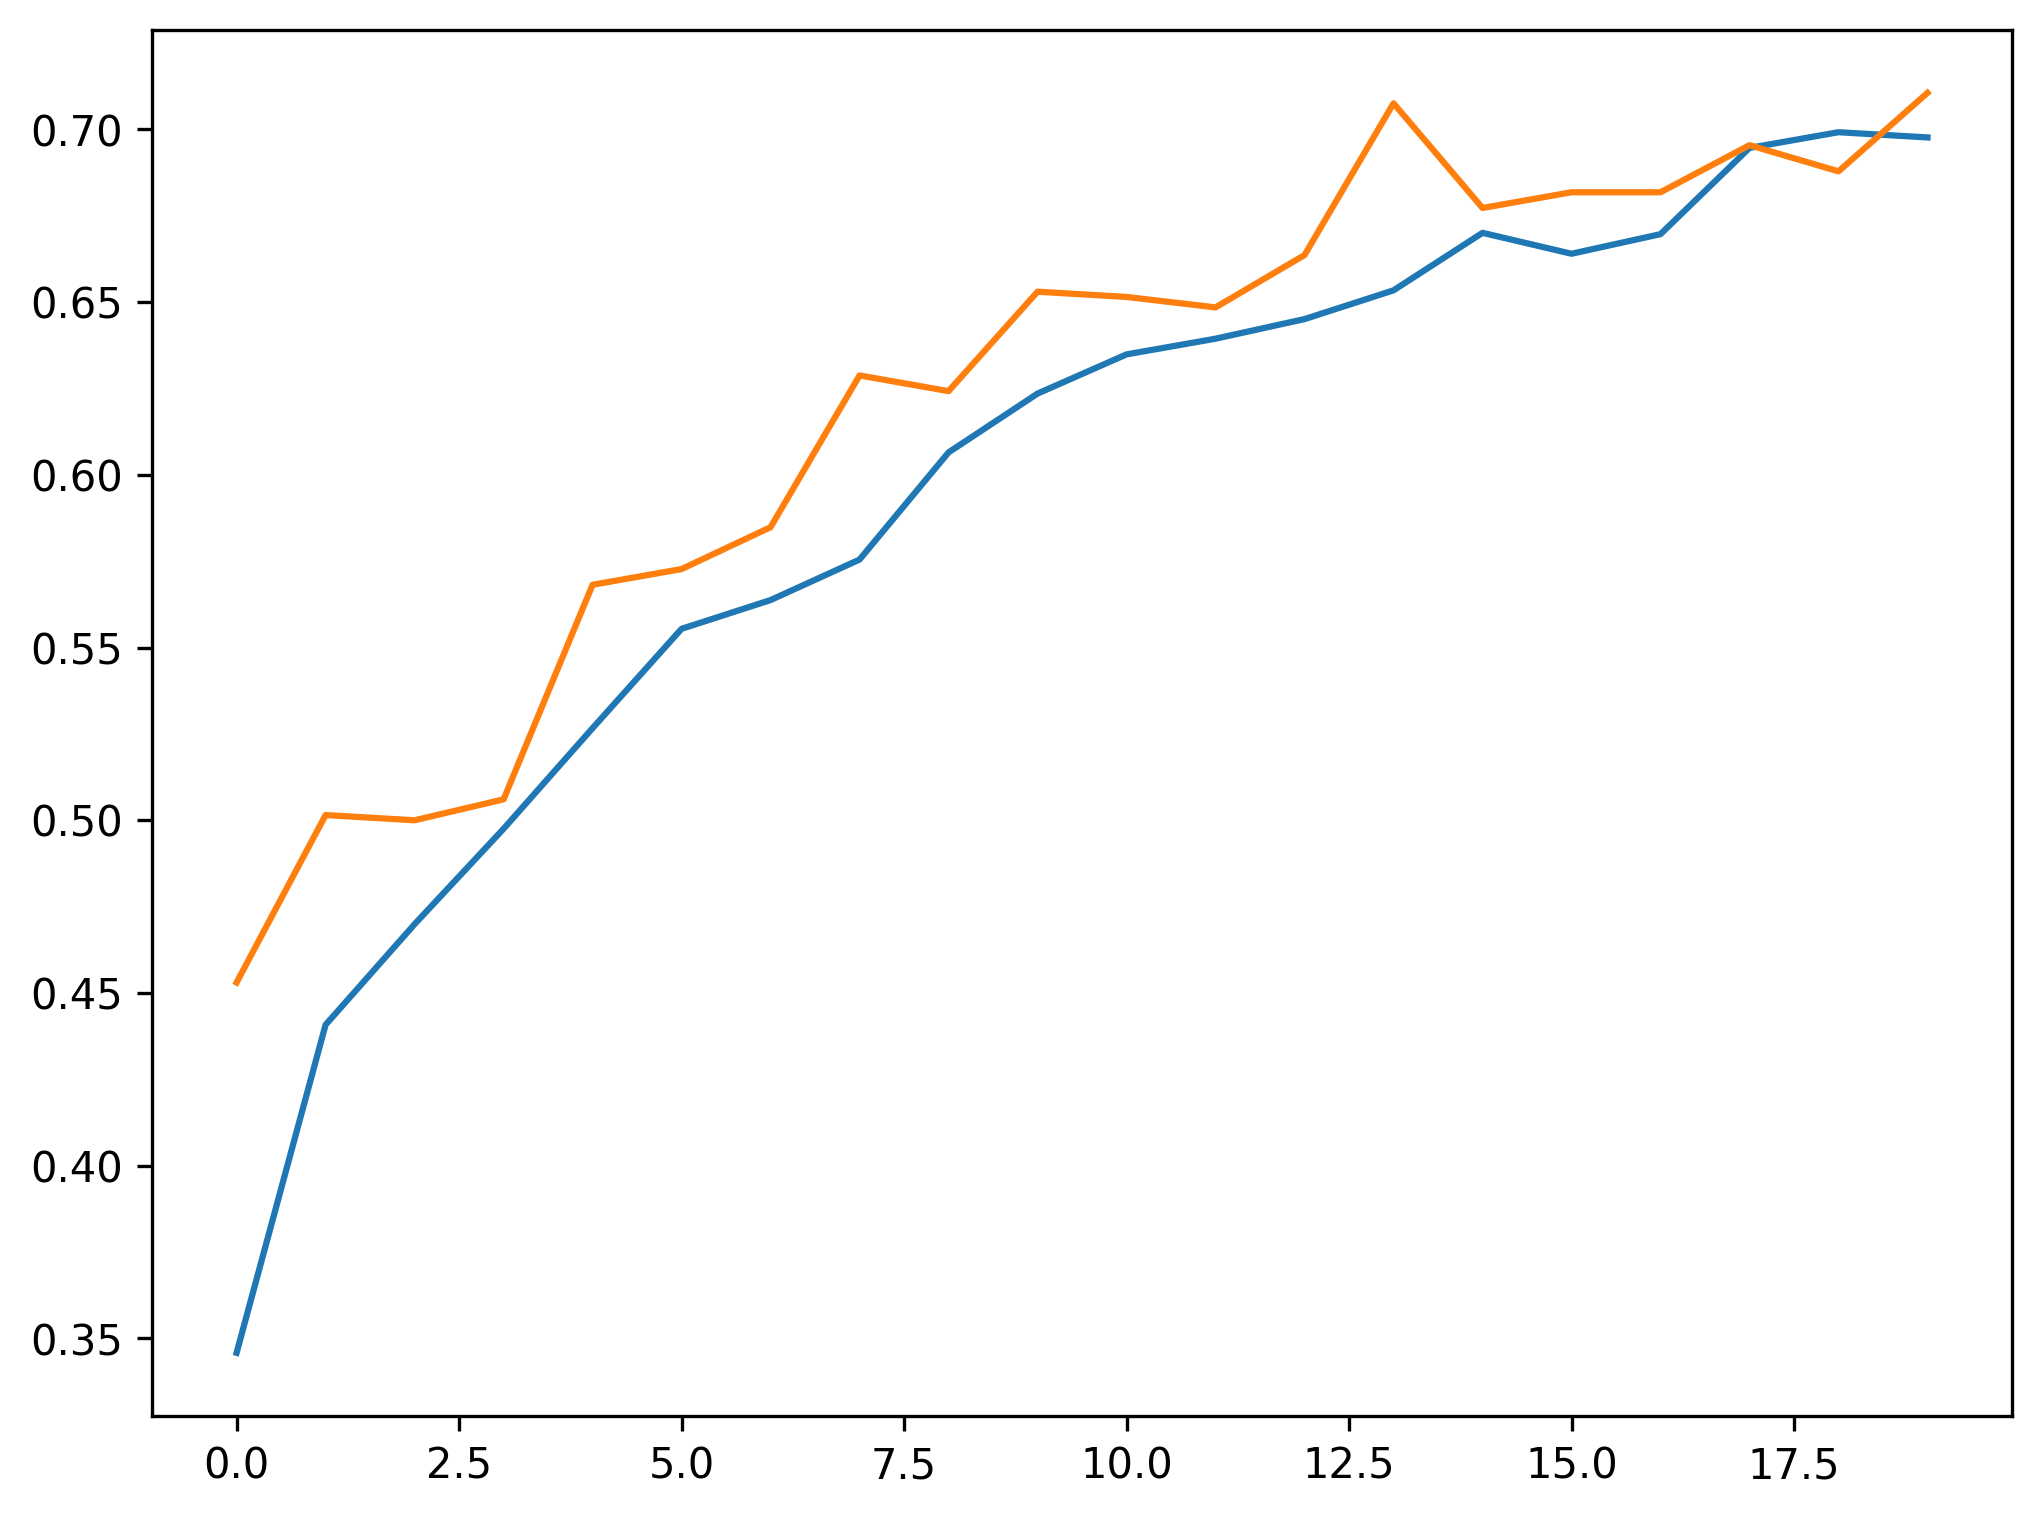

In [63]:
# Create an instance of the Adam class,
# and set the learning rate.
adam_optimizer = Adam(learning_rate = 0.001)
# Compile the model. As this is a classification problem,
# we are going to use the categorical cross entropy for the
# loss function, and we will use the accuracy for metrics.
model.compile(adam_optimizer, loss='categorical_crossentropy',metrics='accuracy')
# Define the batch size
batch_size = 32
# Fit the model, and record the history of the fit.
# In this example we will train the model for 20
# epochs.
history = model.fit(train_datagen.flow(x_train_norm, y_train_cat, batch_size =batch_size, subset = "training"), epochs = 20,validation_data = train_datagen.flow(x_train_norm,y_train_cat, batch_size = batch_size, subset = "validation"))
# Create a pandas dataframe containing
# the history of the fitting
history_df = pd.DataFrame(history.history)
# Plot the training and validation losses
# versus epoch.
plt.figure(figsize = (8, 6), dpi = 300)
plt.plot(history_df["loss"], label = "Training")
plt.plot(history_df["val_loss"], label = "Validation")
# Add a legend to the plot.
plt.legend()
# Label both axes.
plt.xlabel("Epoch")
plt.ylabel("Loss = Cross Entropy")
# Show the plot.
plt.show()
# Plot the training and validation accuracy
# versus epoch.
plt.figure(figsize = (8, 6), dpi = 300)
plt.plot(history_df["accuracy"], label = "Training")
plt.plot(history_df["val_accuracy"], label = "Validation")



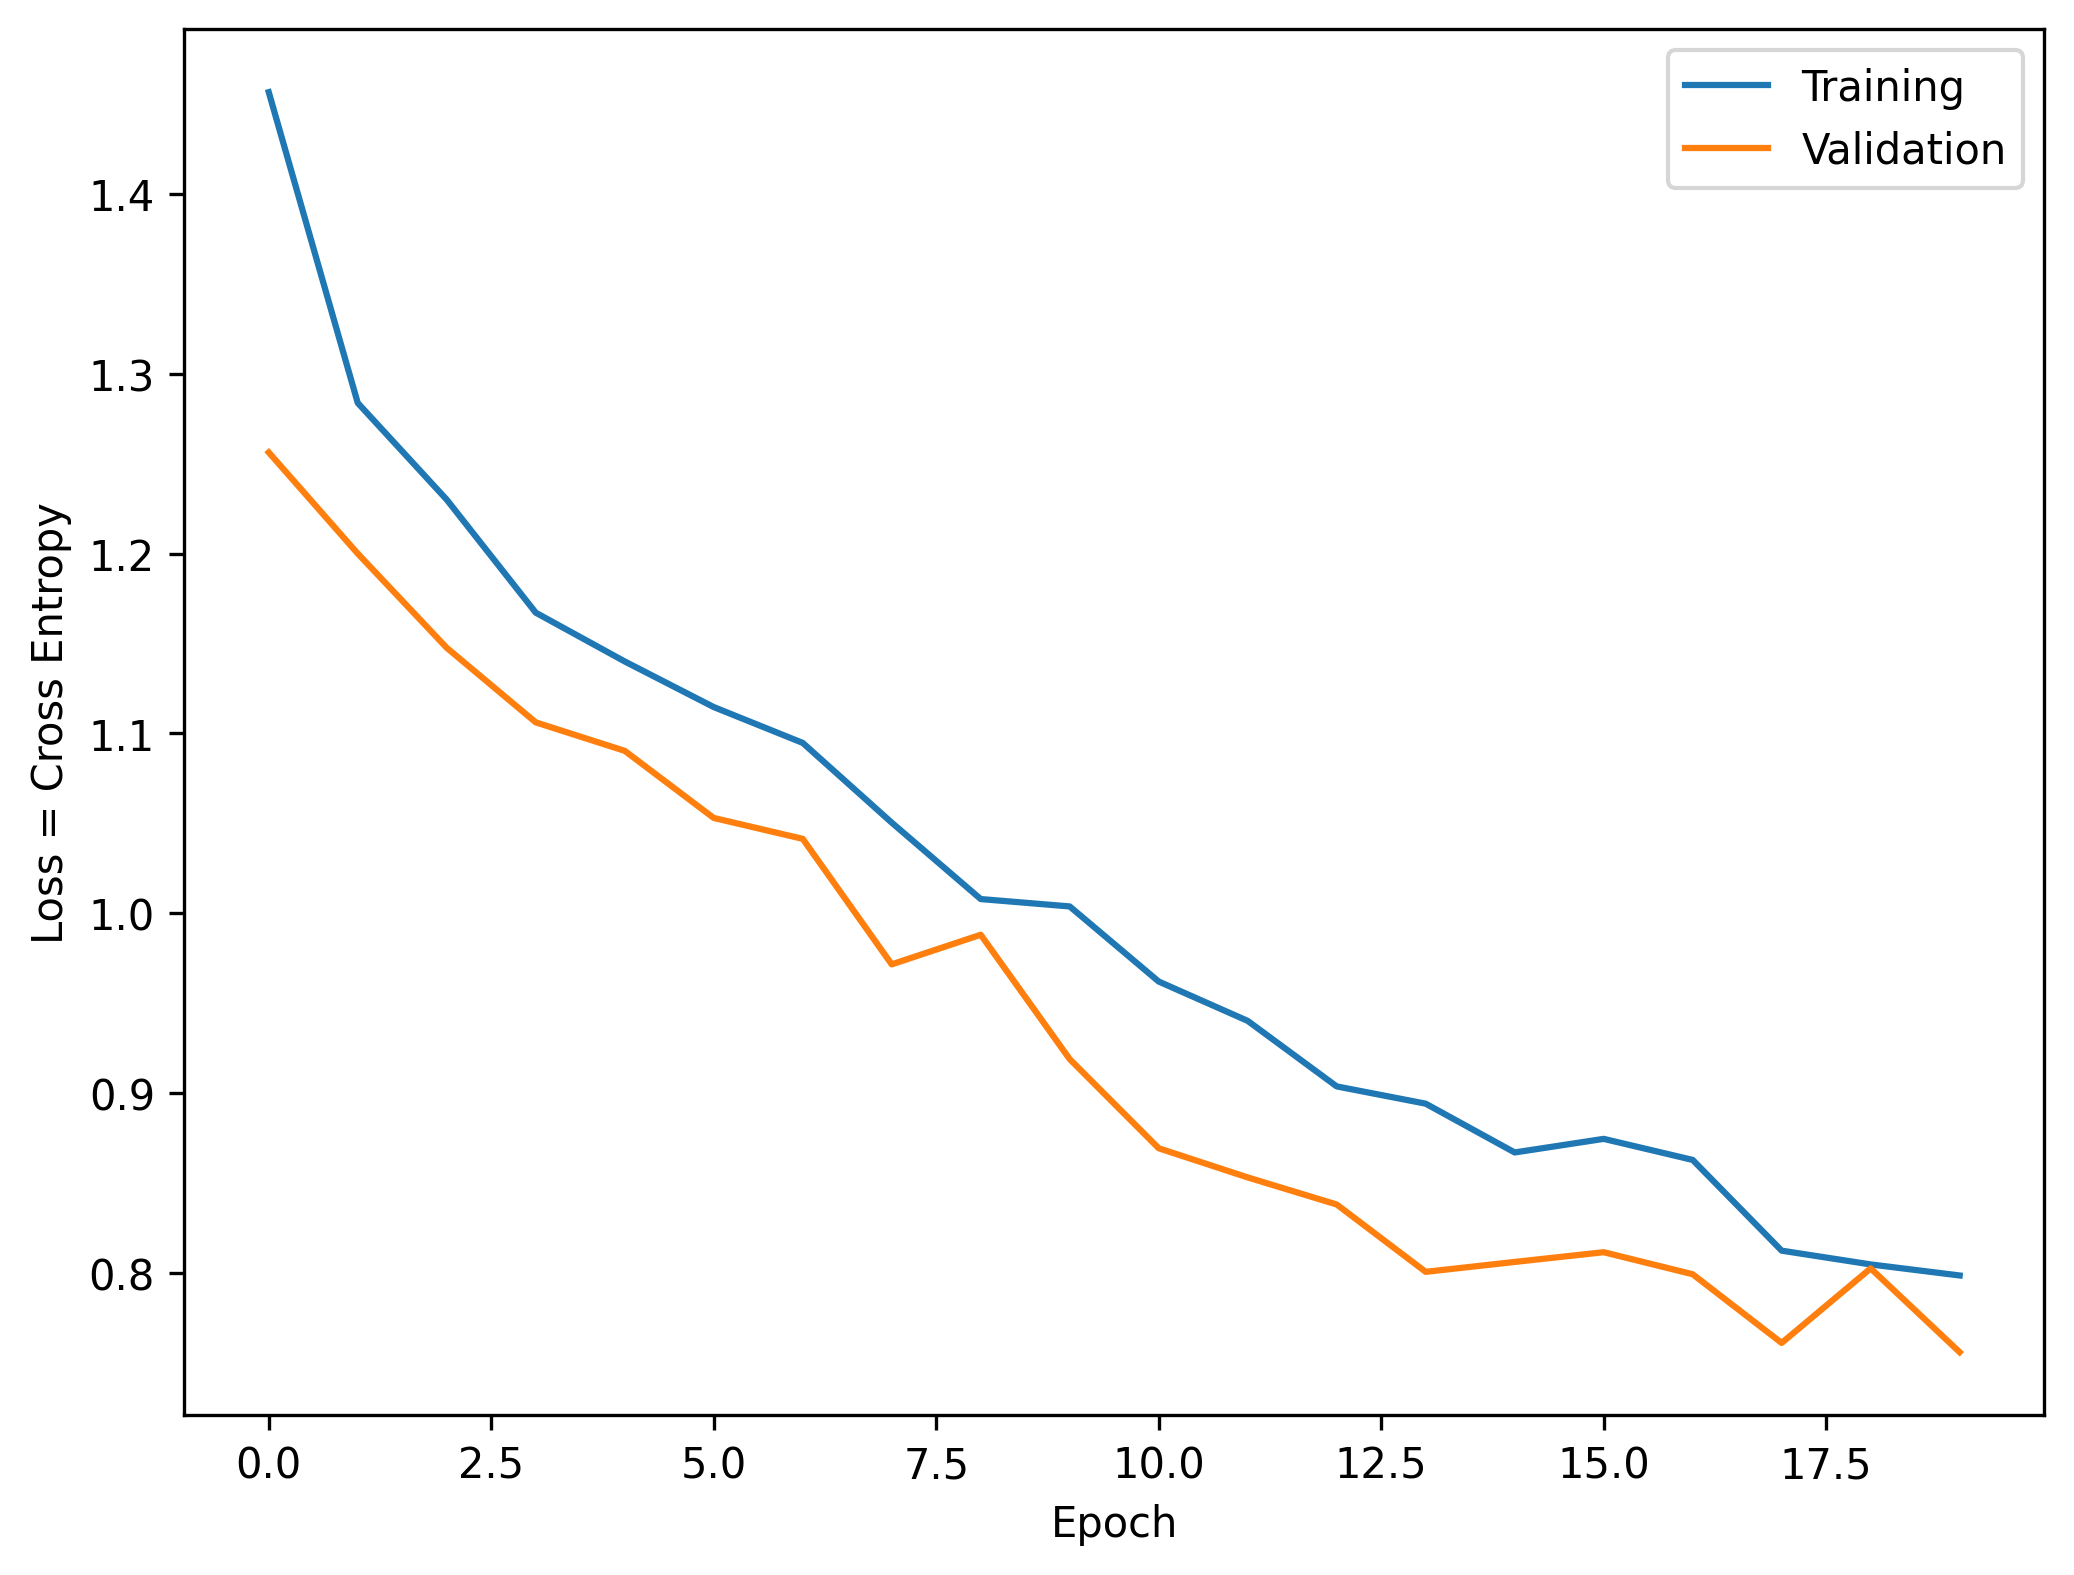

In [64]:
# Create a pandas dataframe containing
# the history of the fitting
history_df = pd.DataFrame(history.history)
# Plot the training and validation losses
# versus epoch.
plt.figure(figsize = (8, 6), dpi = 300)
plt.plot(history_df["loss"], label = "Training")
plt.plot(history_df["val_loss"], label = "Validation")
# Add a legend to the plot.
plt.legend()
# Label both axes.
plt.xlabel("Epoch")
plt.ylabel("Loss = Cross Entropy")
# Show the plot.
plt.show()

In [65]:
# Before we plot the confusion matrix, we need
# to find which label corresponds to which index.
# This is actually somewhat trivial in this case,
# as the labels are just the digits 0-9.
# Names of each label
display_labels = ["%d" % (i, ) for i in range(5)]
# Numerical index of each label
numerical_labels = [i for i in range(5)]
# Lets check the label strings and the
# numerical labels to make sure they line up.
print(display_labels)
print(numerical_labels)


['0', '1', '2', '3', '4']
[0, 1, 2, 3, 4]


In [66]:
# Now use the trained model to predict output
# classes in the test set
y_pred = model.predict(x_test_norm)
# Recall that the outputs from the model give the
# probability of each class label. We can now use
# the argmax() function to determine the index
# of the label with the highest probability for
# each row in y_pred. These will be our predicted
# class labels.
y_pred_class = np.argmax(y_pred, axis=1)

12/12 [==============================] - 1s 53ms/step


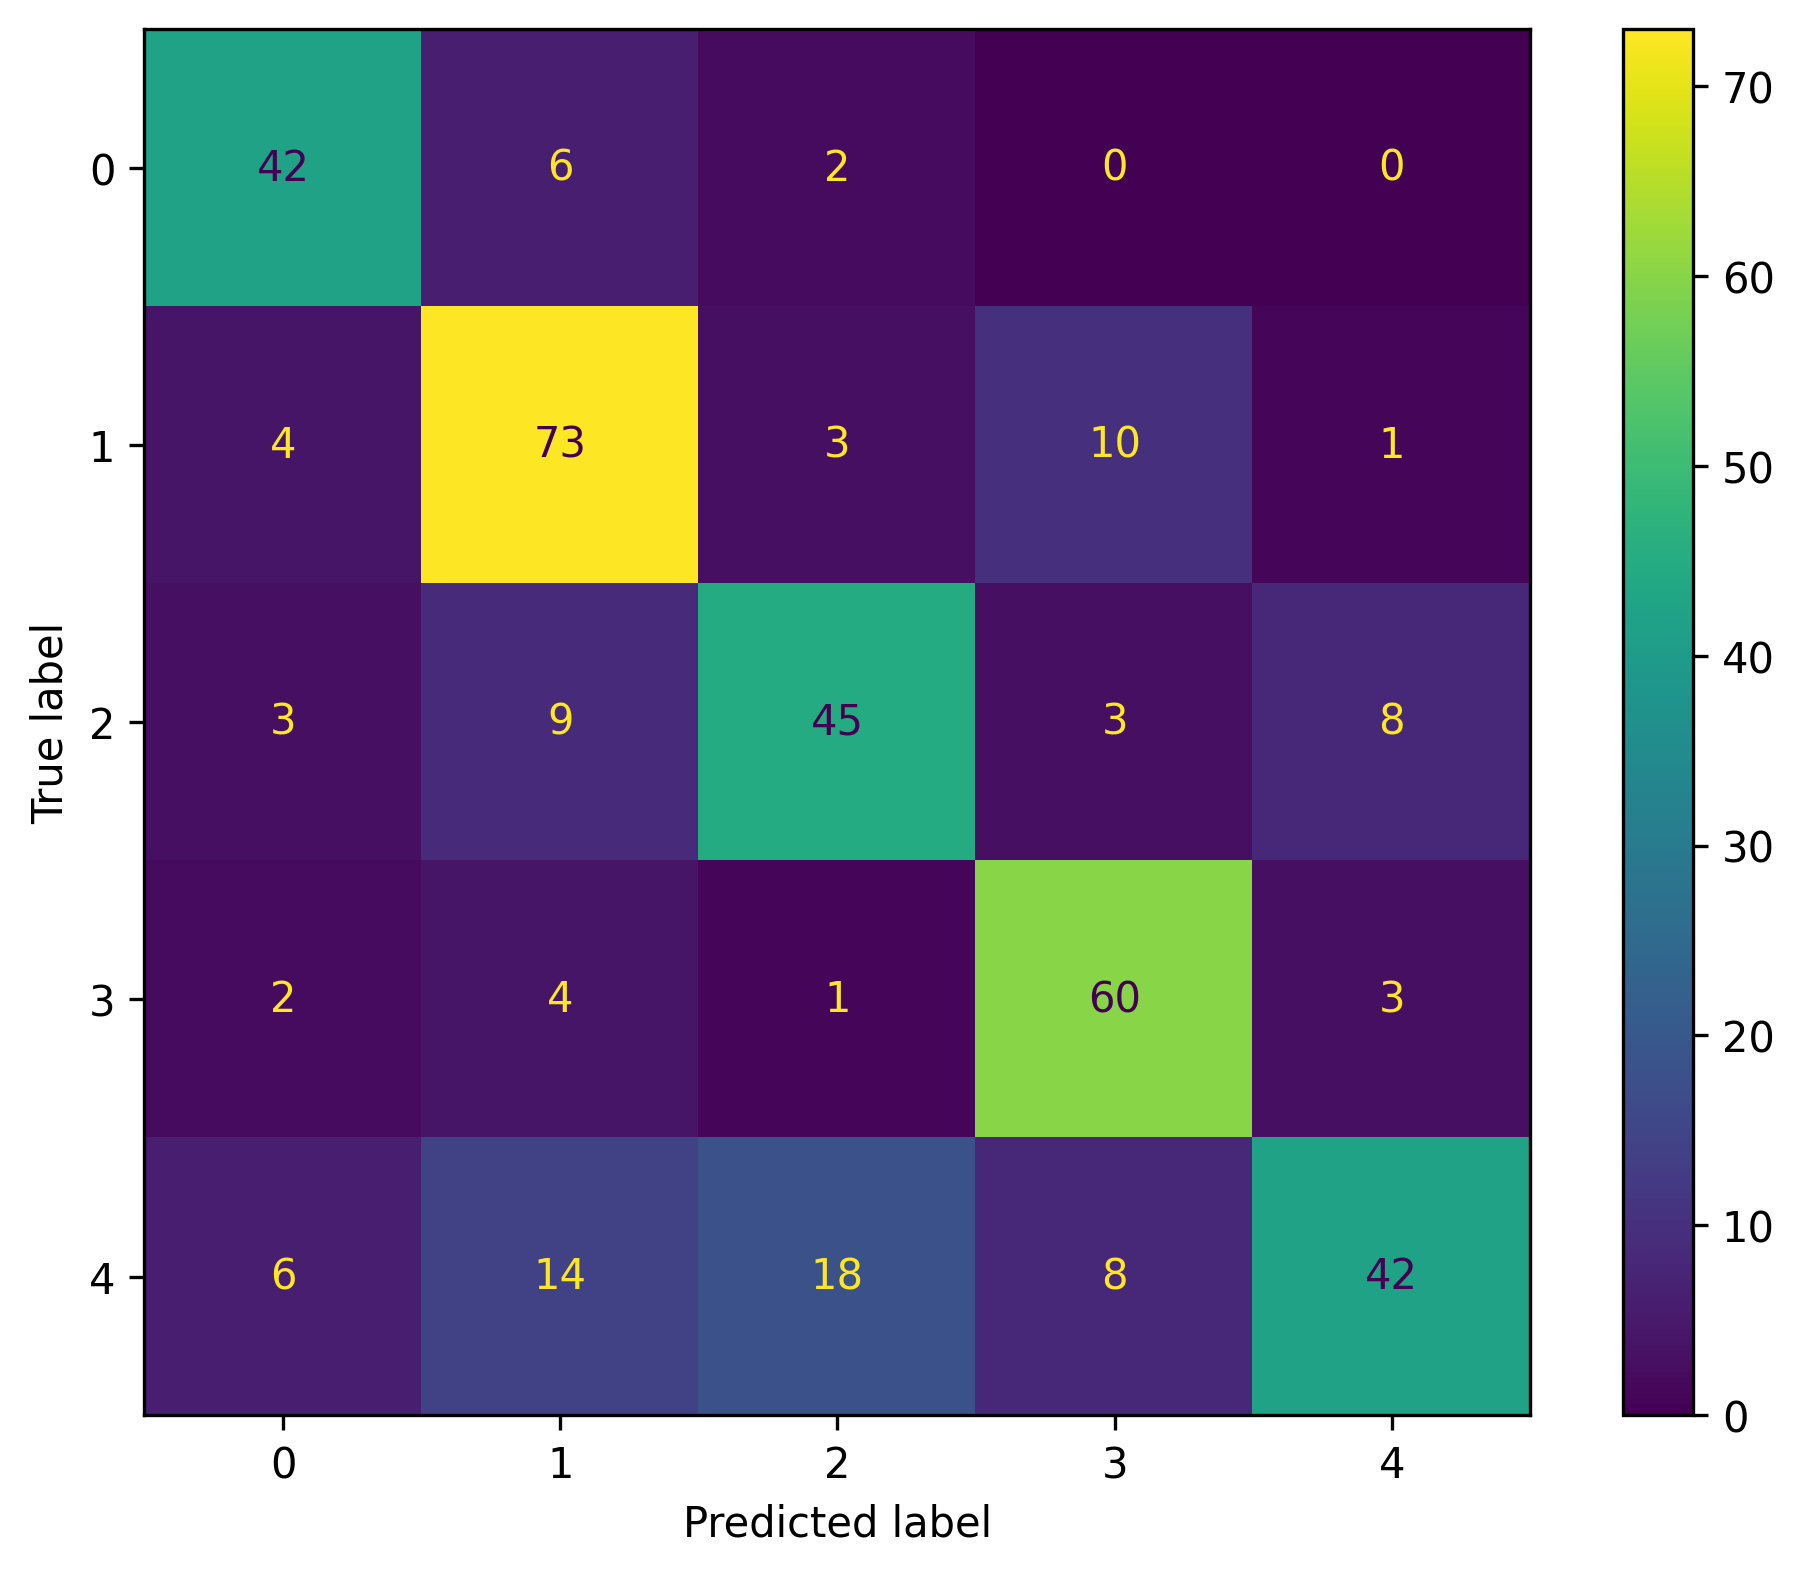

In [67]:
# Import the functions that we will need from sklearn to create
# and plot the confusion matrix.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Create the confusion matrix
con_mat = confusion_matrix(y_test, y_pred_class, labels = numerical_labels)
# Create the figure and axes
plt.figure(figsize = (8, 6), dpi = 300)
ax = plt.axes()
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix = con_mat, display_labels =display_labels)
disp.plot(ax = ax)
# Show the plot
plt.show()

In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.74      0.84      0.79        50
           1       0.69      0.80      0.74        91
           2       0.65      0.66      0.66        68
           3       0.74      0.86      0.79        70
           4       0.78      0.48      0.59        88

    accuracy                           0.71       367
   macro avg       0.72      0.73      0.71       367
weighted avg       0.72      0.71      0.71       367



### Model 6: Intoducing Batch Normalisation

In [69]:
# Import the BatchNormalization layer from Keras.
from tensorflow.keras.layers import BatchNormalization


model = Sequential()
# Add the first Convolutional layer. Here we use 32 filters,
# which will each be convolved with the input data to
# produce 32 feature maps. We use a kernel_size of 3x3,
# and the relu activation function.
model.add(Conv2D(filters = 32, kernel_size = (3, 3), strides = (2, 2), padding="same", input_shape = (width_npix,height_npix, 3), activation = 'relu'))

# Add a pooling layer that uses max pooling,
# with a pool size of 2x2.
model.add(MaxPooling2D(pool_size = (2, 2), padding = "same"))
# Add a second convolutional layer, again with a kernel size of 3x3 and
# the relu activation function but now with 64 filters. Note that it
# is common to increase the number of filters as we go deeper into
# the network.

#Apply Batch normalisation to the pooling layer. In this
model.add(BatchNormalization(momentum = 0.9))

model.add(Conv2D(filters = 64, kernel_size = (3, 3),strides = (2, 2), padding="same", activation = 'relu'))
# Add a second max pooling layer.
model.add(MaxPooling2D(pool_size = (2, 2), padding = "same"))

#Apply Batch normalisation to the pooling layer. In this
model.add(BatchNormalization(momentum = 0.9))
# Add a third convolutional layer, now with 128 filters.
model.add(Conv2D(filters = 128, kernel_size = (3, 3),strides = (2, 2), padding="same", activation = 'relu'))
# Add a third max pooling layer.
model.add(MaxPooling2D(pool_size = (2, 2), padding = "same"))

#Apply Batch normalisation to the pooling layer. In this
model.add(BatchNormalization(momentum = 0.9))

# After the final pooling layer, we need a flatter layer,
# which will flatten the output to a 1-dimensional array,
# ready for the fully connected network.
model.add(Flatten())
# Add a Dense (i.e. fully connected) layer with 64 neurons
# and the relu activation function.
model.add(Dense(64, activation = 'relu'))
# Apply a dropout rate of 50% to the dense layer.
model.add(Dropout(0.5))
# The output layer needs 10 units, corresponding
# to the 10 output classes. We use the softmax
# activation function, which means the resulting
# output values will represent the probabilities
# for each of the 10 class labels.
model.add(Dense(5, activation = 'softmax'))
# Print a summary of the model.
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_27 (MaxPooli  (None, 64, 64, 32)        0         
 ng2D)                                                           
                                                                 
 batch_normalization (Batch  (None, 64, 64, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_31 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 16, 16, 64)        0         
 ng2D)                                                           
                                                     

Epoch 1/20
83/83 [==============================] - 48s 557ms/step - loss: 1.5646 - accuracy: 0.4518 - val_loss: 1.1440 - val_accuracy: 0.5348
Epoch 2/20
83/83 [==============================] - 45s 546ms/step - loss: 1.2537 - accuracy: 0.5078 - val_loss: 0.9726 - val_accuracy: 0.6121
Epoch 3/20
83/83 [==============================] - 46s 552ms/step - loss: 1.1087 - accuracy: 0.5577 - val_loss: 0.9615 - val_accuracy: 0.6348
Epoch 4/20
83/83 [==============================] - 45s 547ms/step - loss: 1.0236 - accuracy: 0.5952 - val_loss: 0.8771 - val_accuracy: 0.6394
Epoch 5/20
83/83 [==============================] - 46s 551ms/step - loss: 0.9974 - accuracy: 0.6050 - val_loss: 0.8956 - val_accuracy: 0.6530
Epoch 6/20
83/83 [==============================] - 46s 551ms/step - loss: 0.9485 - accuracy: 0.6356 - val_loss: 0.9036 - val_accuracy: 0.6652
Epoch 7/20
83/83 [==============================] - 46s 550ms/step - loss: 0.9156 - accuracy: 0.6466 - val_loss: 0.8701 - val_accuracy: 0.6530

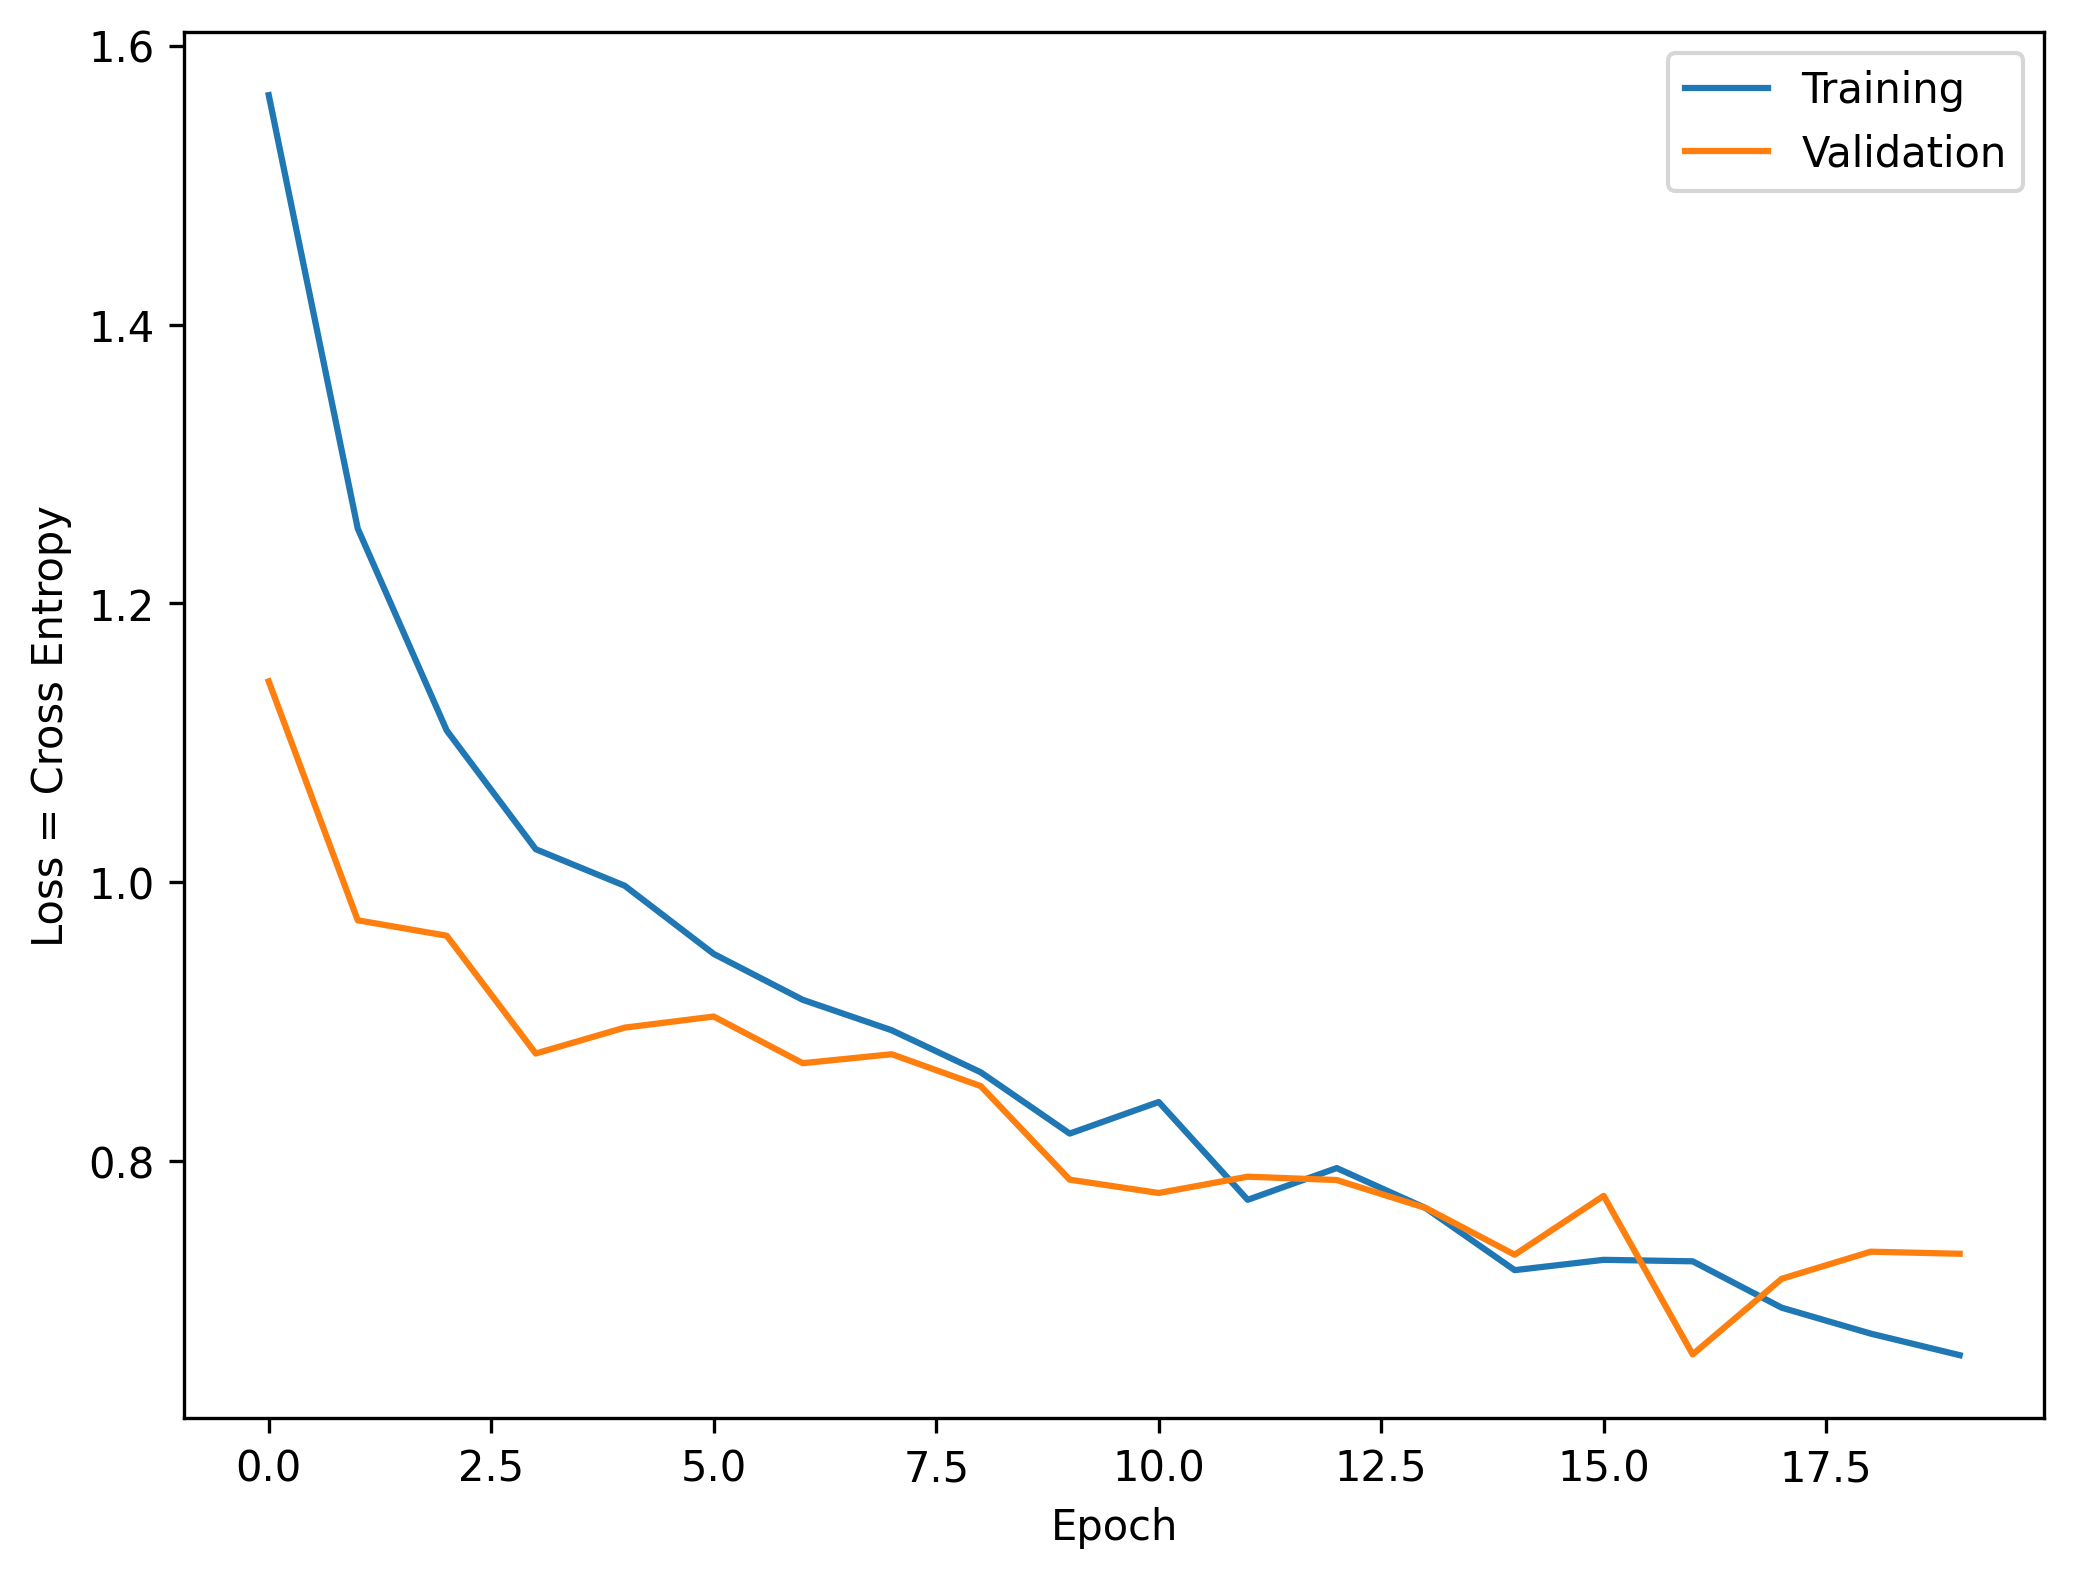

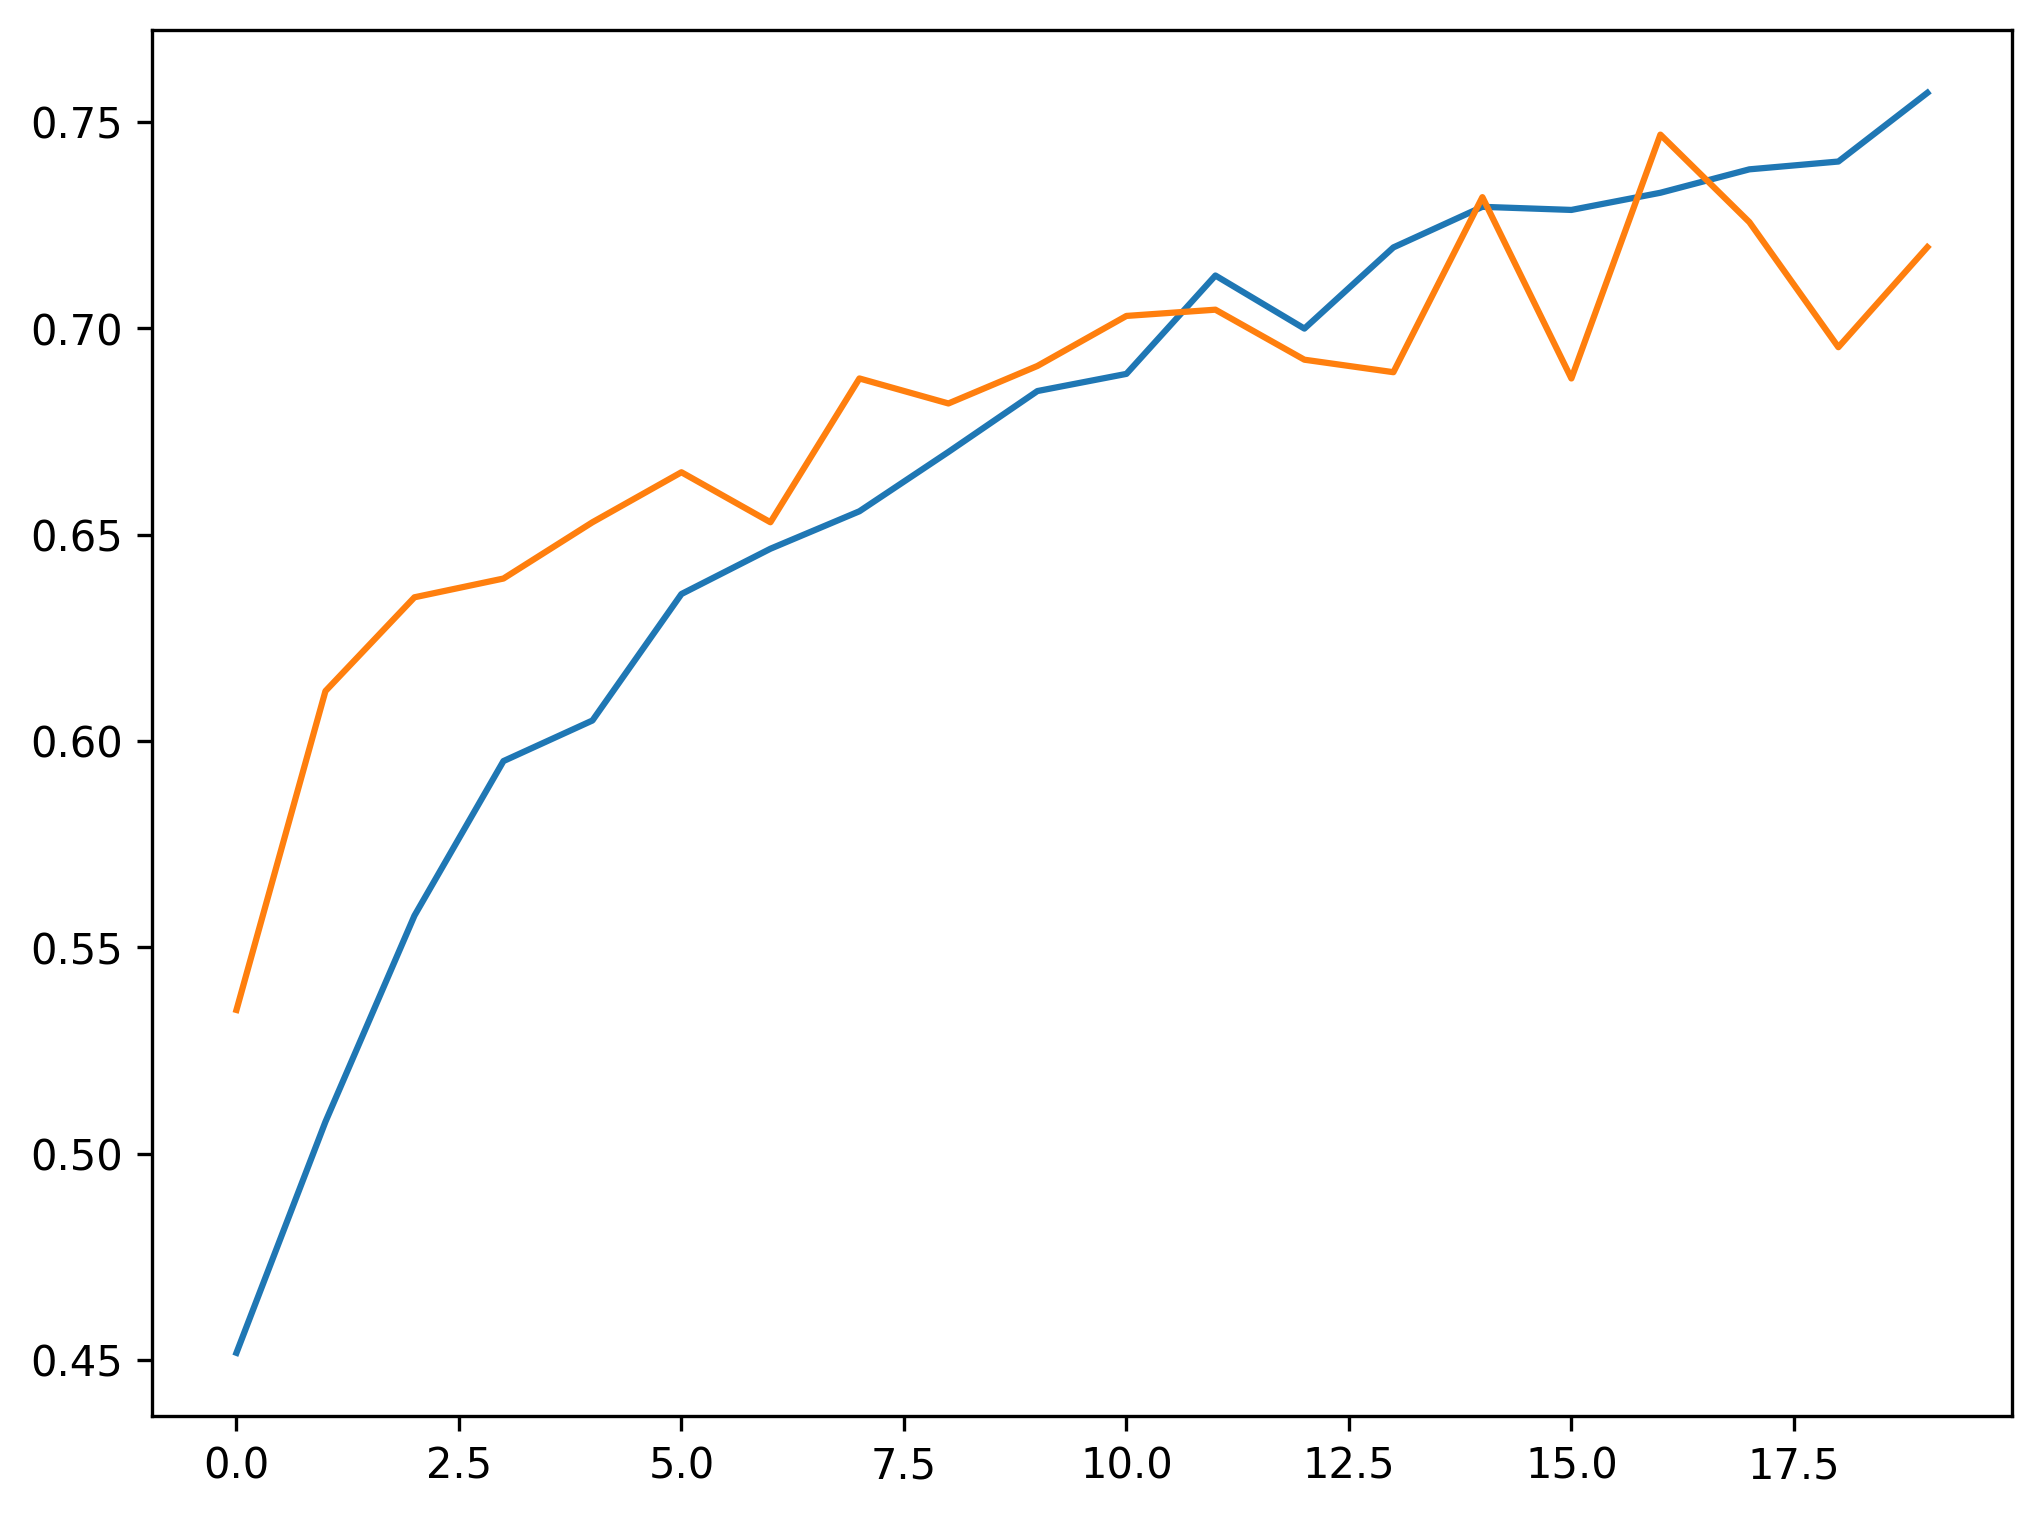

In [70]:
# Create an instance of the Adam class,
# and set the learning rate.
adam_optimizer = Adam(learning_rate = 0.001)
# Compile the model. As this is a classification problem,
# we are going to use the categorical cross entropy for the
# loss function, and we will use the accuracy for metrics.
model.compile(adam_optimizer, loss='categorical_crossentropy',metrics='accuracy')
# Define the batch size
batch_size = 32
# Fit the model, and record the history of the fit.
# In this example we will train the model for 20
# epochs.
history = model.fit(train_datagen.flow(x_train_norm, y_train_cat, batch_size =batch_size, subset = "training"), epochs = 20,validation_data = train_datagen.flow(x_train_norm,y_train_cat, batch_size = batch_size, subset = "validation"))
# Create a pandas dataframe containing
# the history of the fitting
history_df = pd.DataFrame(history.history)
# Plot the training and validation losses
# versus epoch.
plt.figure(figsize = (8, 6), dpi = 300)
plt.plot(history_df["loss"], label = "Training")
plt.plot(history_df["val_loss"], label = "Validation")
# Add a legend to the plot.
plt.legend()
# Label both axes.
plt.xlabel("Epoch")
plt.ylabel("Loss = Cross Entropy")
# Show the plot.
plt.show()
# Plot the training and validation accuracy
# versus epoch.
plt.figure(figsize = (8, 6), dpi = 300)
plt.plot(history_df["accuracy"], label = "Training")
plt.plot(history_df["val_accuracy"], label = "Validation")



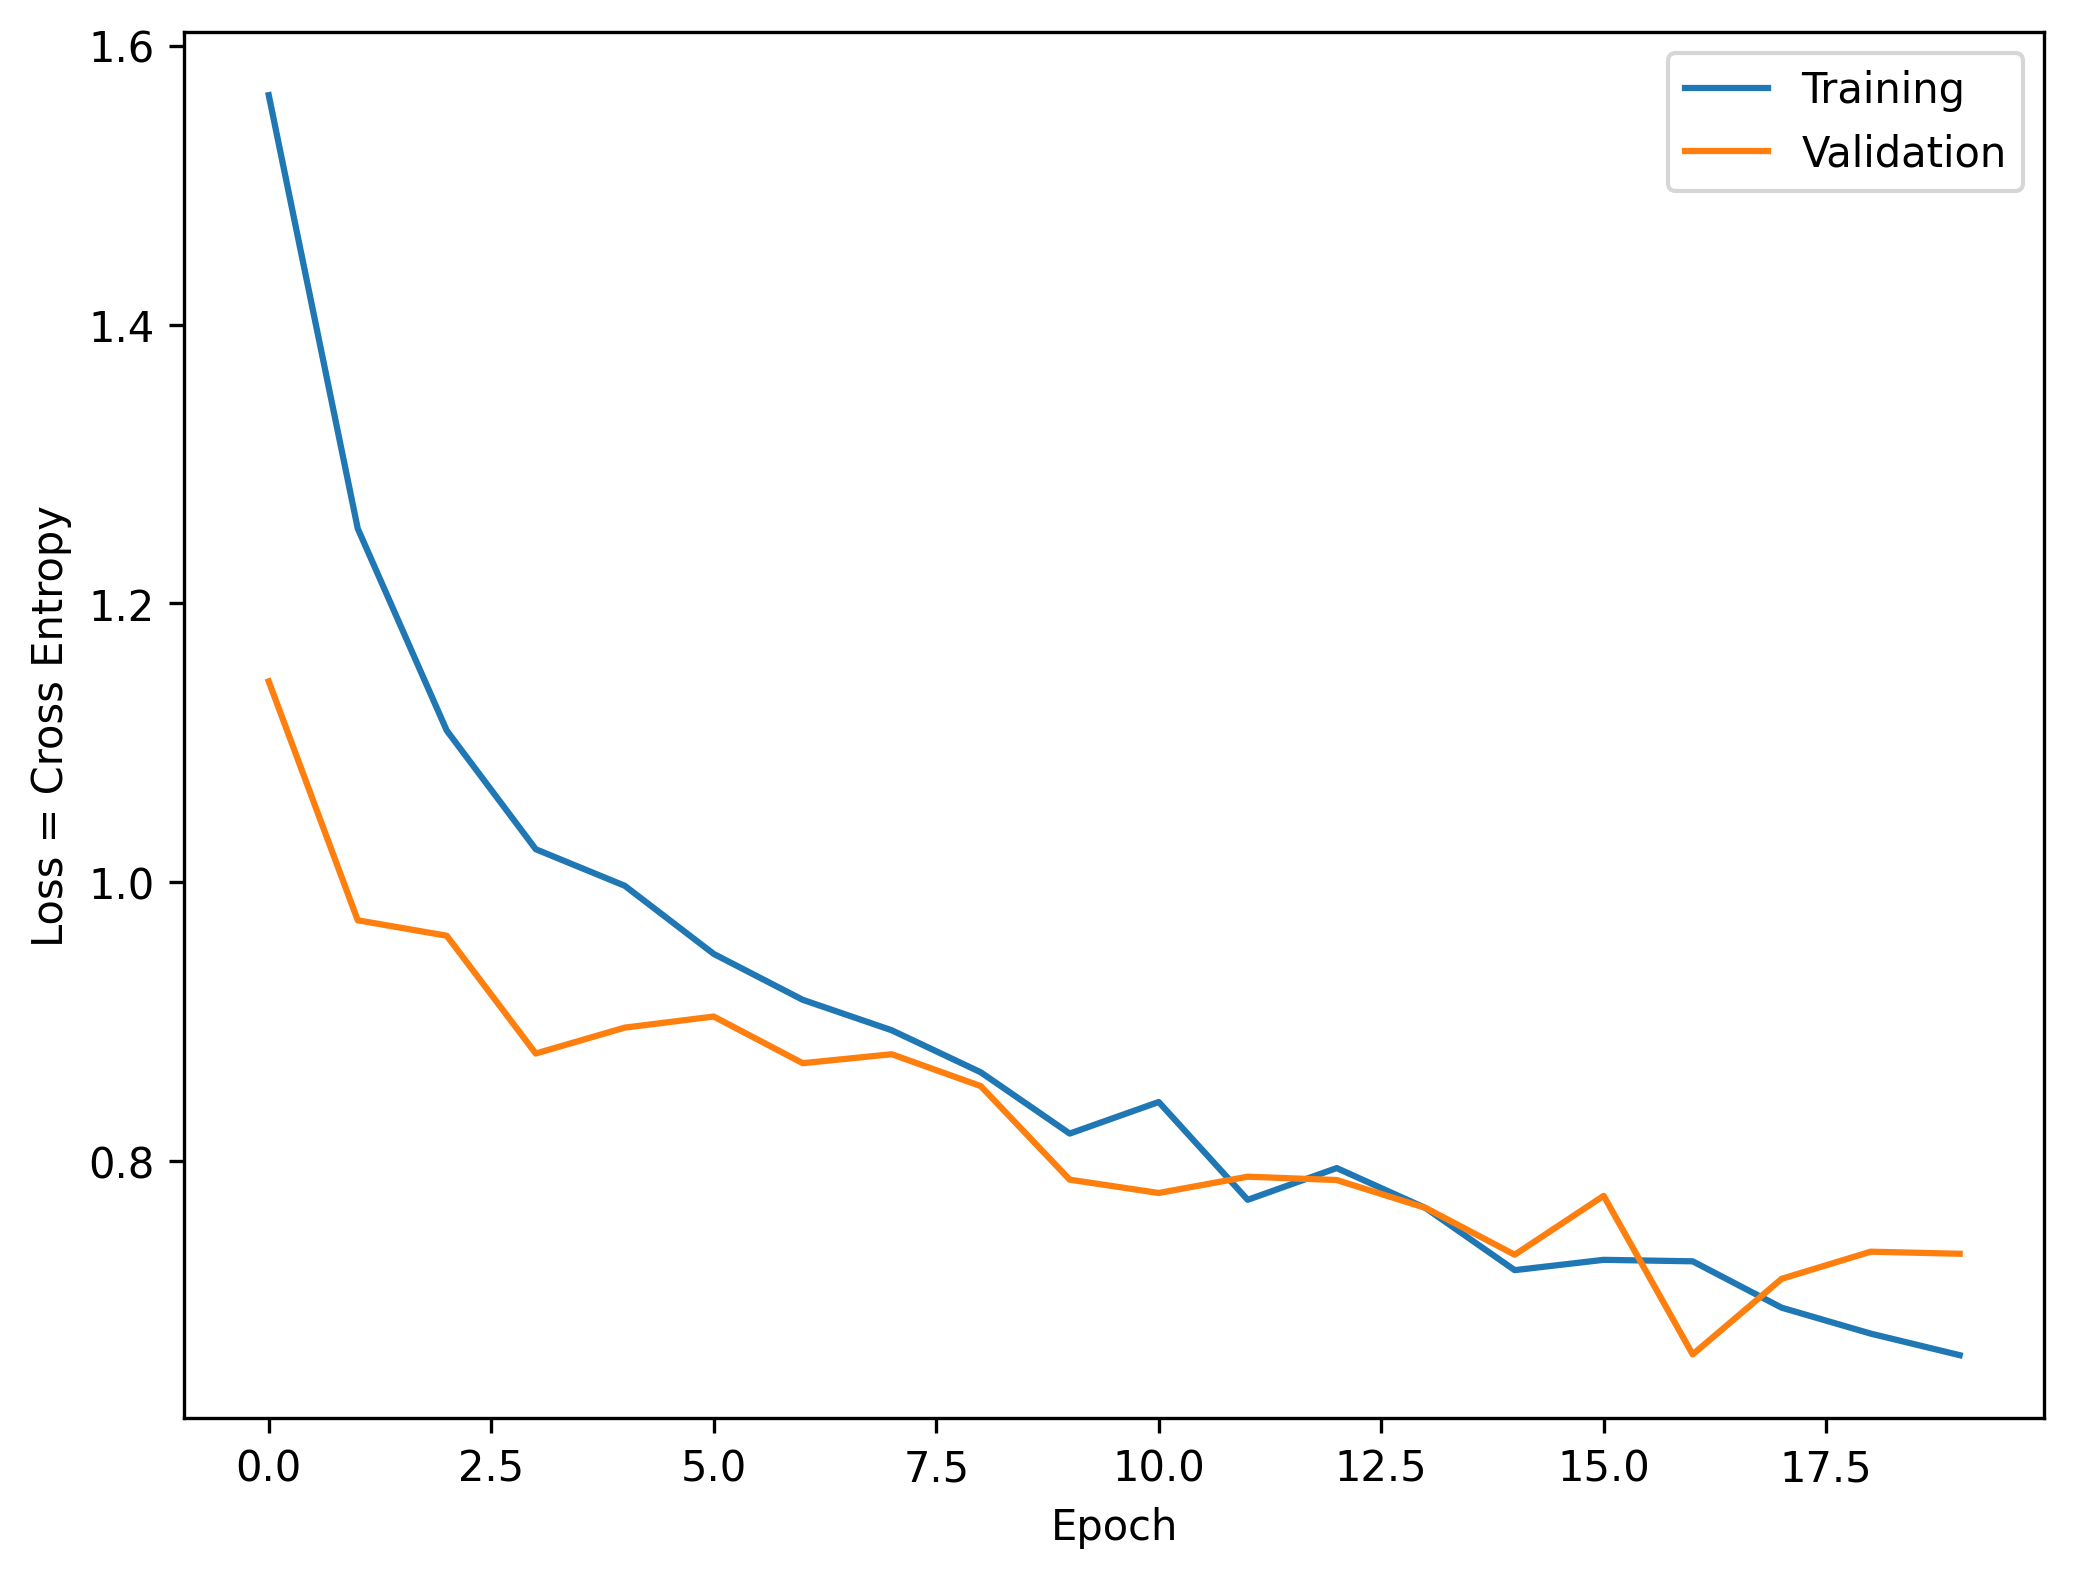

In [71]:
# Create a pandas dataframe containing
# the history of the fitting
history_df = pd.DataFrame(history.history)
# Plot the training and validation losses
# versus epoch.
plt.figure(figsize = (8, 6), dpi = 300)
plt.plot(history_df["loss"], label = "Training")
plt.plot(history_df["val_loss"], label = "Validation")
# Add a legend to the plot.
plt.legend()
# Label both axes.
plt.xlabel("Epoch")
plt.ylabel("Loss = Cross Entropy")
# Show the plot.
plt.show()

In [72]:
# Before we plot the confusion matrix, we need
# to find which label corresponds to which index.
# This is actually somewhat trivial in this case,
# as the labels are just the digits 0-9.
# Names of each label
display_labels = ["%d" % (i, ) for i in range(5)]
# Numerical index of each label
numerical_labels = [i for i in range(5)]
# Lets check the label strings and the
# numerical labels to make sure they line up.
print(display_labels)
print(numerical_labels)



['0', '1', '2', '3', '4']
[0, 1, 2, 3, 4]


In [73]:
# Now use the trained model to predict output
# classes in the test set
y_pred = model.predict(x_test_norm)
# Recall that the outputs from the model give the
# probability of each class label. We can now use
# the argmax() function to determine the index
# of the label with the highest probability for
# each row in y_pred. These will be our predicted
# class labels.
y_pred_class = np.argmax(y_pred, axis=1)

12/12 [==============================] - 1s 57ms/step


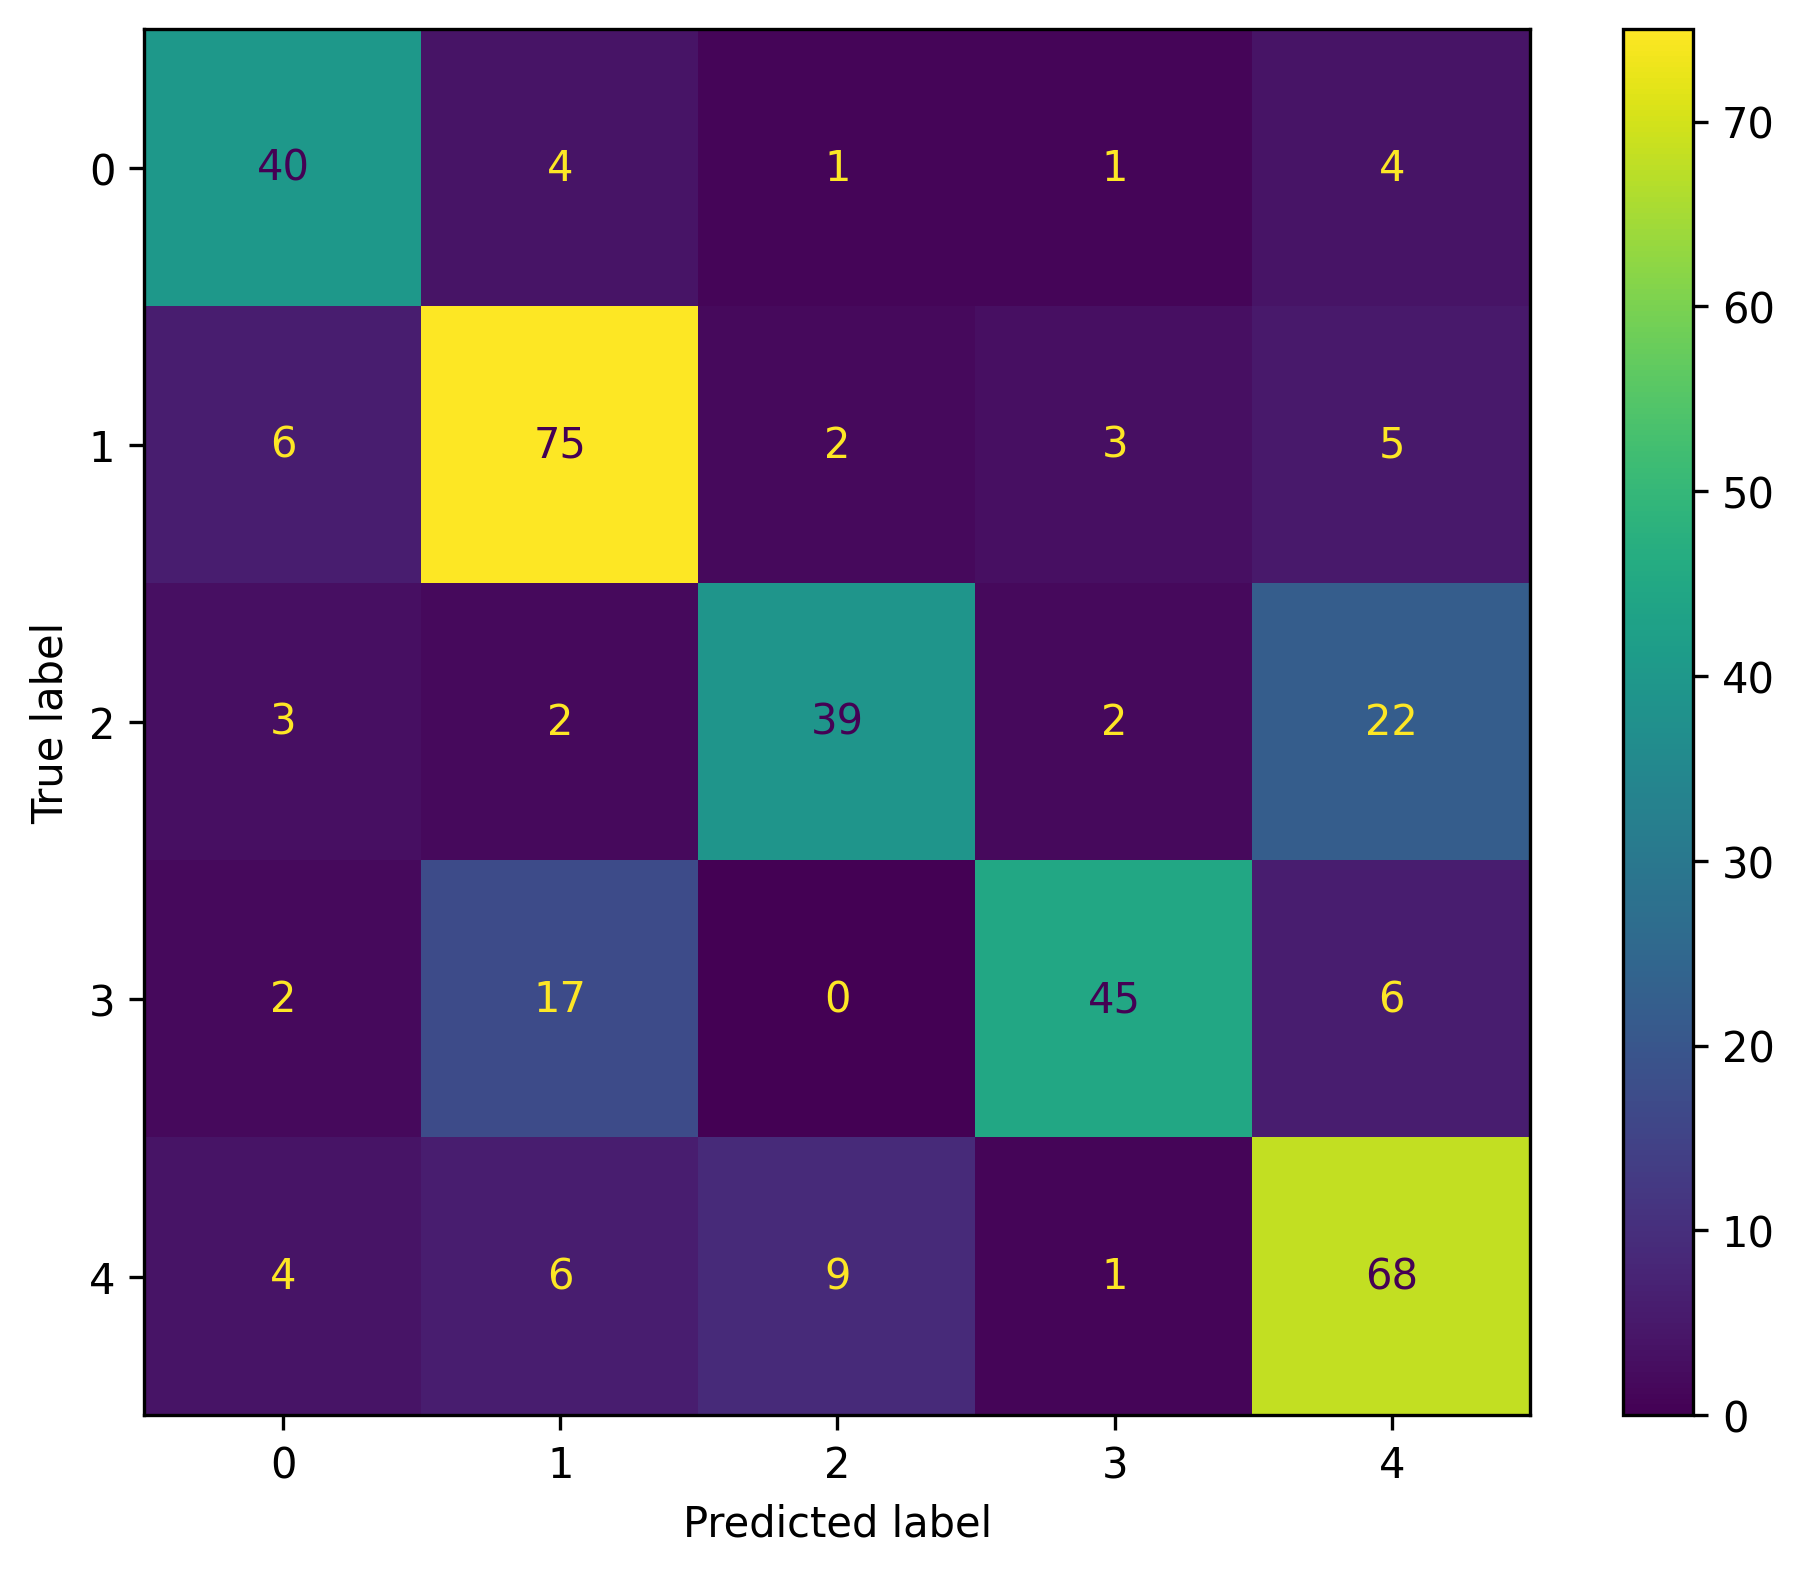

In [74]:
# Import the functions that we will need from sklearn to create
# and plot the confusion matrix.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Create the confusion matrix
con_mat = confusion_matrix(y_test, y_pred_class, labels = numerical_labels)
# Create the figure and axes
plt.figure(figsize = (8, 6), dpi = 300)
ax = plt.axes()
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix = con_mat, display_labels =display_labels)
disp.plot(ax = ax)
# Show the plot
plt.show()

In [75]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.73      0.80      0.76        50
           1       0.72      0.82      0.77        91
           2       0.76      0.57      0.66        68
           3       0.87      0.64      0.74        70
           4       0.65      0.77      0.70        88

    accuracy                           0.73       367
   macro avg       0.75      0.72      0.73       367
weighted avg       0.74      0.73      0.73       367



### Model 7: Increasing the learning rate from .001 to .01

In [76]:

model = Sequential()
# Add the first Convolutional layer. Here we use 32 filters,
# which will each be convolved with the input data to
# produce 32 feature maps. We use a kernel_size of 3x3,
# and the relu activation function.
model.add(Conv2D(filters = 32, kernel_size = (3, 3), strides = (2, 2), padding="same", input_shape = (width_npix,height_npix, 3), activation = 'relu'))

# Add a pooling layer that uses max pooling,
# with a pool size of 2x2.
model.add(MaxPooling2D(pool_size = (2, 2), padding = "same"))
# Add a second convolutional layer, again with a kernel size of 3x3 and
# the relu activation function but now with 64 filters. Note that it
# is common to increase the number of filters as we go deeper into
# the network.
model.add(Conv2D(filters = 64, kernel_size = (3, 3),strides = (2, 2), padding="same", activation = 'relu'))
# Add a second max pooling layer.
model.add(MaxPooling2D(pool_size = (2, 2), padding = "same"))
# Add a third convolutional layer, now with 128 filters.
model.add(Conv2D(filters = 128, kernel_size = (3, 3),strides = (2, 2), padding="same", activation = 'relu'))
# Add a third max pooling layer.
model.add(MaxPooling2D(pool_size = (2, 2), padding = "same"))
# After the final pooling layer, we need a flatter layer,
# which will flatten the output to a 1-dimensional array,
# ready for the fully connected network.
model.add(Flatten())
# Add a Dense (i.e. fully connected) layer with 64 neurons
# and the relu activation function.
model.add(Dense(64, activation = 'relu'))
# Apply a dropout rate of 50% to the dense layer.
model.add(Dropout(0.5))
# The output layer needs 10 units, corresponding
# to the 10 output classes. We use the softmax
# activation function, which means the resulting
# output values will represent the probabilities
# for each of the 10 class labels.
model.add(Dense(5, activation = 'softmax'))
# Print a summary of the model.
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 64, 64, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_34 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_31 (MaxPooli  (None, 16, 16, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_35 (Conv2D)          (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_32 (MaxPooli  (None, 4, 4, 128)       

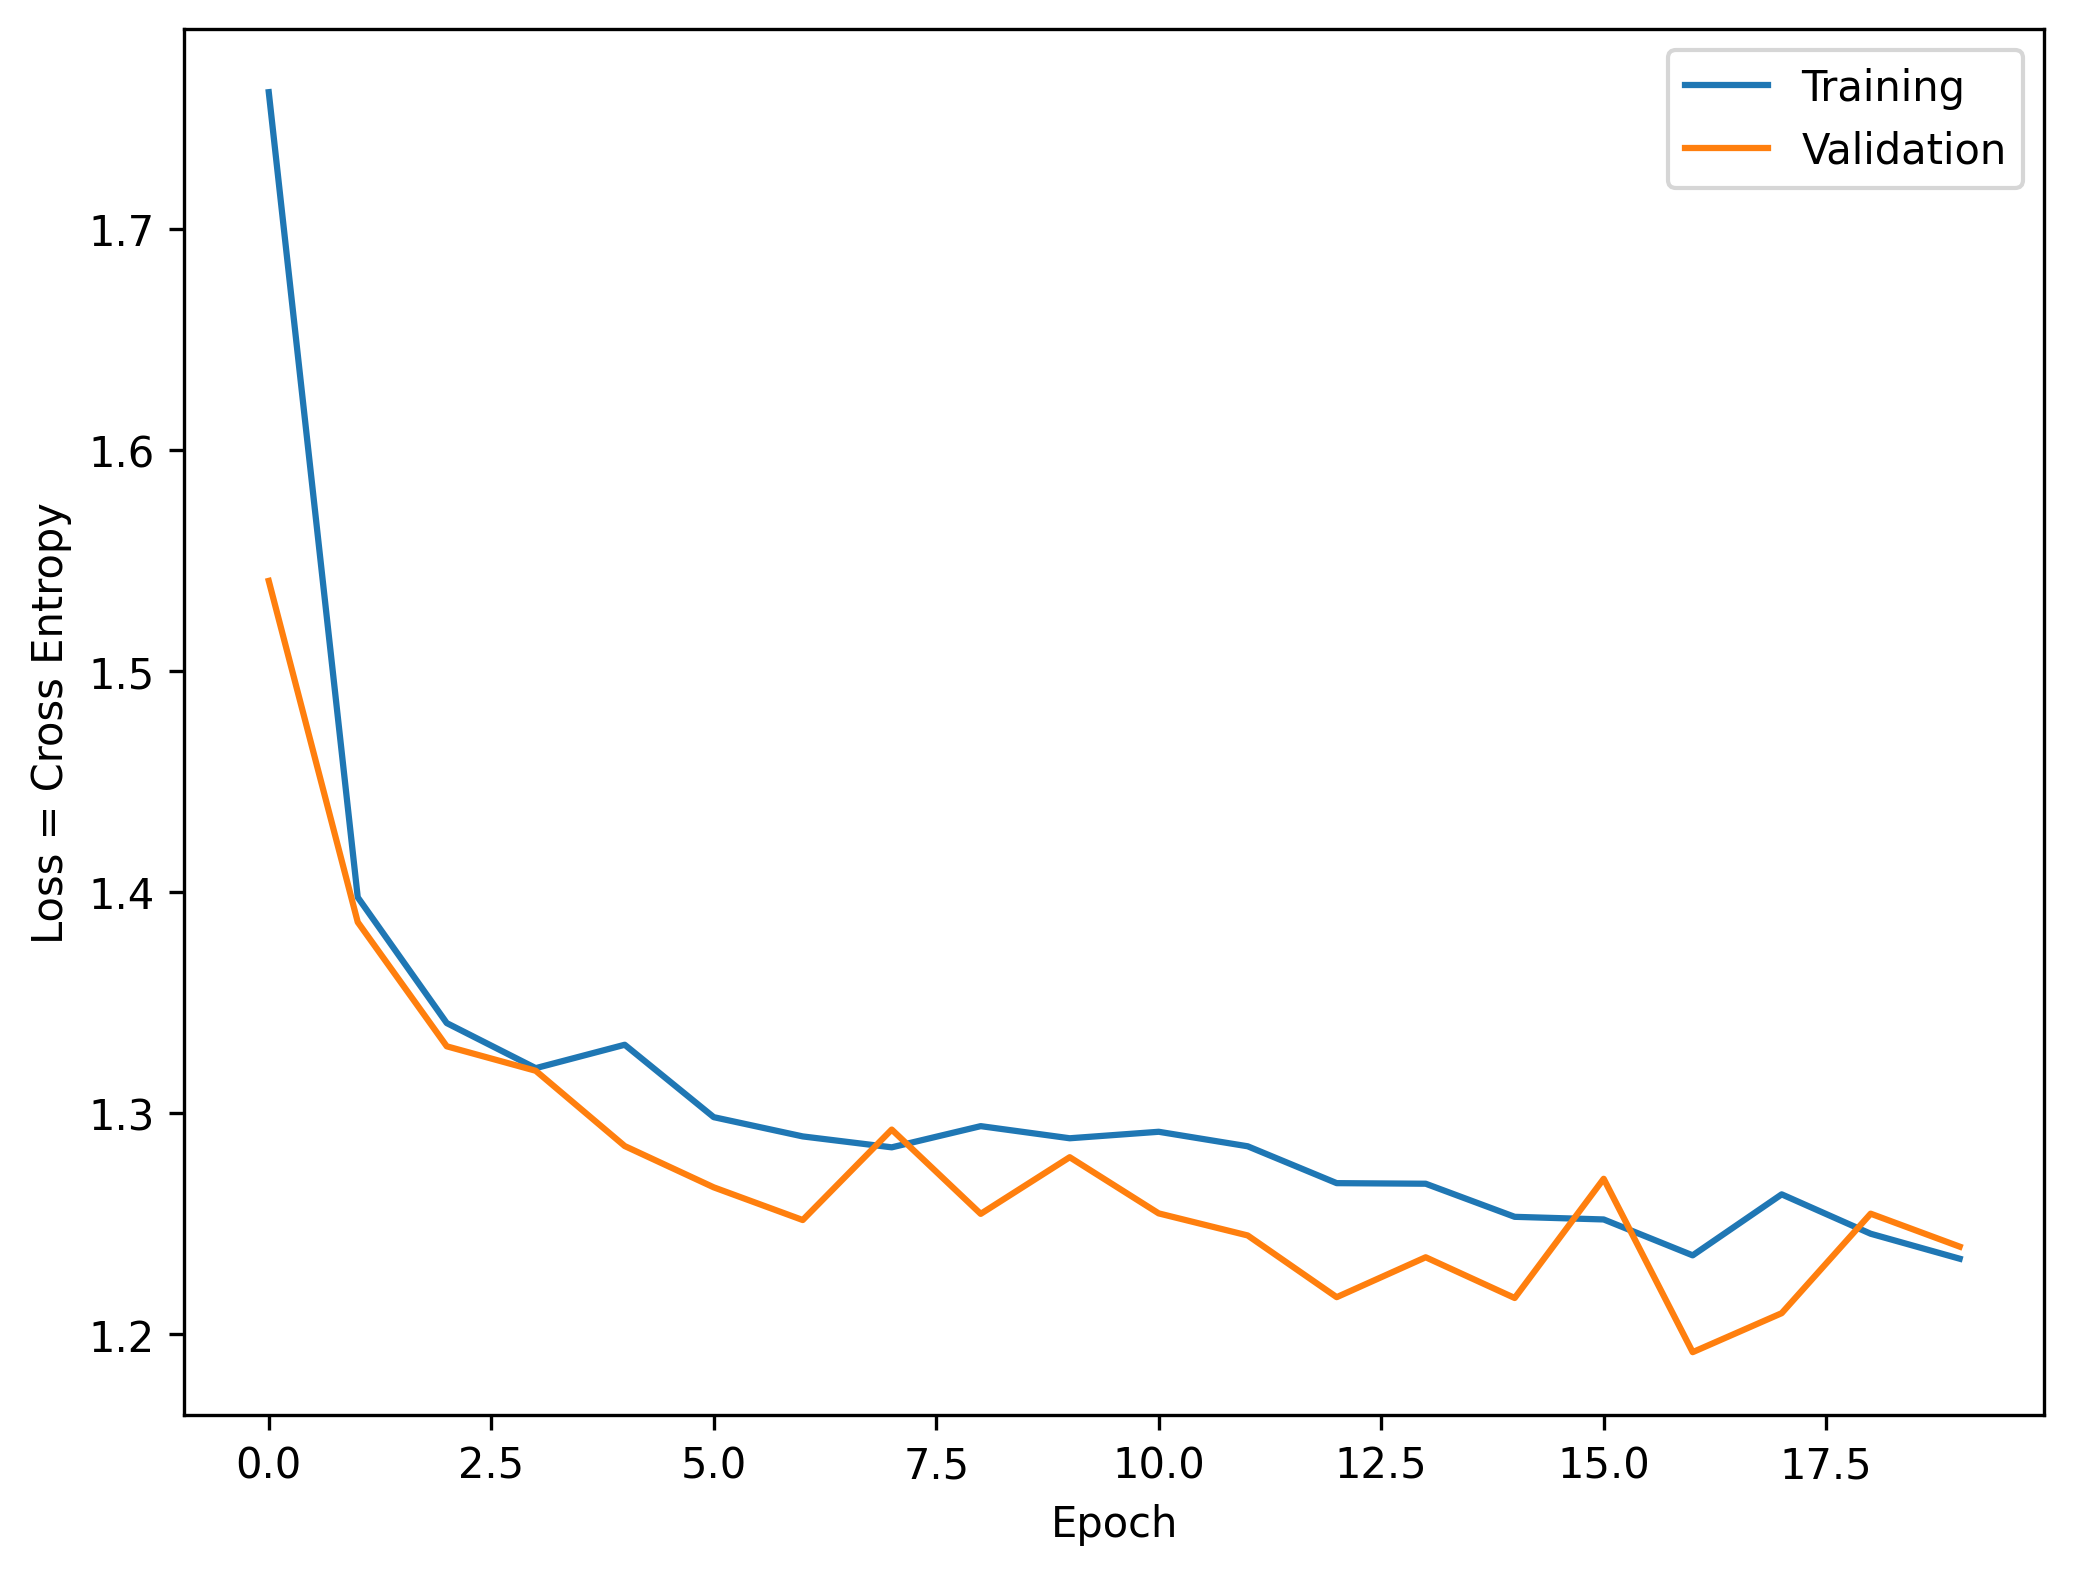

In [78]:
# Create a pandas dataframe containing
# the history of the fitting
history_df = pd.DataFrame(history.history)
# Plot the training and validation losses
# versus epoch.
plt.figure(figsize = (8, 6), dpi = 300)
plt.plot(history_df["loss"], label = "Training")
plt.plot(history_df["val_loss"], label = "Validation")
# Add a legend to the plot.
plt.legend()
# Label both axes.
plt.xlabel("Epoch")
plt.ylabel("Loss = Cross Entropy")
# Show the plot.
plt.show()

In [79]:
# Before we plot the confusion matrix, we need
# to find which label corresponds to which index.
# This is actually somewhat trivial in this case,
# as the labels are just the digits 0-9.
# Names of each label
display_labels = ["%d" % (i, ) for i in range(5)]
# Numerical index of each label
numerical_labels = [i for i in range(5)]
# Lets check the label strings and the
# numerical labels to make sure they line up.
print(display_labels)
print(numerical_labels)

['0', '1', '2', '3', '4']
[0, 1, 2, 3, 4]


In [80]:
# Now use the trained model to predict output
# classes in the test set
y_pred = model.predict(x_test_norm)
# Recall that the outputs from the model give the
# probability of each class label. We can now use
# the argmax() function to determine the index
# of the label with the highest probability for
# each row in y_pred. These will be our predicted
# class labels.
y_pred_class = np.argmax(y_pred, axis=1)

12/12 [==============================] - 1s 49ms/step


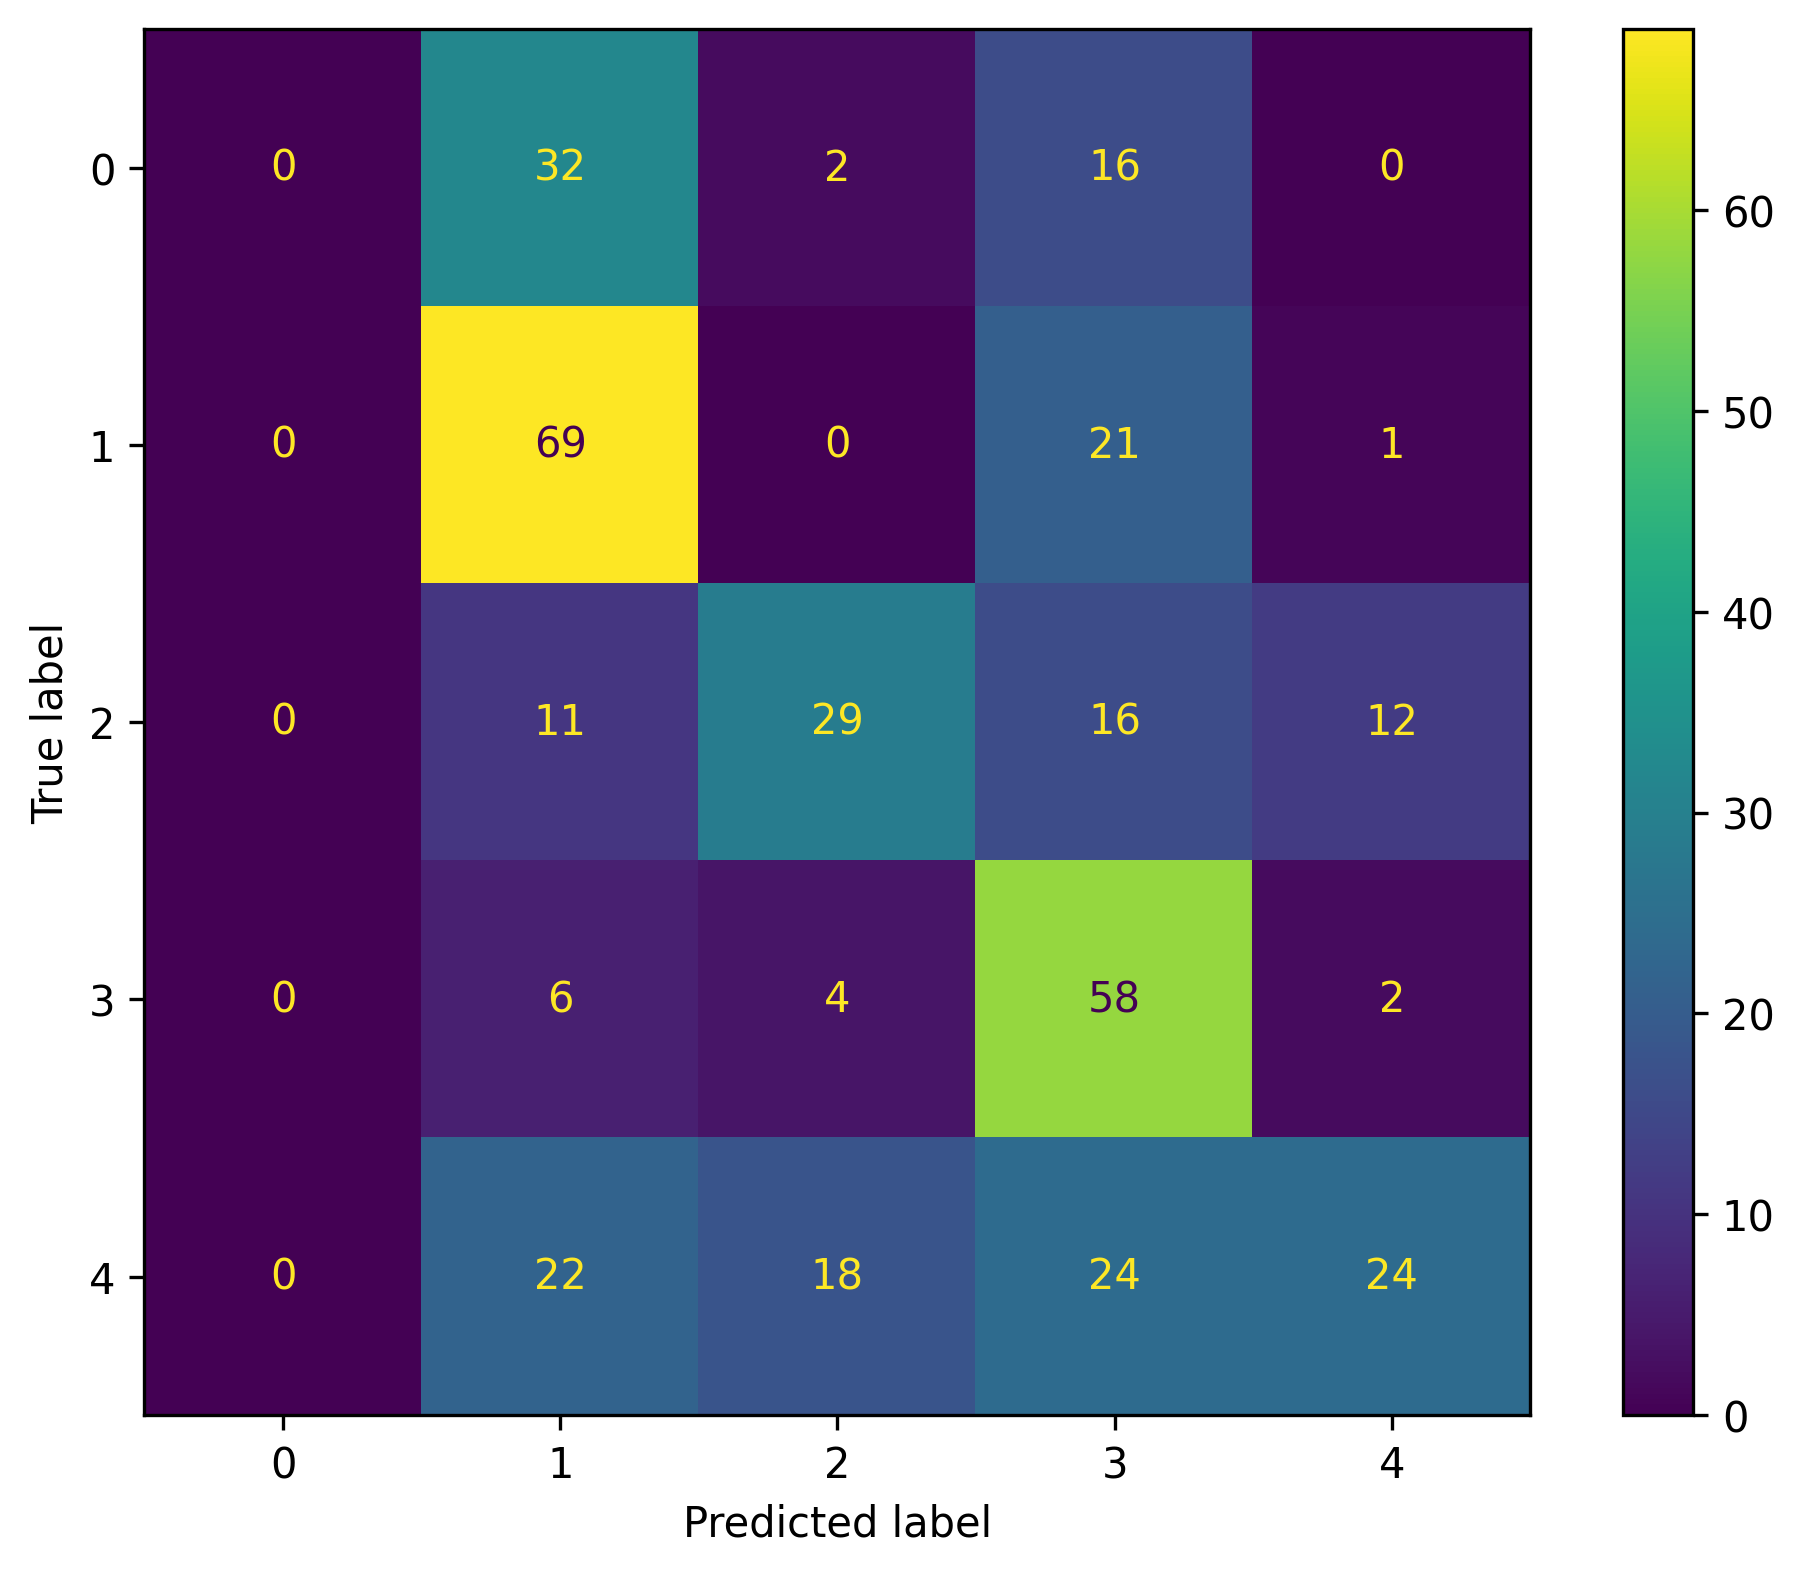

In [81]:
# Import the functions that we will need from sklearn to create
# and plot the confusion matrix.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Create the confusion matrix
con_mat = confusion_matrix(y_test, y_pred_class, labels = numerical_labels)
# Create the figure and axes
plt.figure(figsize = (8, 6), dpi = 300)
ax = plt.axes()
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix = con_mat, display_labels =display_labels)
disp.plot(ax = ax)
# Show the plot
plt.show()

In [82]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.49      0.76      0.60        91
           2       0.55      0.43      0.48        68
           3       0.43      0.83      0.57        70
           4       0.62      0.27      0.38        88

    accuracy                           0.49       367
   macro avg       0.42      0.46      0.40       367
weighted avg       0.45      0.49      0.44       367



C:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Model 8:Increasing the number of epochs by 50% (20 - 40)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_class))

In [42]:

model = Sequential()
# Add the first Convolutional layer. Here we use 32 filters,
# which will each be convolved with the input data to
# produce 32 feature maps. We use a kernel_size of 3x3,
# and the relu activation function.
model.add(Conv2D(filters = 32, kernel_size = (3, 3), strides = (2, 2), padding="same", input_shape = (width_npix,height_npix, 3), activation = 'relu'))

# Add a pooling layer that uses max pooling,
# with a pool size of 2x2.
model.add(MaxPooling2D(pool_size = (2, 2), padding = "same"))
# Add a second convolutional layer, again with a kernel size of 3x3 and
# the relu activation function but now with 64 filters. Note that it
# is common to increase the number of filters as we go deeper into
# the network.
model.add(Conv2D(filters = 64, kernel_size = (3, 3),strides = (2, 2), padding="same", activation = 'relu'))
# Add a second max pooling layer.
model.add(MaxPooling2D(pool_size = (2, 2), padding = "same"))
# Add a third convolutional layer, now with 128 filters.
model.add(Conv2D(filters = 128, kernel_size = (3, 3),strides = (2, 2), padding="same", activation = 'relu'))
# Add a third max pooling layer.
model.add(MaxPooling2D(pool_size = (2, 2), padding = "same"))
# After the final pooling layer, we need a flatter layer,
# which will flatten the output to a 1-dimensional array,
# ready for the fully connected network.
model.add(Flatten())
# Add a Dense (i.e. fully connected) layer with 64 neurons
# and the relu activation function.
model.add(Dense(64, activation = 'relu'))
# Apply a dropout rate of 50% to the dense layer.
model.add(Dropout(0.5))
# The output layer needs 10 units, corresponding
# to the 10 output classes. We use the softmax
# activation function, which means the resulting
# output values will represent the probabilities
# for each of the 10 class labels.
model.add(Dense(5, activation = 'softmax'))
# Print a summary of the model.
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 4, 4, 128)        

Epoch 1/40
83/83 [==============================] - 46s 546ms/step - loss: 1.4595 - accuracy: 0.3190 - val_loss: 1.2316 - val_accuracy: 0.4712
Epoch 2/40
83/83 [==============================] - 44s 528ms/step - loss: 1.2245 - accuracy: 0.4726 - val_loss: 1.1360 - val_accuracy: 0.5379
Epoch 3/40
83/83 [==============================] - 43s 523ms/step - loss: 1.1336 - accuracy: 0.5422 - val_loss: 1.0214 - val_accuracy: 0.5818
Epoch 4/40
83/83 [==============================] - 44s 532ms/step - loss: 1.0607 - accuracy: 0.5759 - val_loss: 0.9419 - val_accuracy: 0.6364
Epoch 5/40
83/83 [==============================] - 43s 522ms/step - loss: 1.0379 - accuracy: 0.6054 - val_loss: 0.8822 - val_accuracy: 0.6667
Epoch 6/40
83/83 [==============================] - 44s 525ms/step - loss: 0.9742 - accuracy: 0.6232 - val_loss: 0.8634 - val_accuracy: 0.6848
Epoch 7/40
83/83 [==============================] - 43s 523ms/step - loss: 0.9590 - accuracy: 0.6428 - val_loss: 0.9266 - val_accuracy: 0.6348

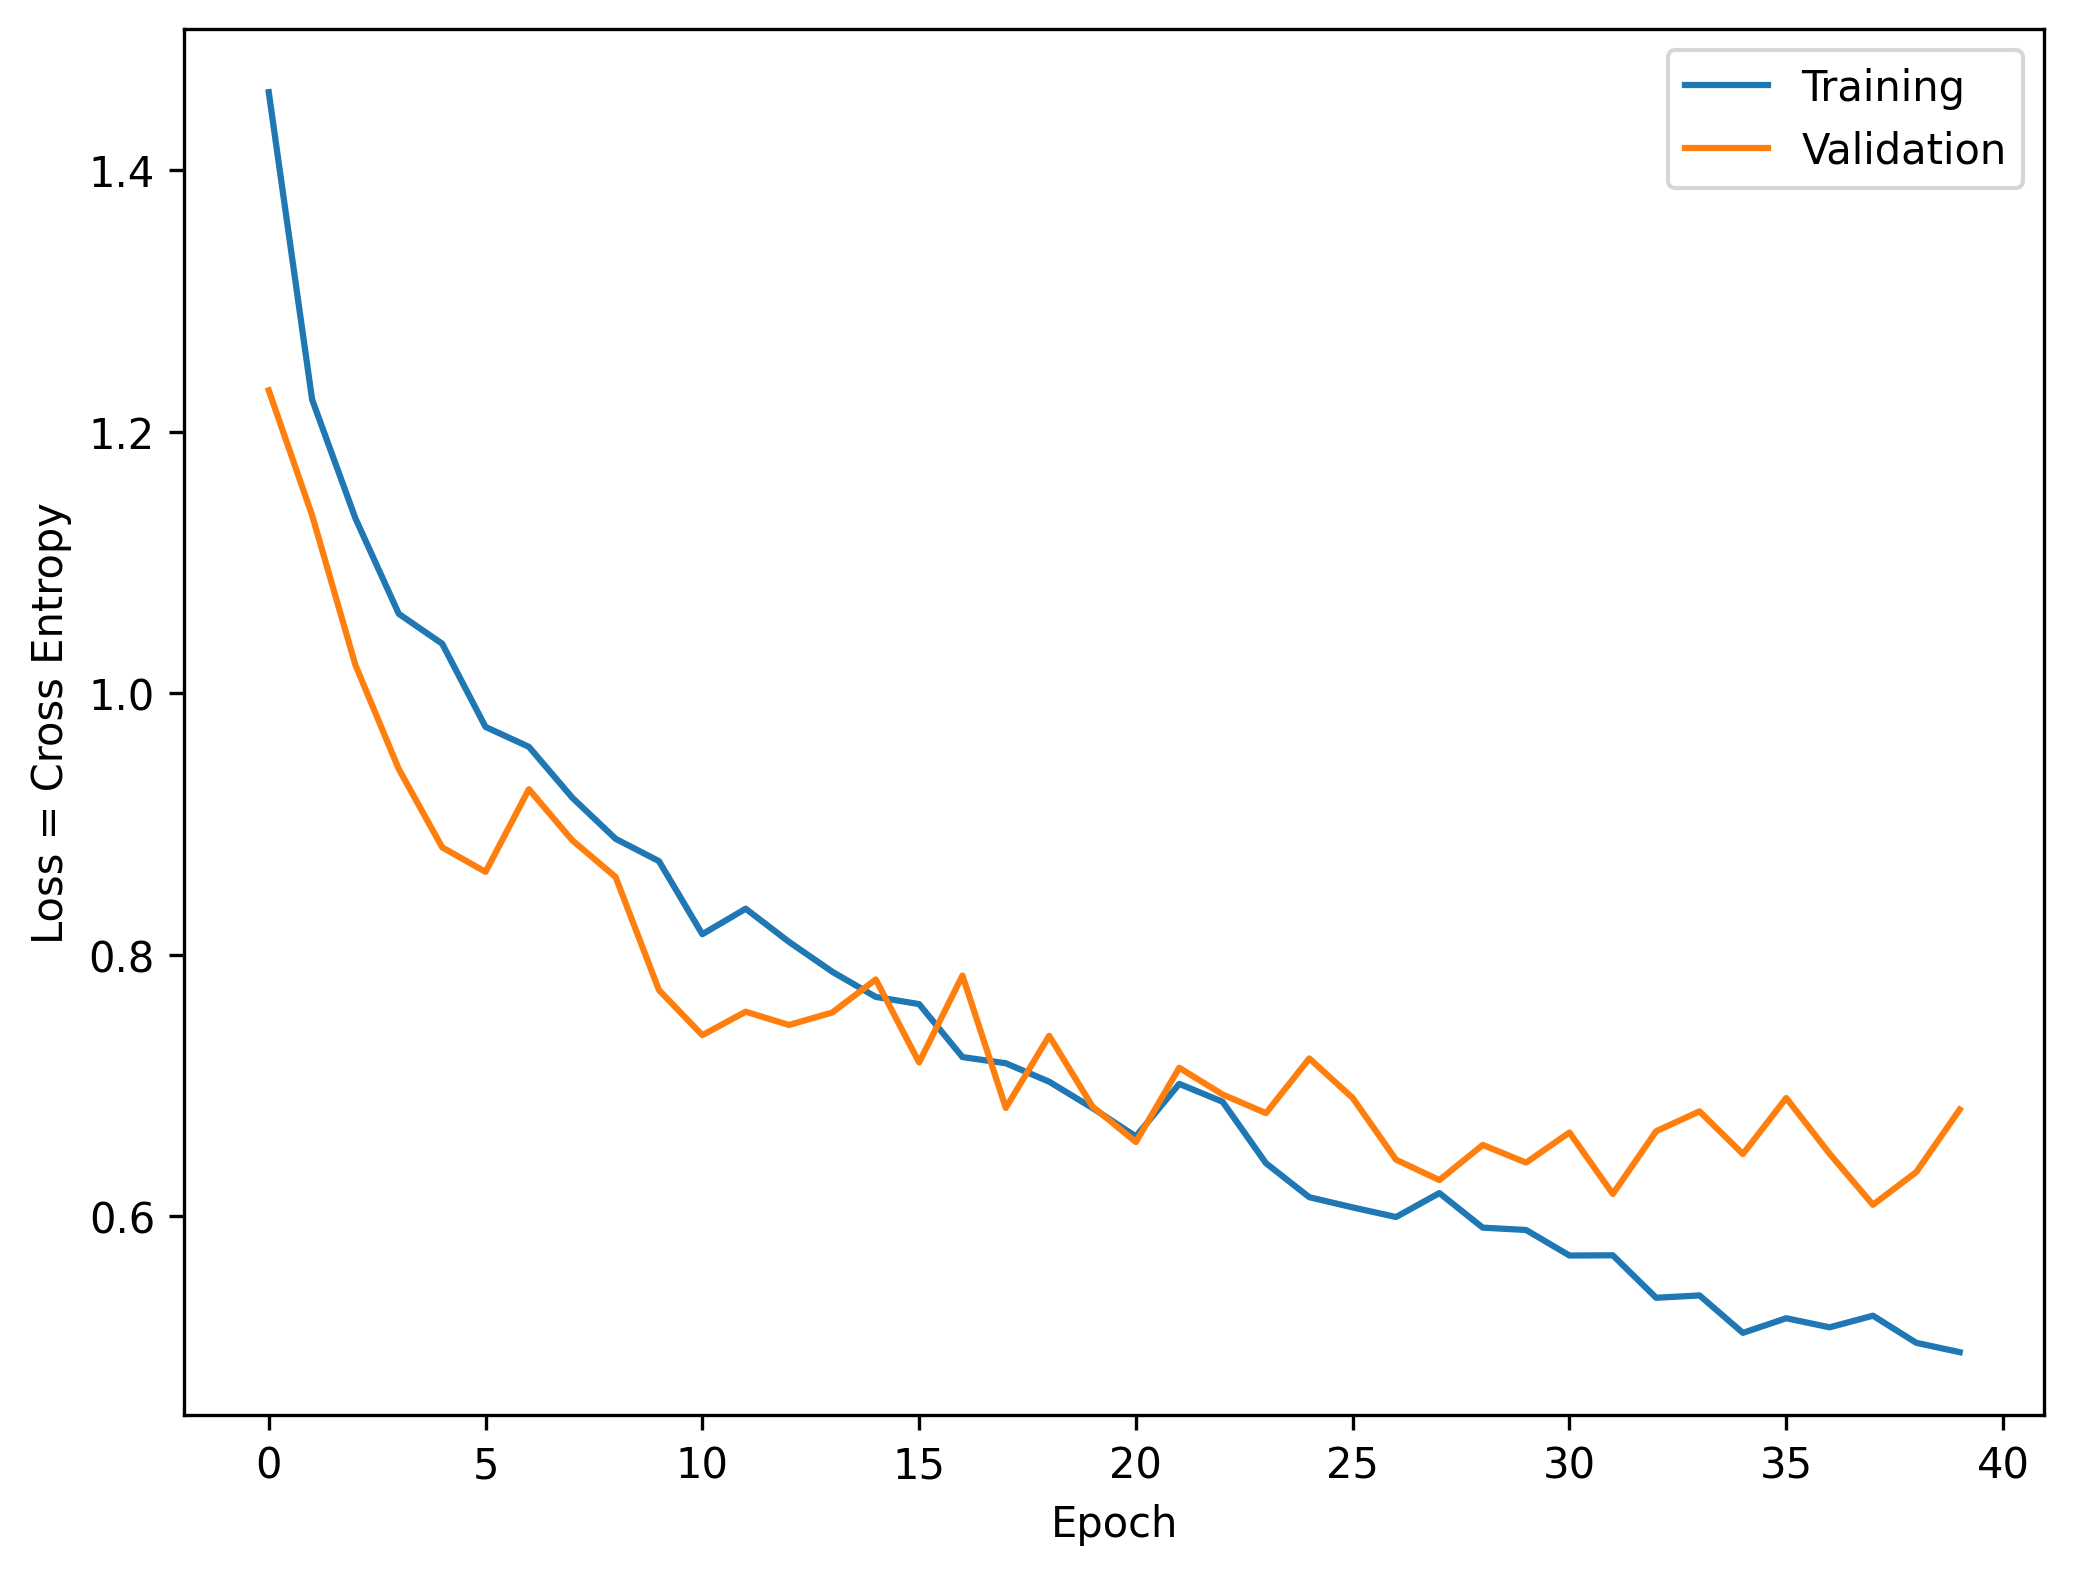

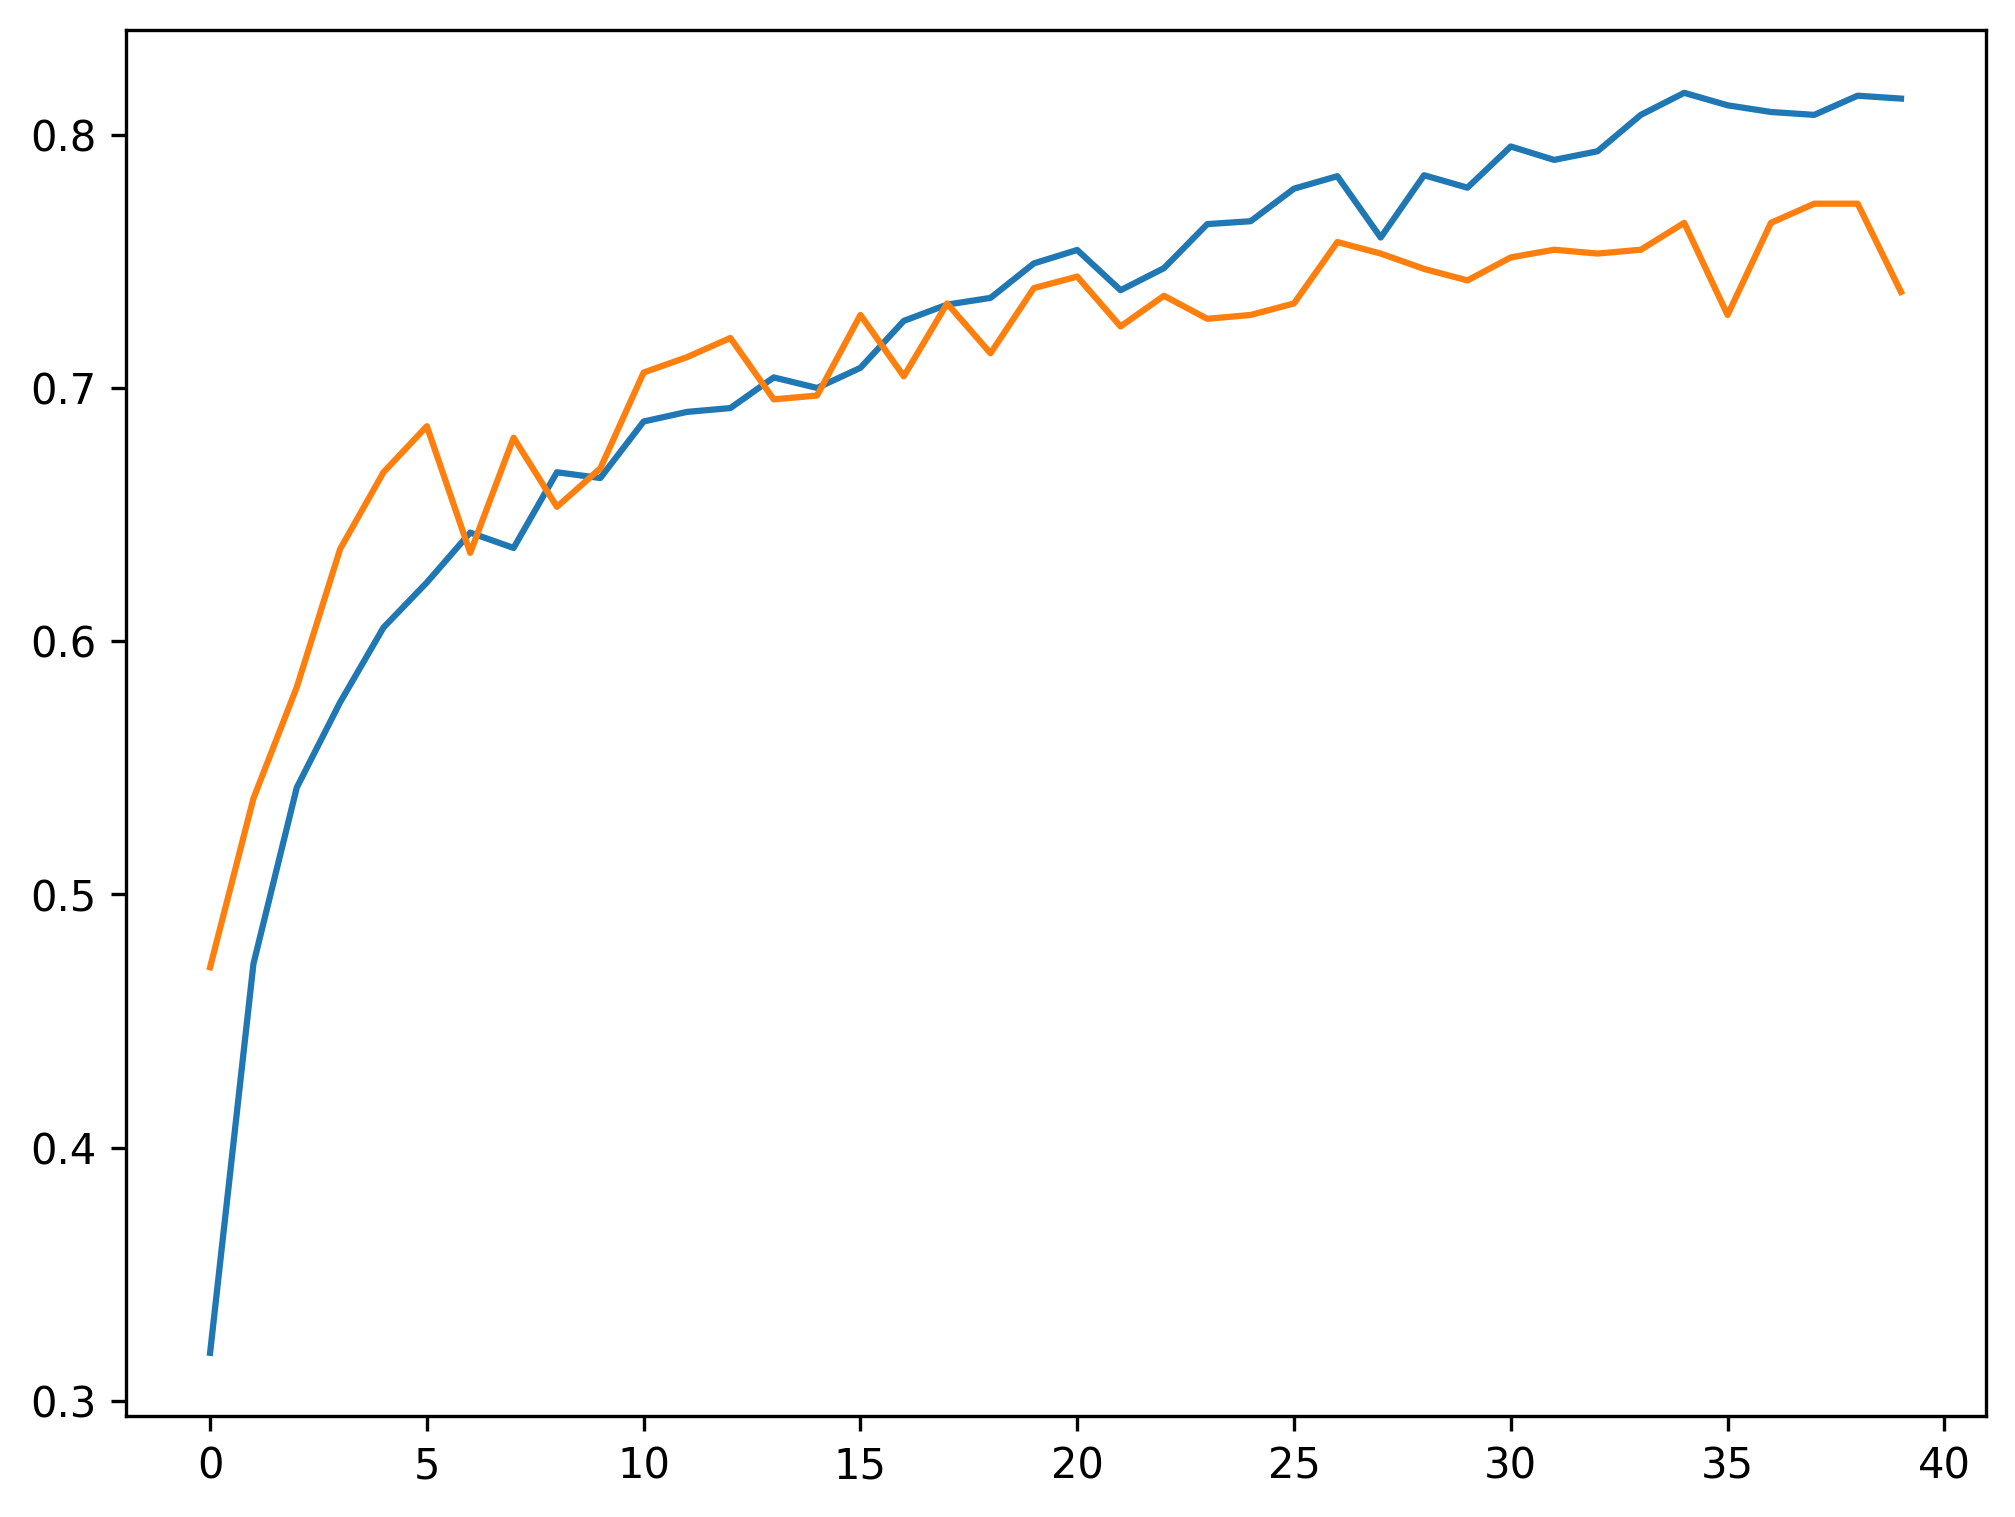

In [43]:
# Create an instance of the Adam class,
# and set the learning rate.
adam_optimizer = Adam(learning_rate = 0.001)
# Compile the model. As this is a classification problem,
# we are going to use the categorical cross entropy for the
# loss function, and we will use the accuracy for metrics.
model.compile(adam_optimizer, loss='categorical_crossentropy',metrics='accuracy')
# Define the batch size
batch_size = 32
# Fit the model, and record the history of the fit.
# In this example we will train the model for 20
# epochs.
history = model.fit(train_datagen.flow(x_train_norm, y_train_cat, batch_size =batch_size, subset = "training"), epochs = 40,validation_data = train_datagen.flow(x_train_norm,y_train_cat, batch_size = batch_size, subset = "validation"))
# Create a pandas dataframe containing
# the history of the fitting
history_df = pd.DataFrame(history.history)
# Plot the training and validation losses
# versus epoch.
plt.figure(figsize = (8, 6), dpi = 300)
plt.plot(history_df["loss"], label = "Training")
plt.plot(history_df["val_loss"], label = "Validation")
# Add a legend to the plot.
plt.legend()
# Label both axes.
plt.xlabel("Epoch")
plt.ylabel("Loss = Cross Entropy")
# Show the plot.
plt.show()
# Plot the training and validation accuracy
# versus epoch.
plt.figure(figsize = (8, 6), dpi = 300)
plt.plot(history_df["accuracy"], label = "Training")
plt.plot(history_df["val_accuracy"], label = "Validation")



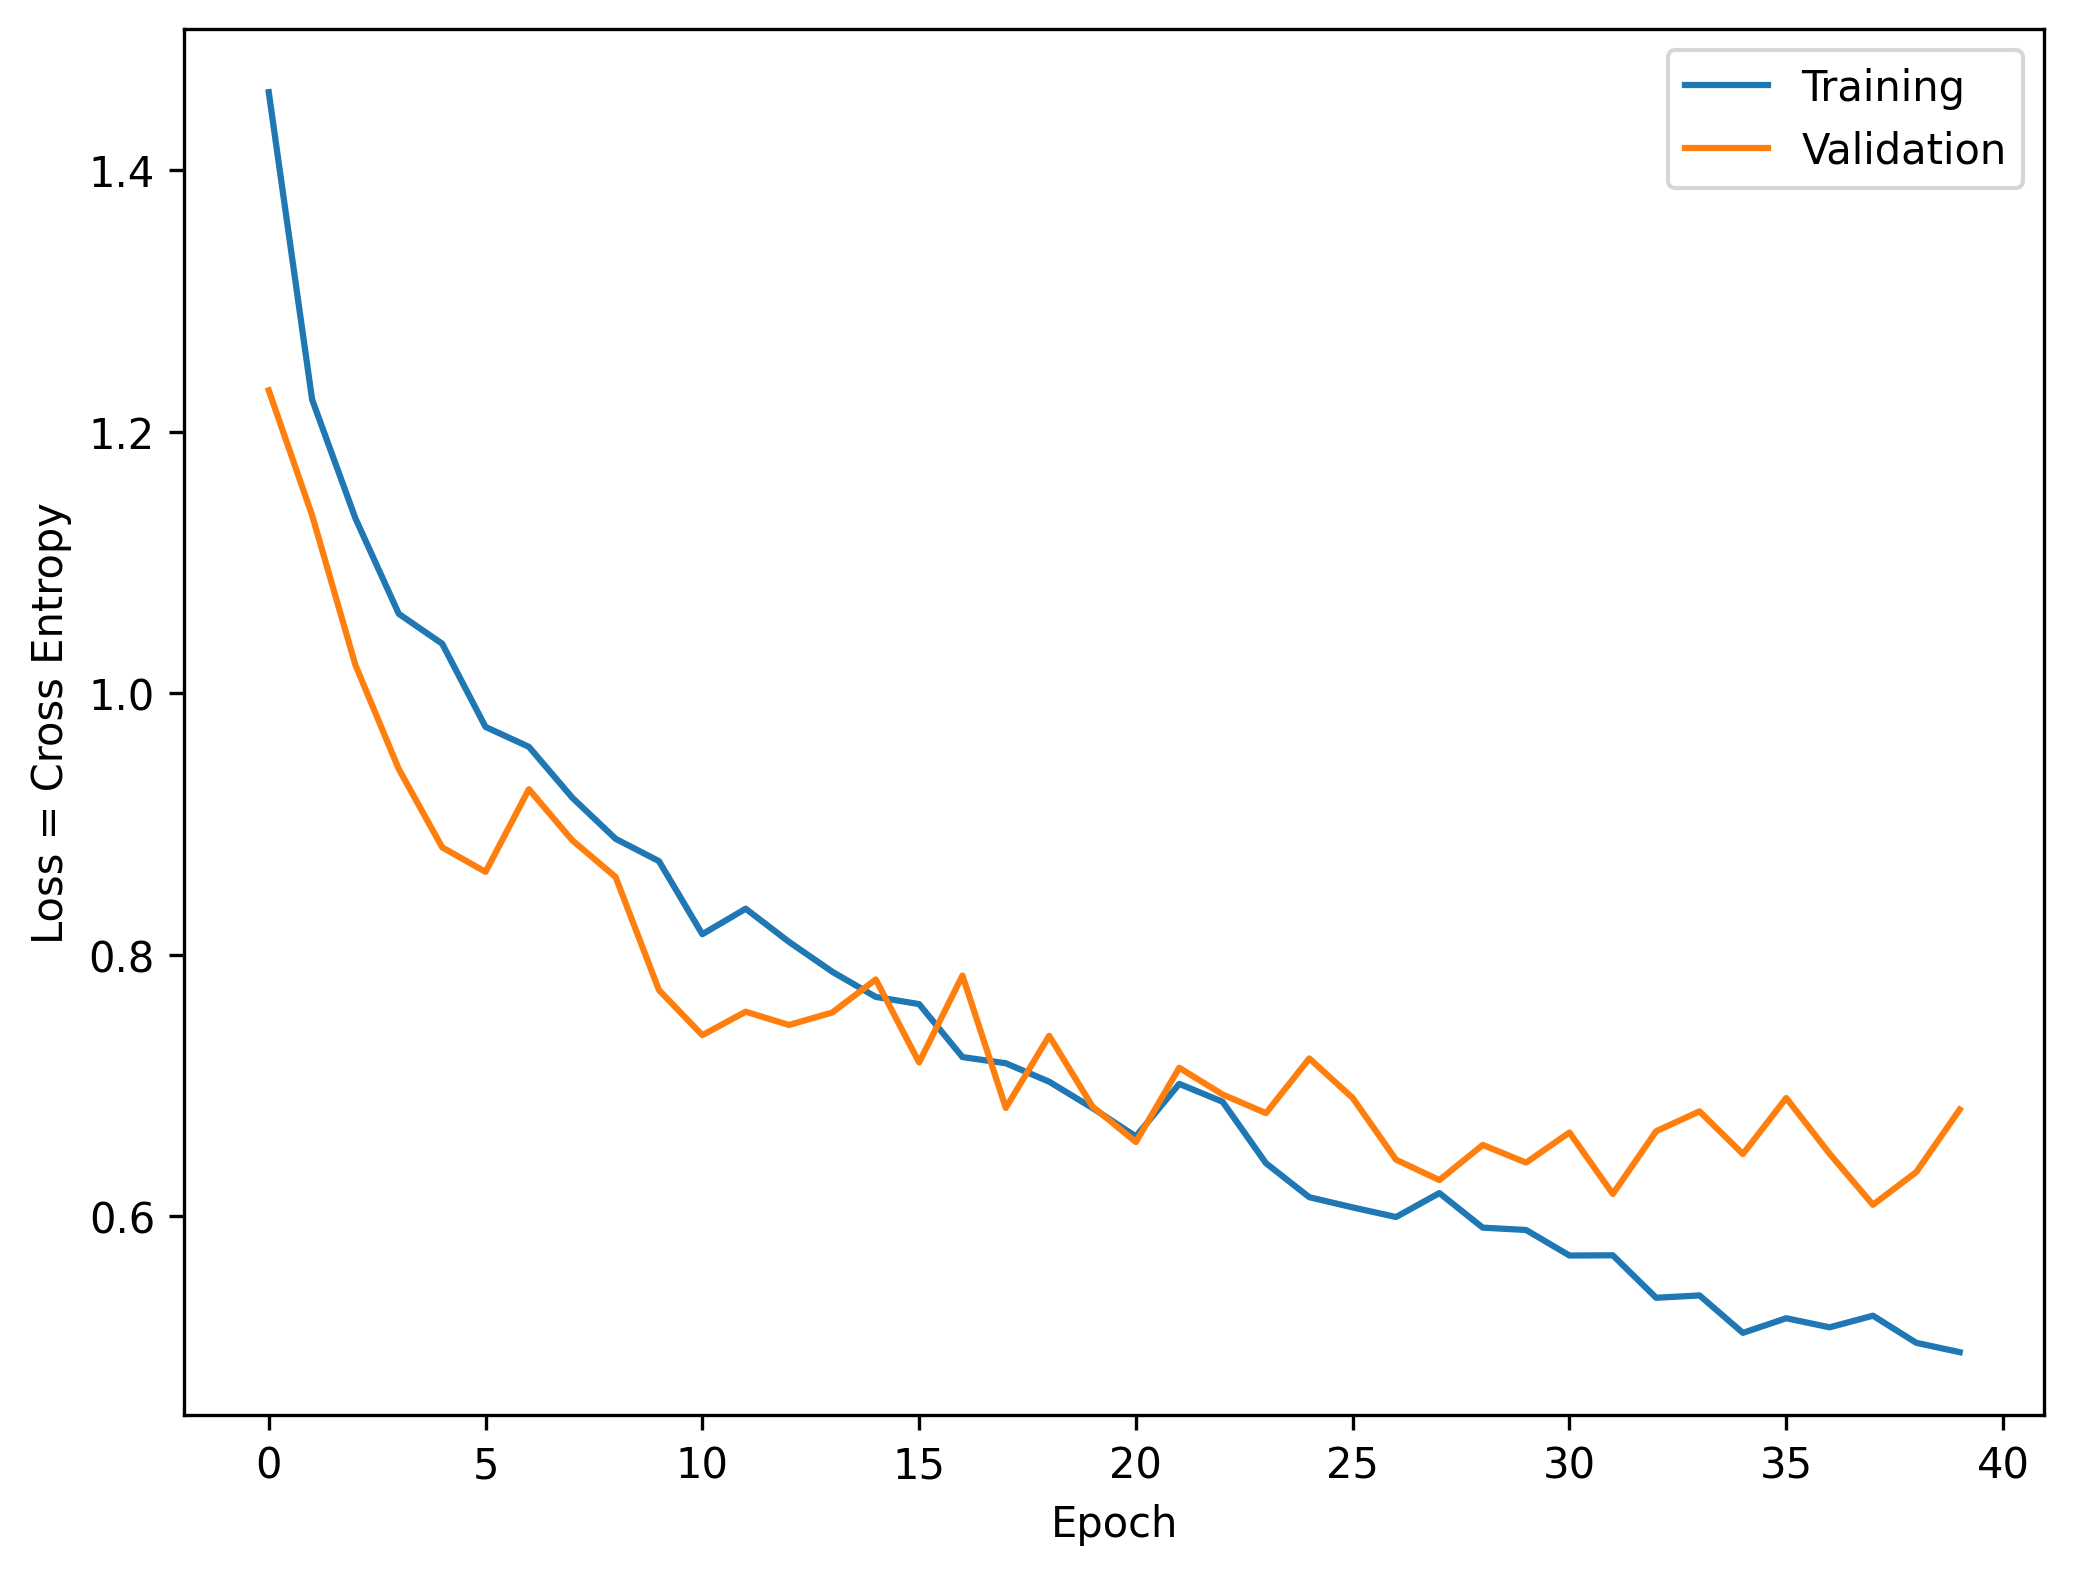

In [44]:
# Create a pandas dataframe containing
# the history of the fitting
history_df = pd.DataFrame(history.history)
# Plot the training and validation losses
# versus epoch.
plt.figure(figsize = (8, 6), dpi = 300)
plt.plot(history_df["loss"], label = "Training")
plt.plot(history_df["val_loss"], label = "Validation")
# Add a legend to the plot.
plt.legend()
# Label both axes.
plt.xlabel("Epoch")
plt.ylabel("Loss = Cross Entropy")
# Show the plot.
plt.show()

In [45]:
# Before we plot the confusion matrix, we need
# to find which label corresponds to which index.
# This is actually somewhat trivial in this case,
# as the labels are just the digits 0-9.
# Names of each label
display_labels = ["%d" % (i, ) for i in range(5)]
# Numerical index of each label
numerical_labels = [i for i in range(5)]
# Lets check the label strings and the
# numerical labels to make sure they line up.
print(display_labels)
print(numerical_labels)

['0', '1', '2', '3', '4']
[0, 1, 2, 3, 4]


In [46]:
# Now use the trained model to predict output
# classes in the test set
y_pred = model.predict(x_test_norm)
# Recall that the outputs from the model give the
# probability of each class label. We can now use
# the argmax() function to determine the index
# of the label with the highest probability for
# each row in y_pred. These will be our predicted
# class labels.
y_pred_class = np.argmax(y_pred, axis=1)

12/12 [==============================] - 1s 52ms/step


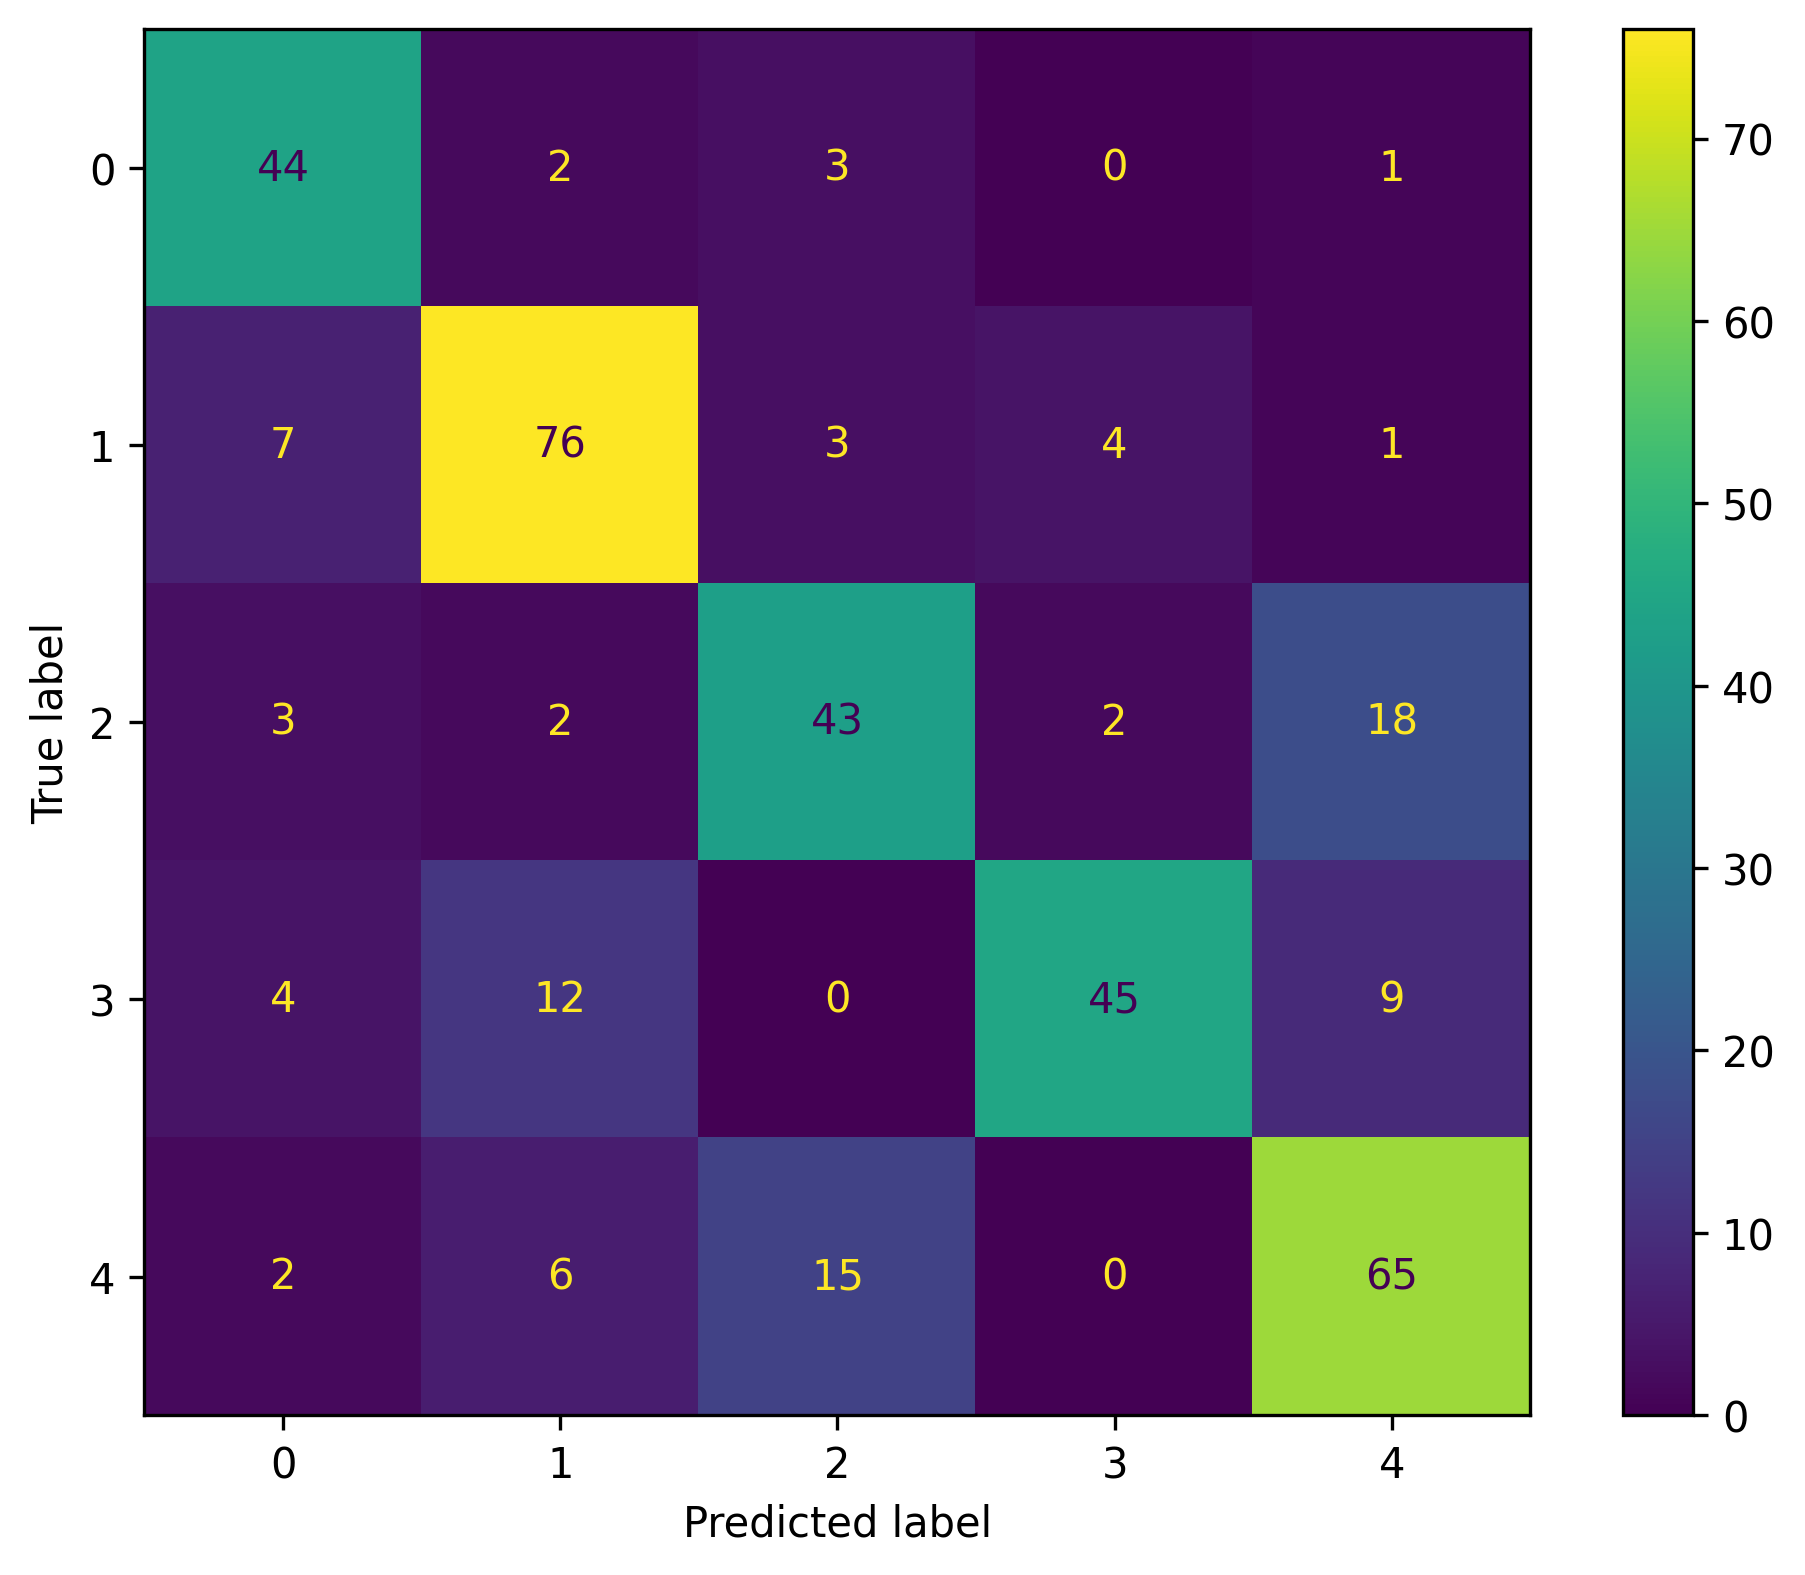

In [47]:
# Import the functions that we will need from sklearn to create
# and plot the confusion matrix.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Create the confusion matrix
con_mat = confusion_matrix(y_test, y_pred_class, labels = numerical_labels)
# Create the figure and axes
plt.figure(figsize = (8, 6), dpi = 300)
ax = plt.axes()
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix = con_mat, display_labels =display_labels)
disp.plot(ax = ax)
# Show the plot
plt.show()

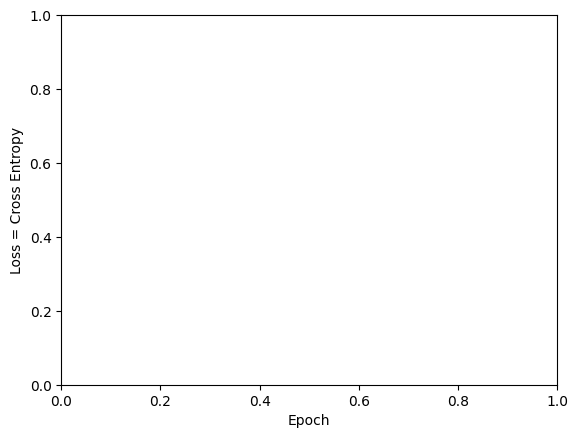

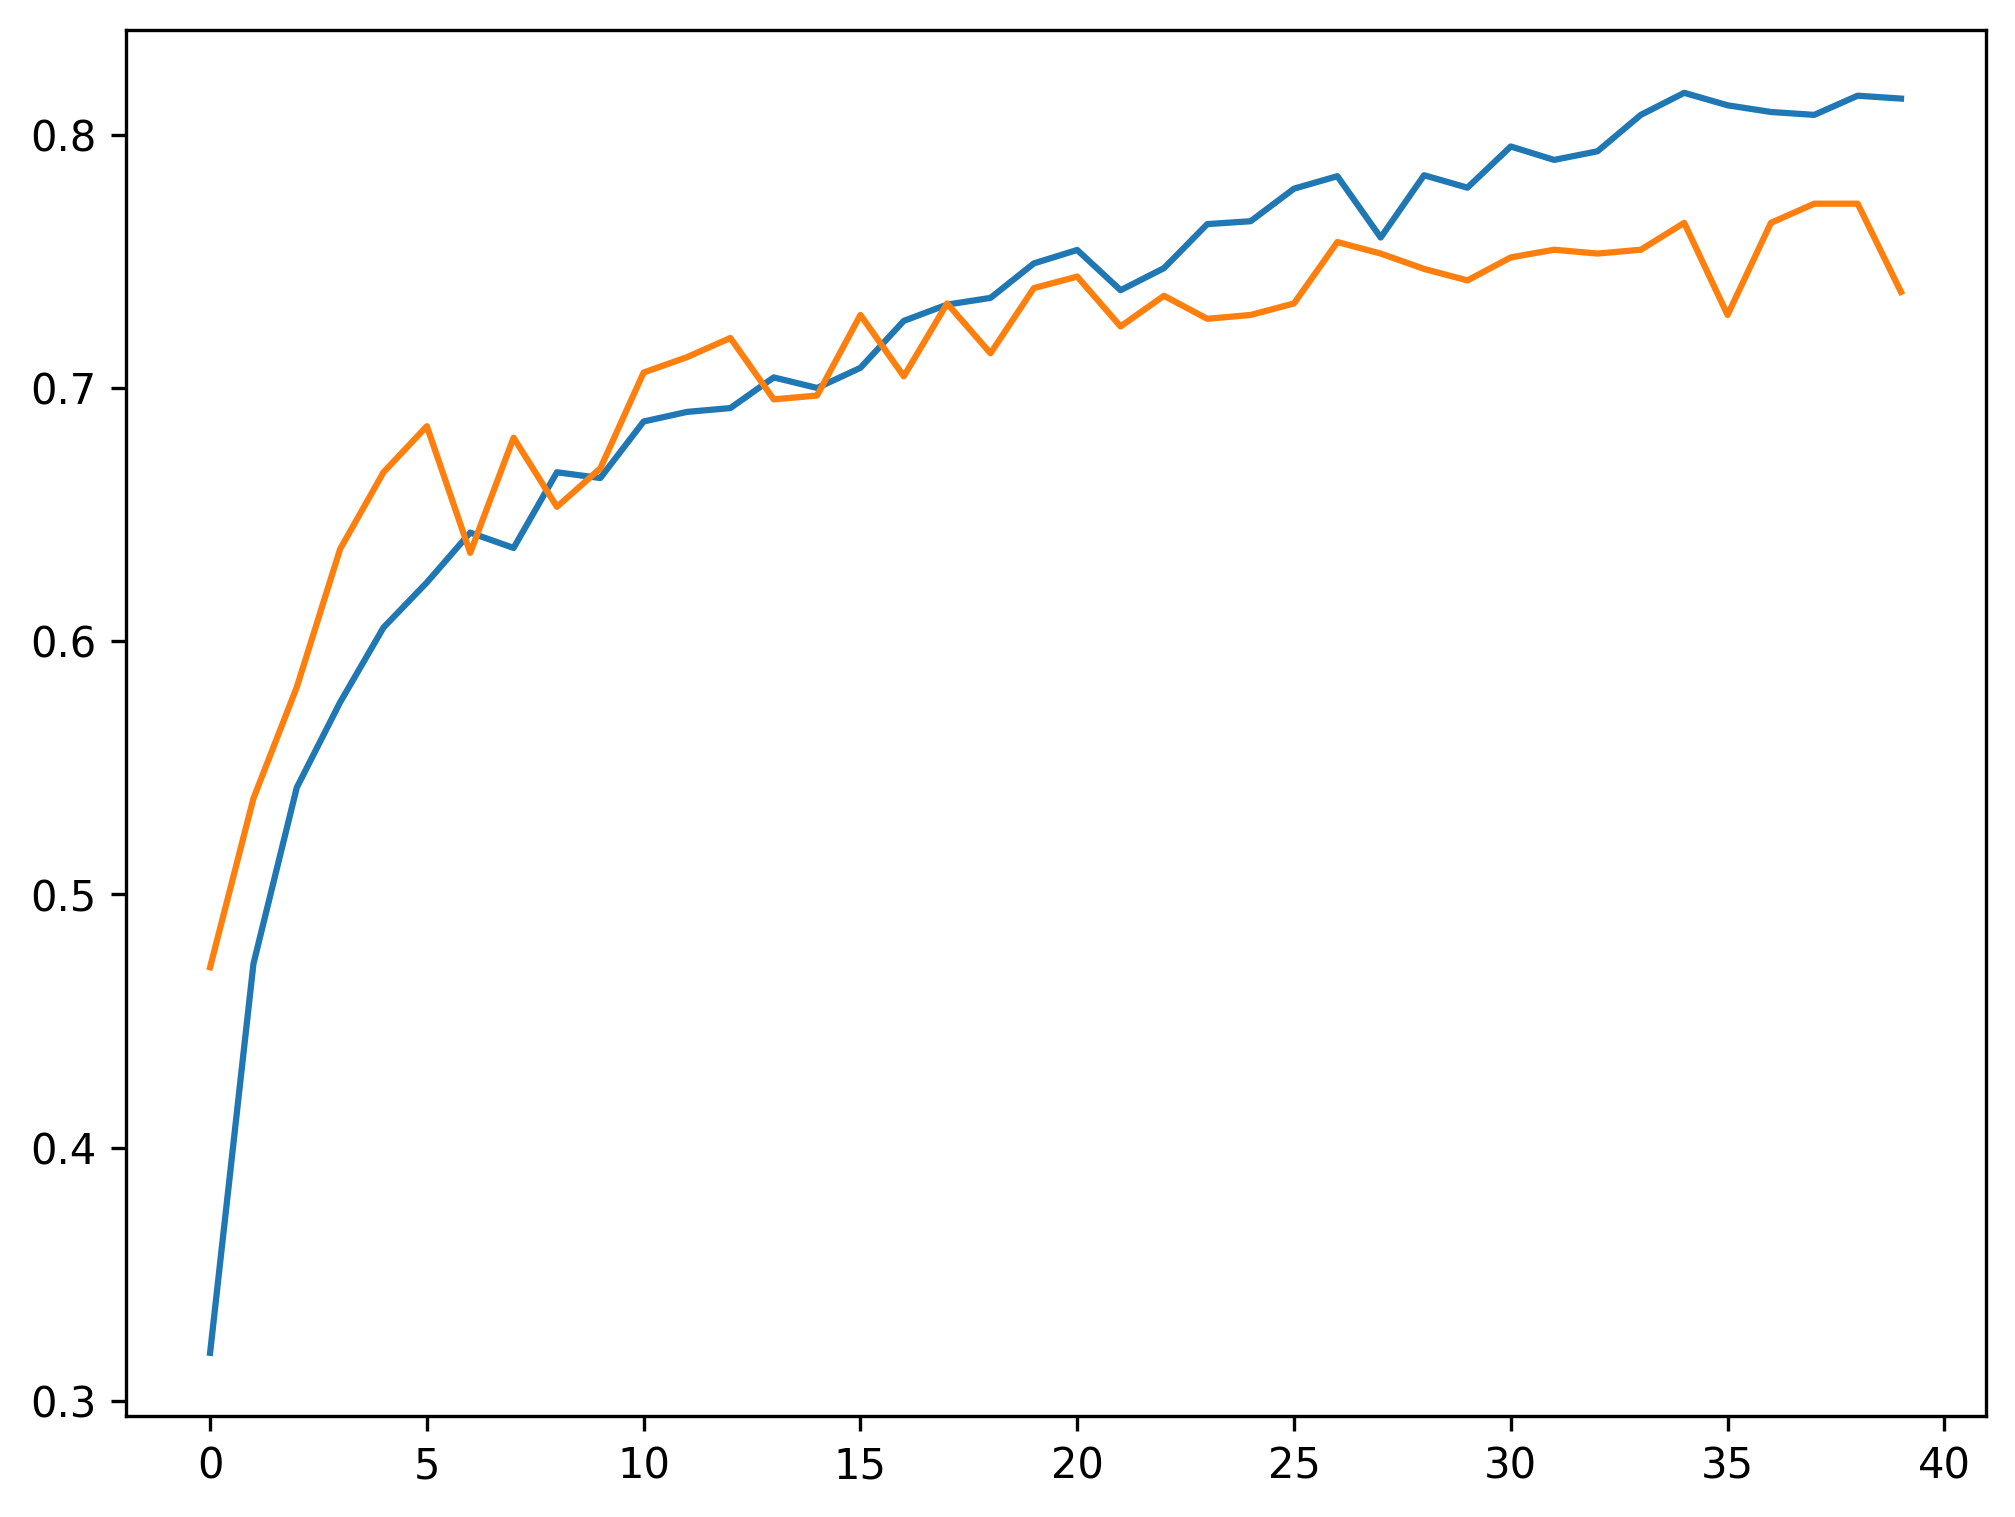

In [48]:
# Label both axes.
plt.xlabel("Epoch")
plt.ylabel("Loss = Cross Entropy")
# Show the plot.
plt.show()
# Plot the training and validation accuracy
# versus epoch.
plt.figure(figsize = (8, 6), dpi = 300)
plt.plot(history_df["accuracy"], label = "Training")
plt.plot(history_df["val_accuracy"], label = "Validation")

In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.73      0.88      0.80        50
           1       0.78      0.84      0.80        91
           2       0.67      0.63      0.65        68
           3       0.88      0.64      0.74        70
           4       0.69      0.74      0.71        88

    accuracy                           0.74       367
   macro avg       0.75      0.75      0.74       367
weighted avg       0.75      0.74      0.74       367



### Model 9: Taking the Number of epoch to 100 and adding EarlyStopping

In [92]:

model = Sequential()
# Add the first Convolutional layer. Here we use 32 filters,
# which will each be convolved with the input data to
# produce 32 feature maps. We use a kernel_size of 3x3,
# and the relu activation function.
model.add(Conv2D(filters = 32, kernel_size = (3, 3), strides = (2, 2), padding="same", input_shape = (width_npix,height_npix, 3), activation = 'relu'))

# Add a pooling layer that uses max pooling,
# with a pool size of 2x2.
model.add(MaxPooling2D(pool_size = (2, 2), padding = "same"))
# Add a second convolutional layer, again with a kernel size of 3x3 and
# the relu activation function but now with 64 filters. Note that it
# is common to increase the number of filters as we go deeper into
# the network.
model.add(Conv2D(filters = 64, kernel_size = (3, 3),strides = (2, 2), padding="same", activation = 'relu'))
# Add a second max pooling layer.
model.add(MaxPooling2D(pool_size = (2, 2), padding = "same"))
# Add a third convolutional layer, now with 128 filters.
model.add(Conv2D(filters = 128, kernel_size = (3, 3),strides = (2, 2), padding="same", activation = 'relu'))
# Add a third max pooling layer.
model.add(MaxPooling2D(pool_size = (2, 2), padding = "same"))
# After the final pooling layer, we need a flatter layer,
# which will flatten the output to a 1-dimensional array,
# ready for the fully connected network.
model.add(Flatten())
# Add a Dense (i.e. fully connected) layer with 64 neurons
# and the relu activation function.
model.add(Dense(64, activation = 'relu'))
# Apply a dropout rate of 50% to the dense layer.
model.add(Dropout(0.5))
# The output layer needs 10 units, corresponding
# to the 10 output classes. We use the softmax
# activation function, which means the resulting
# output values will represent the probabilities
# for each of the 10 class labels.
model.add(Dense(5, activation = 'softmax'))
# Print a summary of the model.
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_39 (MaxPooli  (None, 64, 64, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_43 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_40 (MaxPooli  (None, 16, 16, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_44 (Conv2D)          (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_41 (MaxPooli  (None, 4, 4, 128)       

In [95]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping



Epoch 1/100
83/83 [==============================] - 45s 529ms/step - loss: 1.0903 - accuracy: 0.5399 - val_loss: 0.9565 - val_accuracy: 0.6227
Epoch 2/100
83/83 [==============================] - 44s 525ms/step - loss: 1.0374 - accuracy: 0.5728 - val_loss: 0.9092 - val_accuracy: 0.6394
Epoch 3/100
83/83 [==============================] - 43s 524ms/step - loss: 0.9995 - accuracy: 0.5963 - val_loss: 0.9088 - val_accuracy: 0.6667
Epoch 4/100
83/83 [==============================] - 44s 525ms/step - loss: 0.9606 - accuracy: 0.6190 - val_loss: 0.8156 - val_accuracy: 0.6803
Epoch 5/100
83/83 [==============================] - 44s 530ms/step - loss: 0.9088 - accuracy: 0.6421 - val_loss: 0.8002 - val_accuracy: 0.6697
Epoch 6/100
83/83 [==============================] - 44s 529ms/step - loss: 0.8937 - accuracy: 0.6587 - val_loss: 0.7951 - val_accuracy: 0.6788
Epoch 7/100
83/83 [==============================] - 43s 522ms/step - loss: 0.8353 - accuracy: 0.6776 - val_loss: 0.8018 - val_accuracy:

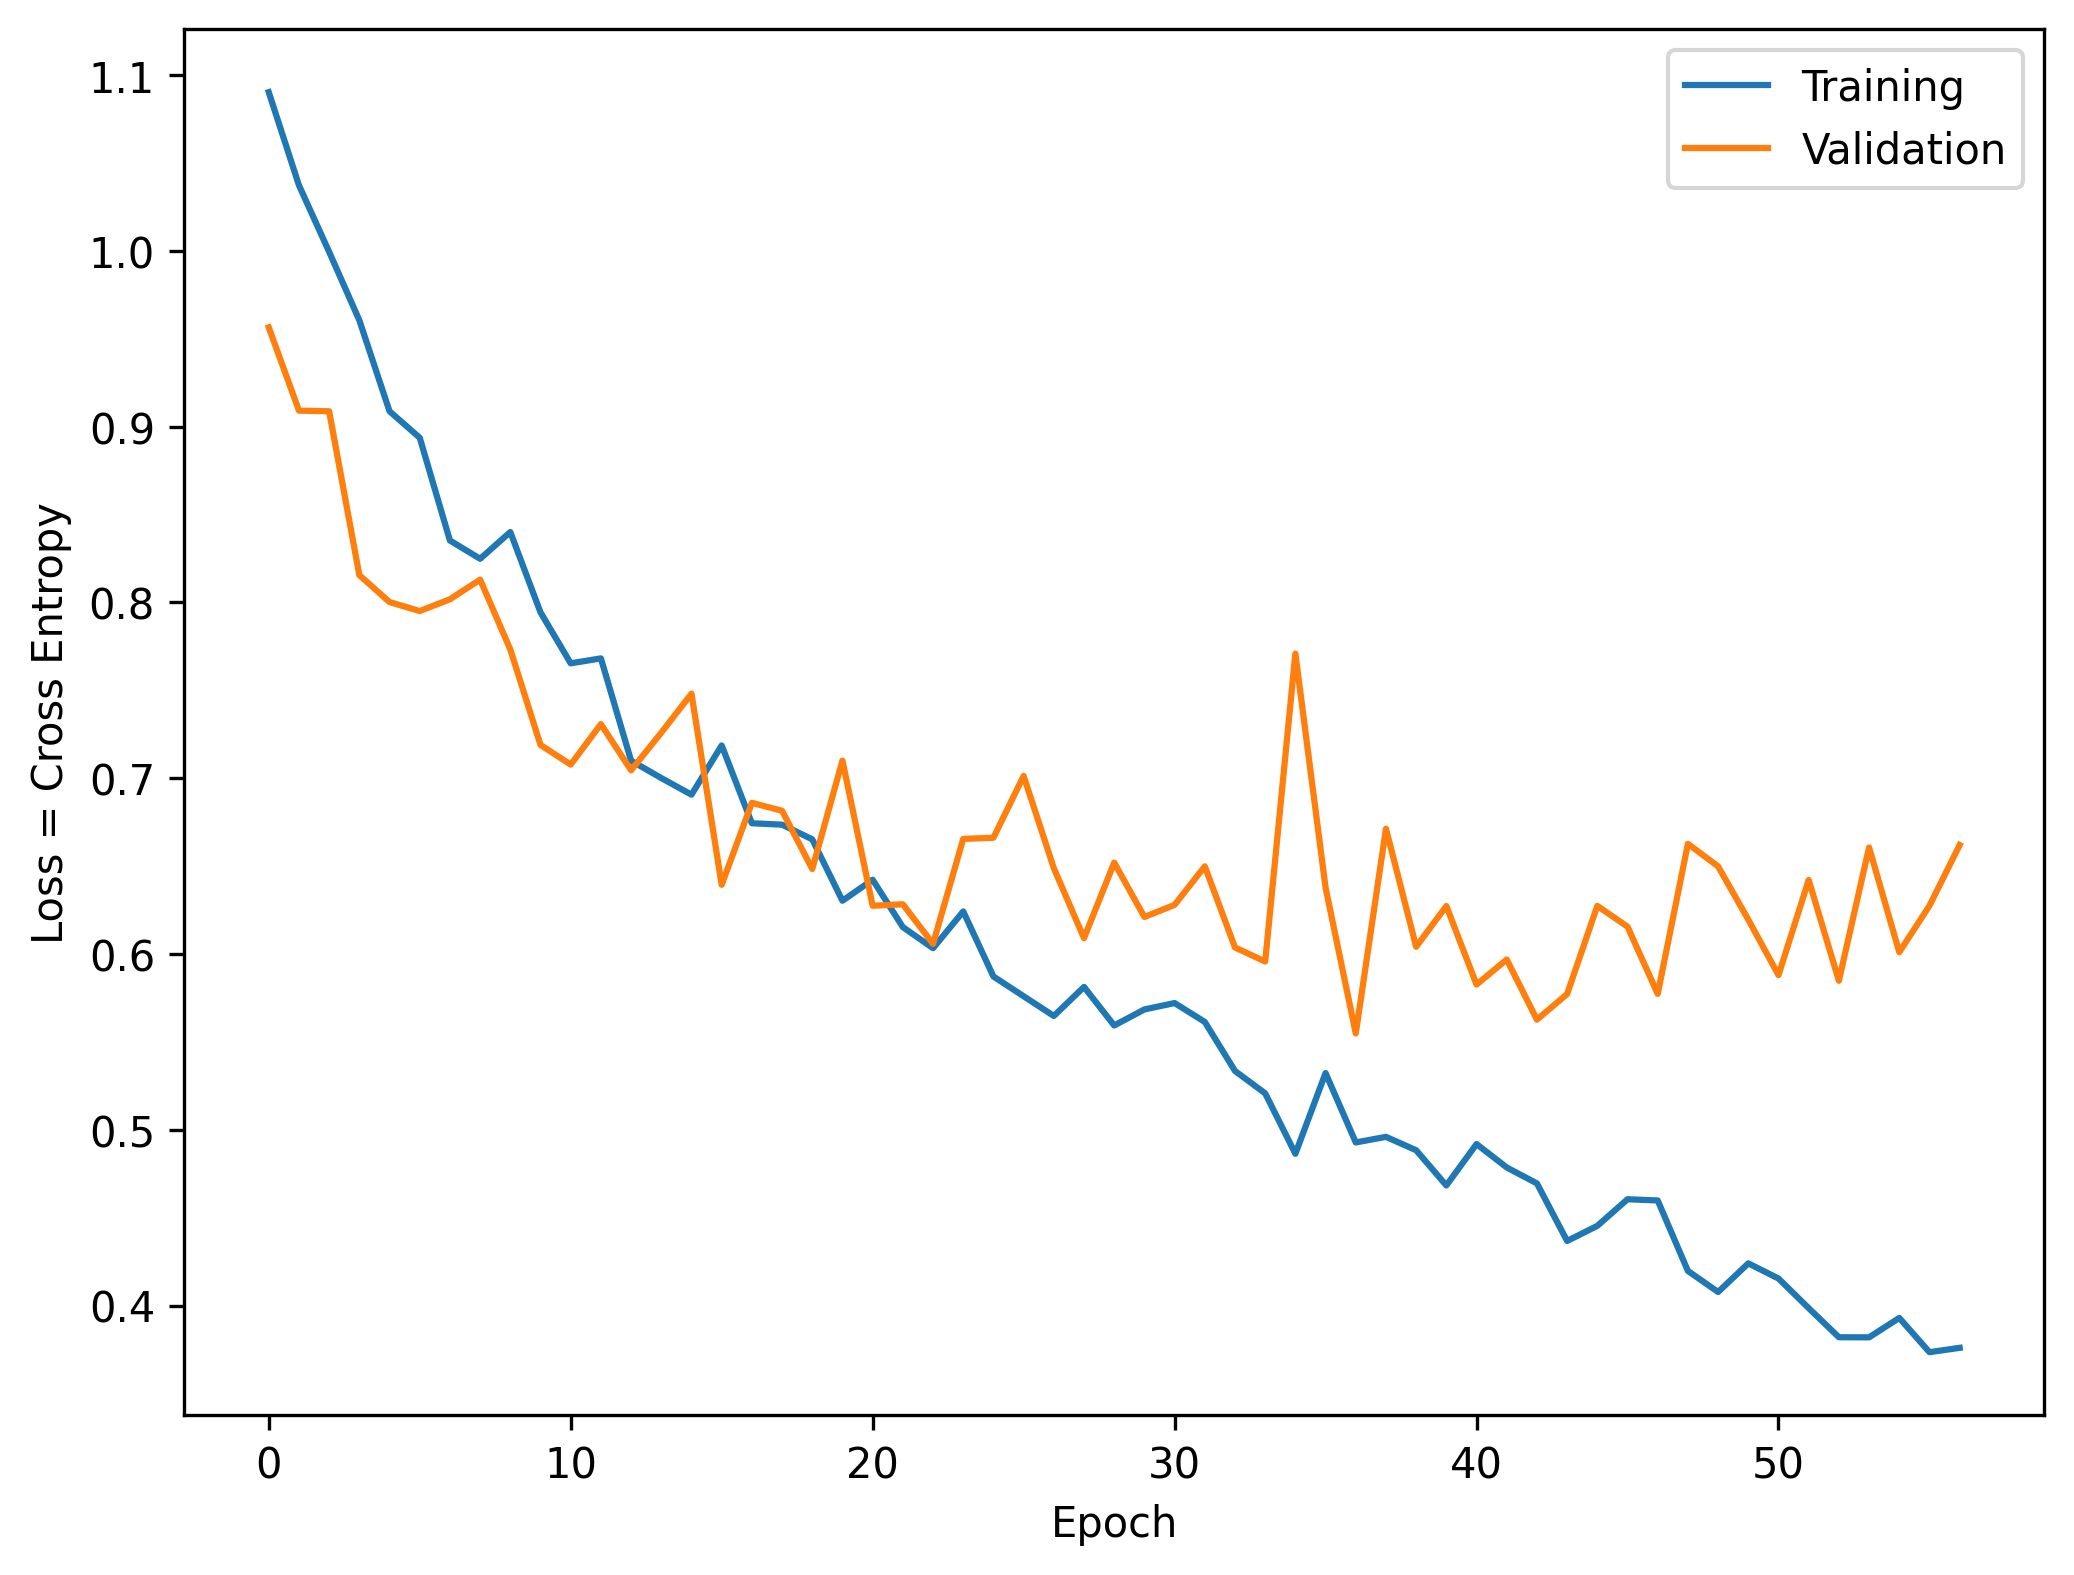

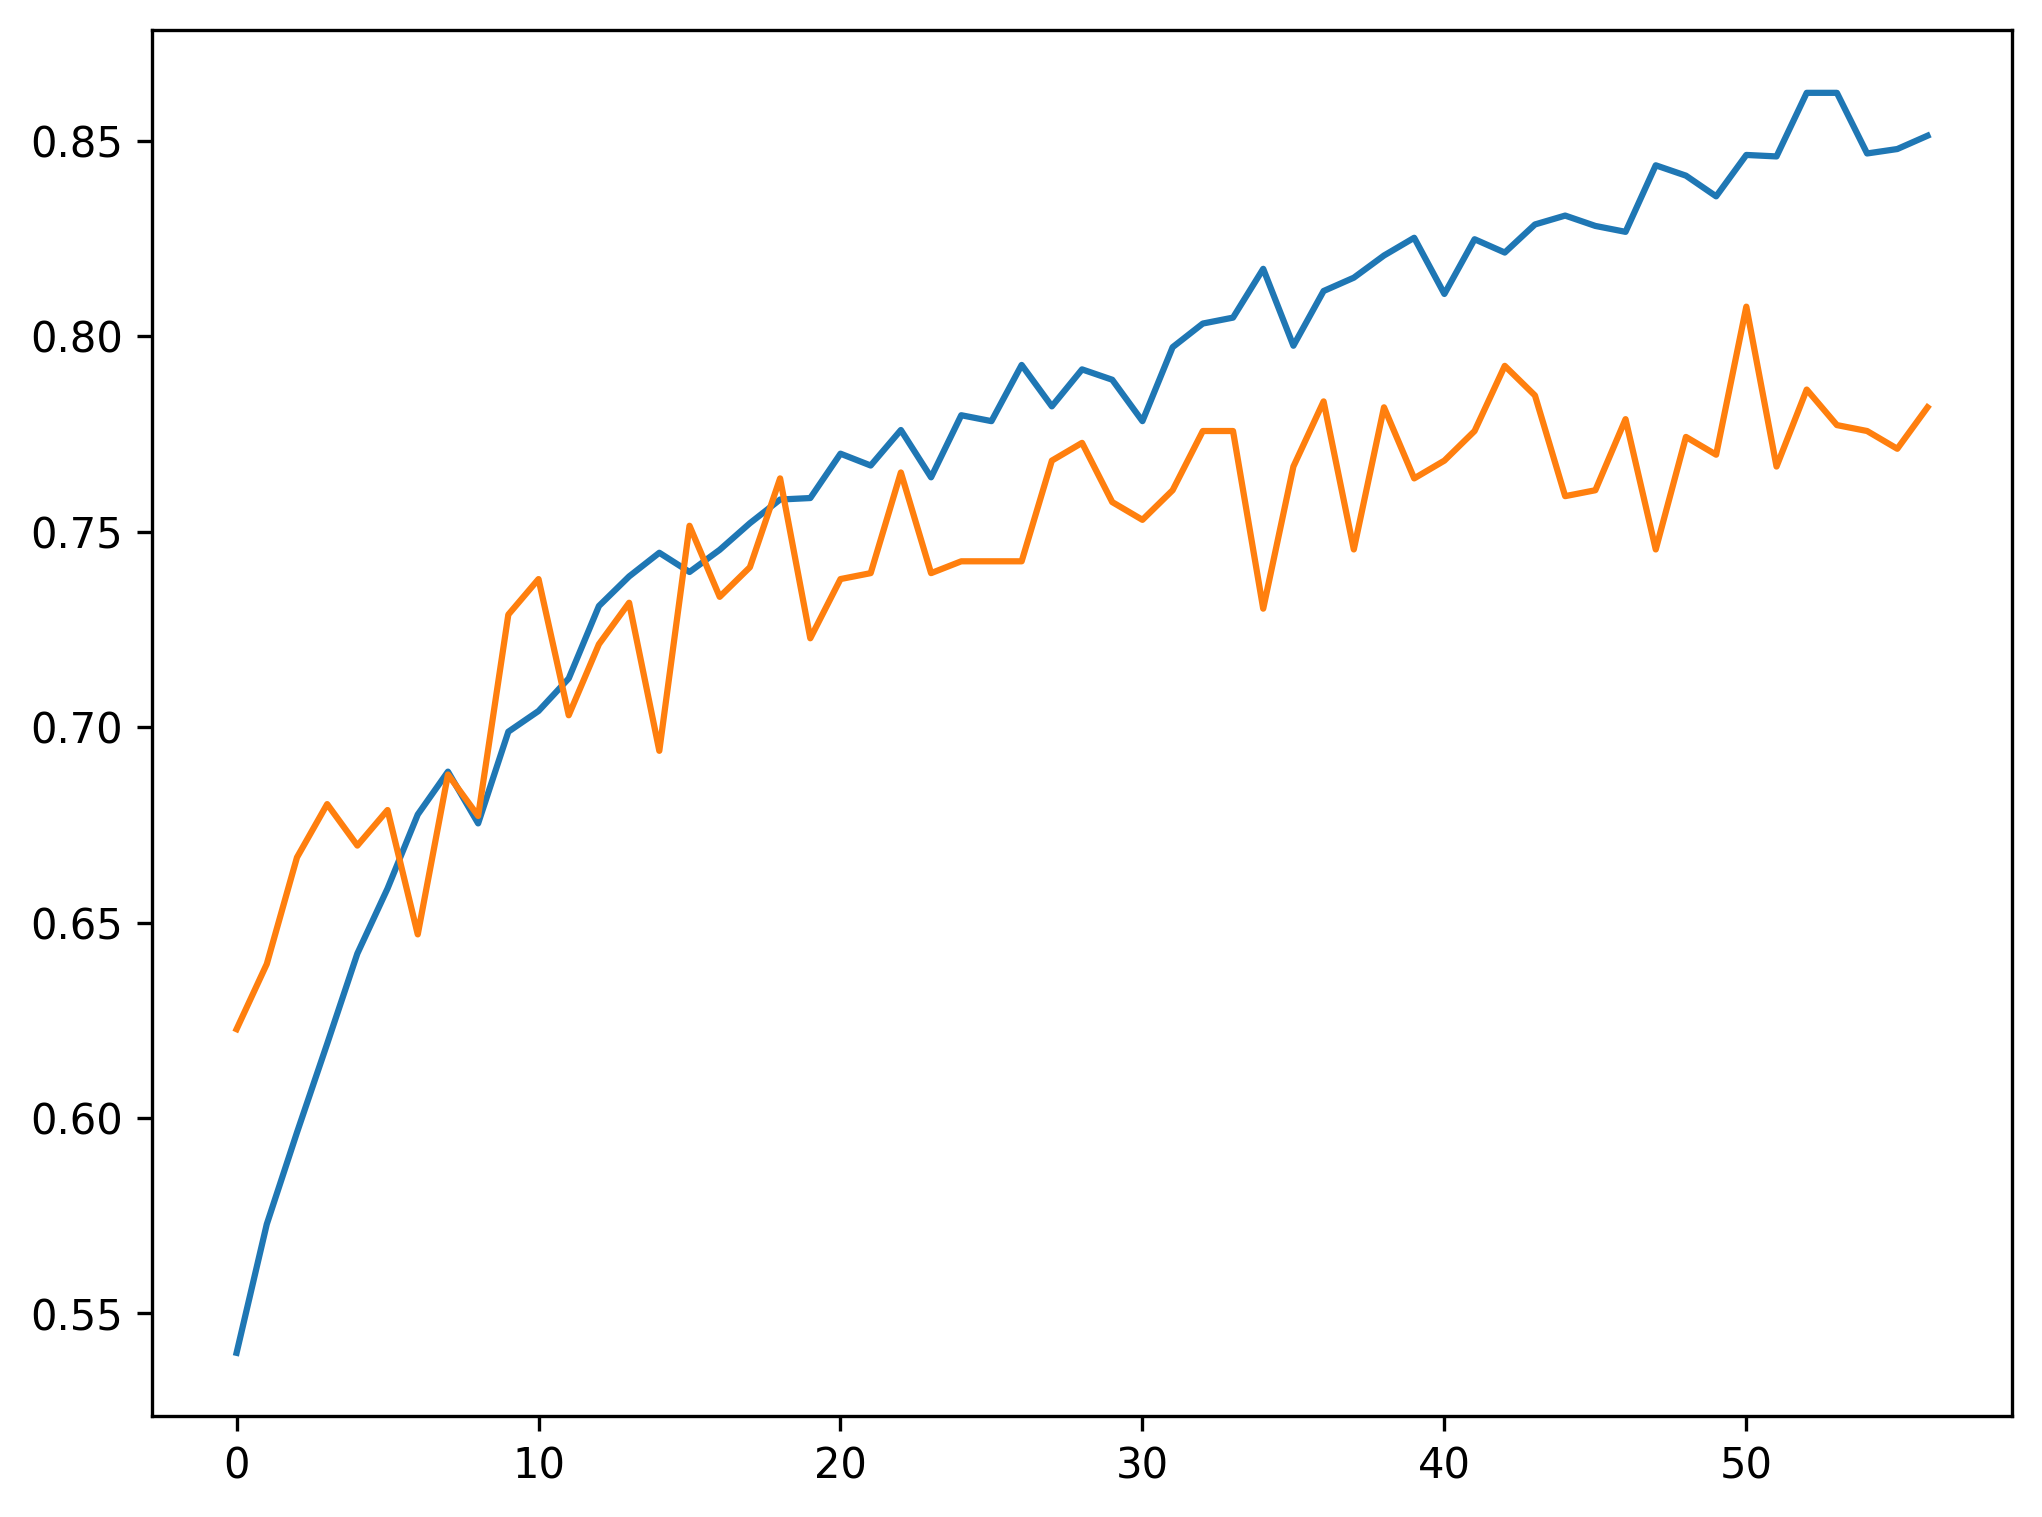

In [99]:

adam_optimizer = Adam(learning_rate = 0.001)
# Compile the model. As this is a classification problem,
# we are going to use the categorical cross entropy for the
# loss function, and we will use the accuracy for metrics.
model.compile(adam_optimizer, loss='categorical_crossentropy',metrics='accuracy')
# Define the batch size
batch_size = 32
# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True) 

early_stopping = EarlyStopping(monitor='val_loss', patience = 20)
# Train the model. Note that we record the return value
# from the fit() command in the variable called history.
# this will allow us to plot how the losses varied with
# epoch while the model was being trained.
#history = model.fit(x = x_train_scaled, y = y_train, batch_size = None, epochs= 100, verbose = "auto", validation_split = 0.1, callbacks =[early_stopping])


# Fit the model, and record the history of the fit.
# In this example we will train the model for 100 # epochs.
history = model.fit(train_datagen.flow(x_train_norm, y_train_cat, batch_size =batch_size, subset = "training"), epochs = 100,validation_data = train_datagen.flow(x_train_norm,y_train_cat, batch_size = batch_size, subset = "validation"),verbose = "auto", validation_split = 0.1, callbacks =[early_stopping])
# Create a pandas dataframe containing
# the history of the fitting
history_df = pd.DataFrame(history.history)
# Plot the training and validation losses
# versus epoch.
plt.figure(figsize = (8, 6), dpi = 300)
plt.plot(history_df["loss"], label = "Training")
plt.plot(history_df["val_loss"], label = "Validation")
# Add a legend to the plot.
plt.legend()
# Label both axes.
plt.xlabel("Epoch")
plt.ylabel("Loss = Cross Entropy")
# Show the plot.
plt.show()
# Plot the training and validation accuracy
# versus epoch.
plt.figure(figsize = (8, 6), dpi = 300)
plt.plot(history_df["accuracy"], label = "Training")
plt.plot(history_df["val_accuracy"], label = "Validation")

Epoch 1/100
83/83 [==============================] - 45s 530ms/step - loss: 0.3971 - accuracy: 0.8562 - val_loss: 0.6452 - val_accuracy: 0.7803
Epoch 2/100
83/83 [==============================] - 43s 524ms/step - loss: 0.3692 - accuracy: 0.8608 - val_loss: 0.6523 - val_accuracy: 0.7788
Epoch 3/100
83/83 [==============================] - 44s 528ms/step - loss: 0.3574 - accuracy: 0.8653 - val_loss: 0.6360 - val_accuracy: 0.7712
Epoch 4/100
83/83 [==============================] - 43s 522ms/step - loss: 0.3772 - accuracy: 0.8589 - val_loss: 0.6411 - val_accuracy: 0.7667
Epoch 5/100
83/83 [==============================] - 43s 524ms/step - loss: 0.3523 - accuracy: 0.8661 - val_loss: 0.6320 - val_accuracy: 0.7833
Epoch 6/100
83/83 [==============================] - 43s 521ms/step - loss: 0.3437 - accuracy: 0.8623 - val_loss: 0.7076 - val_accuracy: 0.7636
Epoch 7/100
83/83 [==============================] - 43s 522ms/step - loss: 0.3611 - accuracy: 0.8680 - val_loss: 0.6410 - val_accuracy:

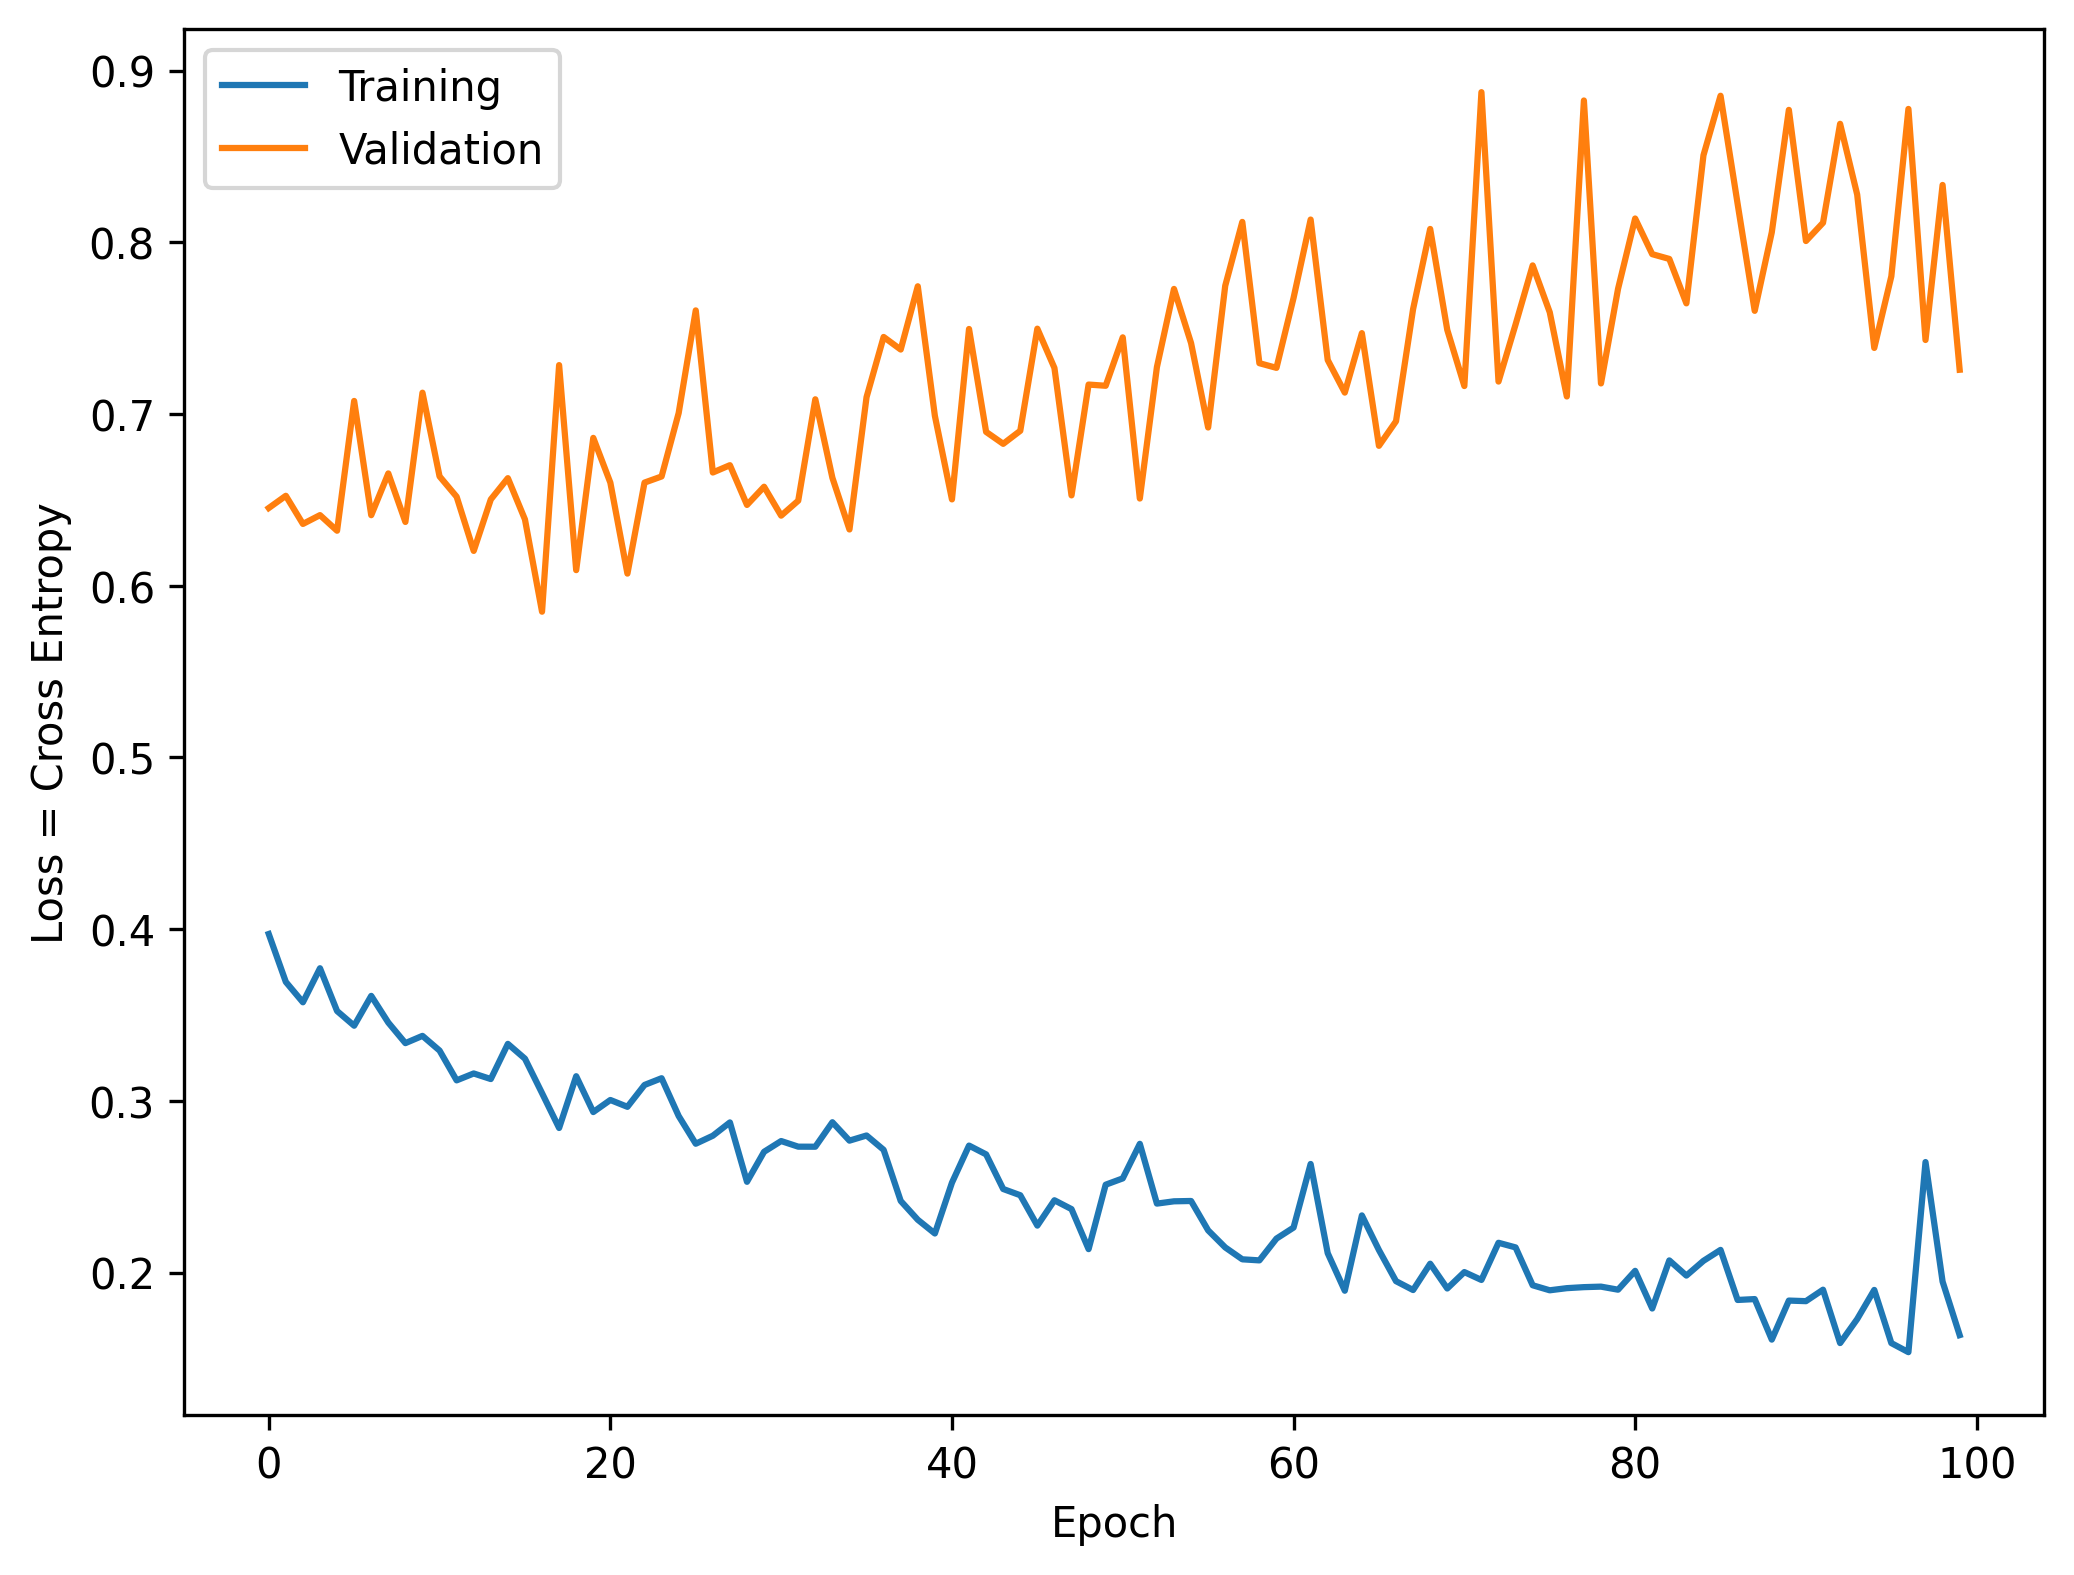

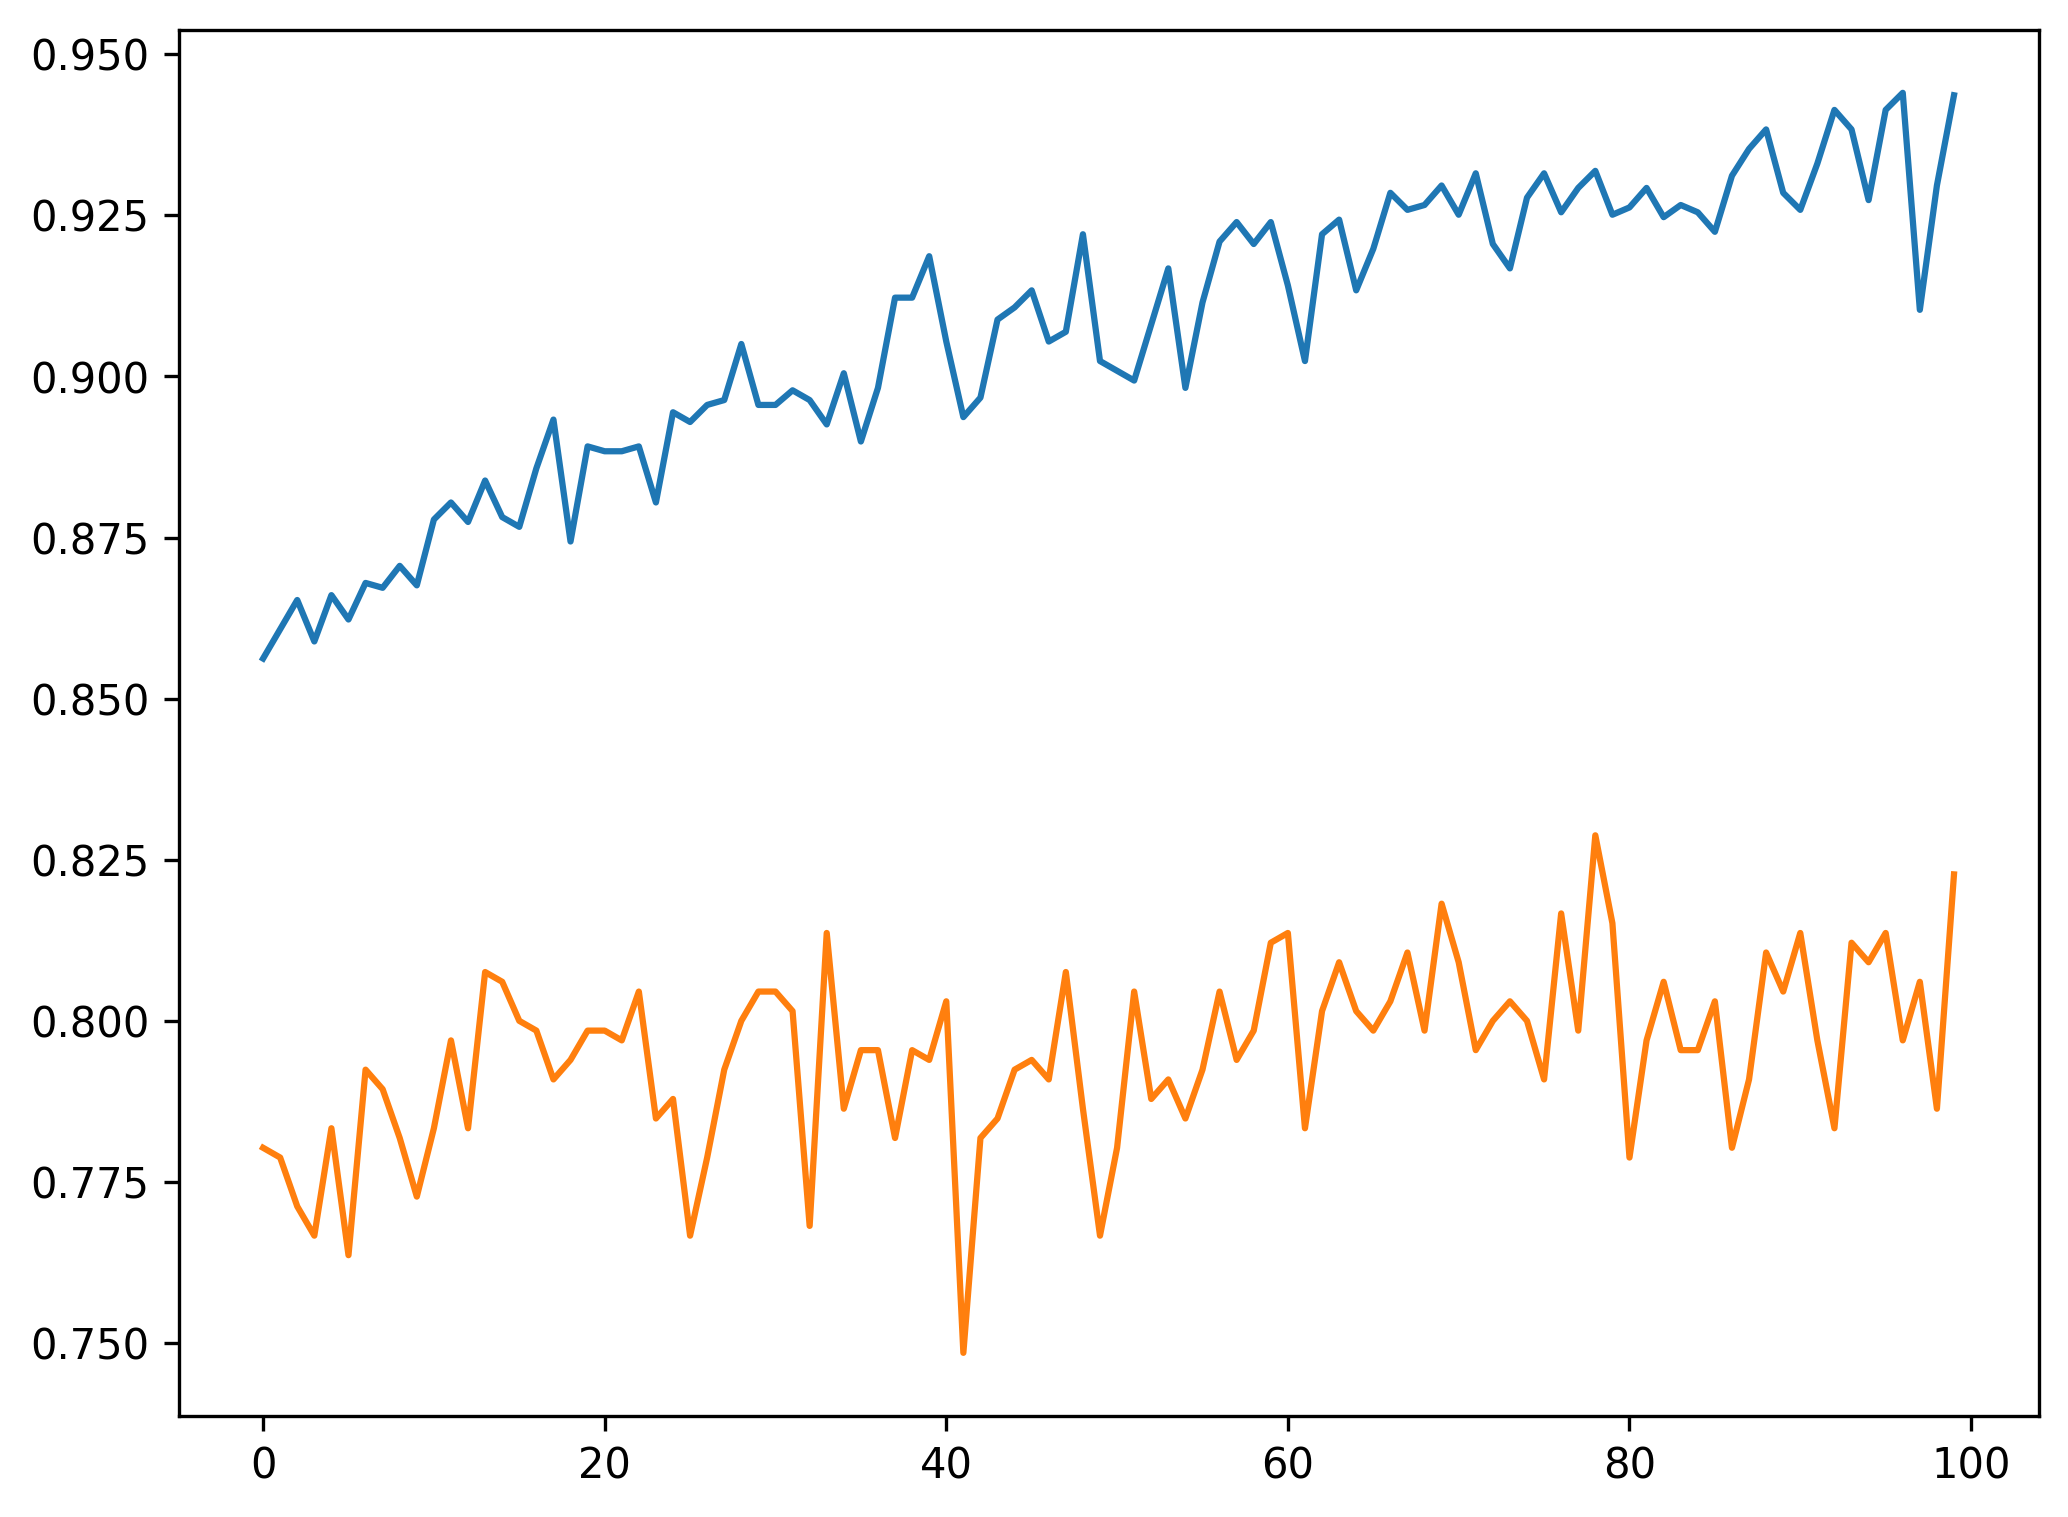

In [100]:
from tensorflow.keras.callbacks import EarlyStopping
# Create an instance of the Adam class,
# and set the learning rate.
adam_optimizer = Adam(learning_rate = 0.001)
# Compile the model. As this is a classification problem,
# we are going to use the categorical cross entropy for the
# loss function, and we will use the accuracy for metrics.
model.compile(adam_optimizer, loss='categorical_crossentropy',metrics='accuracy')
# Define the batch size
batch_size = 32
# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True) 
# Fit the model, and record the history of the fit.
# In this example we will train the model for 100 # epochs.
history = model.fit(train_datagen.flow(x_train_norm, y_train_cat, batch_size =batch_size, subset = "training"), epochs = 100,validation_data = train_datagen.flow(x_train_norm,y_train_cat, batch_size = batch_size, subset = "validation"))
# Create a pandas dataframe containing
# the history of the fitting
history_df = pd.DataFrame(history.history)
# Plot the training and validation losses
# versus epoch.
plt.figure(figsize = (8, 6), dpi = 300)
plt.plot(history_df["loss"], label = "Training")
plt.plot(history_df["val_loss"], label = "Validation")
# Add a legend to the plot.
plt.legend()
# Label both axes.
plt.xlabel("Epoch")
plt.ylabel("Loss = Cross Entropy")
# Show the plot.
plt.show()
# Plot the training and validation accuracy
# versus epoch.
plt.figure(figsize = (8, 6), dpi = 300)
plt.plot(history_df["accuracy"], label = "Training")
plt.plot(history_df["val_accuracy"], label = "Validation")



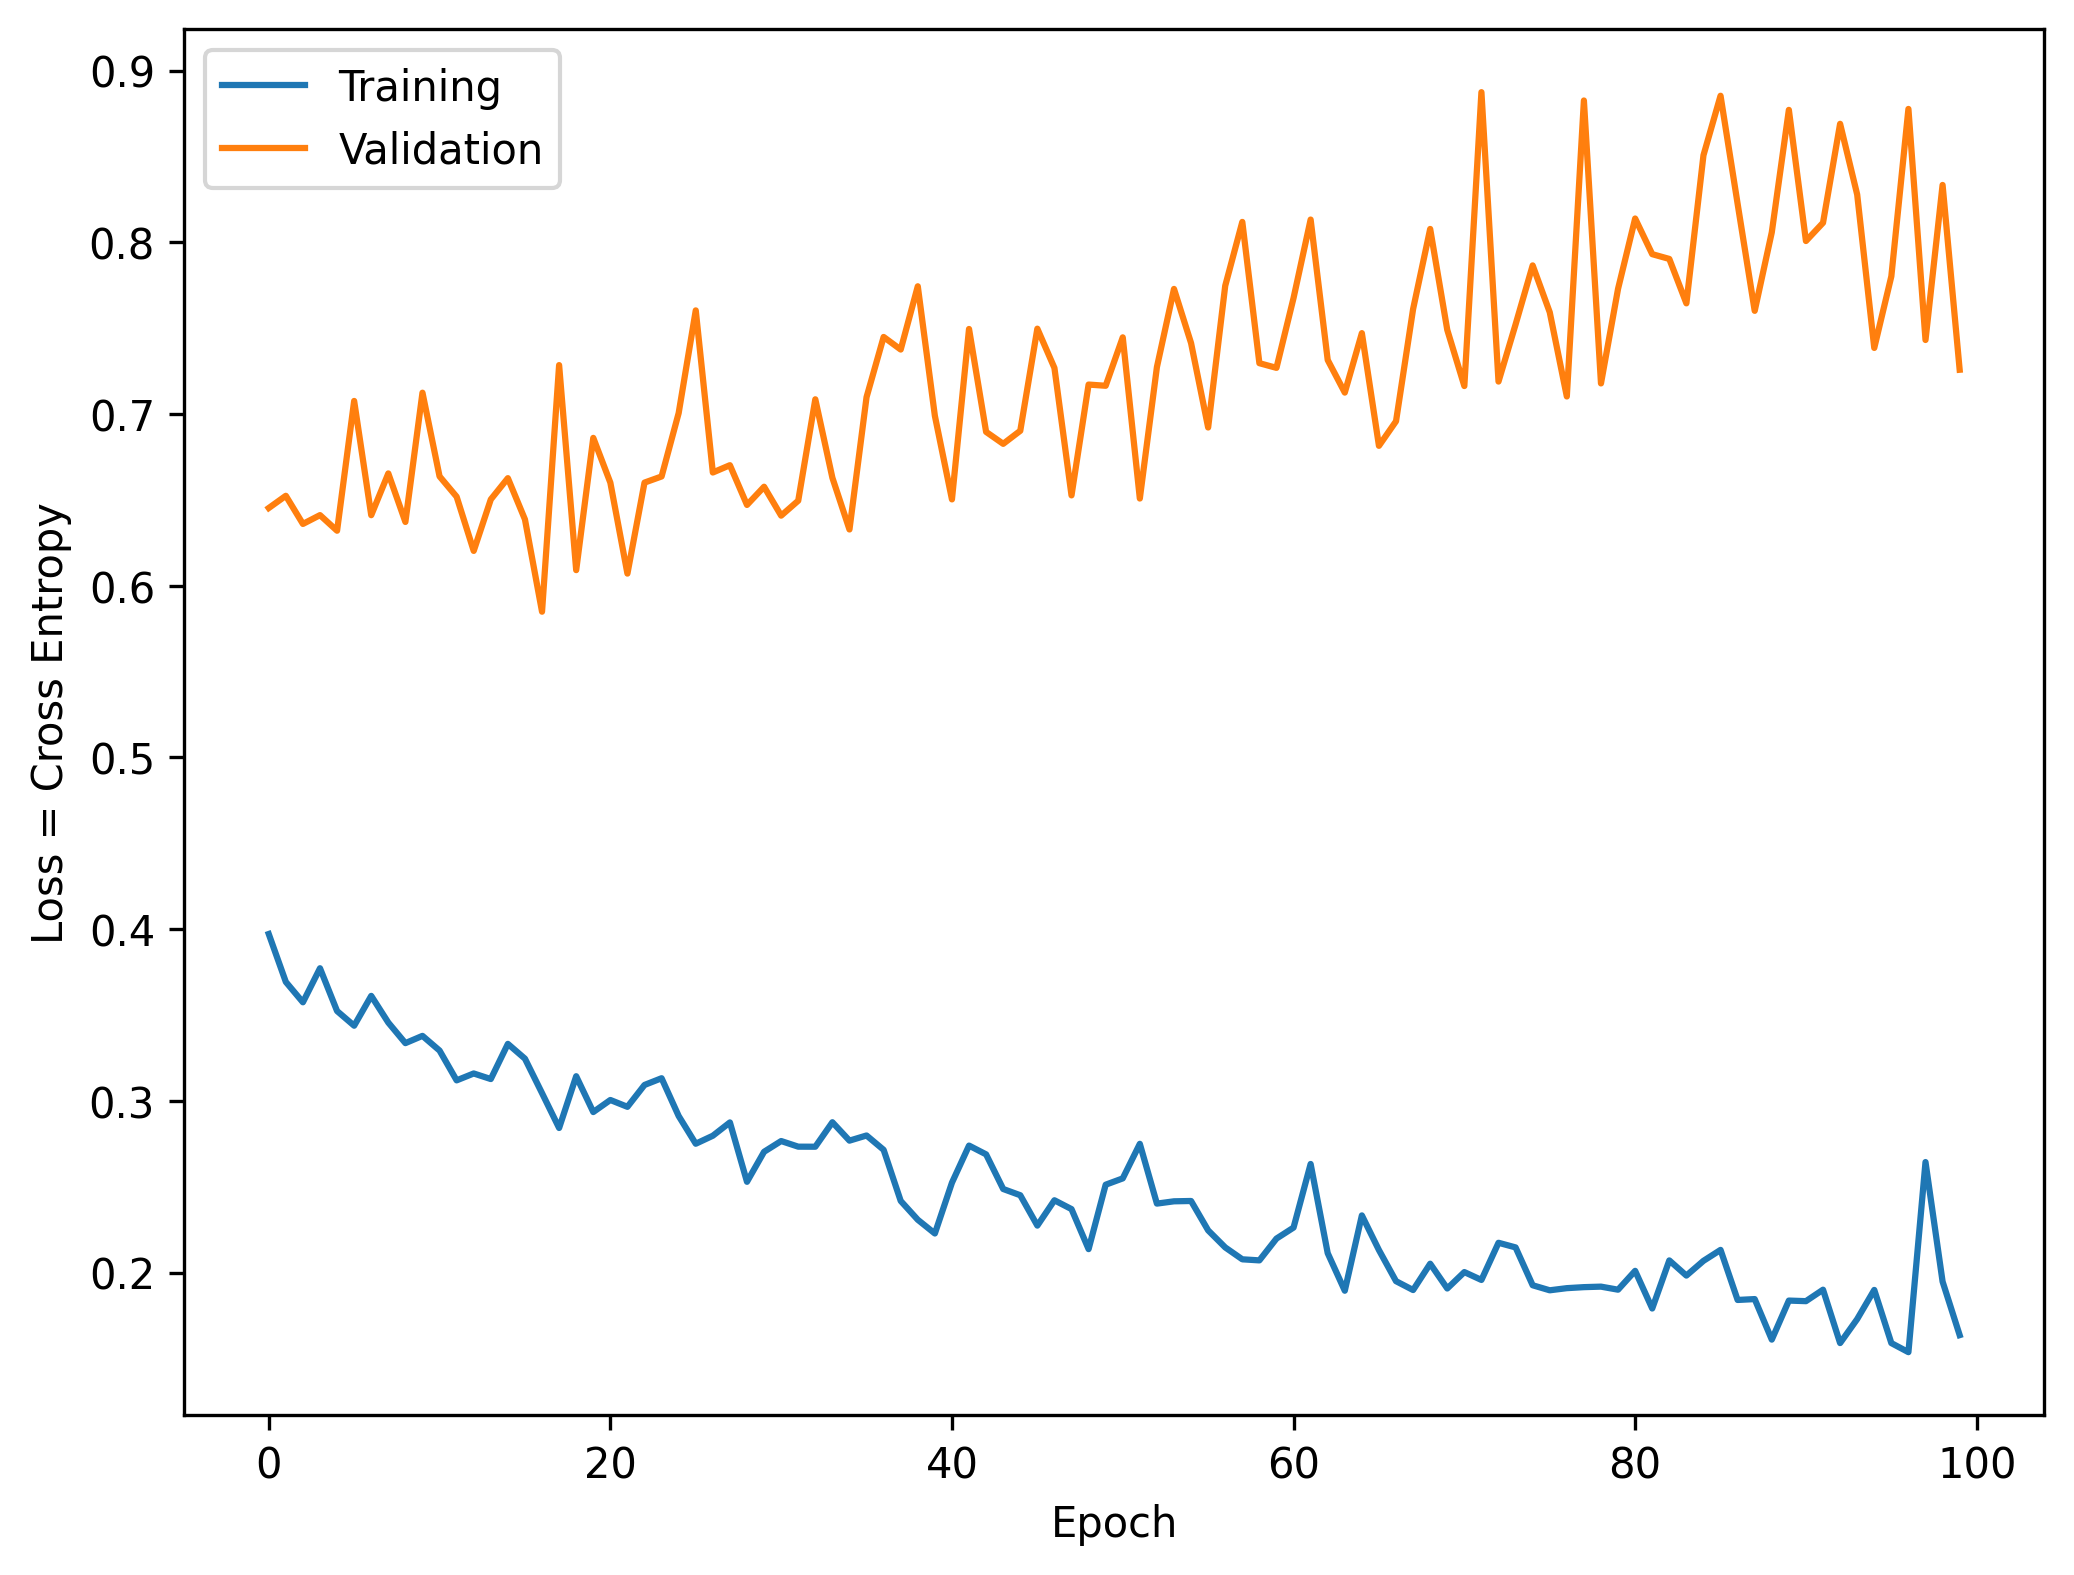

In [101]:
# Create a pandas dataframe containing
# the history of the fitting
history_df = pd.DataFrame(history.history)
# Plot the training and validation losses
# versus epoch.
plt.figure(figsize = (8, 6), dpi = 300)
plt.plot(history_df["loss"], label = "Training")
plt.plot(history_df["val_loss"], label = "Validation")
# Add a legend to the plot.
plt.legend()
# Label both axes.
plt.xlabel("Epoch")
plt.ylabel("Loss = Cross Entropy")
# Show the plot.
plt.show()

In [102]:
# Before we plot the confusion matrix, we need
# to find which label corresponds to which index.
# This is actually somewhat trivial in this case,
# as the labels are just the digits 0-9.
# Names of each label
display_labels = ["%d" % (i, ) for i in range(5)]
# Numerical index of each label
numerical_labels = [i for i in range(5)]
# Lets check the label strings and the
# numerical labels to make sure they line up.
print(display_labels)
print(numerical_labels)

['0', '1', '2', '3', '4']
[0, 1, 2, 3, 4]


In [103]:
# Now use the trained model to predict output
# classes in the test set
y_pred = model.predict(x_test_norm)
# Recall that the outputs from the model give the
# probability of each class label. We can now use
# the argmax() function to determine the index
# of the label with the highest probability for
# each row in y_pred. These will be our predicted
# class labels.
y_pred_class = np.argmax(y_pred, axis=1)

12/12 [==============================] - 1s 51ms/step


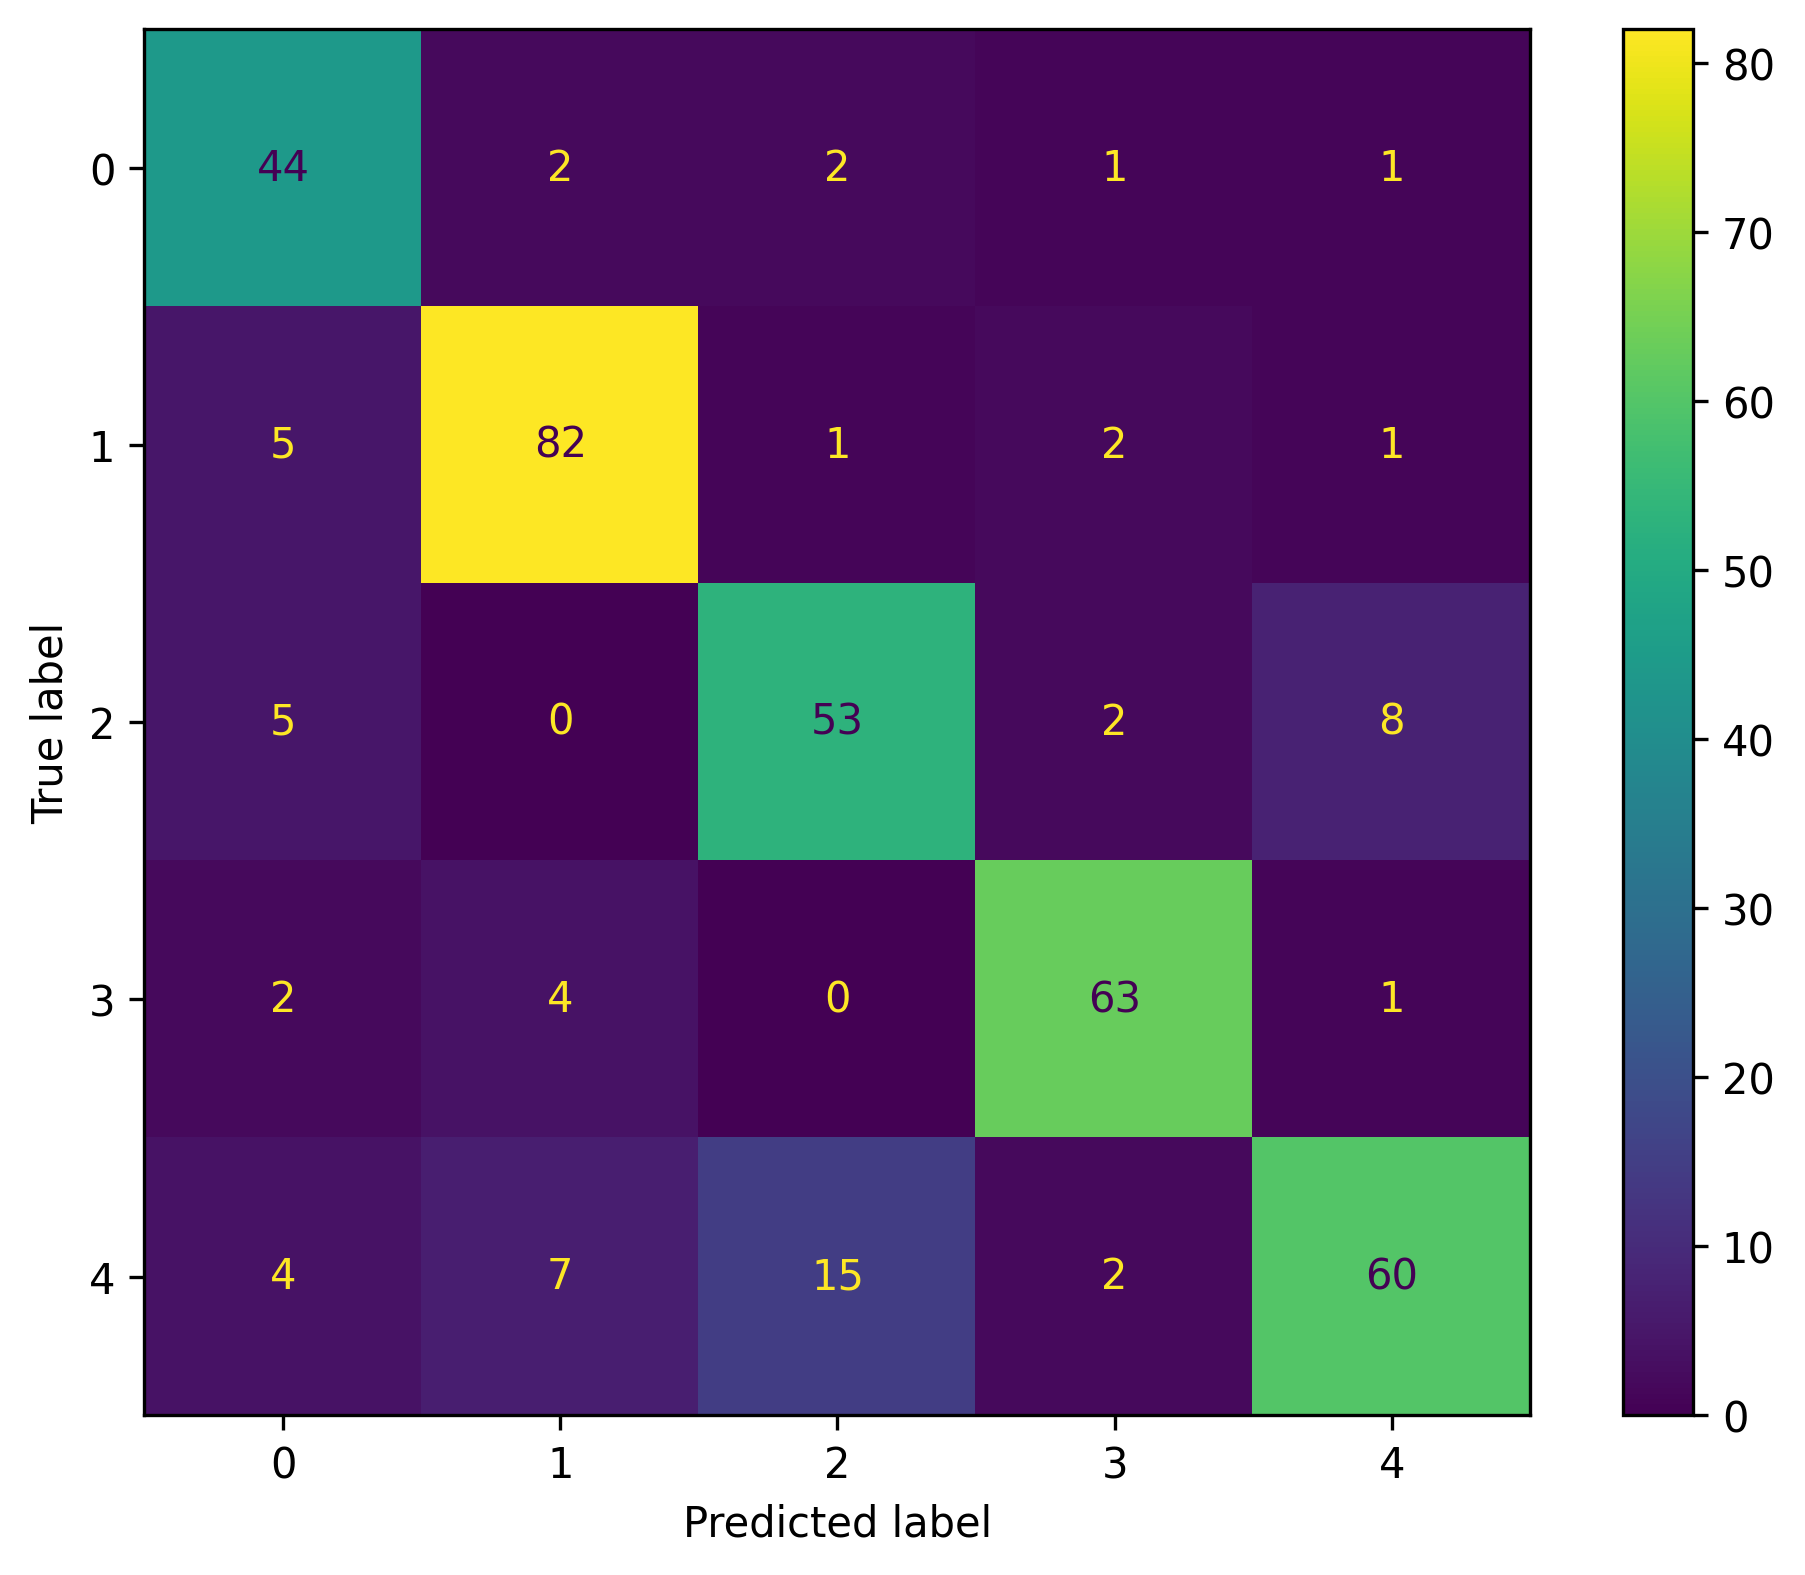

In [104]:
# Import the functions that we will need from sklearn to create
# and plot the confusion matrix.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Create the confusion matrix
con_mat = confusion_matrix(y_test, y_pred_class, labels = numerical_labels)
# Create the figure and axes
plt.figure(figsize = (8, 6), dpi = 300)
ax = plt.axes()
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix = con_mat, display_labels =display_labels)
disp.plot(ax = ax)
# Show the plot
plt.show()

In [105]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.73      0.88      0.80        50
           1       0.86      0.90      0.88        91
           2       0.75      0.78      0.76        68
           3       0.90      0.90      0.90        70
           4       0.85      0.68      0.75        88

    accuracy                           0.82       367
   macro avg       0.82      0.83      0.82       367
weighted avg       0.83      0.82      0.82       367



### Model 10: Changing the Number of epoch to 50 

In [23]:
model = Sequential()
# Add the first Convolutional layer. Here we use 32 filters,
# which will each be convolved with the input data to
# produce 32 feature maps. We use a kernel_size of 3x3,
# and the relu activation function.
model.add(Conv2D(filters = 32, kernel_size = (3, 3), strides = (2, 2), padding="same", input_shape = (width_npix,height_npix, 3), activation = 'relu'))

# Add a pooling layer that uses max pooling,
# with a pool size of 2x2.
model.add(MaxPooling2D(pool_size = (2, 2), padding = "same"))
# Add a second convolutional layer, again with a kernel size of 3x3 and
# the relu activation function but now with 64 filters. Note that it
# is common to increase the number of filters as we go deeper into
# the network.
model.add(Conv2D(filters = 64, kernel_size = (3, 3),strides = (2, 2), padding="same", activation = 'relu'))
# Add a second max pooling layer.
model.add(MaxPooling2D(pool_size = (2, 2), padding = "same"))
# Add a third convolutional layer, now with 128 filters.
model.add(Conv2D(filters = 128, kernel_size = (3, 3),strides = (2, 2), padding="same", activation = 'relu'))
# Add a third max pooling layer.
model.add(MaxPooling2D(pool_size = (2, 2), padding = "same"))
# After the final pooling layer, we need a flatter layer,
# which will flatten the output to a 1-dimensional array,
# ready for the fully connected network.
model.add(Flatten())
# Add a Dense (i.e. fully connected) layer with 64 neurons
# and the relu activation function.
model.add(Dense(64, activation = 'relu'))
# Apply a dropout rate of 50% to the dense layer.
model.add(Dropout(0.5))
# The output layer needs 10 units, corresponding
# to the 10 output classes. We use the softmax
# activation function, which means the resulting
# output values will represent the probabilities
# for each of the 10 class labels.
model.add(Dense(5, activation = 'softmax'))
# Print a summary of the model.
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 4, 4, 128)        

Epoch 1/50
83/83 [==============================] - 45s 532ms/step - loss: 1.3694 - accuracy: 0.3992 - val_loss: 1.1774 - val_accuracy: 0.5152
Epoch 2/50
83/83 [==============================] - 43s 524ms/step - loss: 1.1771 - accuracy: 0.4877 - val_loss: 1.1294 - val_accuracy: 0.5515
Epoch 3/50
83/83 [==============================] - 44s 526ms/step - loss: 1.1359 - accuracy: 0.5115 - val_loss: 1.0038 - val_accuracy: 0.5818
Epoch 4/50
83/83 [==============================] - 44s 531ms/step - loss: 1.0787 - accuracy: 0.5392 - val_loss: 0.9514 - val_accuracy: 0.6333
Epoch 5/50
83/83 [==============================] - 43s 524ms/step - loss: 1.0196 - accuracy: 0.5857 - val_loss: 0.8791 - val_accuracy: 0.6530
Epoch 6/50
83/83 [==============================] - 43s 524ms/step - loss: 0.9881 - accuracy: 0.6046 - val_loss: 0.8992 - val_accuracy: 0.6682
Epoch 7/50
83/83 [==============================] - 44s 526ms/step - loss: 0.9266 - accuracy: 0.6300 - val_loss: 0.8051 - val_accuracy: 0.6894

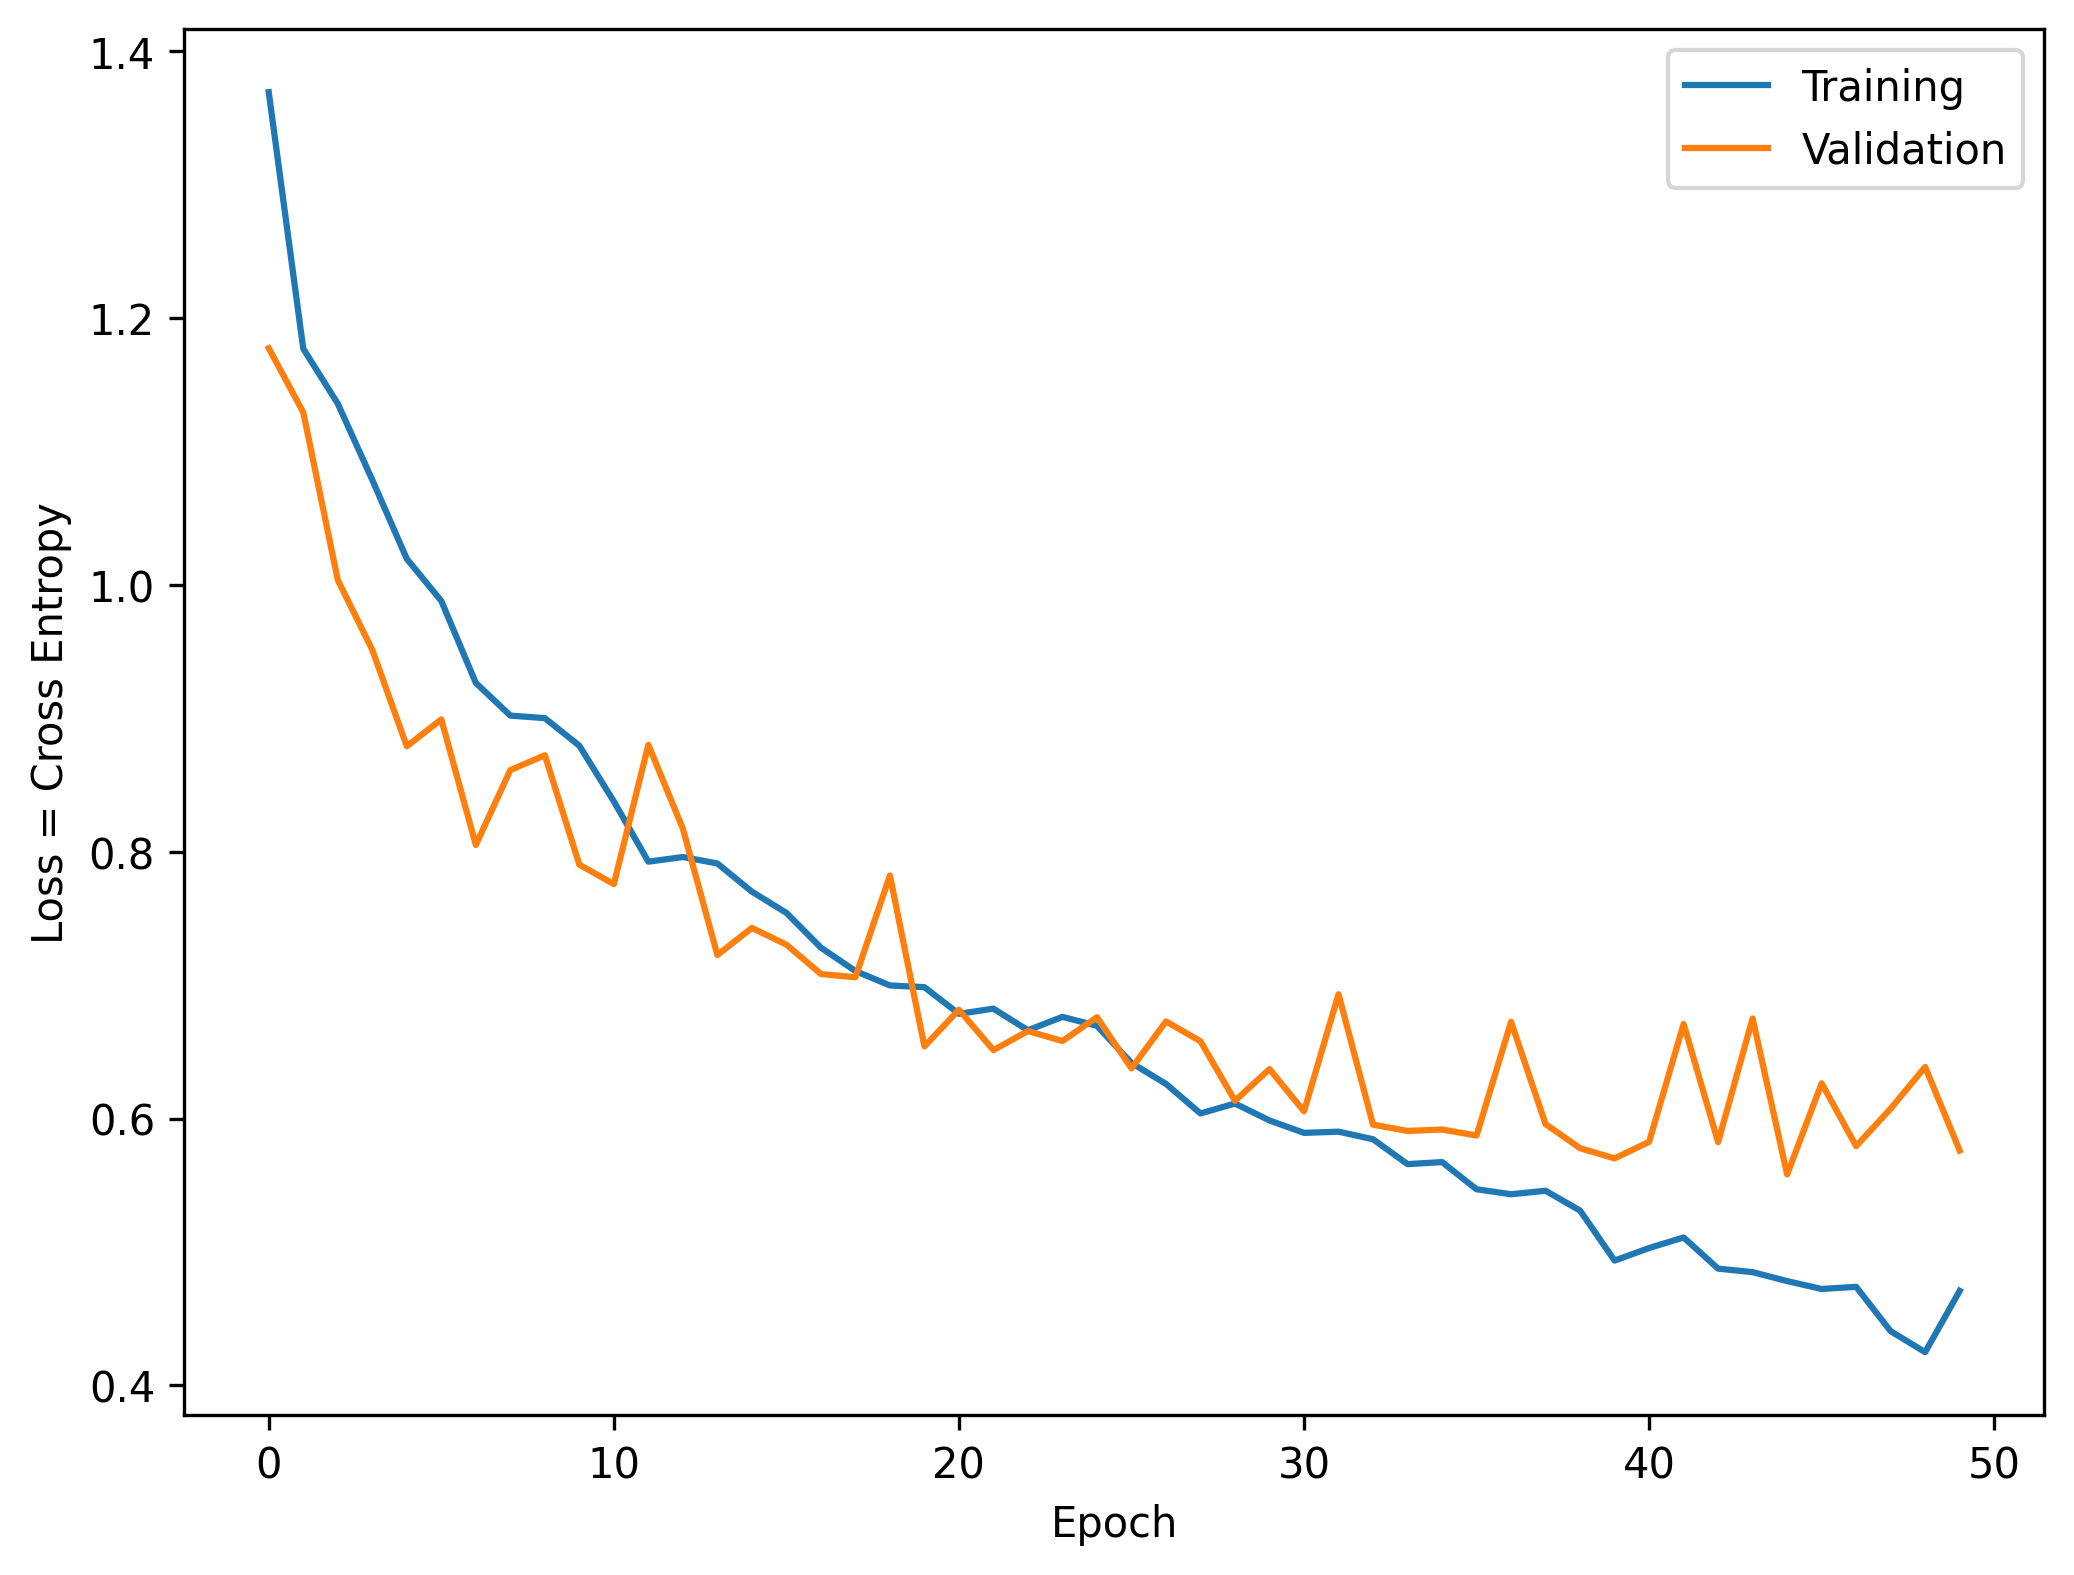

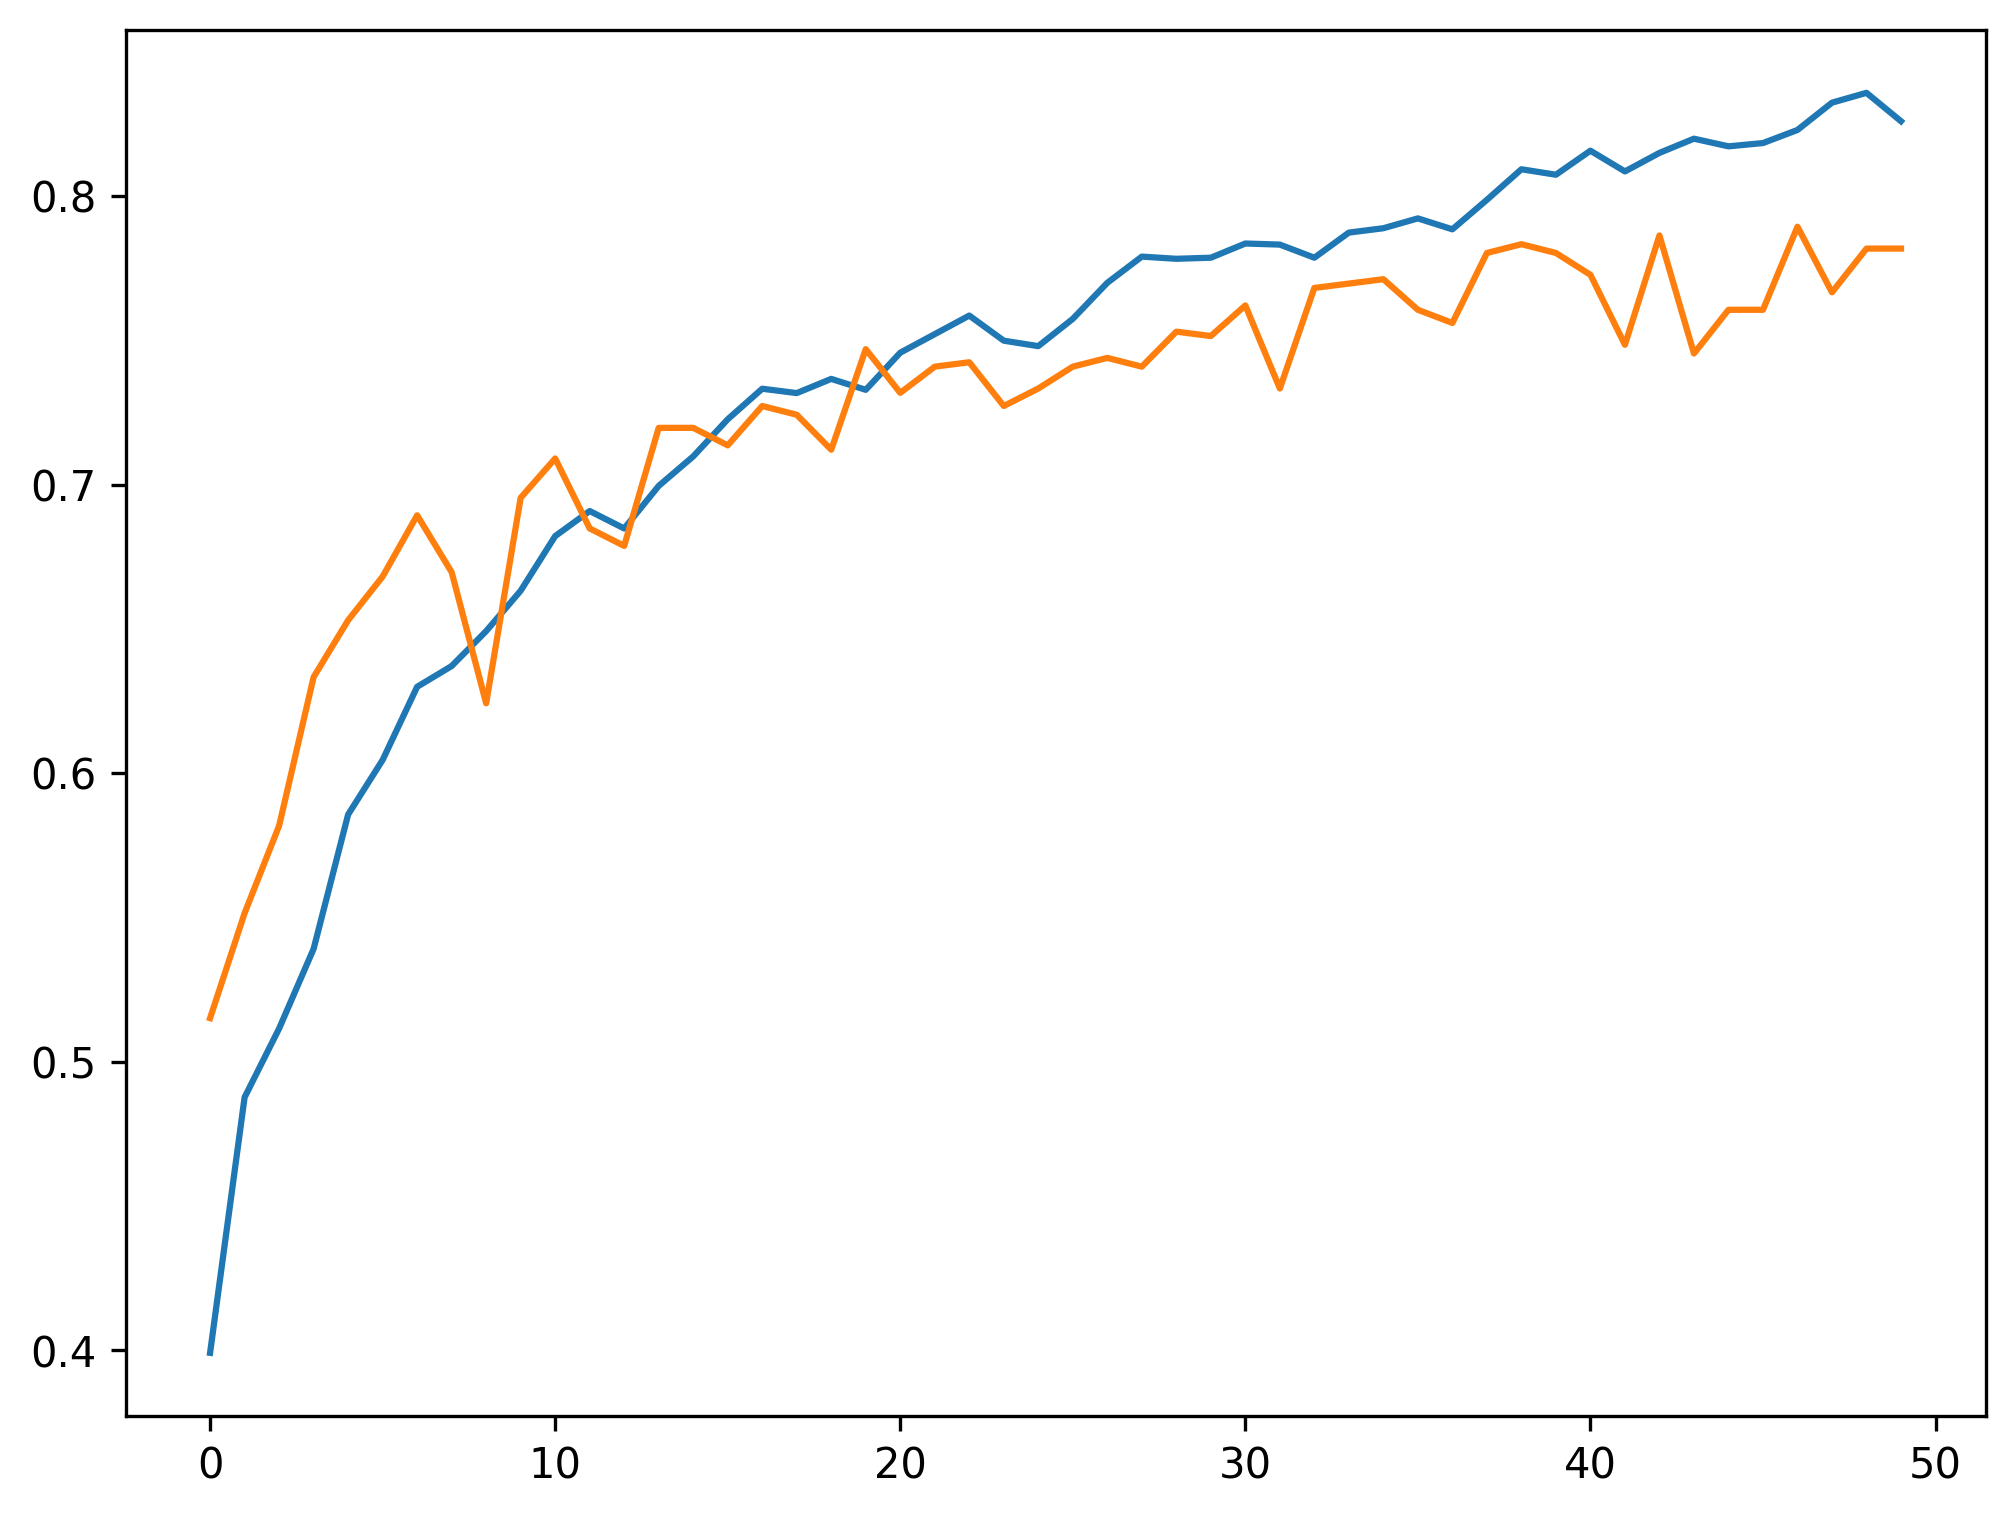

In [24]:
# Create an instance of the Adam class,
# and set the learning rate.
adam_optimizer = Adam(learning_rate = 0.001)
# Compile the model. As this is a classification problem,
# we are going to use the categorical cross entropy for the
# loss function, and we will use the accuracy for metrics.
model.compile(adam_optimizer, loss='categorical_crossentropy',metrics='accuracy')
# Define the batch size
batch_size = 32
# Fit the model, and record the history of the fit.
# In this example we will train the model for 20
# epochs.
history = model.fit(train_datagen.flow(x_train_norm, y_train_cat, batch_size =batch_size, subset = "training"), epochs = 50,validation_data = train_datagen.flow(x_train_norm,y_train_cat, batch_size = batch_size, subset = "validation"))
# Create a pandas dataframe containing
# the history of the fitting
history_df = pd.DataFrame(history.history)
# Plot the training and validation losses
# versus epoch.
plt.figure(figsize = (8, 6), dpi = 300)
plt.plot(history_df["loss"], label = "Training")
plt.plot(history_df["val_loss"], label = "Validation")
# Add a legend to the plot.
plt.legend()
# Label both axes.
plt.xlabel("Epoch")
plt.ylabel("Loss = Cross Entropy")
# Show the plot.
plt.show()
# Plot the training and validation accuracy
# versus epoch.
plt.figure(figsize = (8, 6), dpi = 300)
plt.plot(history_df["accuracy"], label = "Training")
plt.plot(history_df["val_accuracy"], label = "Validation")



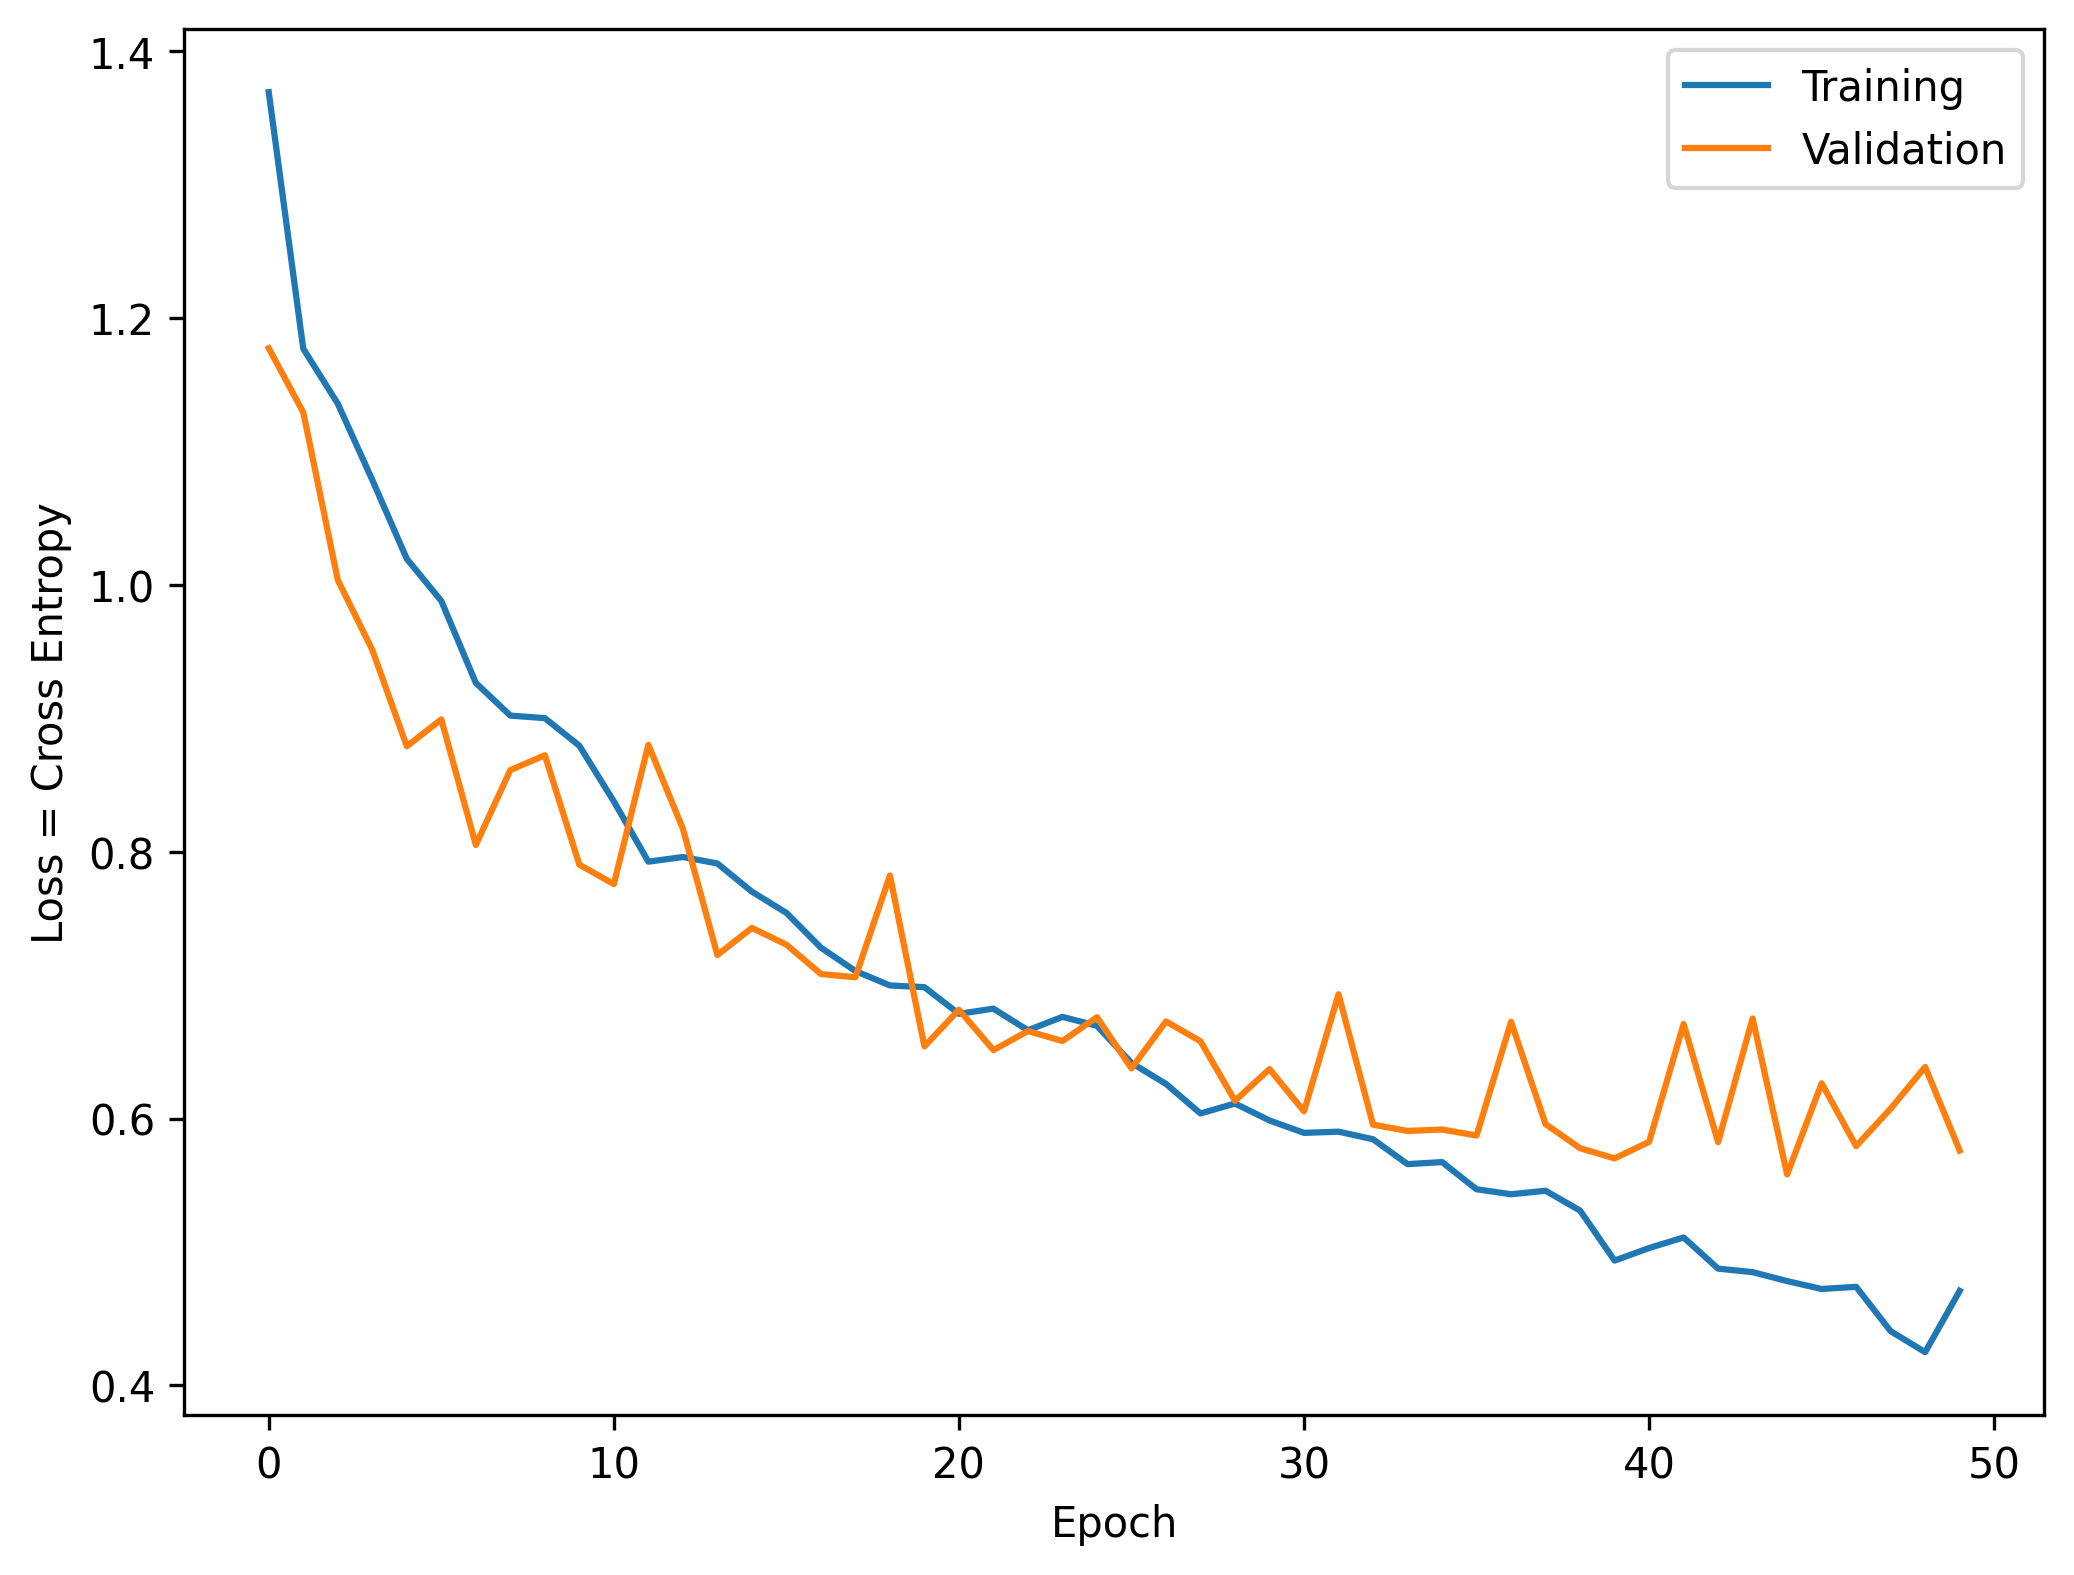

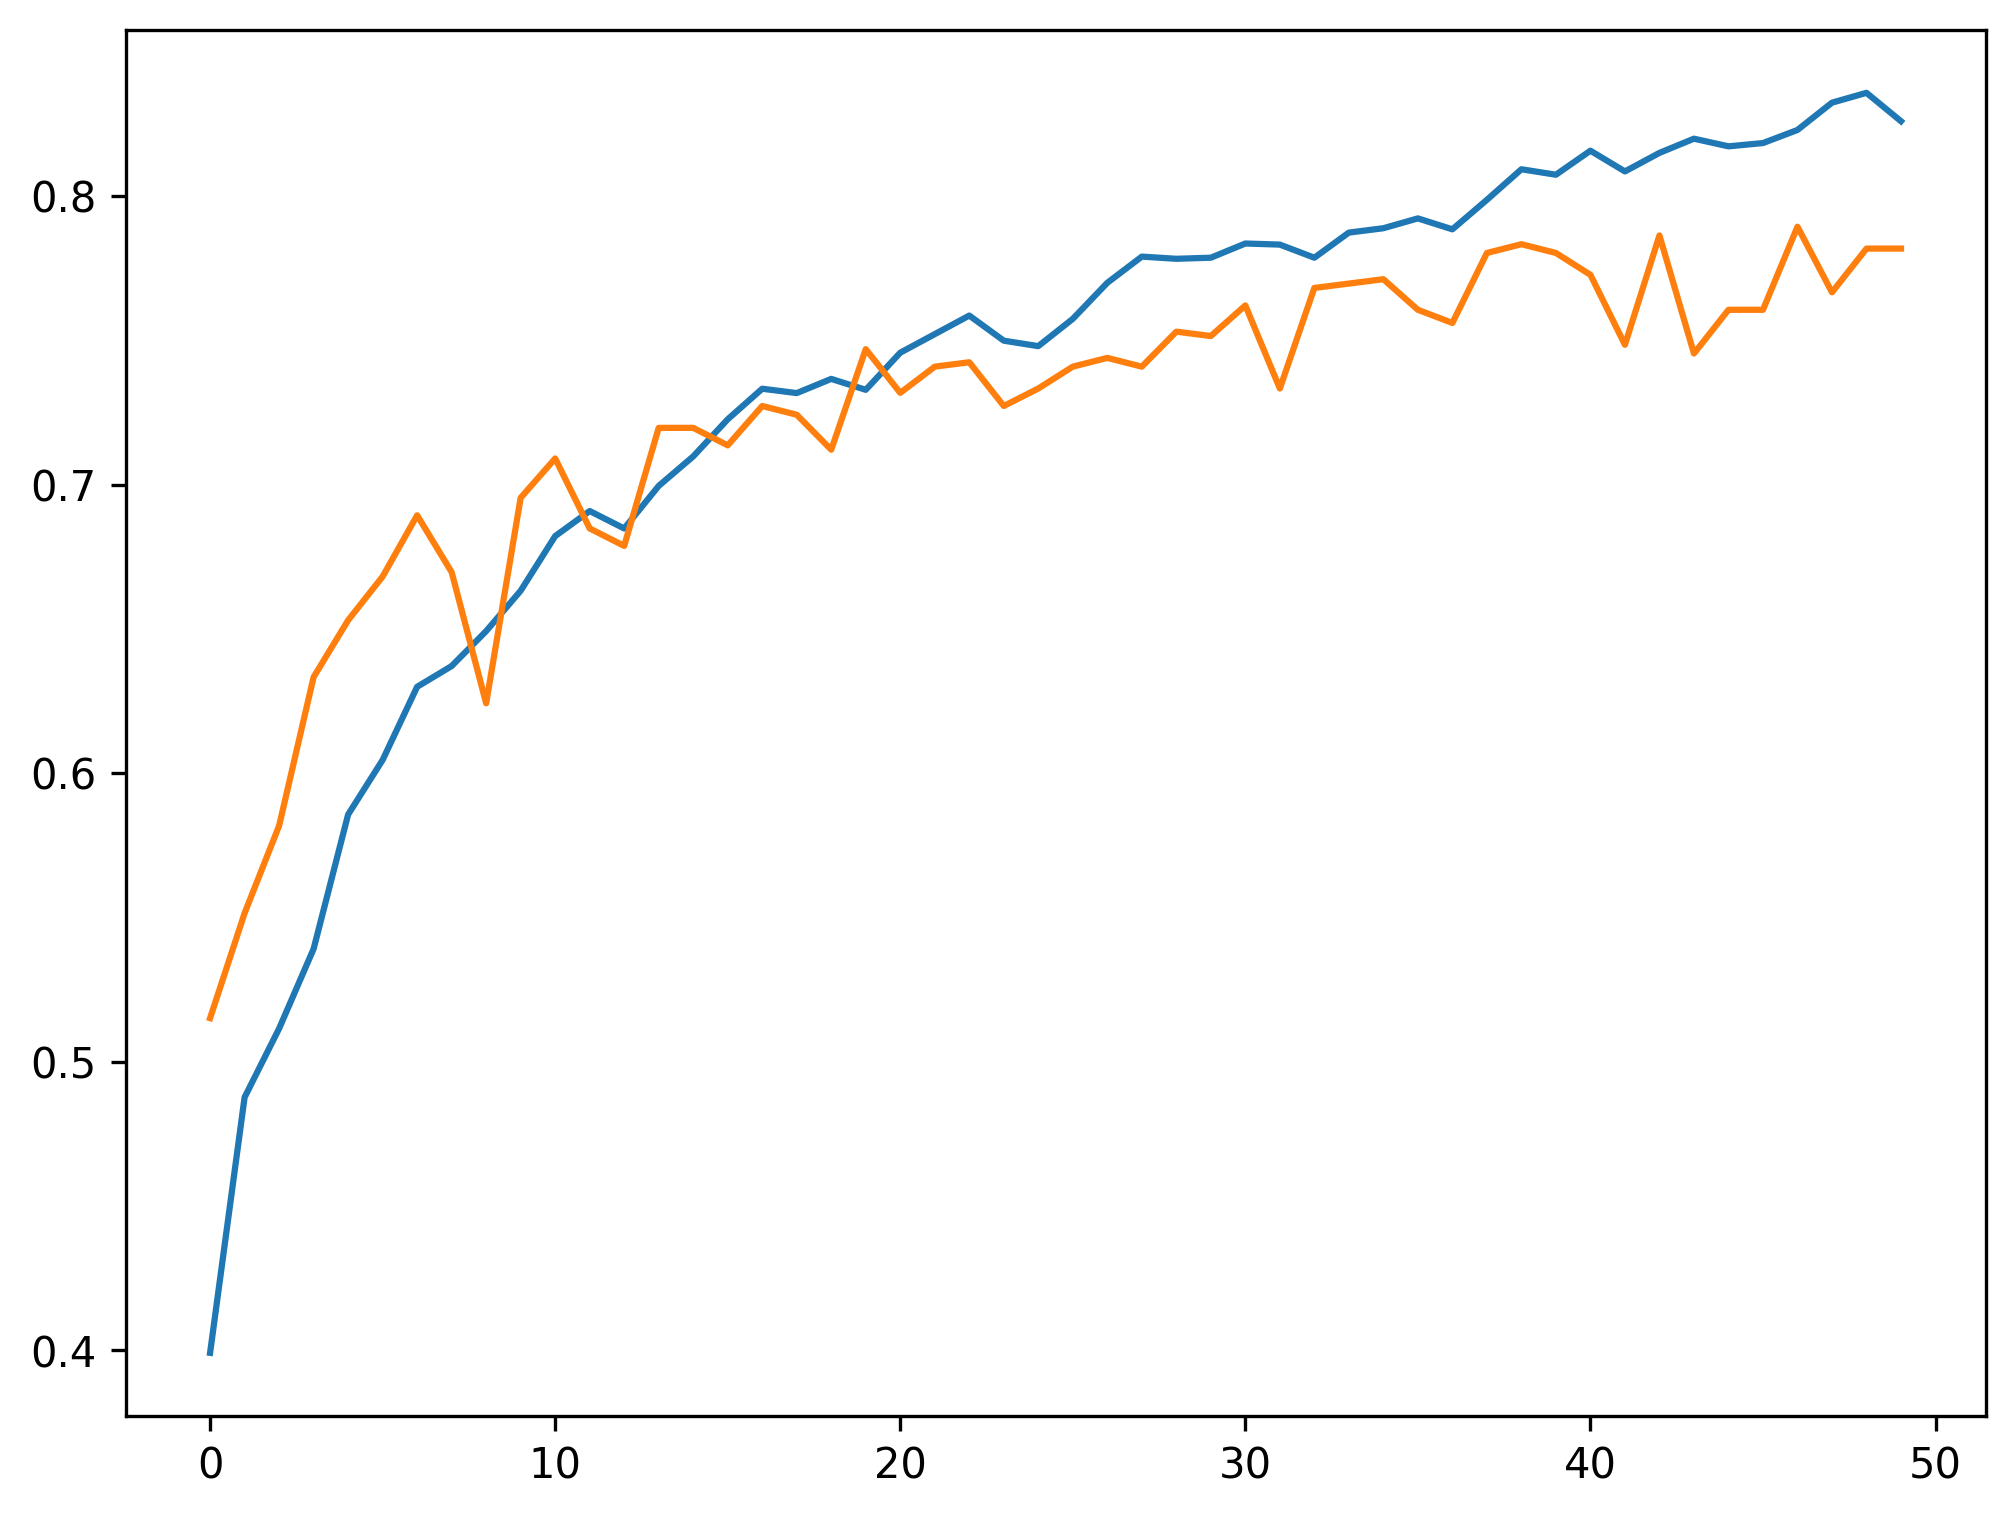

In [25]:
# Create a pandas dataframe containing the history of the fitting
history_df = pd.DataFrame(history.history)
# Plot the training and validation losses
# versus epoch.
plt.figure(figsize = (8, 6), dpi = 300)
plt.plot(history_df["loss"], label = "Training")
plt.plot(history_df["val_loss"], label = "Validation")
# Add a legend to the plot.
plt.legend()
# Label both axes.
plt.xlabel("Epoch")
plt.ylabel("Loss = Cross Entropy")
# Show the plot.
plt.show()
# Plot the training and validation accuracy
# versus epoch.
plt.figure(figsize = (8, 6), dpi = 300)
plt.plot(history_df["accuracy"], label = "Training")
plt.plot(history_df["val_accuracy"], label = "Validation")

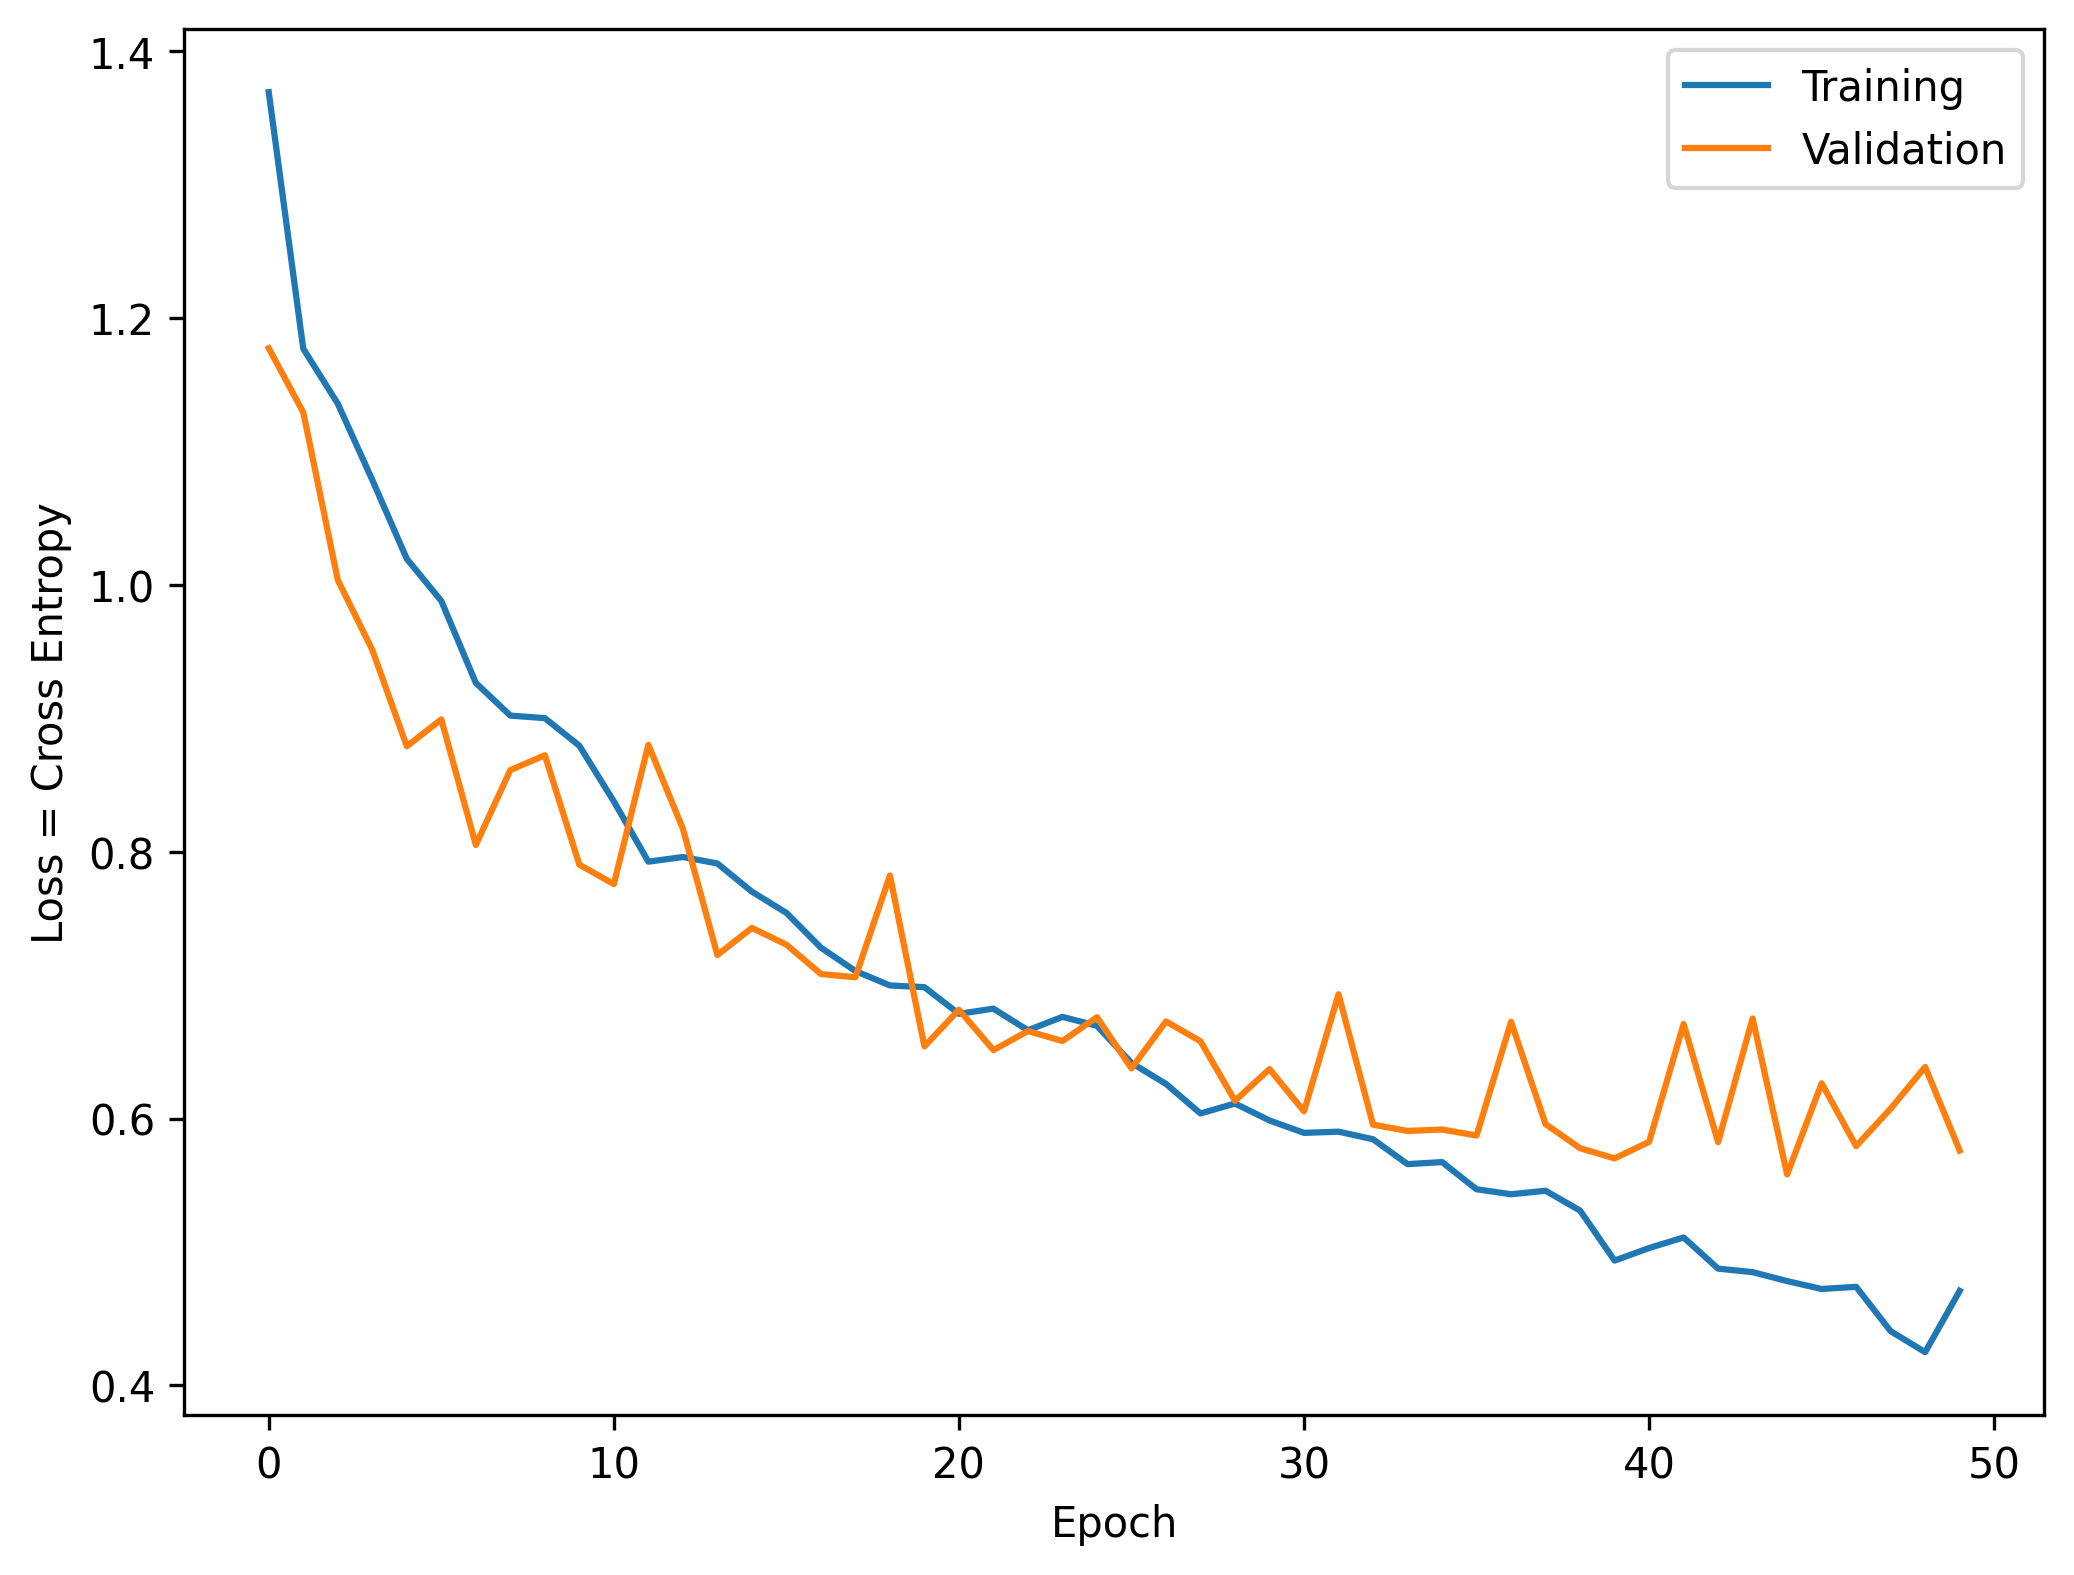

In [26]:
# Create a pandas dataframe containing
# the history of the fitting
history_df = pd.DataFrame(history.history)
# Plot the training and validation losses
# versus epoch.
plt.figure(figsize = (8, 6), dpi = 300)
plt.plot(history_df["loss"], label = "Training")
plt.plot(history_df["val_loss"], label = "Validation")
# Add a legend to the plot.
plt.legend()
# Label both axes.
plt.xlabel("Epoch")
plt.ylabel("Loss = Cross Entropy")
# Show the plot.
plt.show()

In [27]:
# Before we plot the confusion matrix, we need
# to find which label corresponds to which index.
# This is actually somewhat trivial in this case,
# as the labels are just the digits 0-9.
# Names of each label
display_labels = ["%d" % (i, ) for i in range(5)]
# Numerical index of each label
numerical_labels = [i for i in range(5)]
# Lets check the label strings and the
# numerical labels to make sure they line up.
print(display_labels)
print(numerical_labels)

['0', '1', '2', '3', '4']
[0, 1, 2, 3, 4]


In [28]:
# Now use the trained model to predict output
# classes in the test set
y_pred = model.predict(x_test_norm)
# Recall that the outputs from the model give the
# probability of each class label. We can now use
# the argmax() function to determine the index
# of the label with the highest probability for
# each row in y_pred. These will be our predicted
# class labels.
y_pred_class = np.argmax(y_pred, axis=1)

12/12 [==============================] - 1s 52ms/step


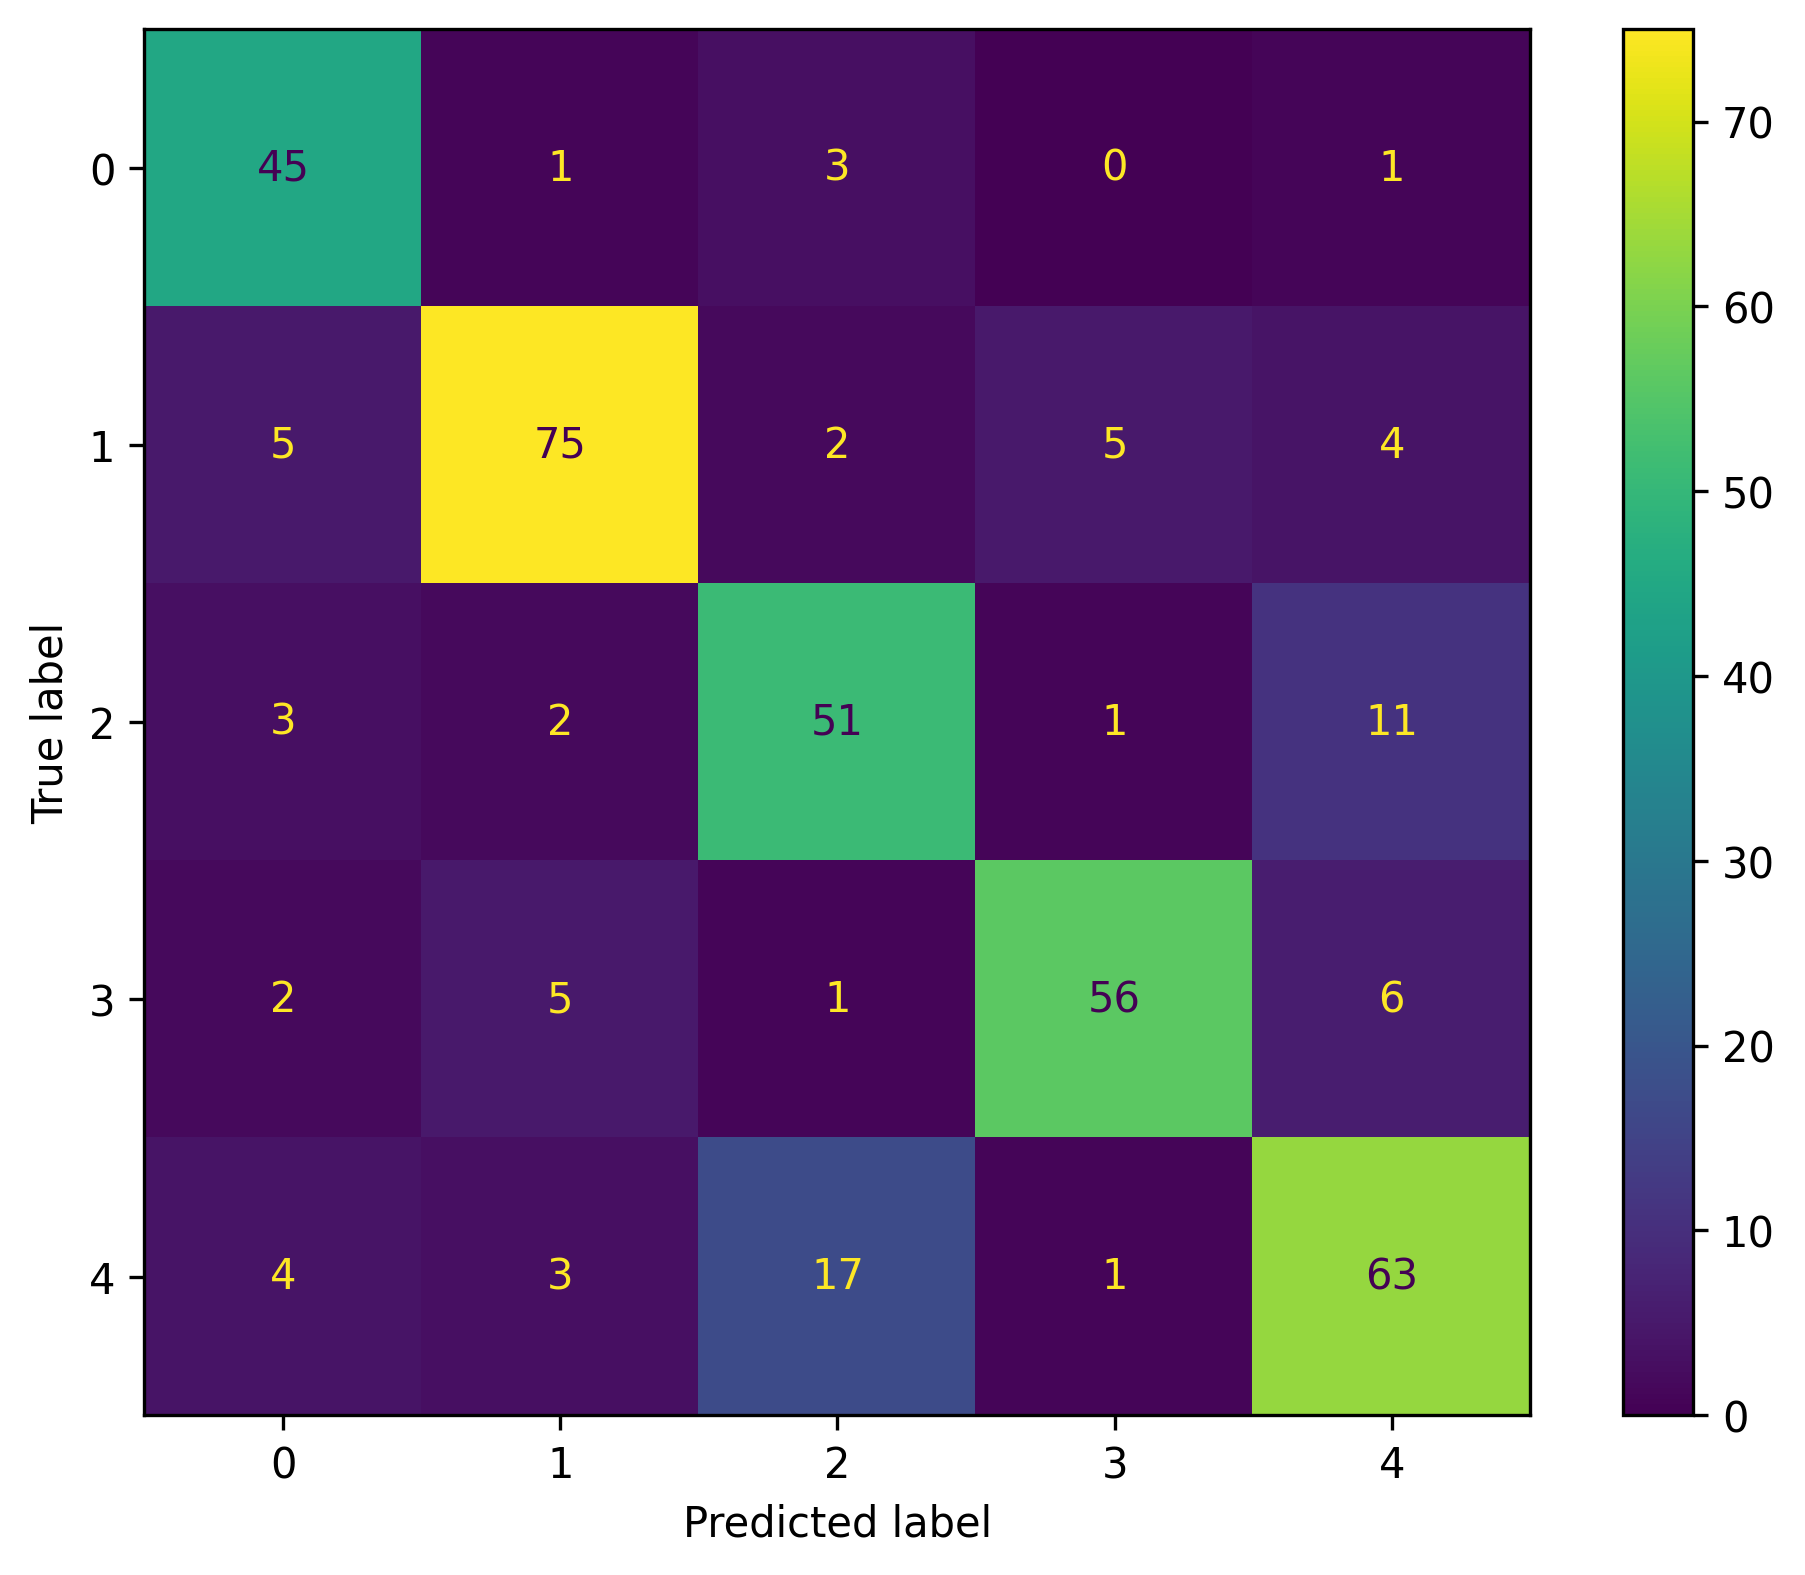

In [29]:
# Import the functions that we will need from sklearn to create
# and plot the confusion matrix.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Create the confusion matrix
con_mat = confusion_matrix(y_test, y_pred_class, labels = numerical_labels)
# Create the figure and axes
plt.figure(figsize = (8, 6), dpi = 300)
ax = plt.axes()
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix = con_mat, display_labels =display_labels)
disp.plot(ax = ax)
# Show the plot
plt.show()

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.76      0.90      0.83        50
           1       0.87      0.82      0.85        91
           2       0.69      0.75      0.72        68
           3       0.89      0.80      0.84        70
           4       0.74      0.72      0.73        88

    accuracy                           0.79       367
   macro avg       0.79      0.80      0.79       367
weighted avg       0.80      0.79      0.79       367

